In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [6]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic

from stack_segmentation.training import (
    handle_stacks_data, 
    make_optimization_task, 
    train_loop
)

from pipeline_config import (
    dataloaders_conf,
    aug_config,
    train_conf,
    model_config, 
    optimizer_config,
    loss_config,
    scheduler_config,
)

In [7]:
from exp_config import data_conf

## Prepare train, validation and test data

In [8]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

700it [00:01, 650.61it/s]
100%|██████████| 700/700 [00:07<00:00, 96.38it/s] 
8280it [00:00, 221900.99it/s]
7920it [00:00, 219071.37it/s]
710it [00:00, 798.29it/s]
100%|██████████| 710/710 [00:07<00:00, 94.93it/s] 
7920it [00:00, 226332.95it/s]
7560it [00:00, 218082.23it/s]
720it [00:00, 740.66it/s]
100%|██████████| 720/720 [00:07<00:00, 91.16it/s] 
8280it [00:00, 82684.16it/s]
720it [00:00, 767.11it/s]
100%|██████████| 720/720 [00:07<00:00, 91.52it/s] 
8280it [00:00, 229178.79it/s]
700it [00:00, 786.93it/s]
100%|██████████| 700/700 [00:07<00:00, 96.31it/s] 
8280it [00:00, 227649.47it/s]
509it [00:00, 1098.09it/s]
100%|██████████| 509/509 [00:02<00:00, 193.19it/s]
3664it [00:00, 223085.73it/s]
700it [00:00, 722.58it/s]
100%|██████████| 700/700 [00:07<00:00, 96.36it/s] 
8280it [00:00, 221069.02it/s]
700it [00:00, 805.10it/s]
100%|██████████| 700/700 [00:07<00:00, 96.96it/s] 
8280it [00:00, 224985.99it/s]
710it [00:01, 370.46it/s]
100%|██████████| 710/710 [00:07<00:00, 94.13it/s] 
8280it 

In [9]:
len(data_train), len(data_val), len(data_test)

(16200, 15480, 11)

In [10]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        model_config=model_config,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [11]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [12]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [13]:
device = 'cuda:0'

In [14]:
model, criterion, optimizer, scheduler = make_optimization_task(
    device,
    model_config=model_config,
    loss_config=loss_config, 
    optimizer_config=optimizer_config,
    scheduler_config=scheduler_config)

## Run experiment

In [29]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.10458


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.029417
Epoch 1...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.024865


100%|██████████| 484/484 [00:35<00:00, 13.62it/s]


Mean val loss: 0.024272


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.022213


100%|██████████| 484/484 [00:35<00:00, 13.60it/s]


Mean val loss: 0.022383


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.021053


100%|██████████| 484/484 [00:35<00:00, 13.62it/s]


Mean val loss: 0.022193


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.020425


100%|██████████| 484/484 [00:35<00:00, 13.66it/s]


Mean val loss: 0.021214


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.019806


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.021565
EarlyStopping counter: 1 out of 15
Epoch 6...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.019373


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.023198
EarlyStopping counter: 2 out of 15
Epoch 7...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.019086


100%|██████████| 484/484 [00:35<00:00, 13.61it/s]


Mean val loss: 0.020104


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.018797


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.024029
EarlyStopping counter: 1 out of 15
Epoch 9...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.018556


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.021169
EarlyStopping counter: 2 out of 15
Epoch 10...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.018224


100%|██████████| 484/484 [00:35<00:00, 13.60it/s]


Mean val loss: 0.019555


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 11...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.01802


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.019585
EarlyStopping counter: 1 out of 15
Epoch 12...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.017731


100%|██████████| 484/484 [00:35<00:00, 13.62it/s]


Mean val loss: 0.019106


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.01754


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.019195
EarlyStopping counter: 1 out of 15
Epoch 14...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.017321


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.01912
EarlyStopping counter: 2 out of 15
Epoch 15...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.01696


100%|██████████| 484/484 [00:35<00:00, 13.62it/s]


Mean val loss: 0.018821


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 16...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.01676


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.018912
EarlyStopping counter: 1 out of 15
Epoch 17...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.016353


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.019082
EarlyStopping counter: 2 out of 15
Epoch 18...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015977


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.018902
EarlyStopping counter: 3 out of 15
Epoch 19...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.015622


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.02
EarlyStopping counter: 4 out of 15
Epoch 20...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.01519


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.01947
EarlyStopping counter: 5 out of 15
Epoch 21...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014632


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.019393
EarlyStopping counter: 6 out of 15
Epoch 22...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.014167


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.019977
EarlyStopping counter: 7 out of 15
Epoch 23...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.012917


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.020368
EarlyStopping counter: 9 out of 15
Epoch 25...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.012257


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.020659
EarlyStopping counter: 10 out of 15
Epoch 26...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.011674


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.021069
EarlyStopping counter: 11 out of 15
Epoch 27...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.010942


 96%|█████████▌| 463/484 [00:33<00:01, 13.78it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [30]:
import pickle
import json

In [31]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [17]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [19]:
import torch
model.load_state_dict(torch.load('./{}_exp_model.torch'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [32]:
from itertools import chain

In [33]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [34]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

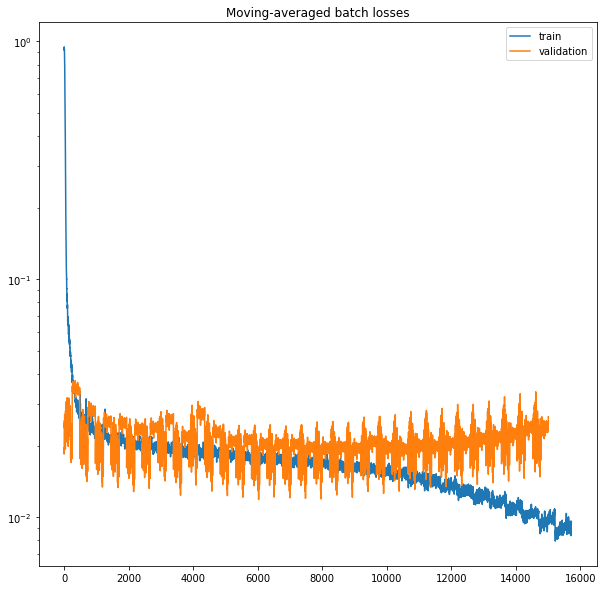

In [35]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [36]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

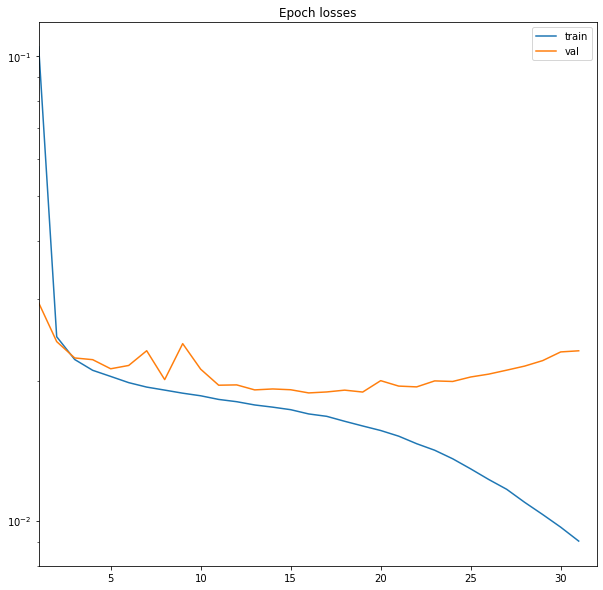

In [37]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [38]:
import os

In [39]:
import torch

In [40]:
from visualization_utils import output_to_binary, plot_sample, make_colored_diff

In [41]:
threshold = 0.5
to_plot = 10

Prediction for carb96558:


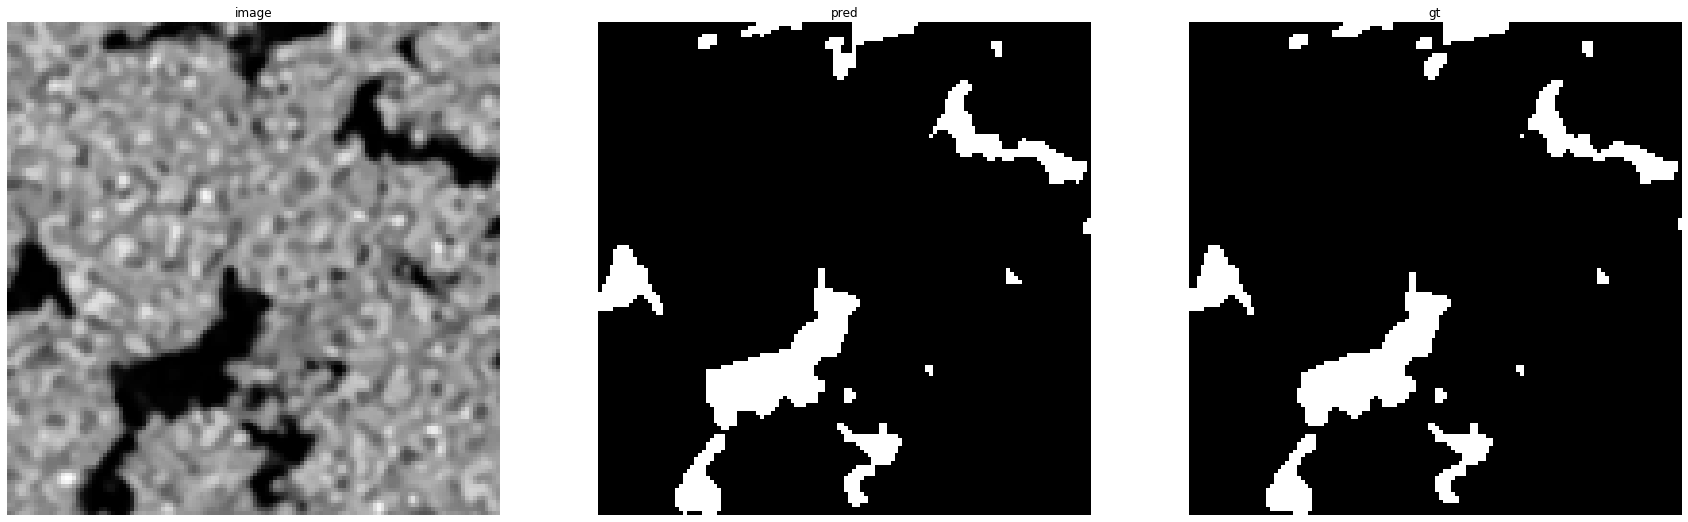

accuracy    : 0.99481201171875
precision   : 0.9550706033376123
recall      : 0.9900199600798403
f1          : 0.9722312969617771
pr_auc      : 0.9982676471938272
iou         : 0.9459631277813096


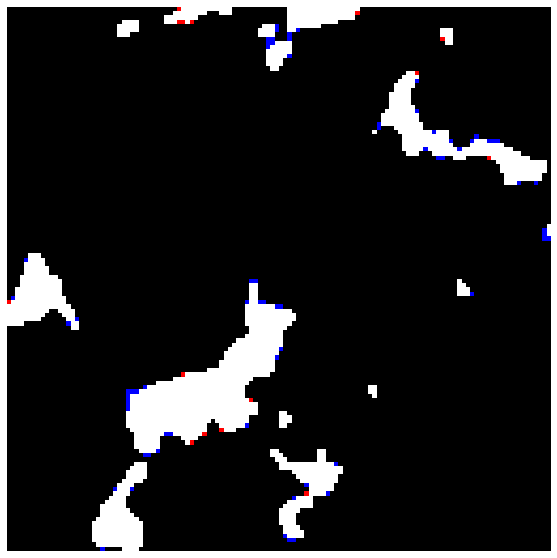

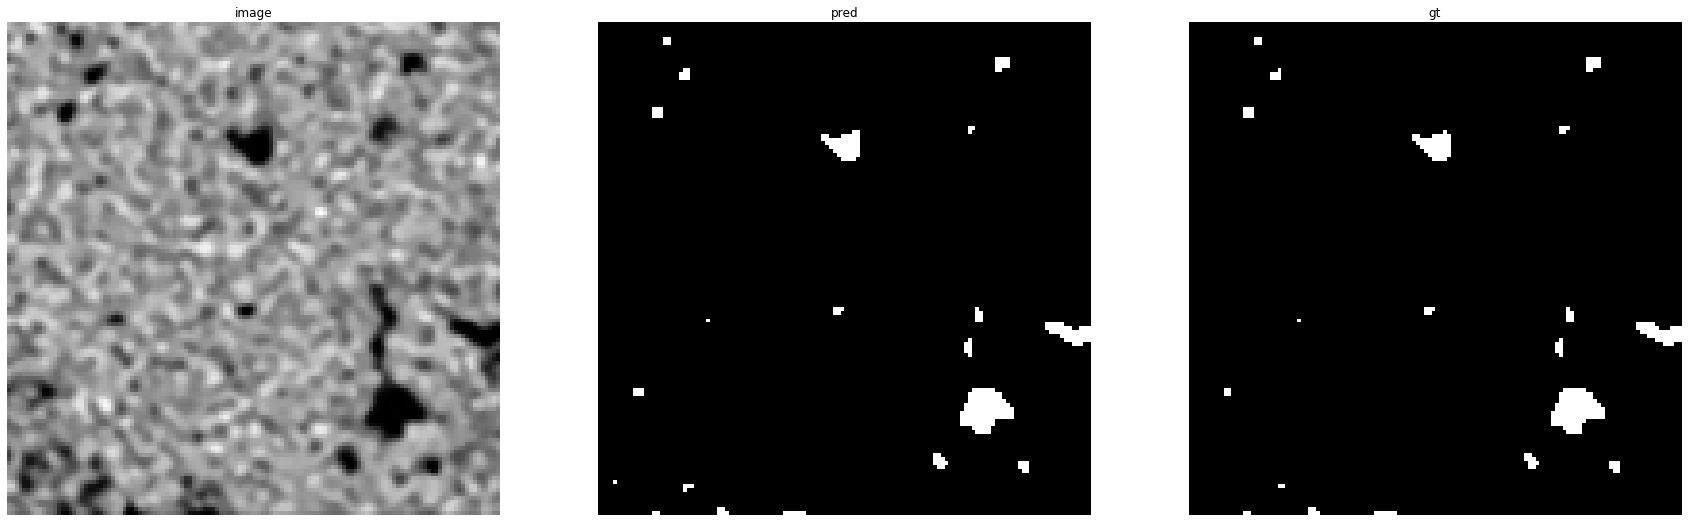

accuracy    : 0.99920654296875
precision   : 0.9680511182108626
recall      : 0.9901960784313726
f1          : 0.9789983844911146
pr_auc      : 0.9979668420433091
iou         : 0.9588607594936709


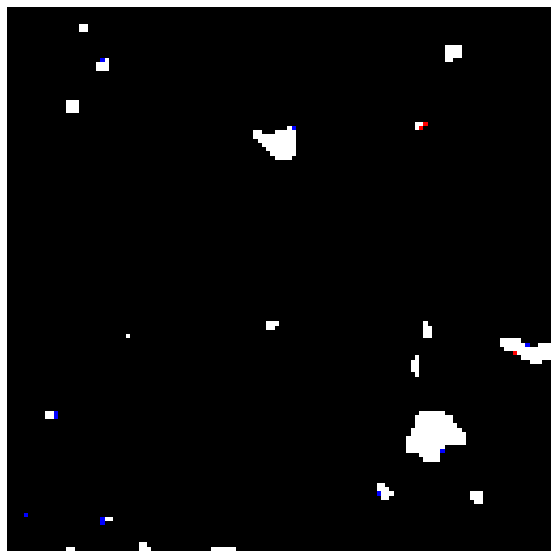

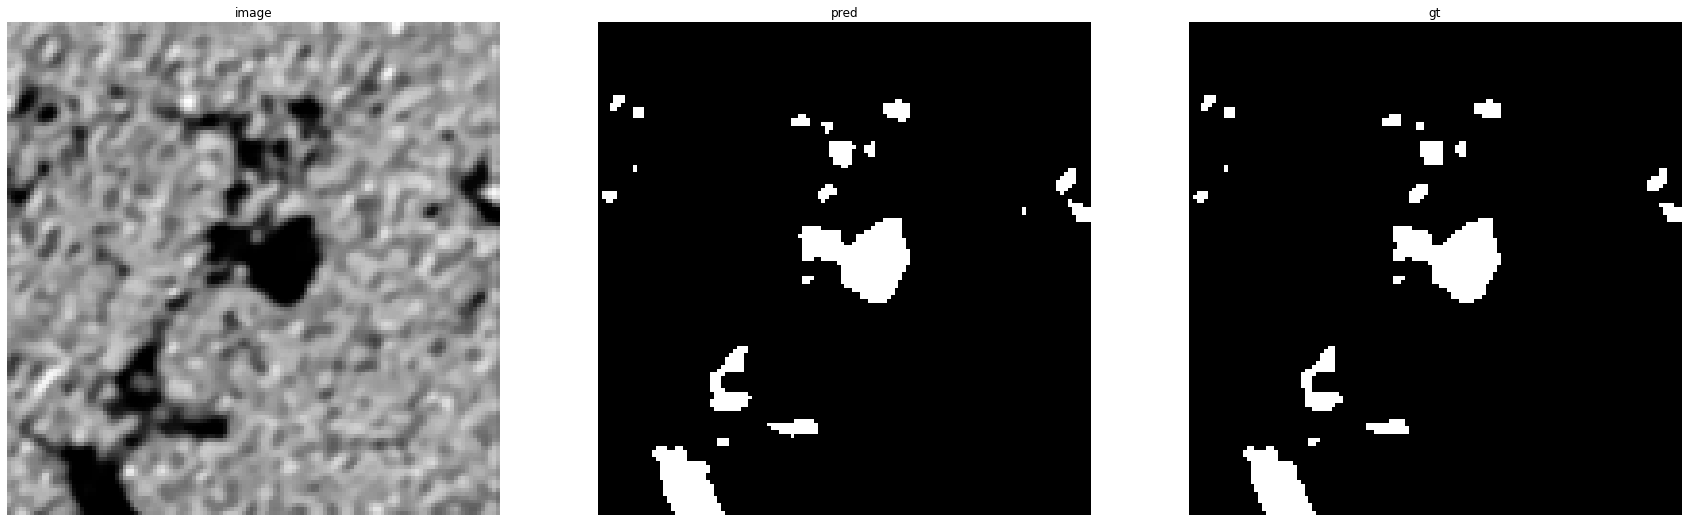

accuracy    : 0.9964599609375
precision   : 0.9466811751904244
recall      : 0.9897610921501706
f1          : 0.9677419354838709
pr_auc      : 0.9980304644617808
iou         : 0.9375


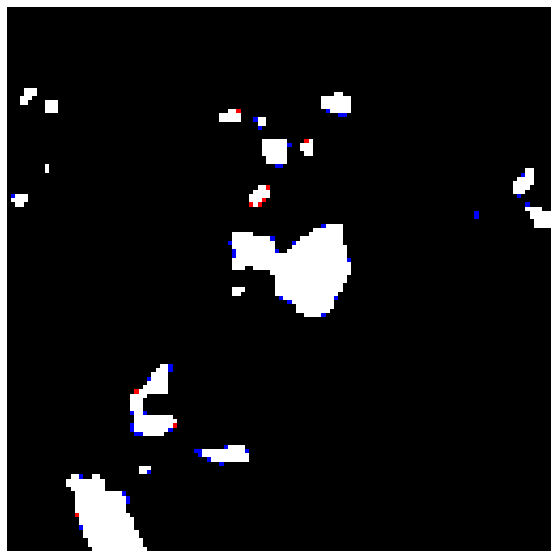

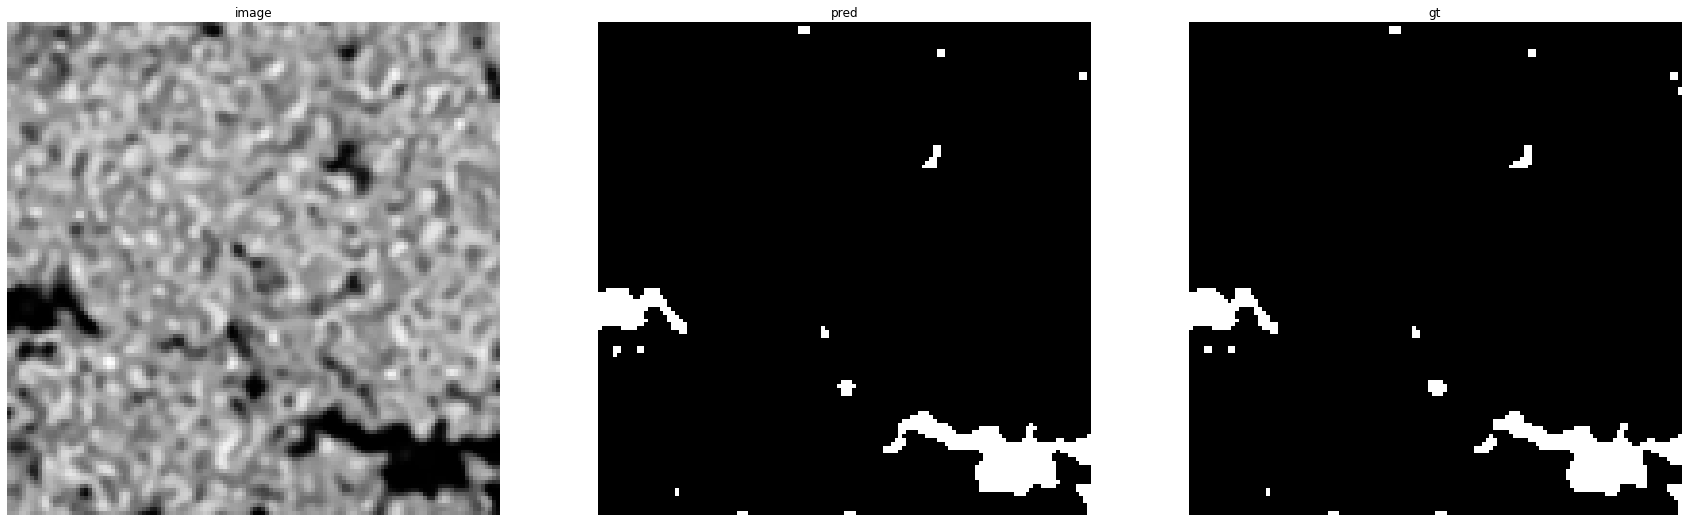

accuracy    : 0.99755859375
precision   : 0.9614285714285714
recall      : 0.9810495626822158
f1          : 0.9711399711399711
pr_auc      : 0.9975796172141409
iou         : 0.9438990182328191


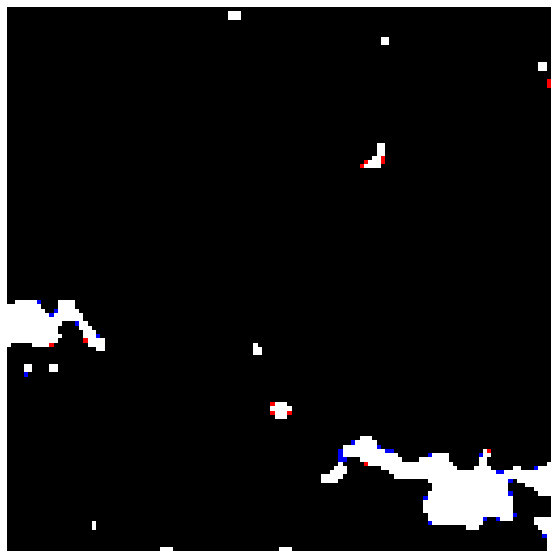

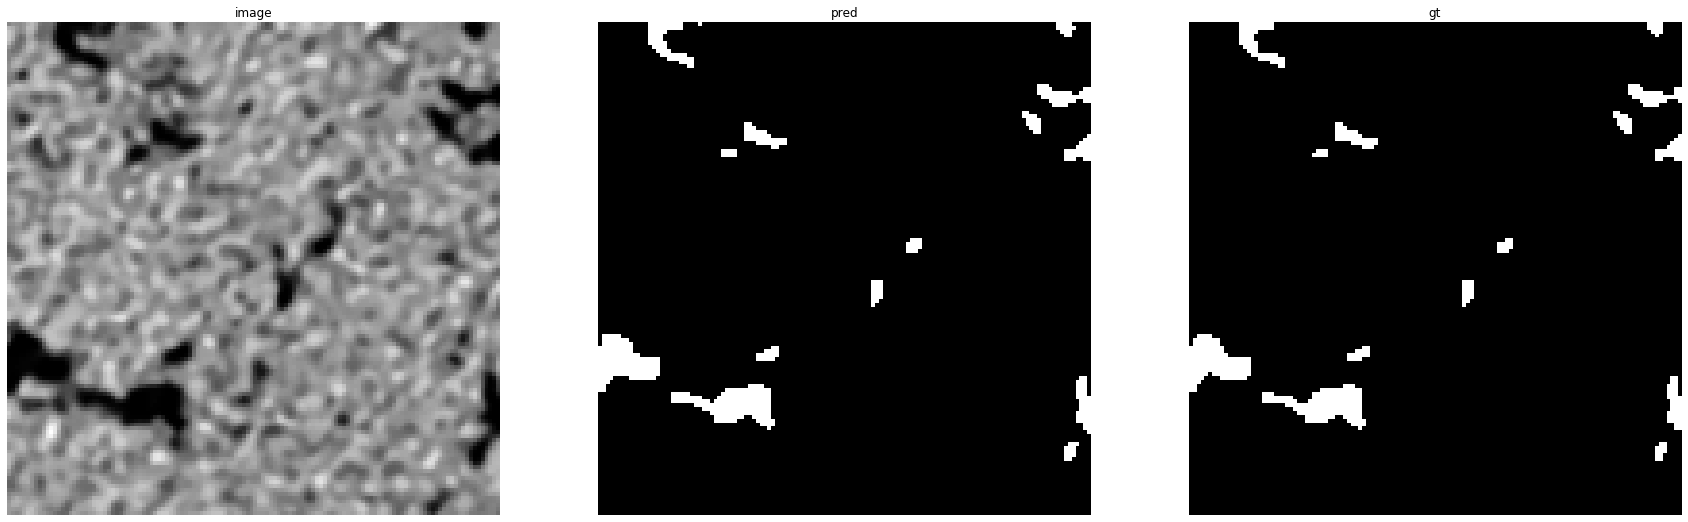

accuracy    : 0.998291015625
precision   : 0.9593114241001565
recall      : 0.9967479674796748
f1          : 0.9776714513556619
pr_auc      : 0.9984339911170778
iou         : 0.9563182527301092


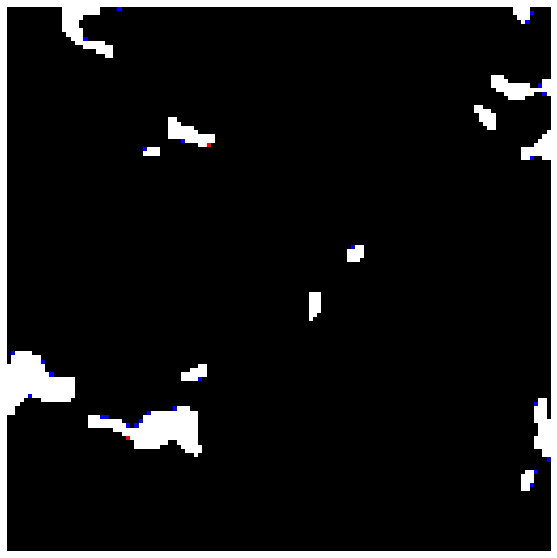

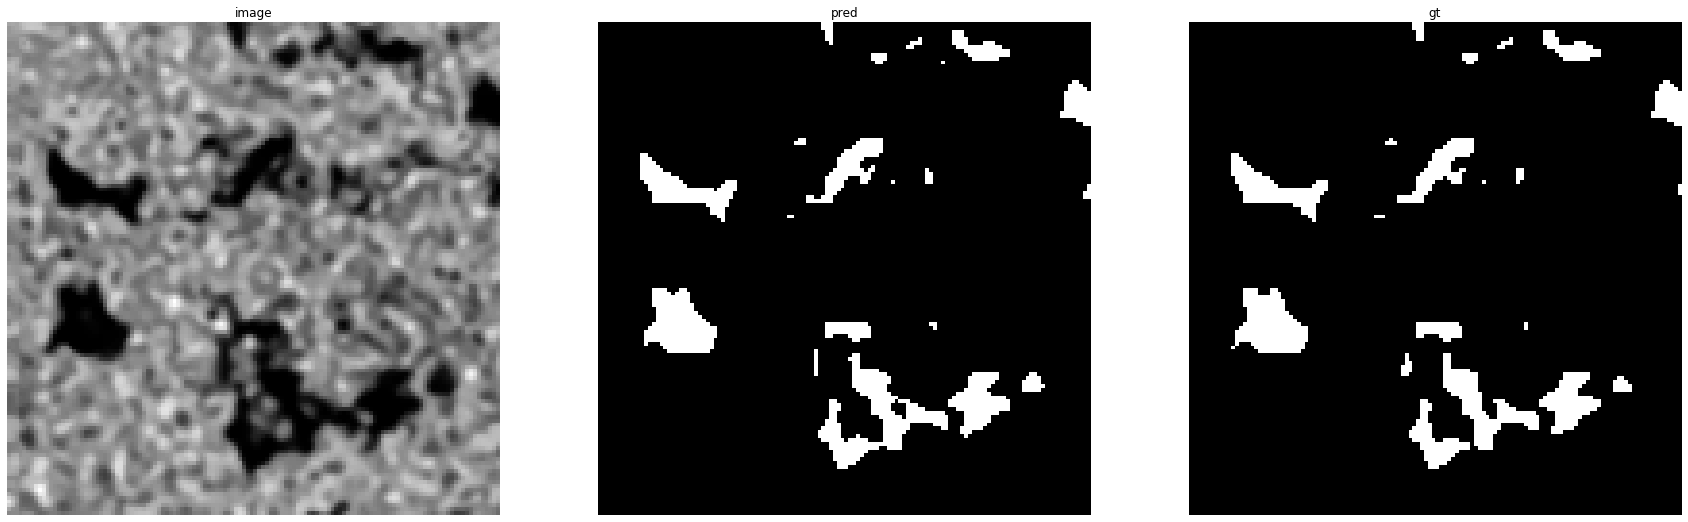

accuracy    : 0.9962158203125
precision   : 0.9661716171617162
recall      : 0.9823825503355704
f1          : 0.9742096505823626
pr_auc      : 0.9979360152478031
iou         : 0.9497161394971614


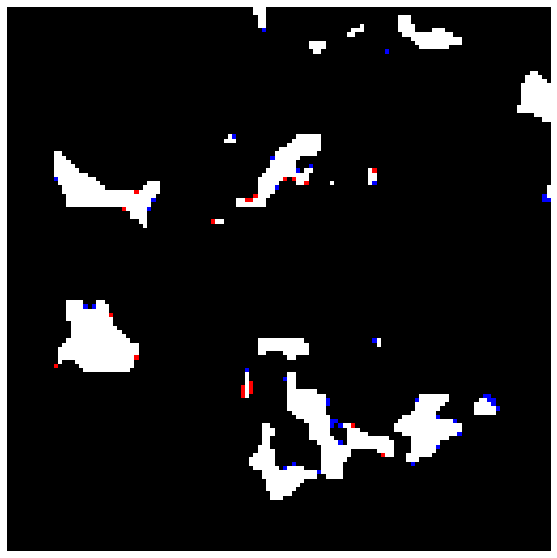

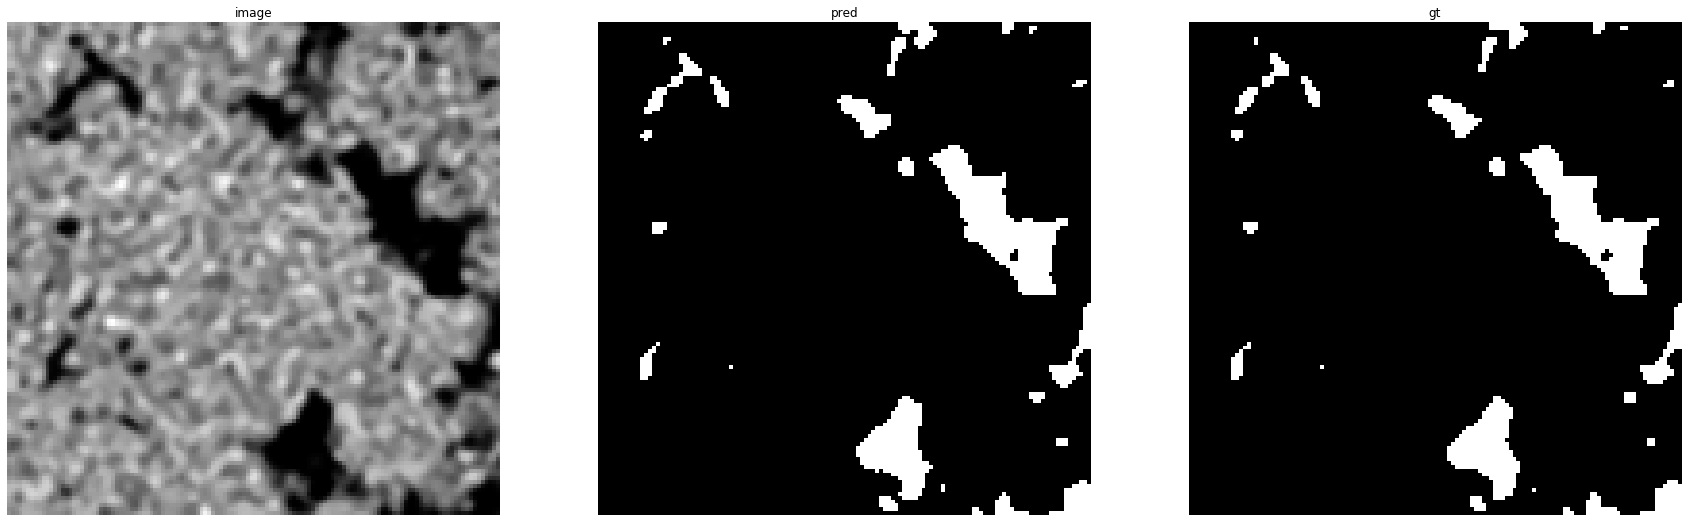

accuracy    : 0.995361328125
precision   : 0.9554531490015361
recall      : 0.9857369255150554
f1          : 0.9703588143525741
pr_auc      : 0.9974914274355549
iou         : 0.9424242424242424


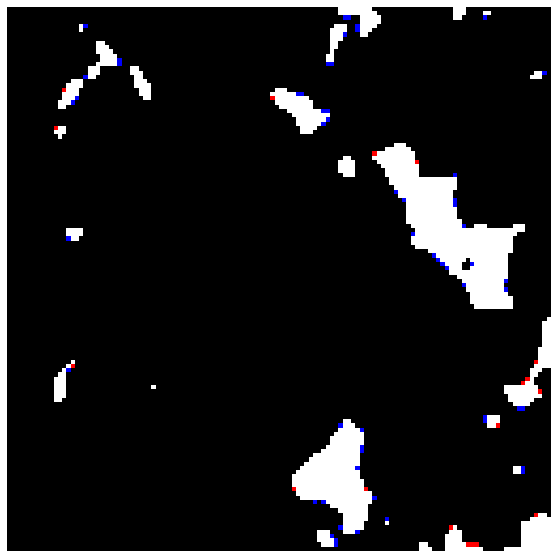

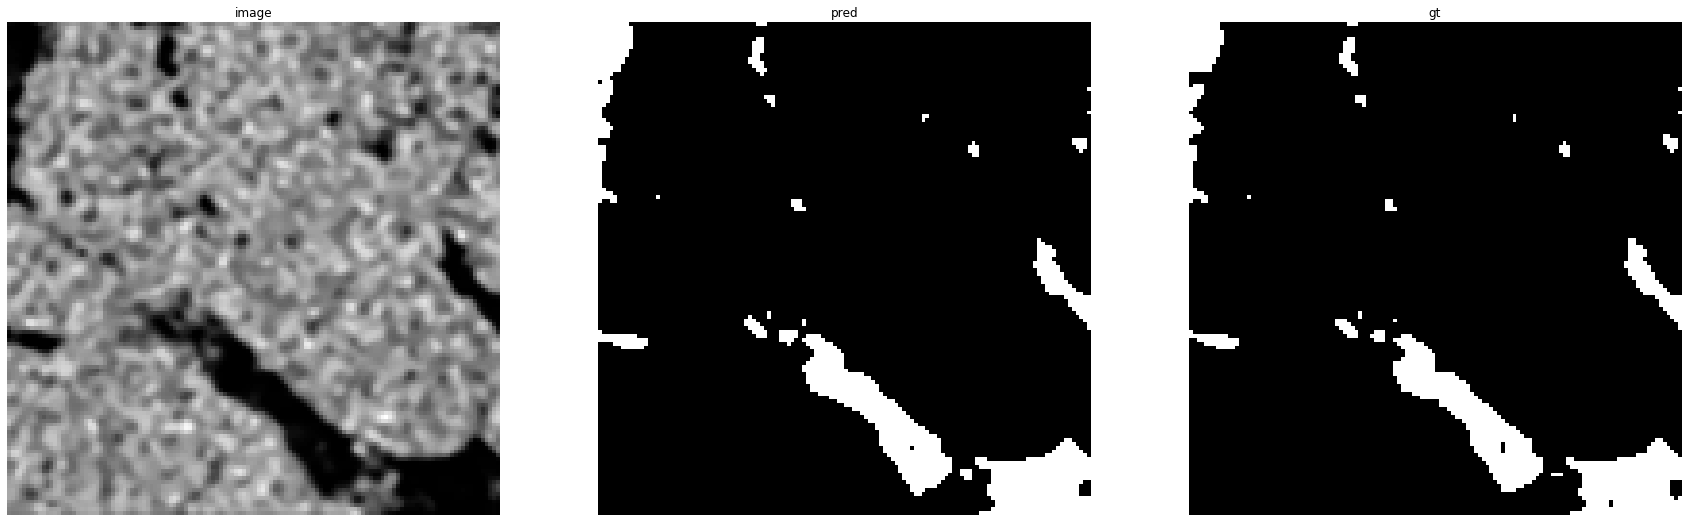

accuracy    : 0.99554443359375
precision   : 0.9543808834178131
recall      : 0.9924698795180723
f1          : 0.9730527870062753
pr_auc      : 0.9982127195039157
iou         : 0.9475197699496765


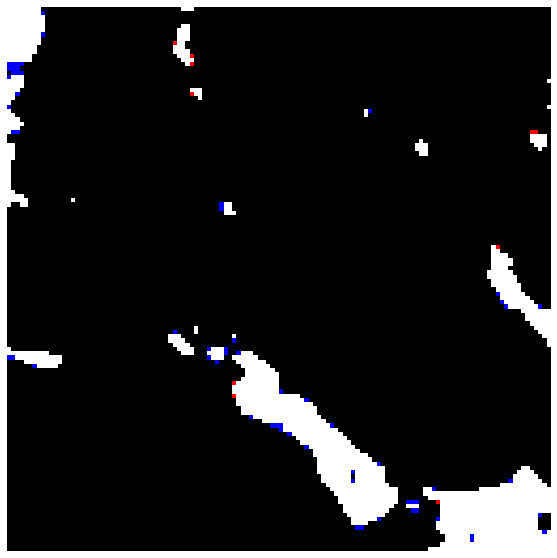

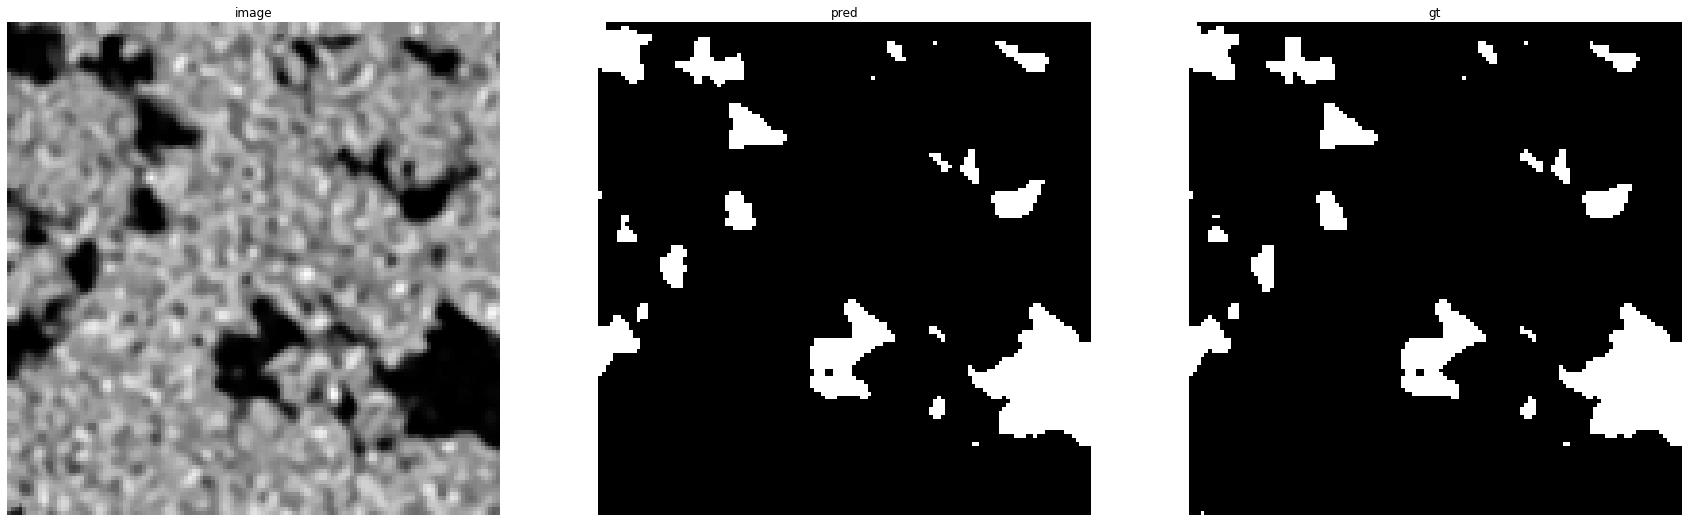

accuracy    : 0.9947509765625
precision   : 0.9635560463832137
recall      : 0.9886685552407932
f1          : 0.975950782997763
pr_auc      : 0.9987198446850678
iou         : 0.9530311305297652


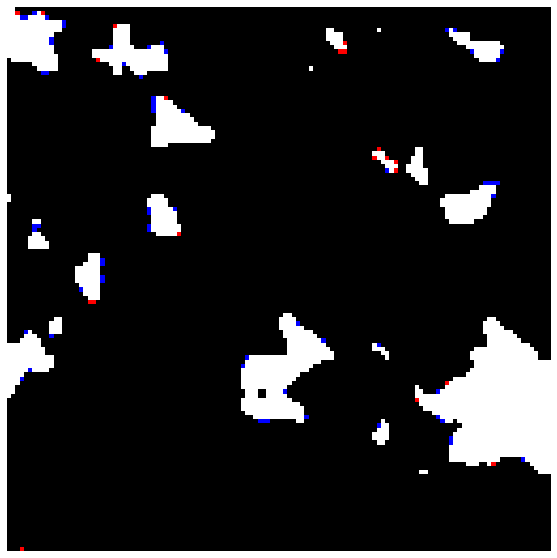

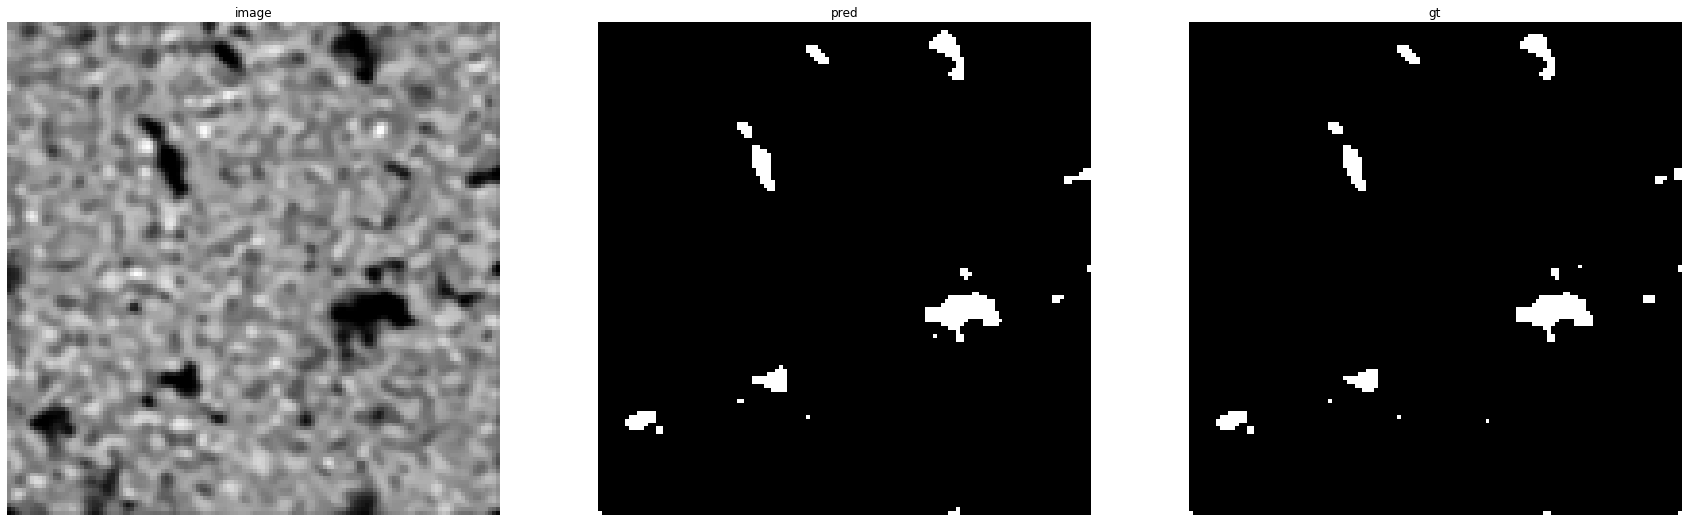

accuracy    : 0.99847412109375
precision   : 0.9480874316939891
recall      : 0.9830028328611898
f1          : 0.965229485396384
pr_auc      : 0.9955365558195507
iou         : 0.9327956989247311


Prediction for carb71:


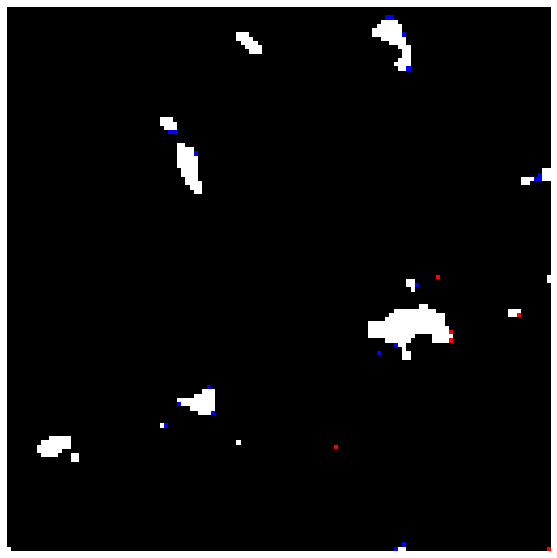

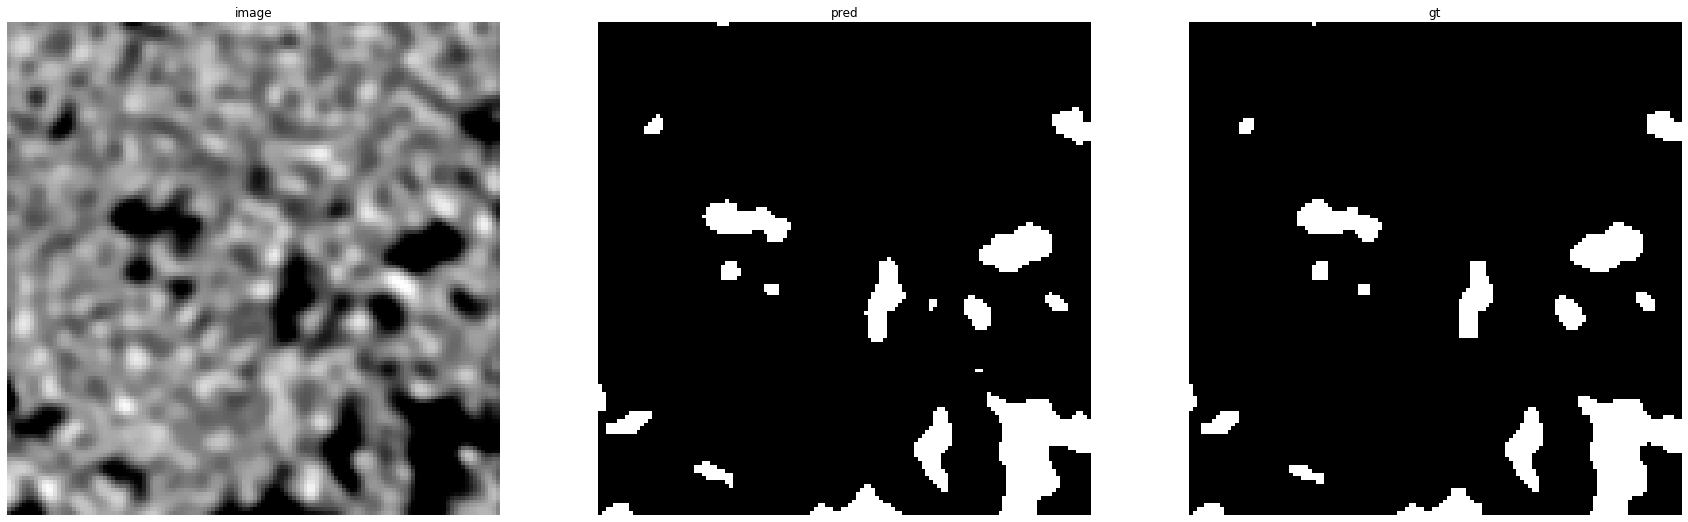

accuracy    : 0.9940185546875
precision   : 0.9453900709219858
recall      : 0.9844903988183161
f1          : 0.9645441389290882
pr_auc      : 0.9962838336668316
iou         : 0.9315164220824598


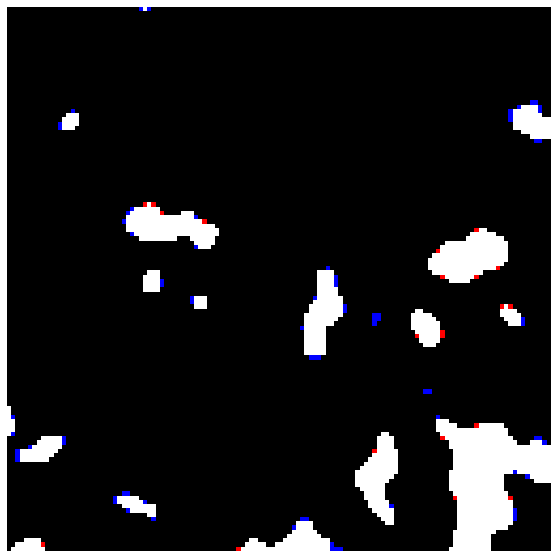

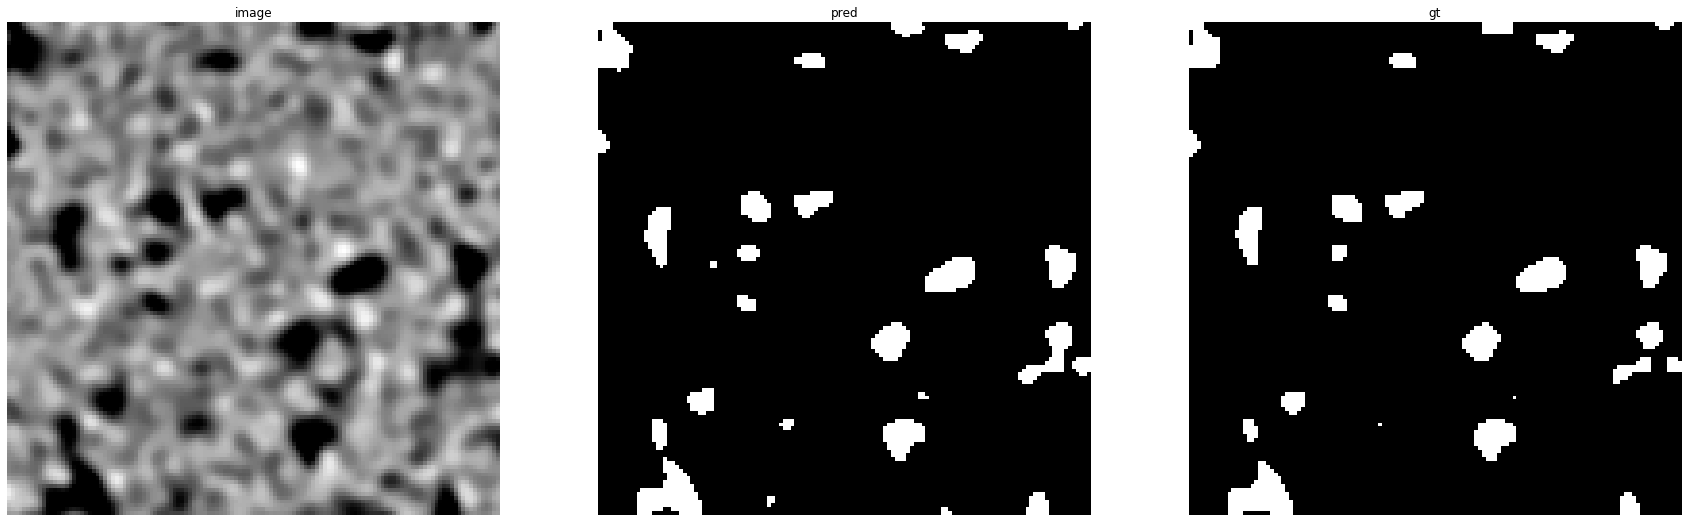

accuracy    : 0.9927978515625
precision   : 0.9054178145087236
recall      : 0.985014985014985
f1          : 0.9435406698564592
pr_auc      : 0.9914391749961401
iou         : 0.8931159420289855


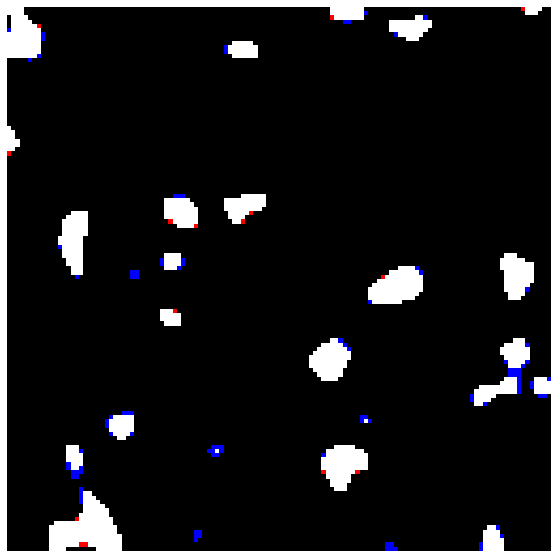

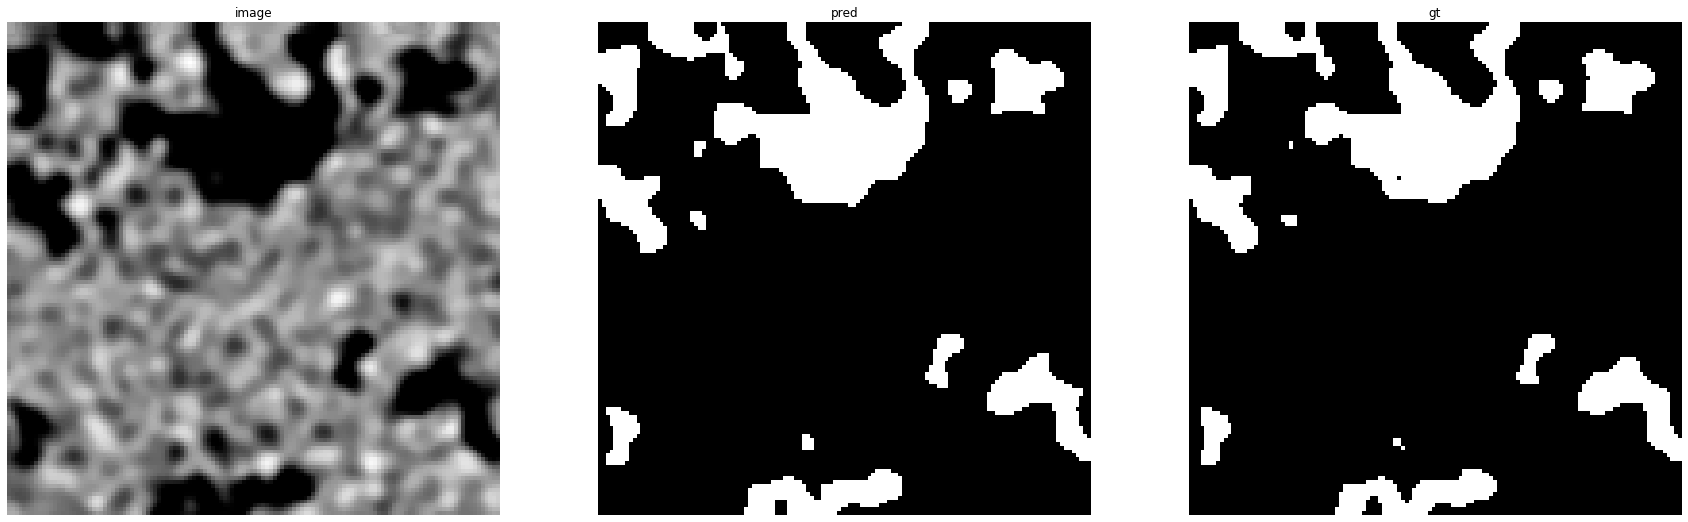

accuracy    : 0.9918212890625
precision   : 0.9660504201680672
recall      : 0.9886480908152735
f1          : 0.9772186331179871
pr_auc      : 0.9981873997218327
iou         : 0.9554521276595744


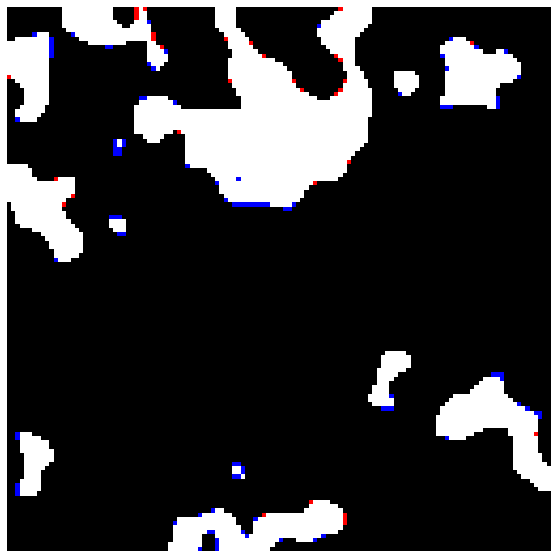

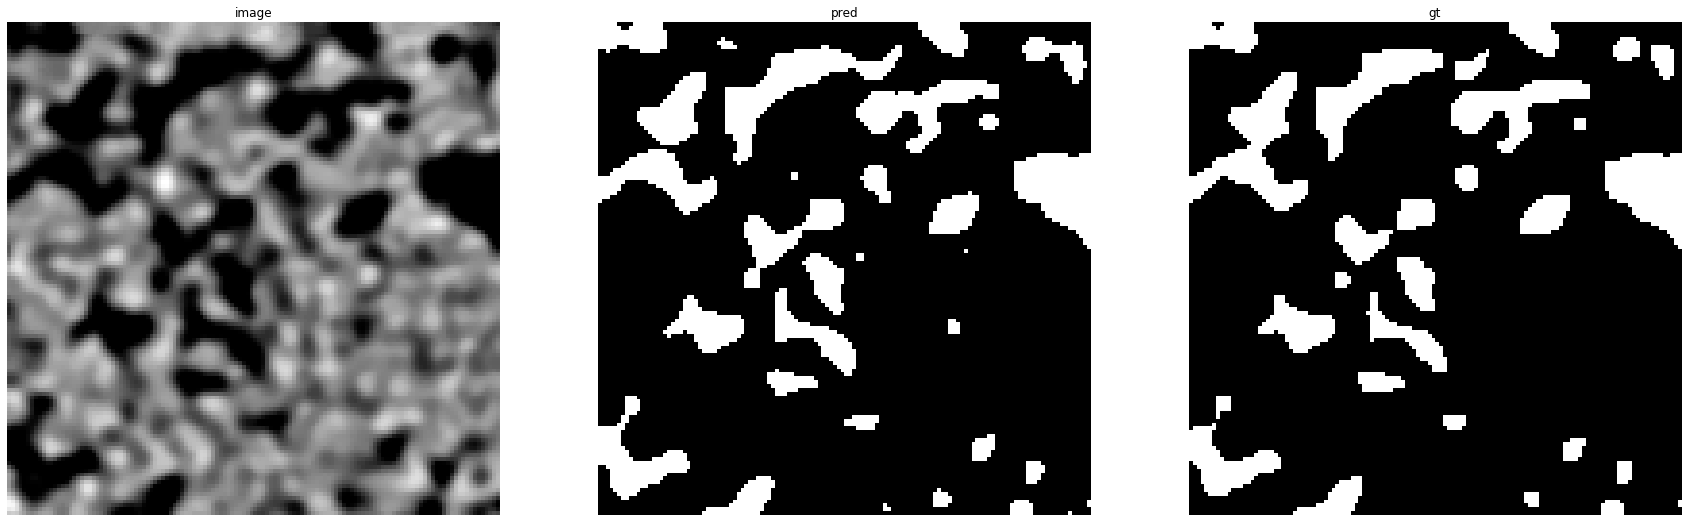

accuracy    : 0.98236083984375
precision   : 0.9219053791315619
recall      : 0.9834082267542343
f1          : 0.9516641578859342
pr_auc      : 0.9927776317179077
iou         : 0.9077855775366943


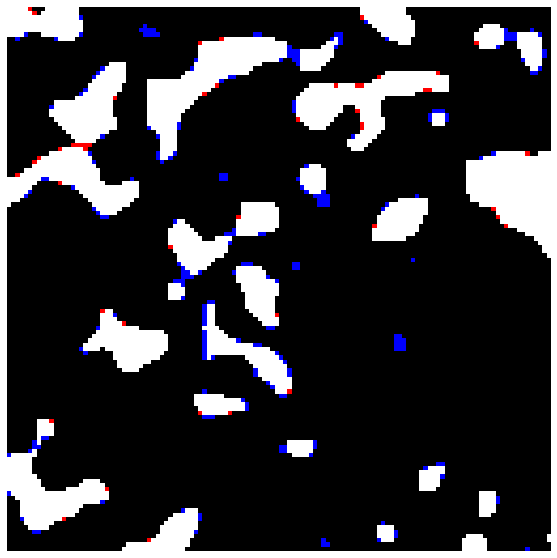

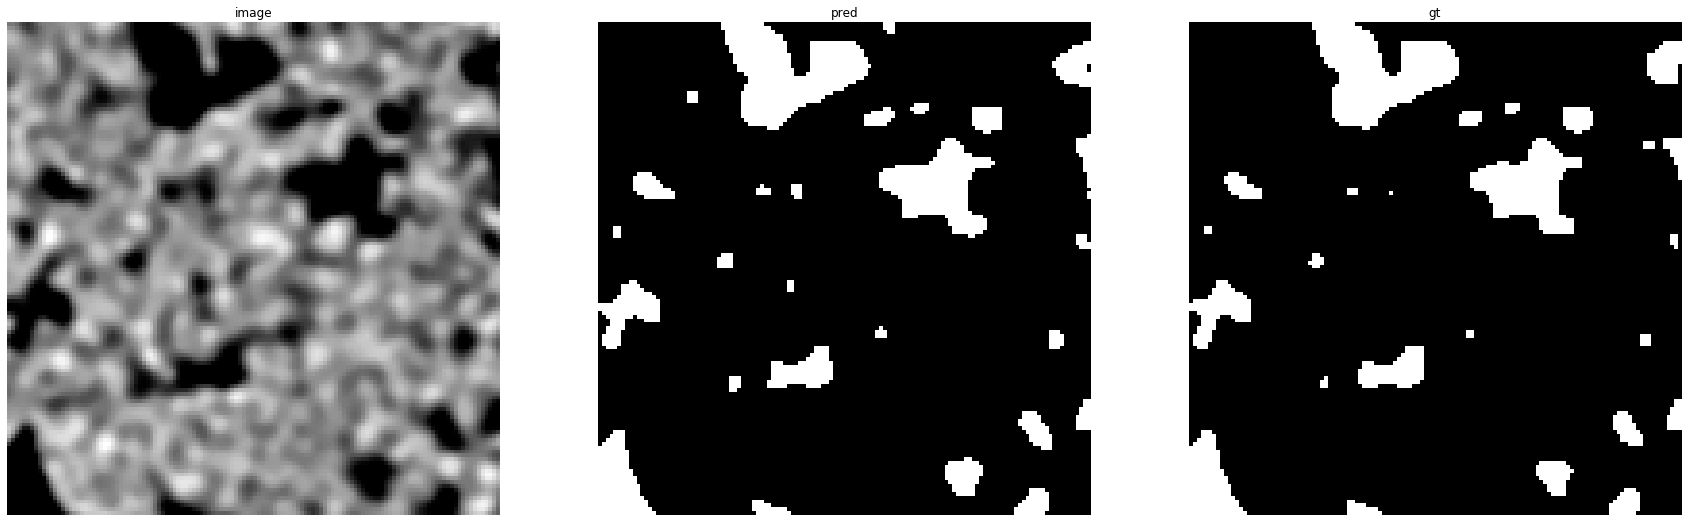

accuracy    : 0.98822021484375
precision   : 0.9256360078277887
recall      : 0.9787894464562855
f1          : 0.9514709580085492
pr_auc      : 0.9925429891688268
iou         : 0.9074340527577938


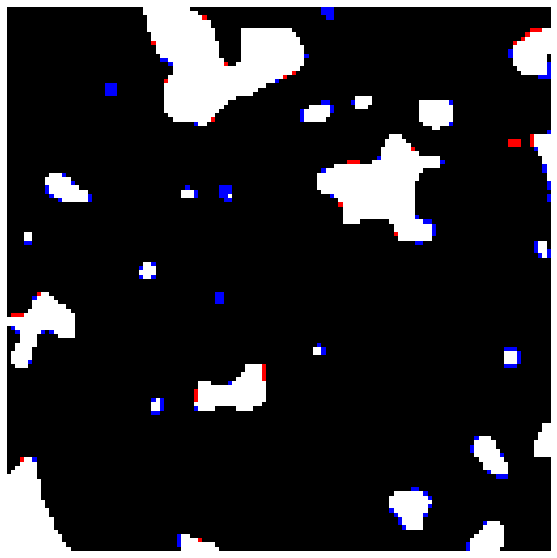

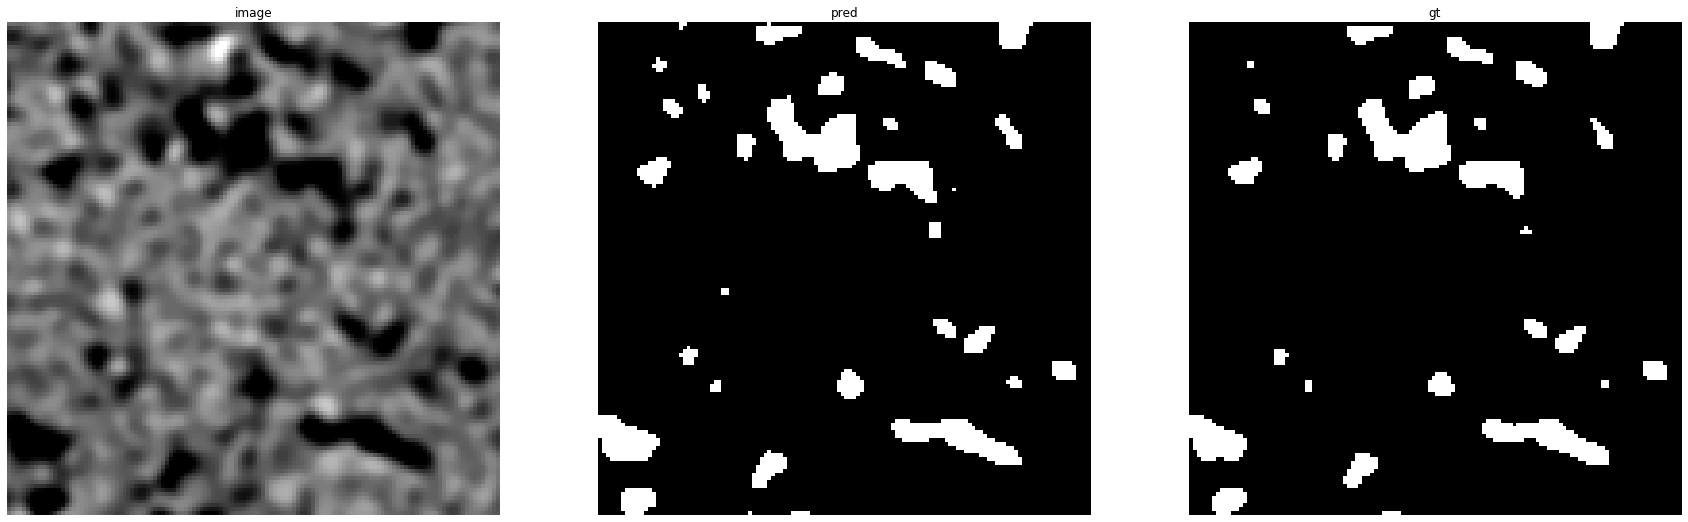

accuracy    : 0.9910888671875
precision   : 0.9083094555873925
recall      : 0.9860031104199067
f1          : 0.9455630126771066
pr_auc      : 0.9908480768672538
iou         : 0.8967468175388967


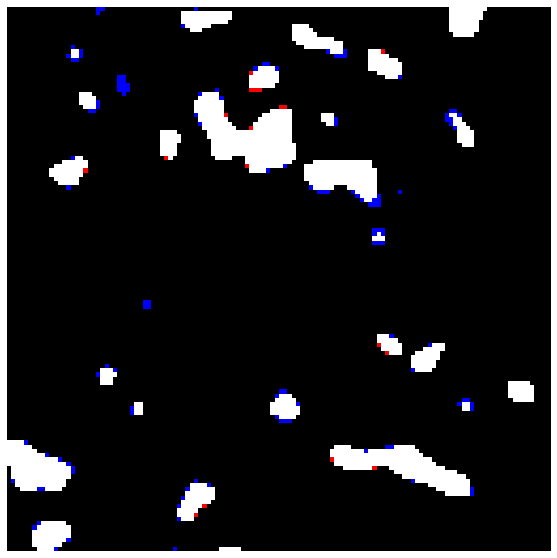

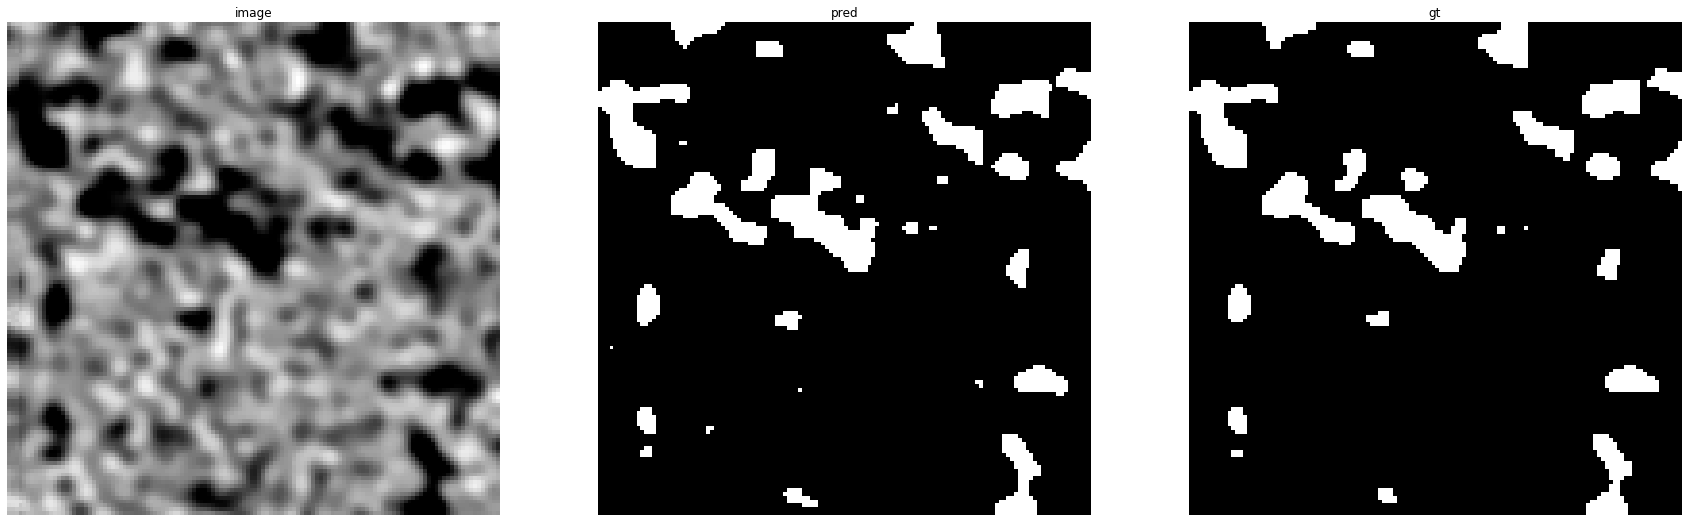

accuracy    : 0.98834228515625
precision   : 0.9137276180141074
recall      : 0.9813519813519813
f1          : 0.9463332396740657
pr_auc      : 0.9924349858511583
iou         : 0.8981333333333333


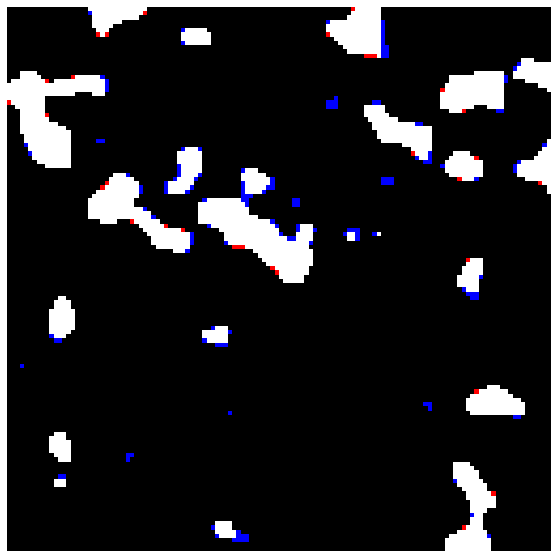

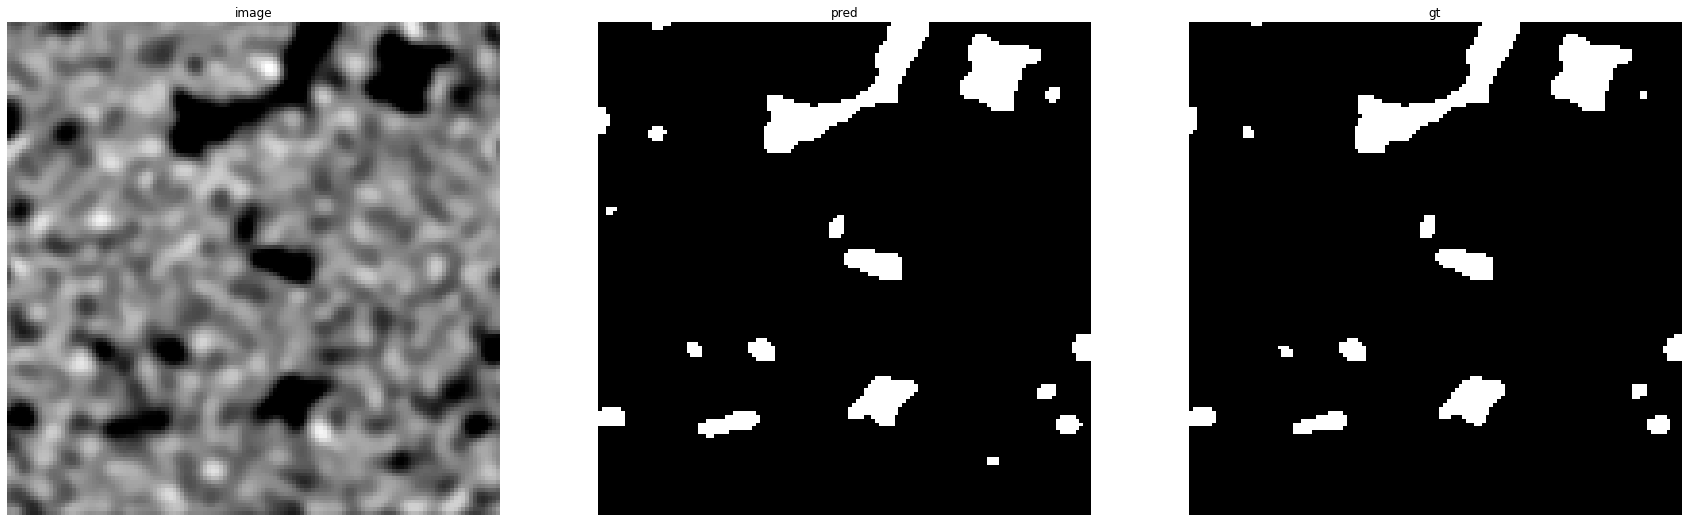

accuracy    : 0.99462890625
precision   : 0.9353518821603928
recall      : 0.9921875
f1          : 0.9629317607413648
pr_auc      : 0.9949026328409412
iou         : 0.9285134037367994


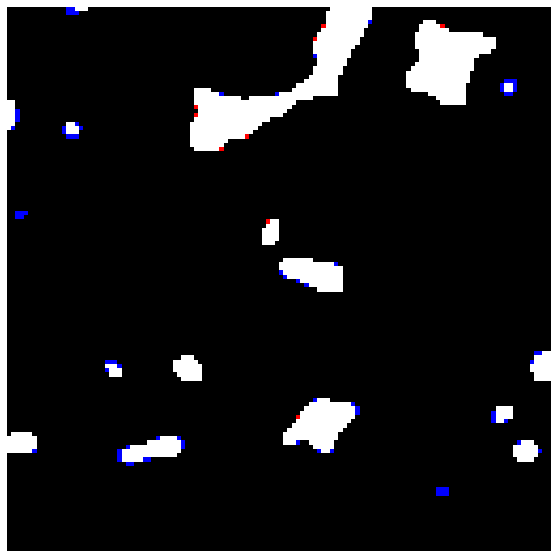

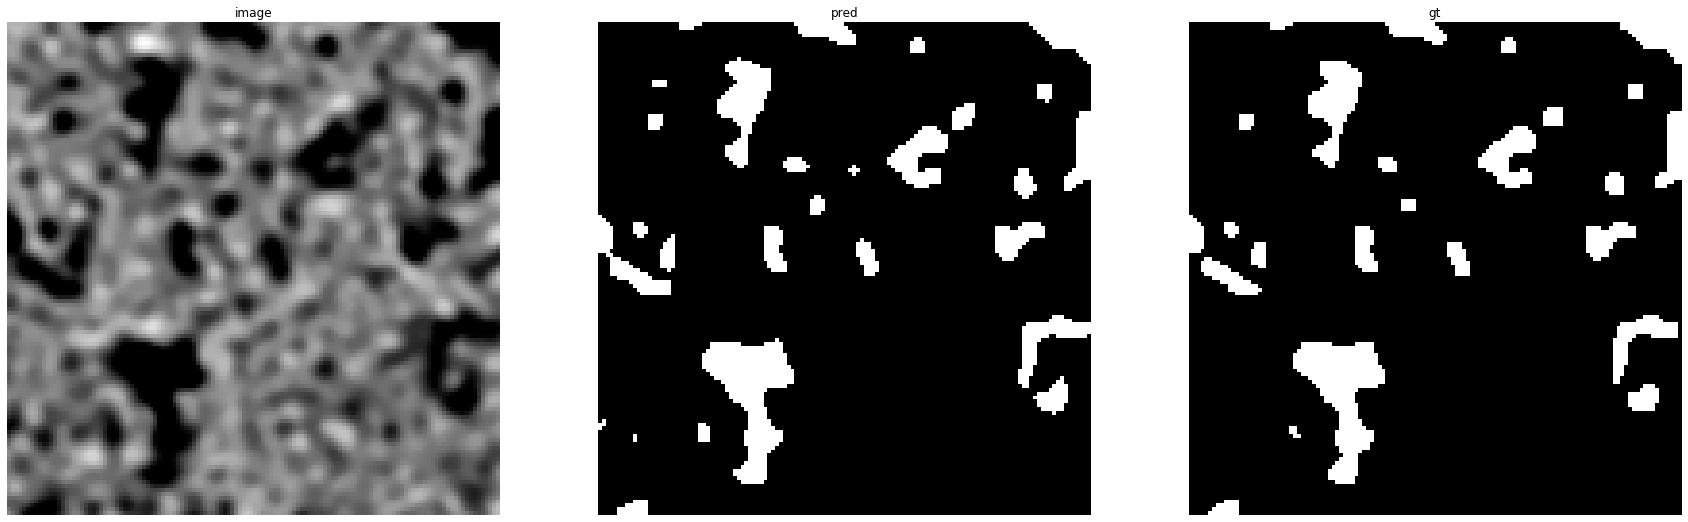

accuracy    : 0.99114990234375
precision   : 0.9279228149829739
recall      : 0.9891107078039928
f1          : 0.9575402635431919
pr_auc      : 0.9922614772407145
iou         : 0.9185393258426966


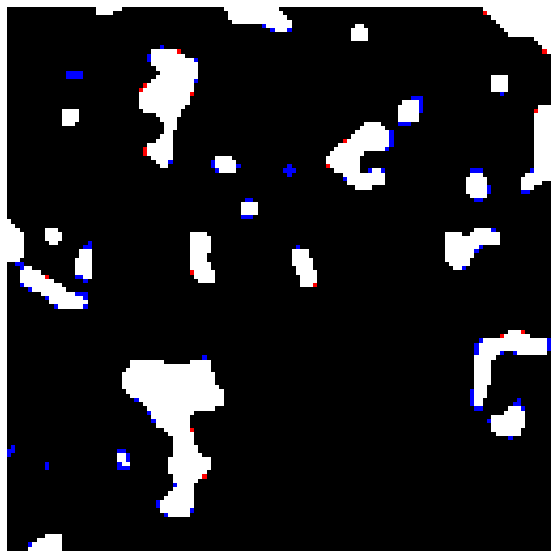

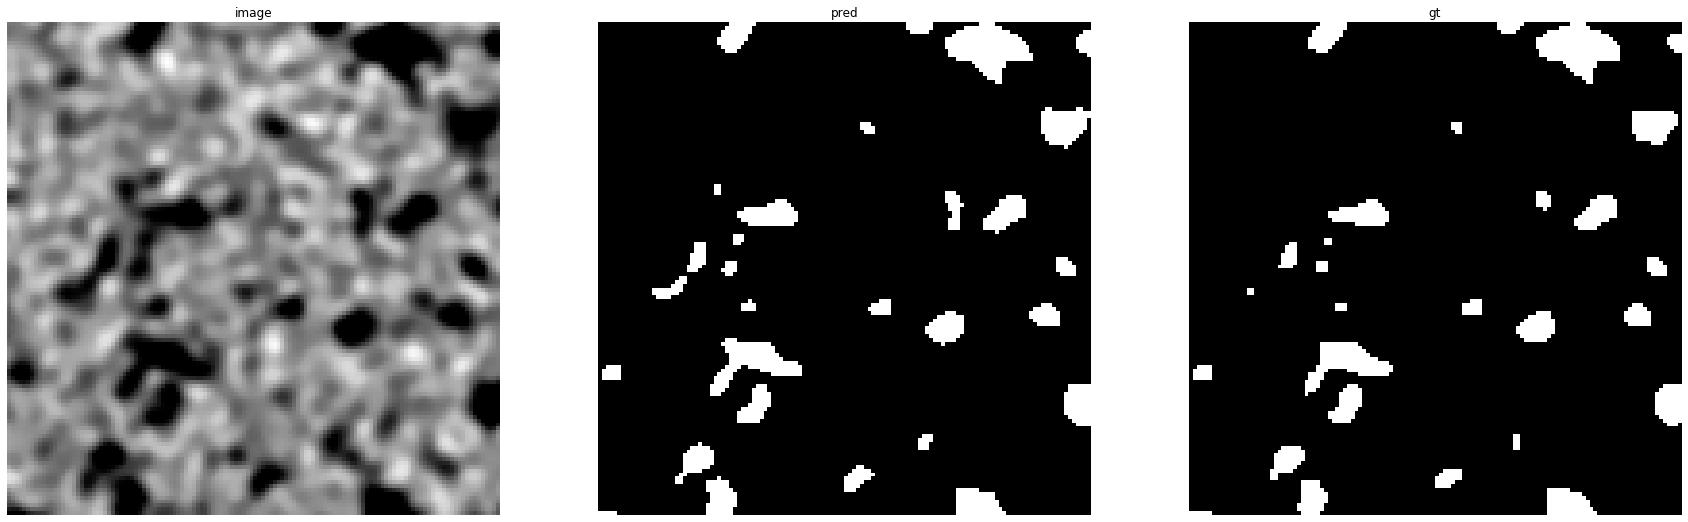

accuracy    : 0.9901123046875
precision   : 0.8930678466076696
recall      : 0.9861563517915309
f1          : 0.9373065015479877
pr_auc      : 0.9876476259161312
iou         : 0.8820101966496723


Prediction for carbRNF:


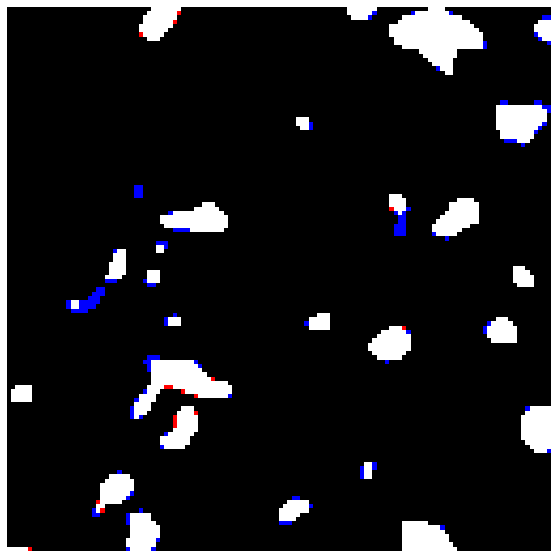

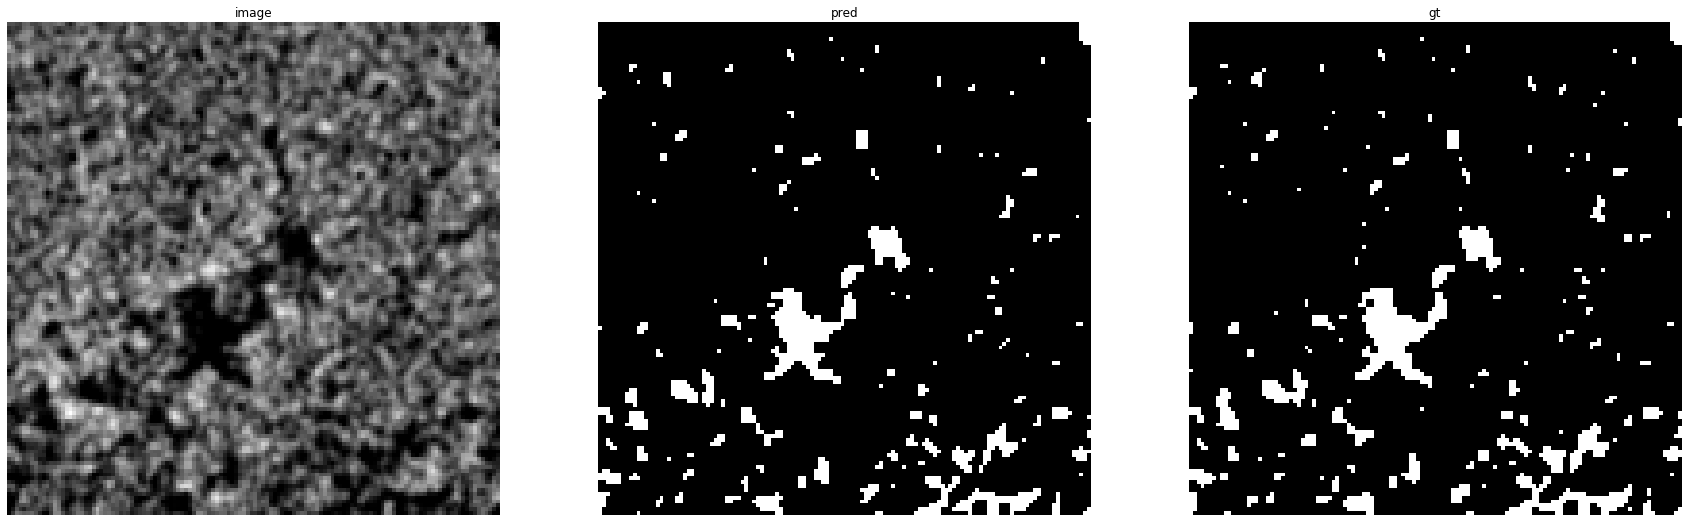

accuracy    : 0.9874267578125
precision   : 0.9763986013986014
recall      : 0.8618827160493827
f1          : 0.9155737704918032
pr_auc      : 0.9868959362466414
iou         : 0.8442932728647015


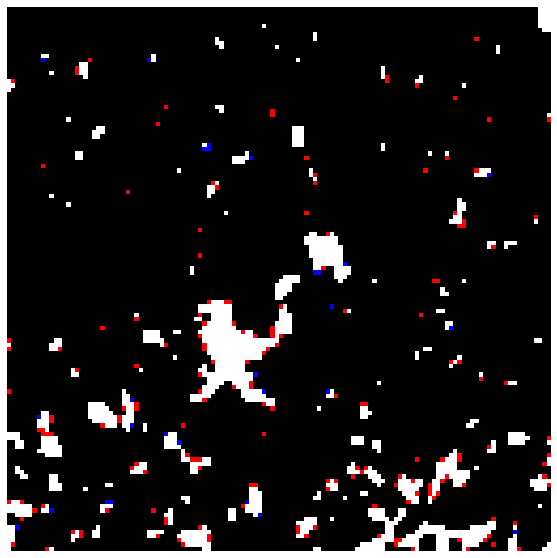

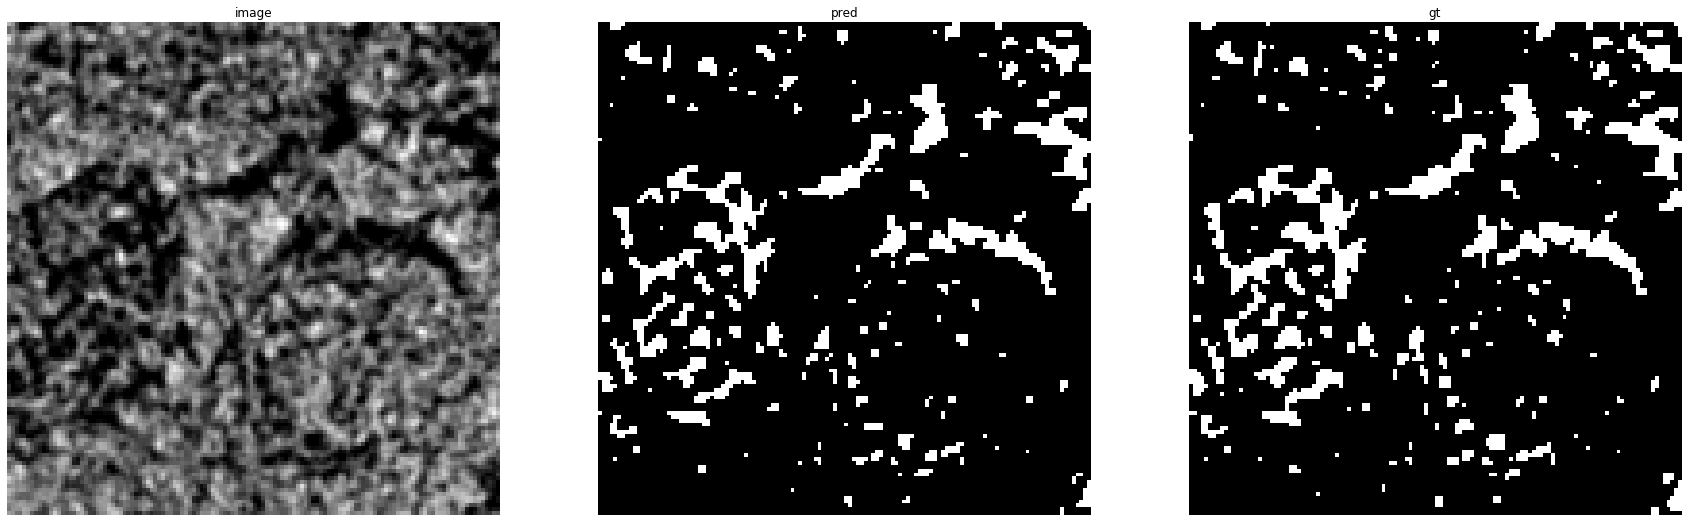

accuracy    : 0.9769287109375
precision   : 0.9767932489451476
recall      : 0.8472095150960659
f1          : 0.9073983341499265
pr_auc      : 0.9860335522660608
iou         : 0.8304932735426009


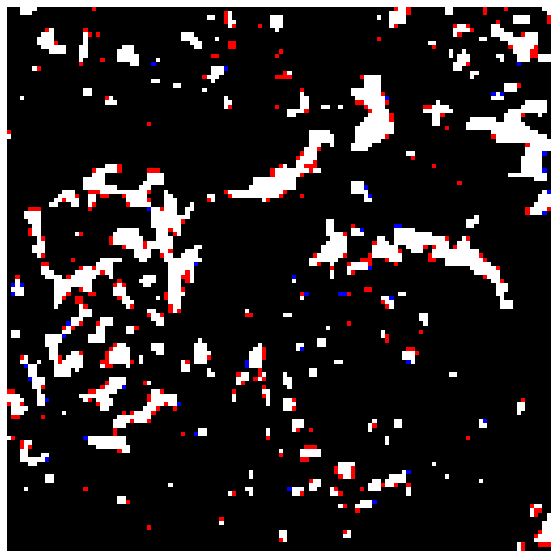

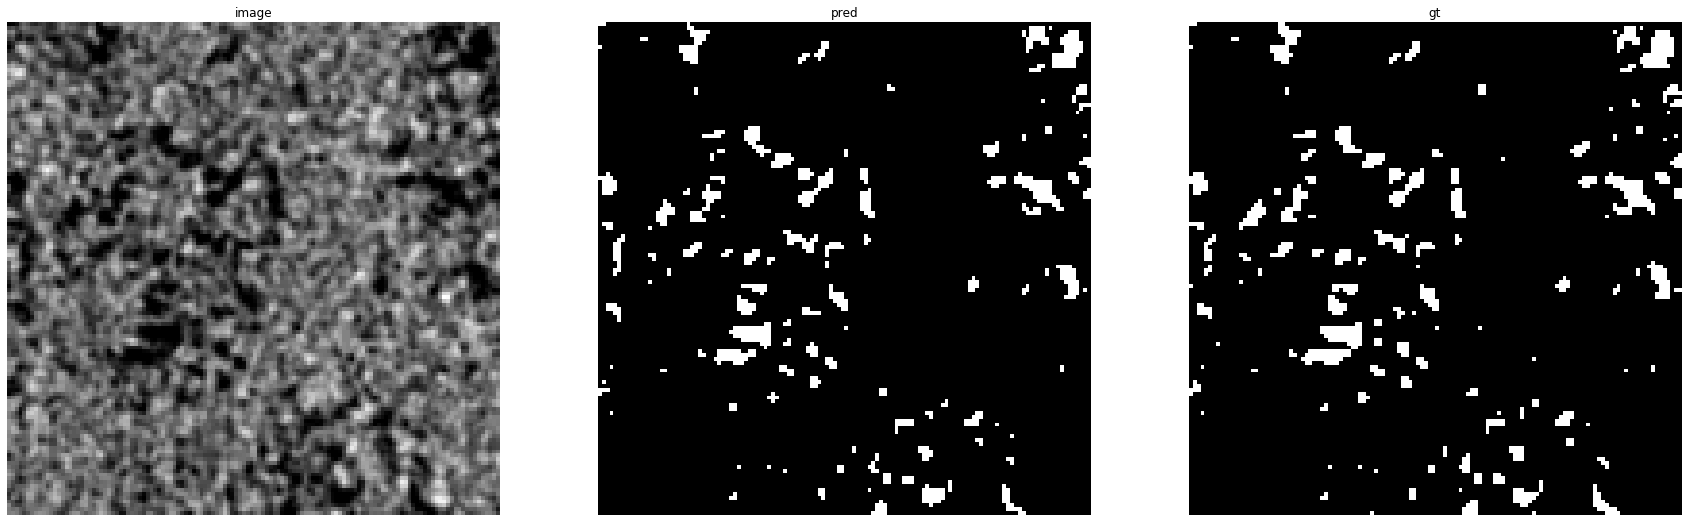

accuracy    : 0.98828125
precision   : 0.9680412371134021
recall      : 0.8536363636363636
f1          : 0.9072463768115941
pr_auc      : 0.9833702181380459
iou         : 0.830238726790451


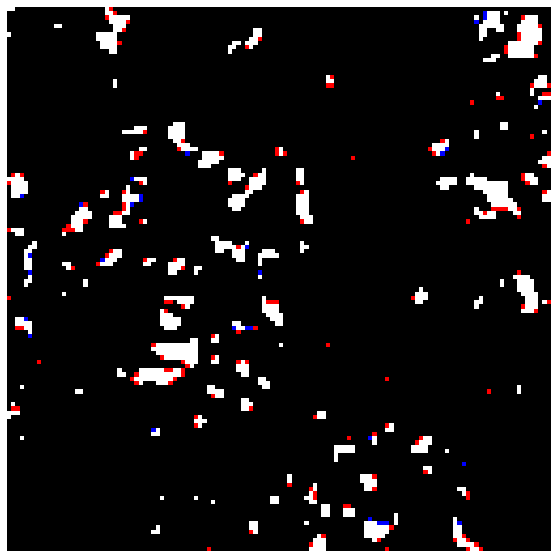

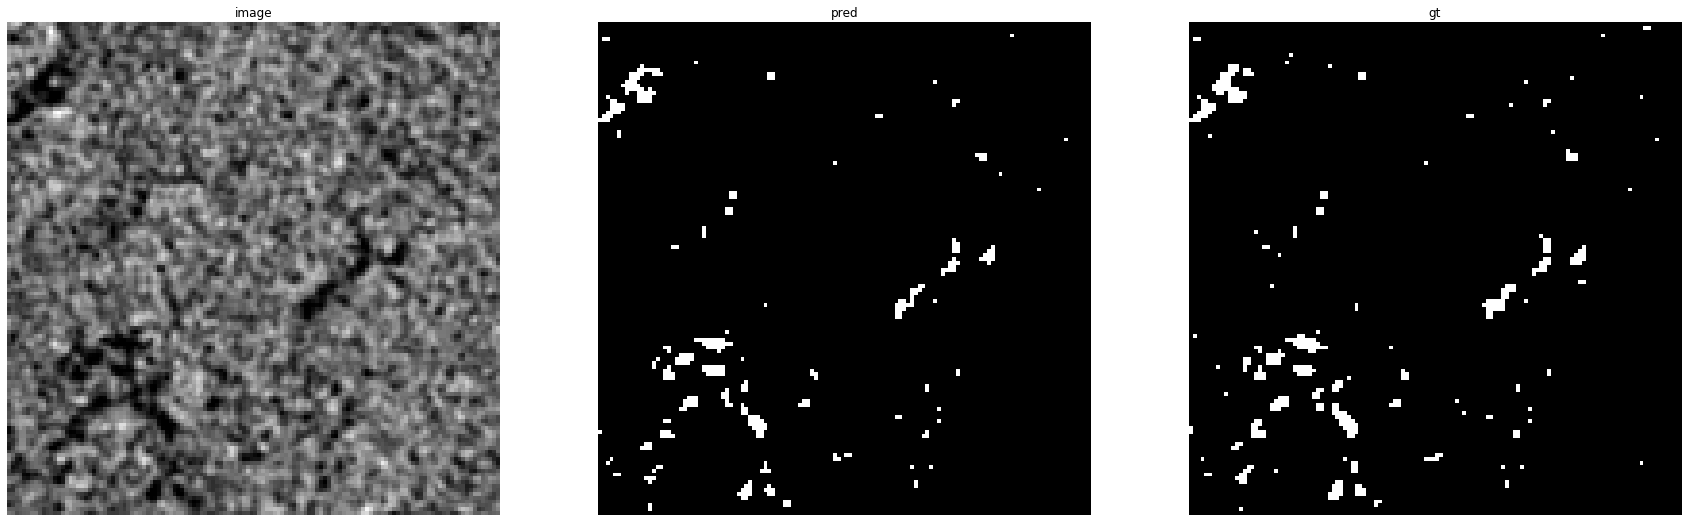

accuracy    : 0.99334716796875
precision   : 0.9530386740331491
recall      : 0.7894736842105263
f1          : 0.8635794743429287
pr_auc      : 0.9696133541260604
iou         : 0.7599118942731278


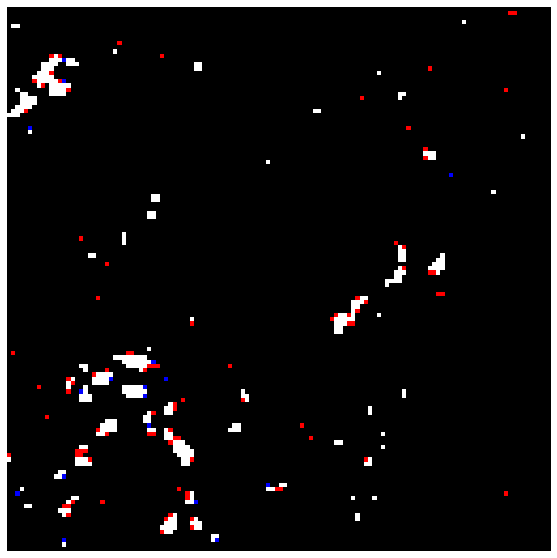

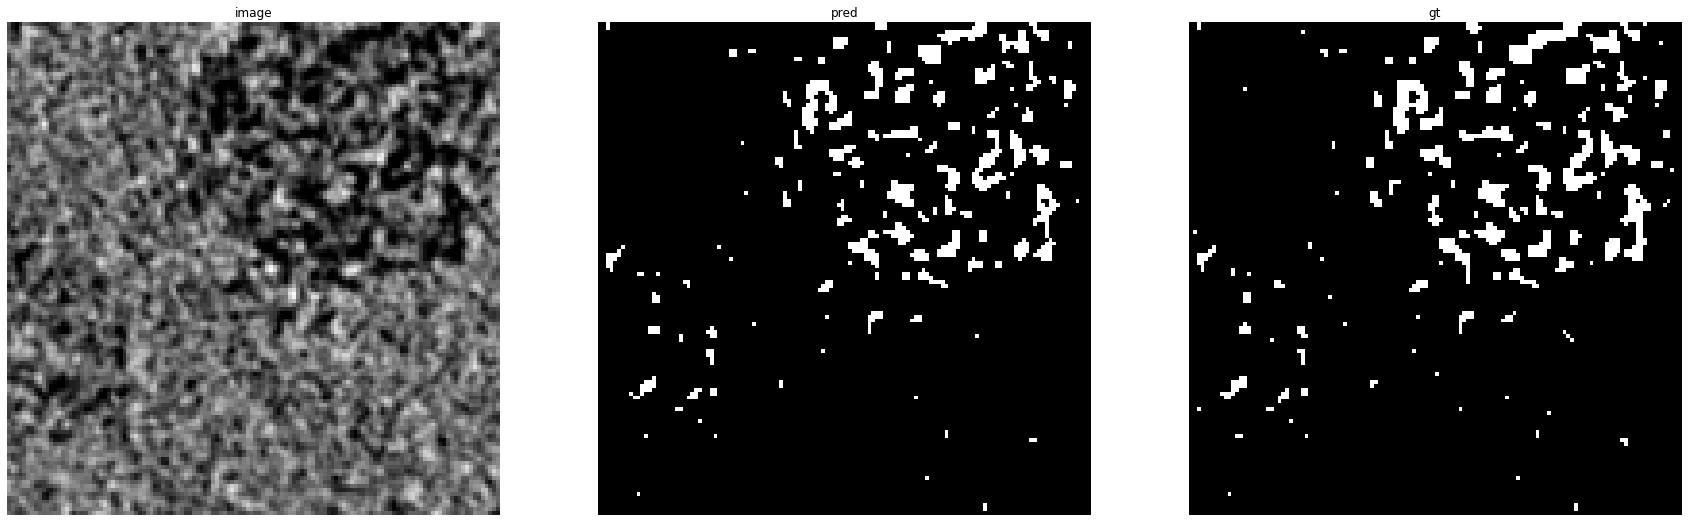

accuracy    : 0.986572265625
precision   : 0.9689762150982419
recall      : 0.831410825199645
f1          : 0.8949379178605539
pr_auc      : 0.979783553234602
iou         : 0.8098530682800346


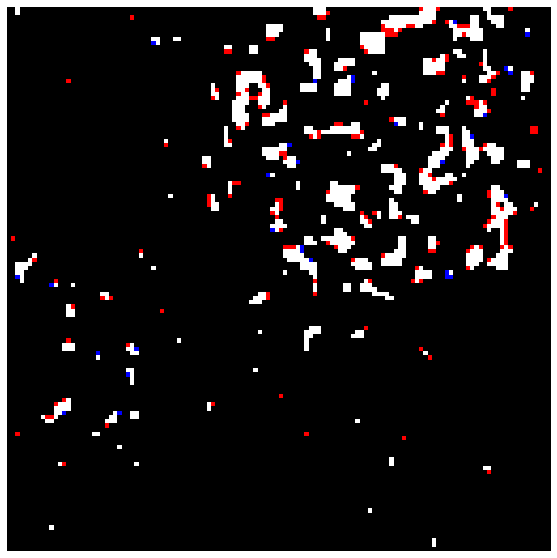

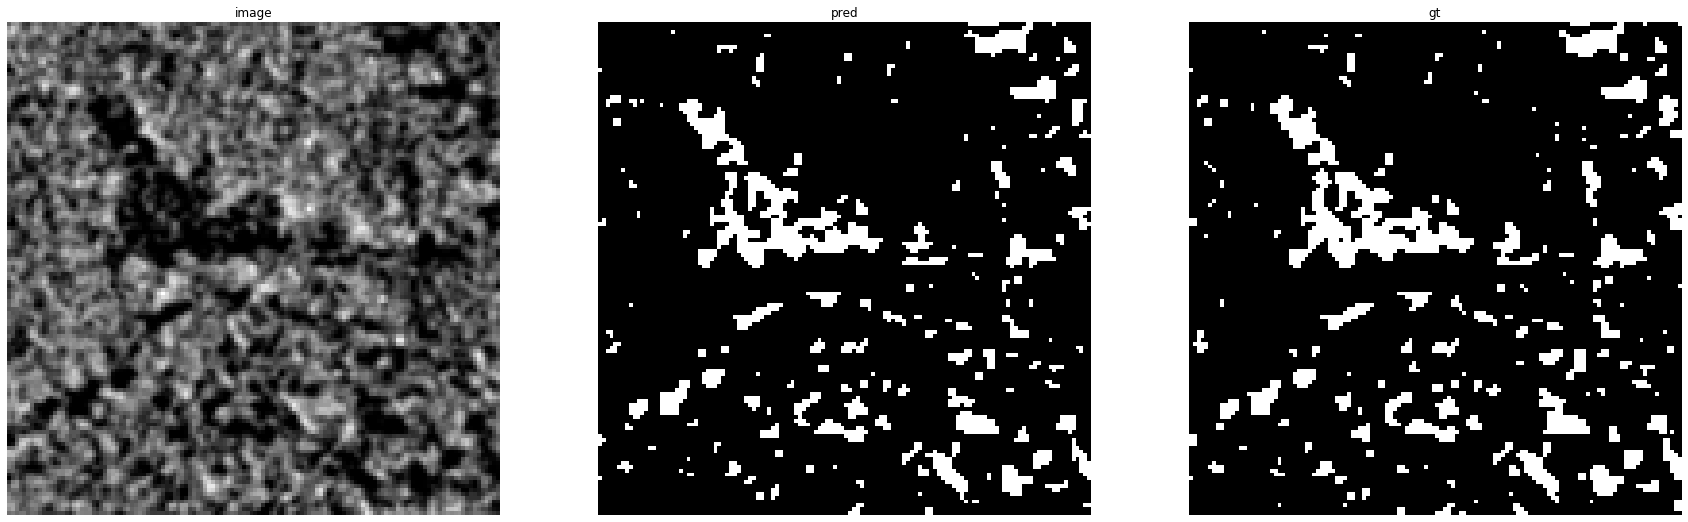

accuracy    : 0.97967529296875
precision   : 0.9787350054525628
recall      : 0.8592628051699378
f1          : 0.9151159826663269
pr_auc      : 0.9879122229682454
iou         : 0.8435150375939849


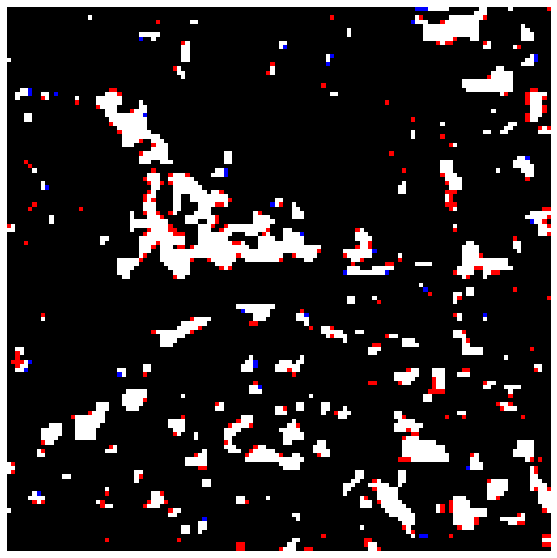

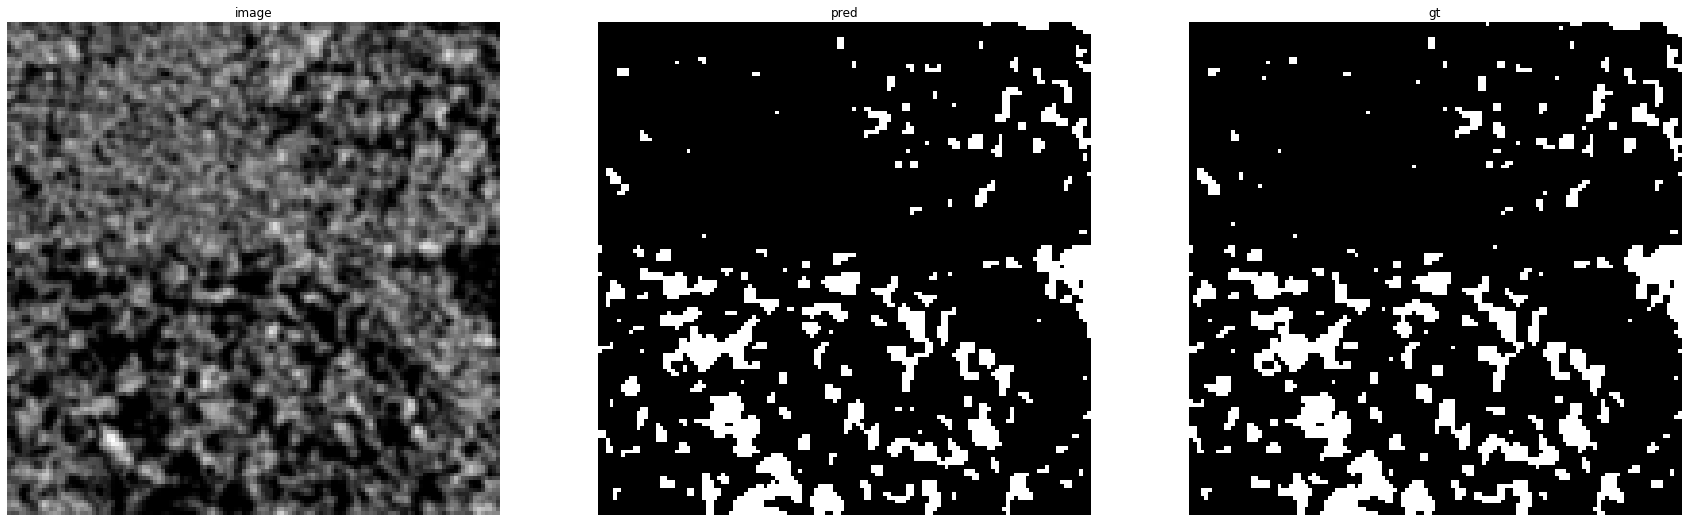

accuracy    : 0.978515625
precision   : 0.9787822878228782
recall      : 0.8739703459637562
f1          : 0.9234116623150566
pr_auc      : 0.9893868068060588
iou         : 0.8577202910266775


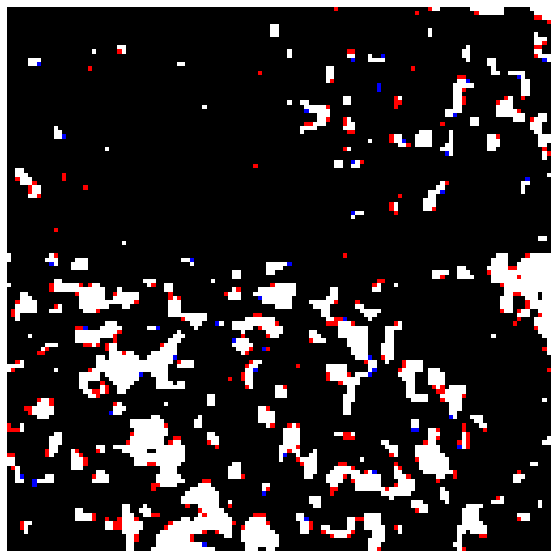

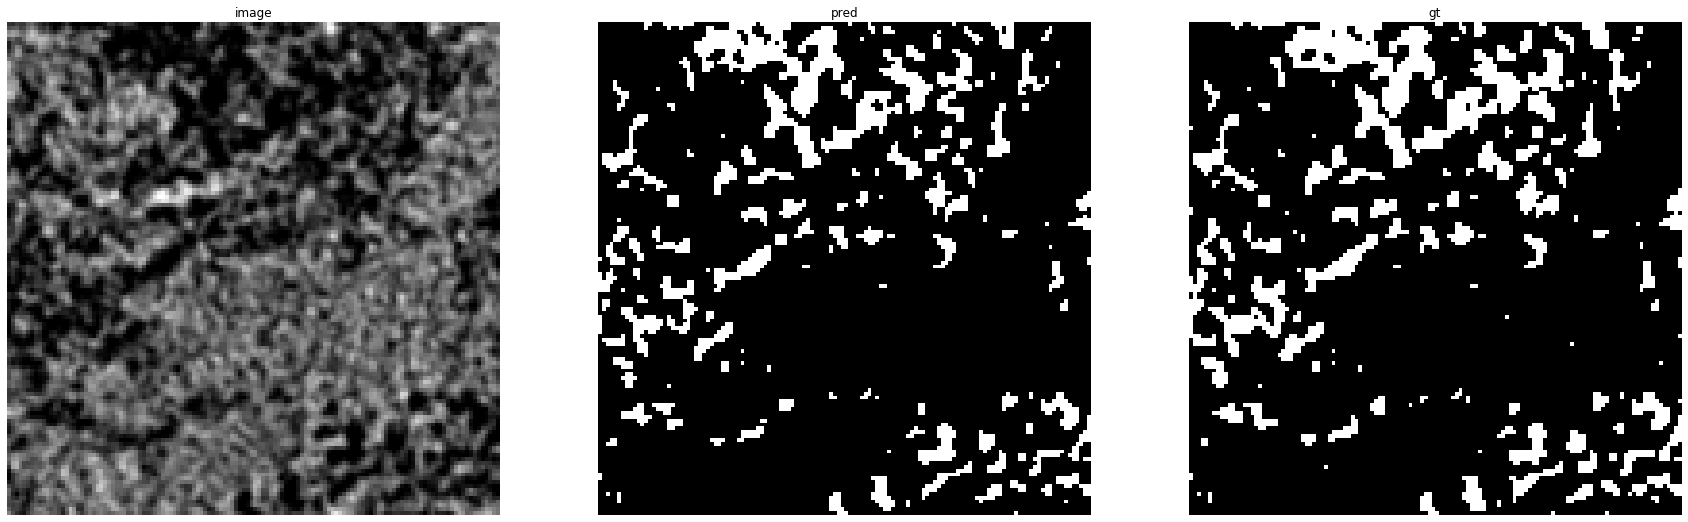

accuracy    : 0.97039794921875
precision   : 0.9836559139784946
recall      : 0.8365032918800293
f1          : 0.904131251235422
pr_auc      : 0.9878256881086627
iou         : 0.825036075036075


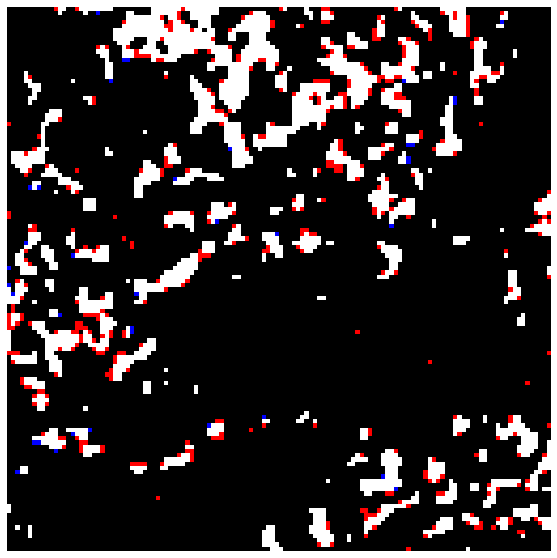

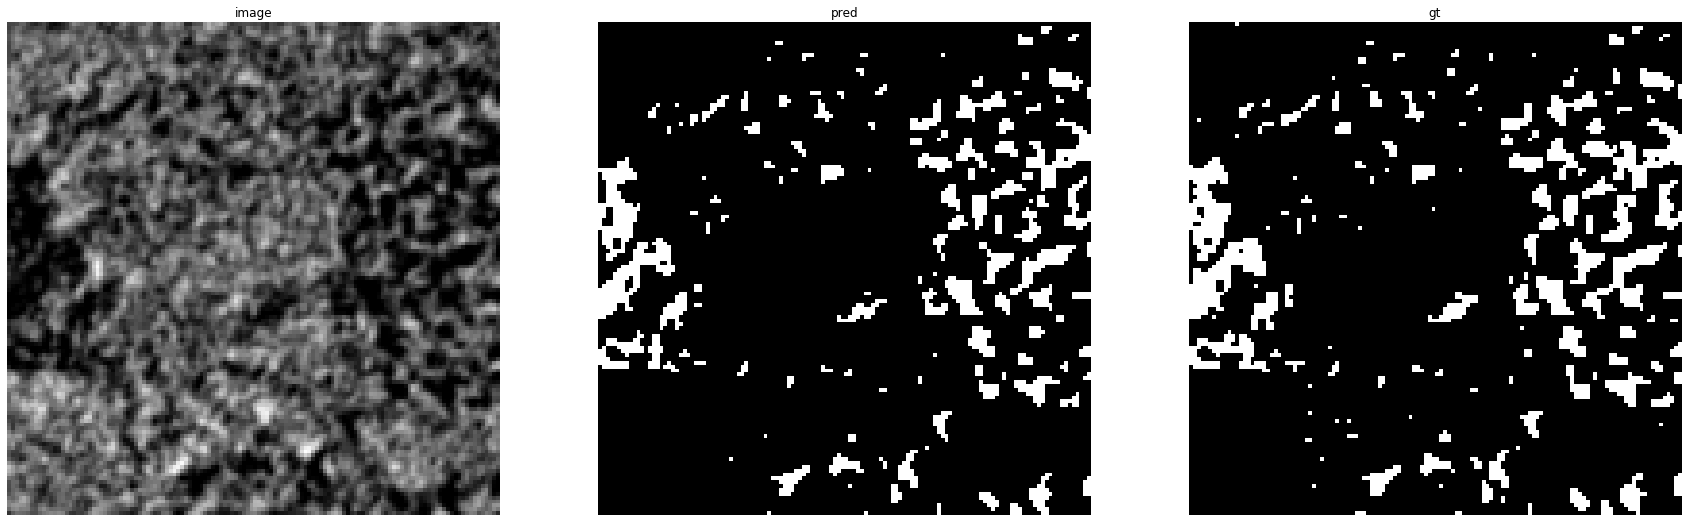

accuracy    : 0.97784423828125
precision   : 0.9877913429522752
recall      : 0.8392267798208393
f1          : 0.9074687738975273
pr_auc      : 0.9887274798614536
iou         : 0.8306112925804946


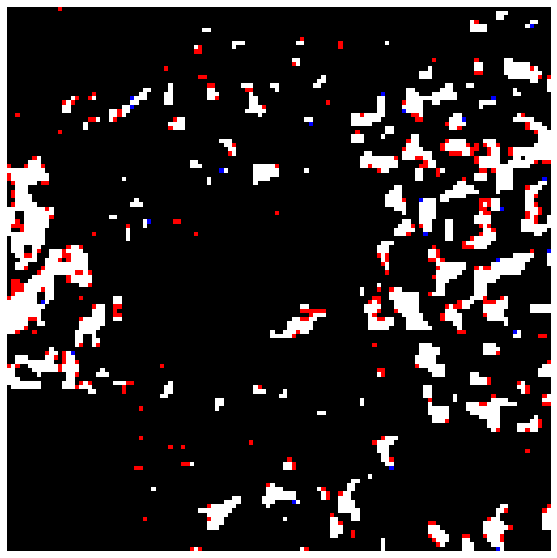

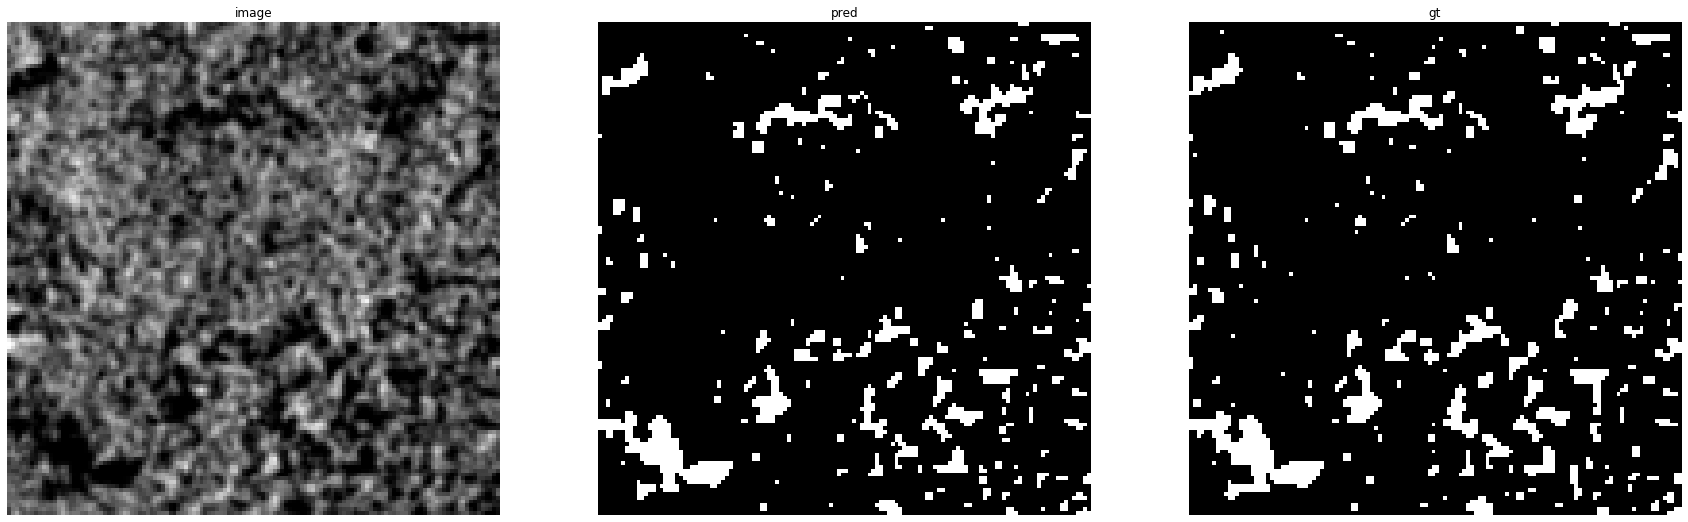

accuracy    : 0.9822998046875
precision   : 0.9767750497677505
recall      : 0.8523451071221771
f1          : 0.9103277674706245
pr_auc      : 0.9848386219746831
iou         : 0.8354143019296254


Prediction for SPE_carb10_58_box3:


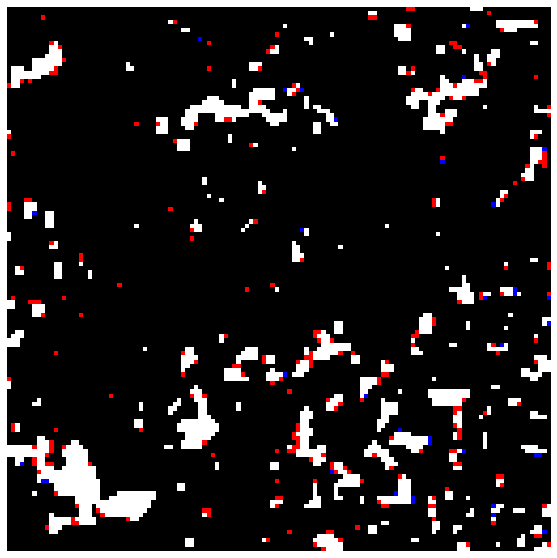

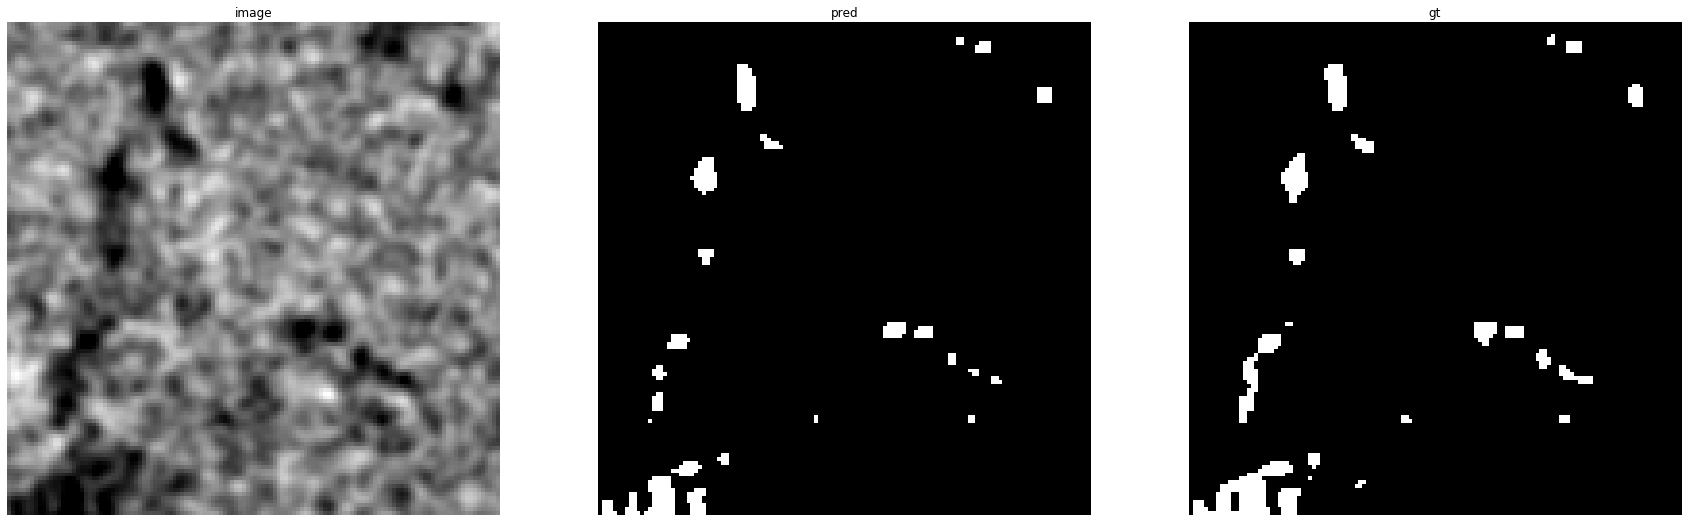

accuracy    : 0.99041748046875
precision   : 1.0
recall      : 0.7211367673179396
f1          : 0.8379772961816305
pr_auc      : 0.9851087136782636
iou         : 0.7211367673179396


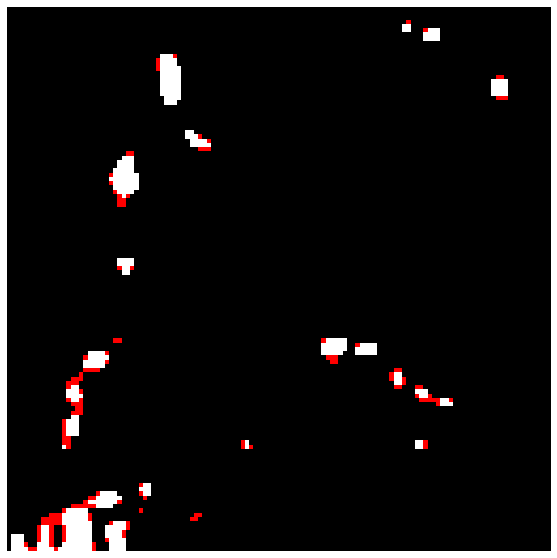

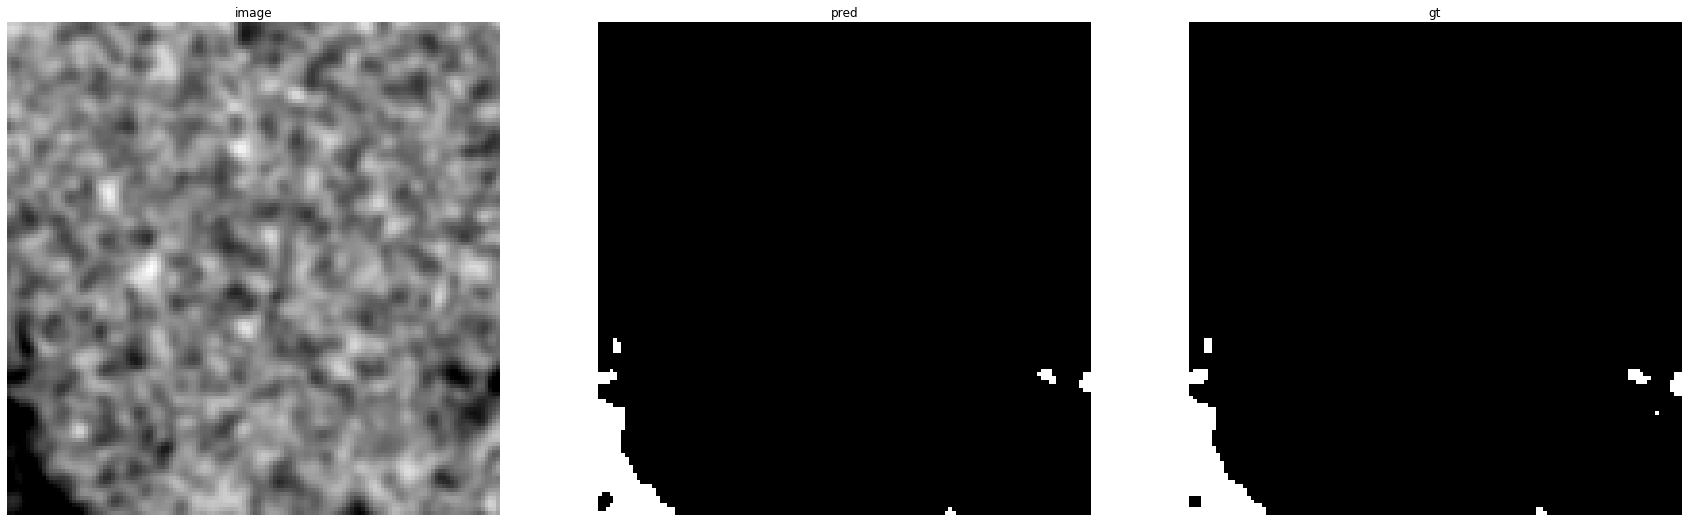

accuracy    : 0.9981689453125
precision   : 0.9969230769230769
recall      : 0.9178470254957507
f1          : 0.9557522123893806
pr_auc      : 0.9984922907928142
iou         : 0.9152542372881356


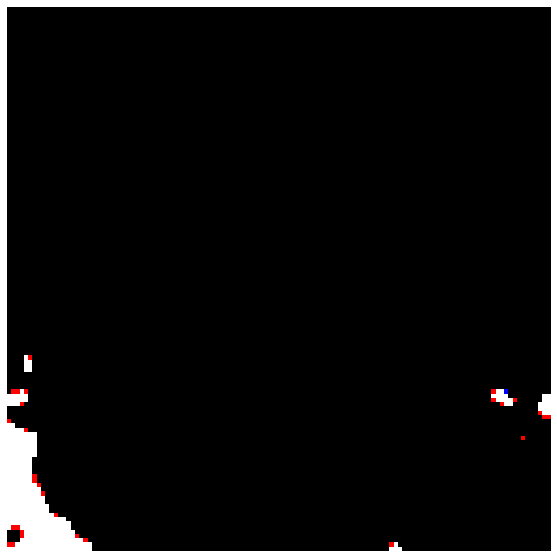

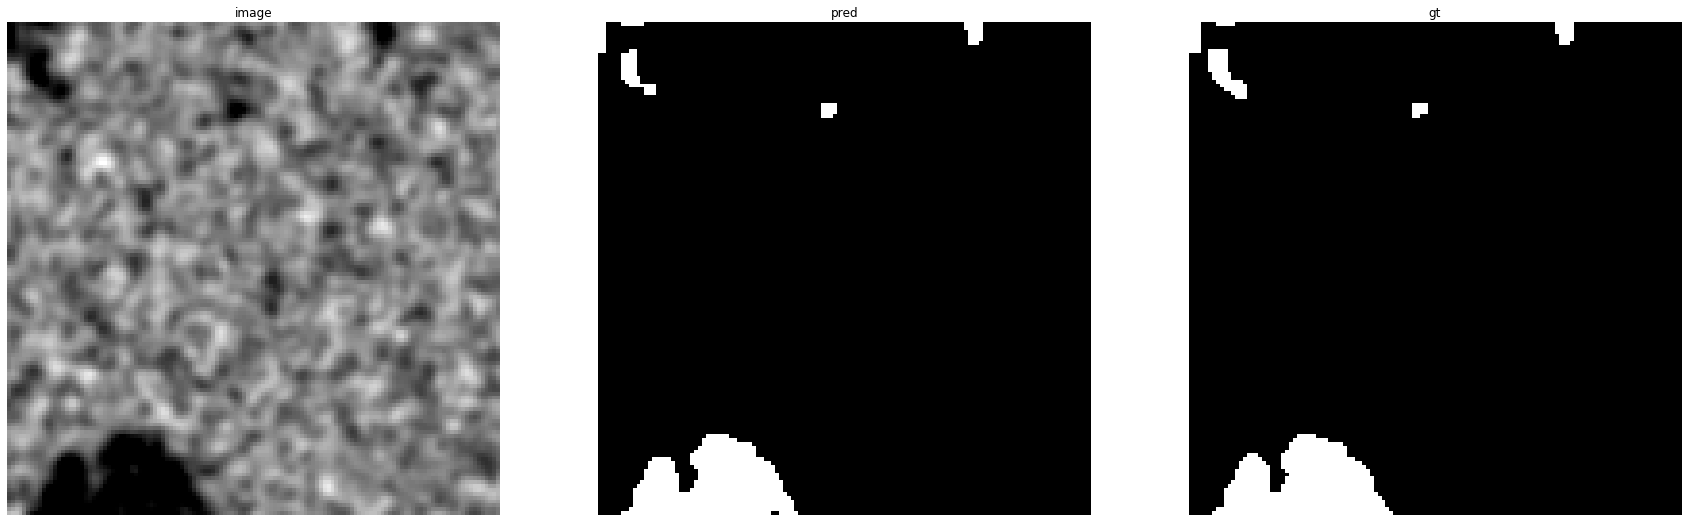

accuracy    : 0.9970703125
precision   : 0.995768688293371
recall      : 0.9400798934753661
f1          : 0.9671232876712328
pr_auc      : 0.9986978570197325
iou         : 0.9363395225464191


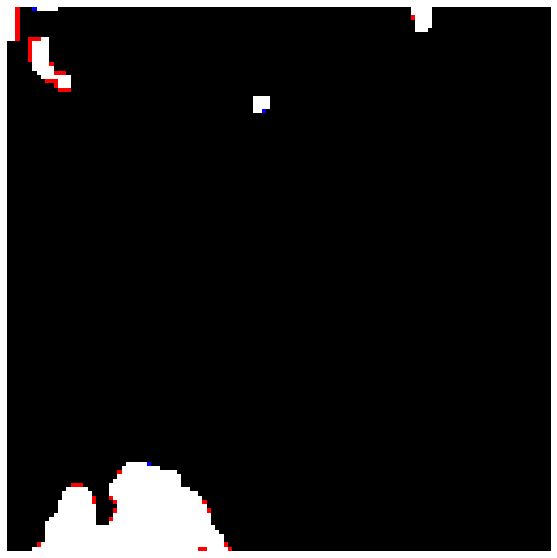

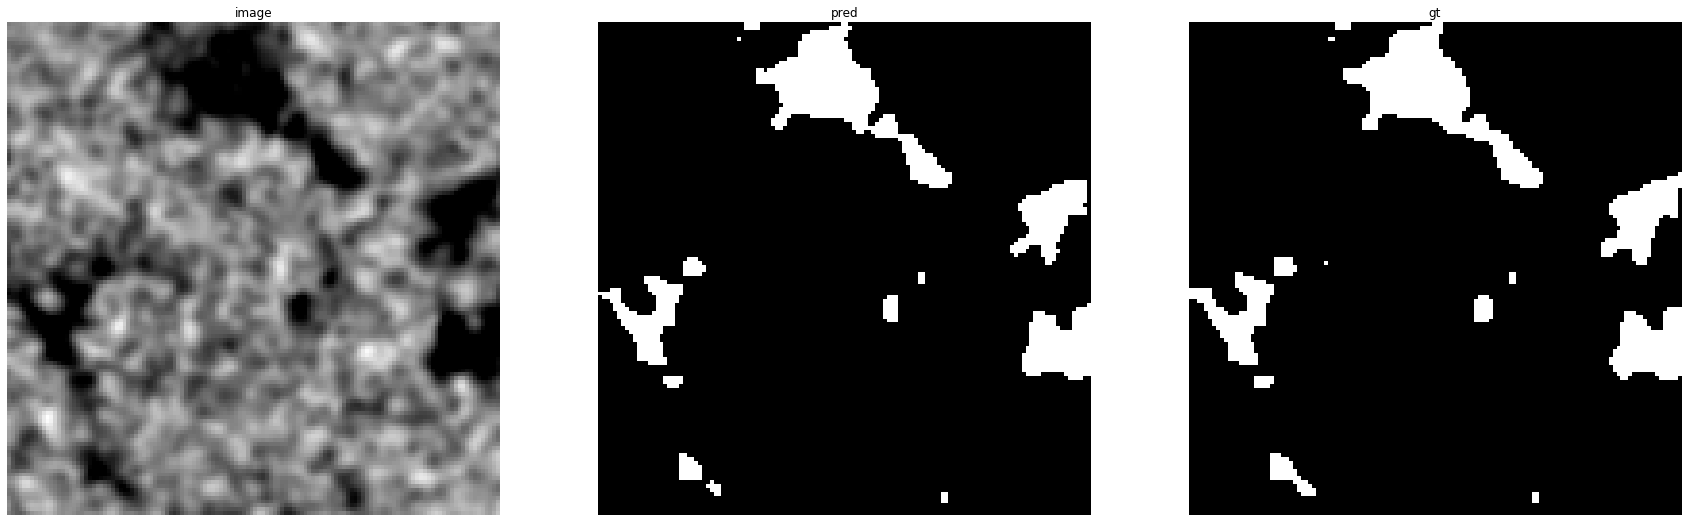

accuracy    : 0.99224853515625
precision   : 0.9979919678714859
recall      : 0.923219814241486
f1          : 0.9591508523641041
pr_auc      : 0.9984588795842351
iou         : 0.9215080346106304


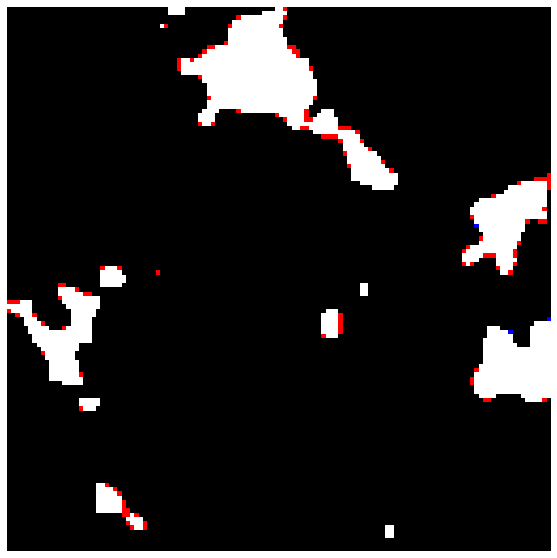

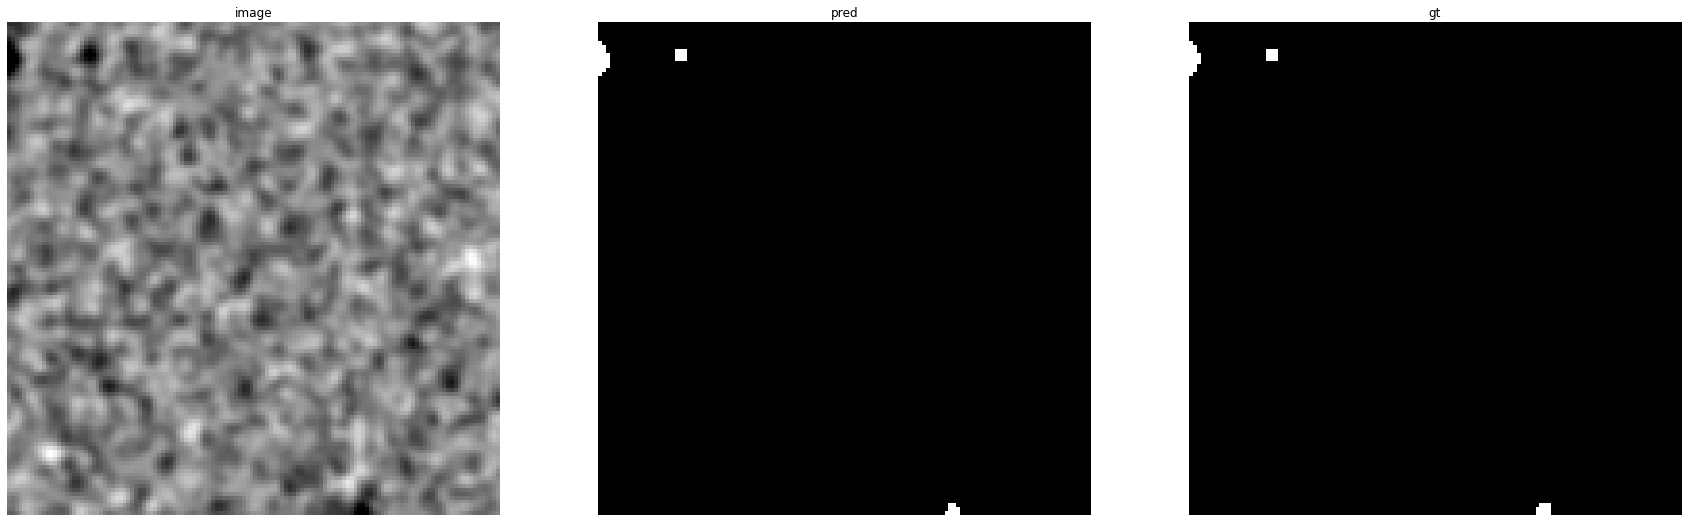

accuracy    : 0.99981689453125
precision   : 0.9736842105263158
recall      : 0.9487179487179487
f1          : 0.9610389610389611
pr_auc      : 0.9952489705526144
iou         : 0.925


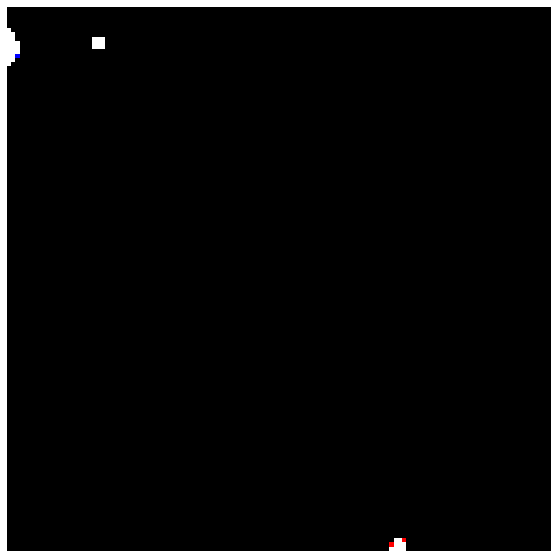

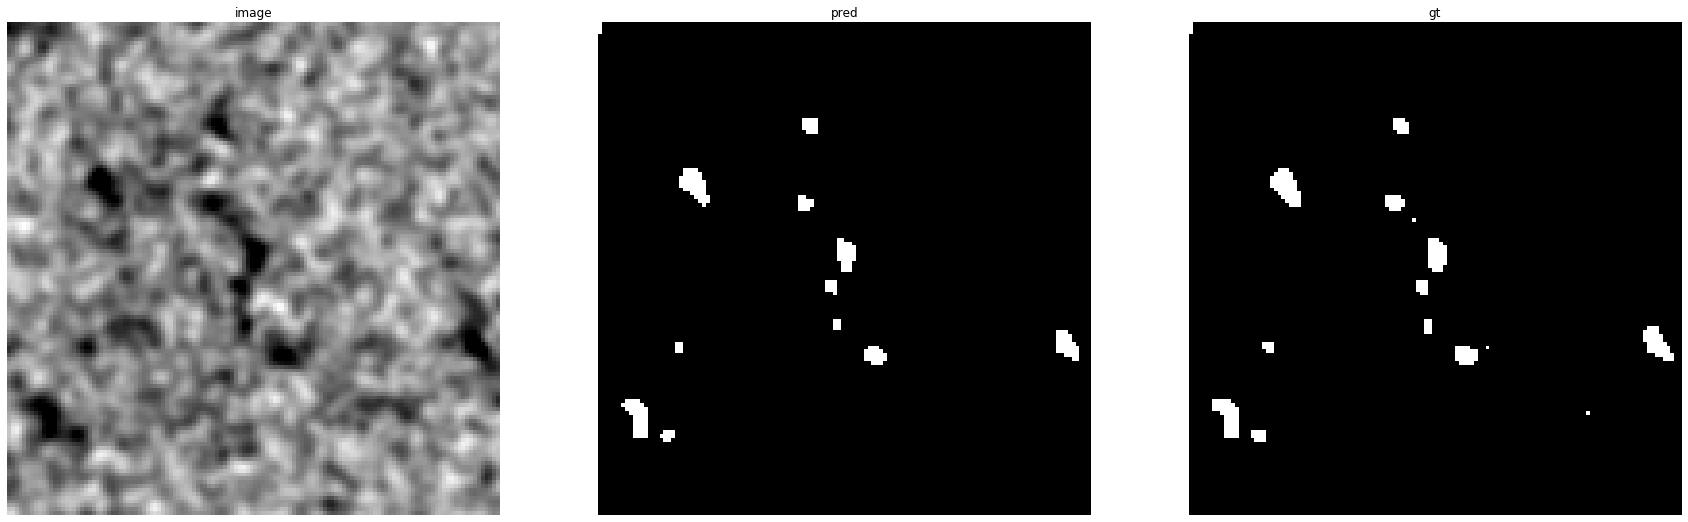

accuracy    : 0.99761962890625
precision   : 0.991869918699187
recall      : 0.8683274021352313
f1          : 0.9259962049335863
pr_auc      : 0.991908954991492
iou         : 0.8621908127208481


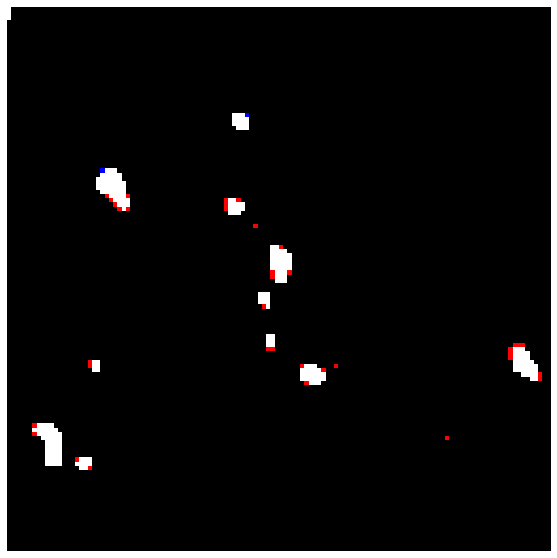

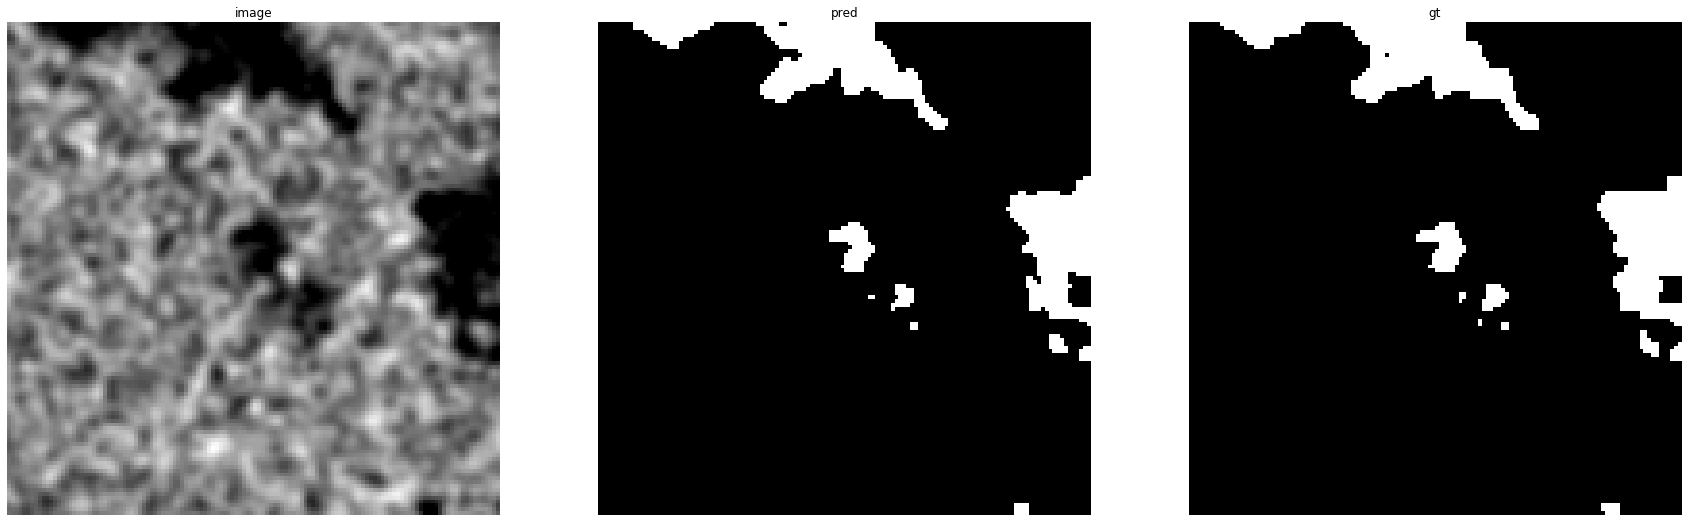

accuracy    : 0.99188232421875
precision   : 0.9978339350180505
recall      : 0.9140211640211641
f1          : 0.9540904383845357
pr_auc      : 0.998417388541054
iou         : 0.9122112211221122


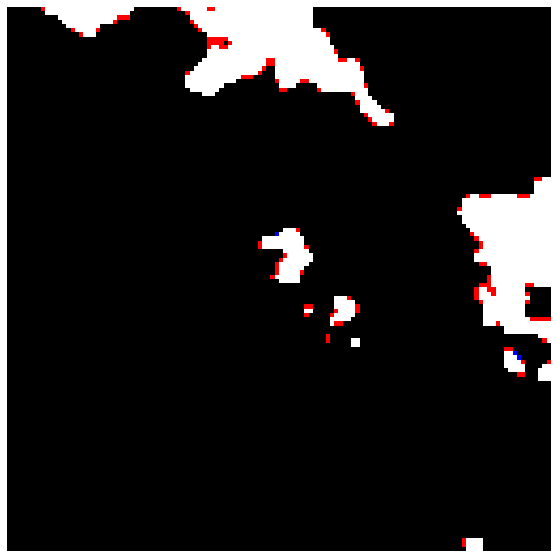

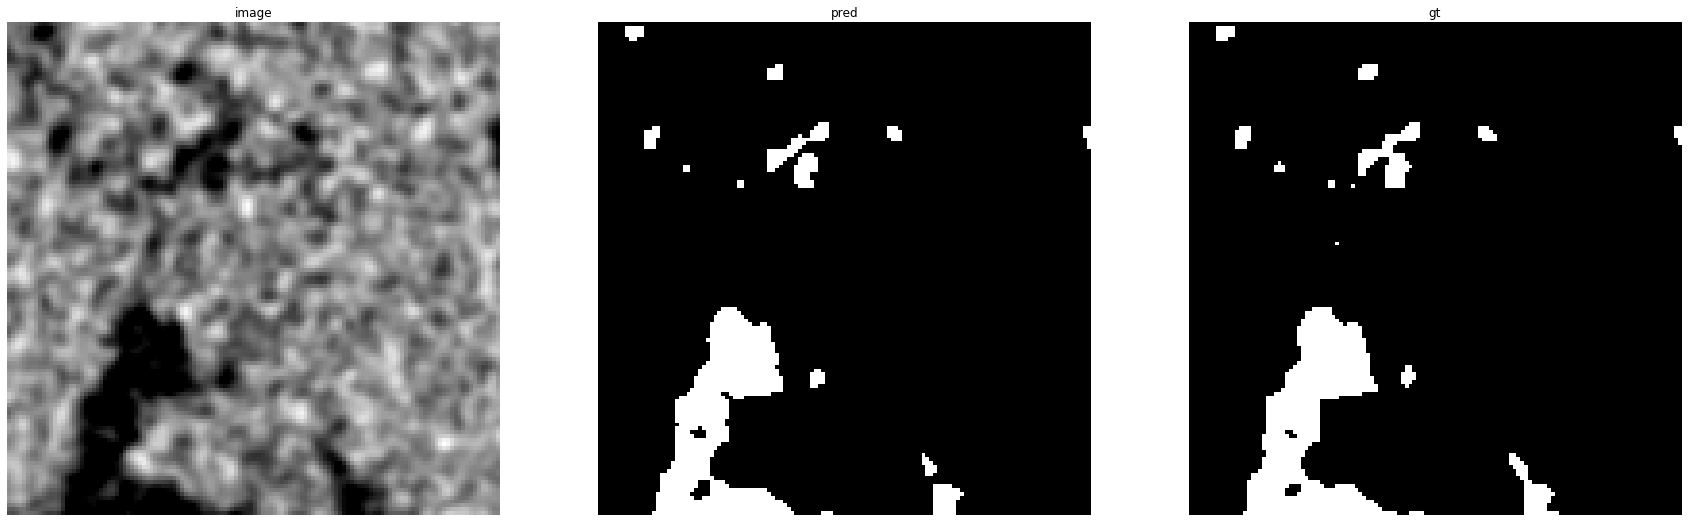

accuracy    : 0.99359130859375
precision   : 0.994017094017094
recall      : 0.922283901665345
f1          : 0.9568078979843686
pr_auc      : 0.9975438584834357
iou         : 0.917192429022082


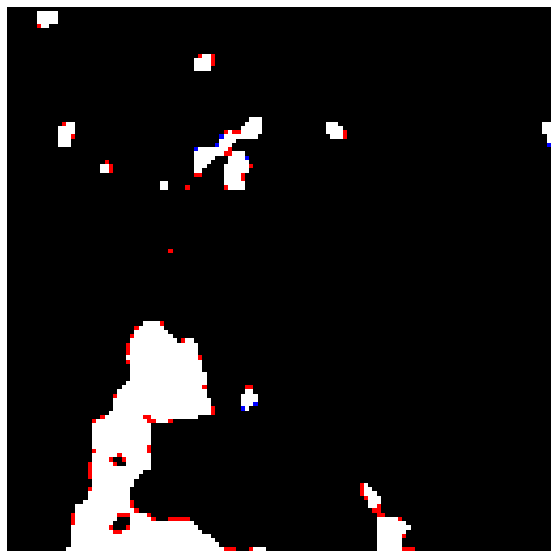

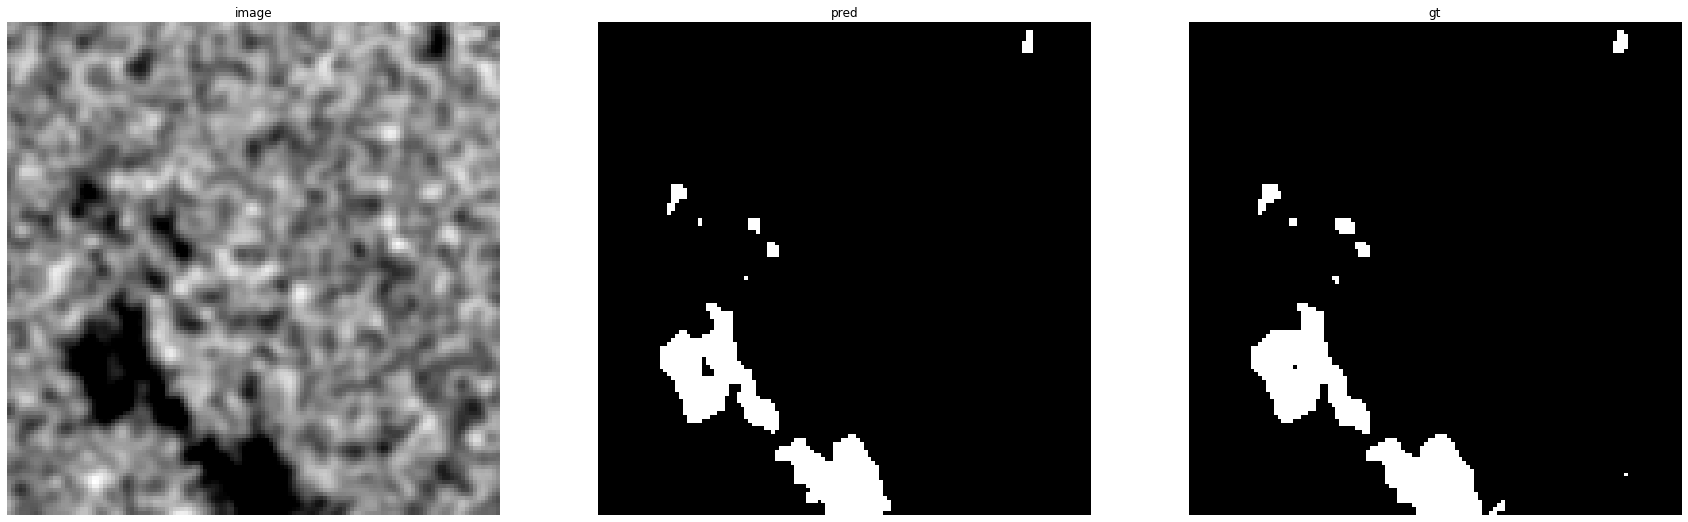

accuracy    : 0.99493408203125
precision   : 0.998914223669924
recall      : 0.9181636726546906
f1          : 0.9568382735309413
pr_auc      : 0.9980521384164553
iou         : 0.9172482552342971


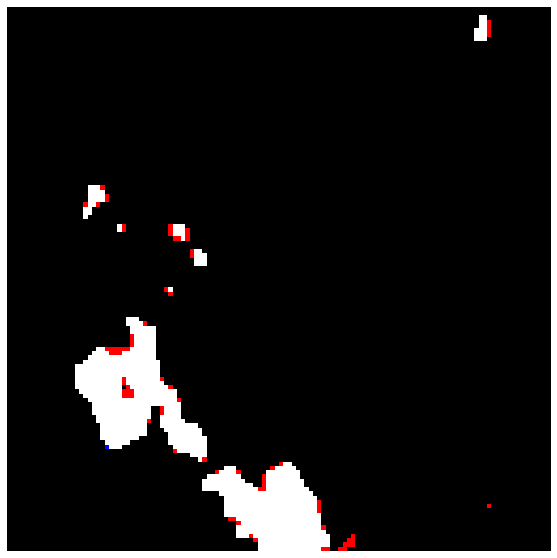

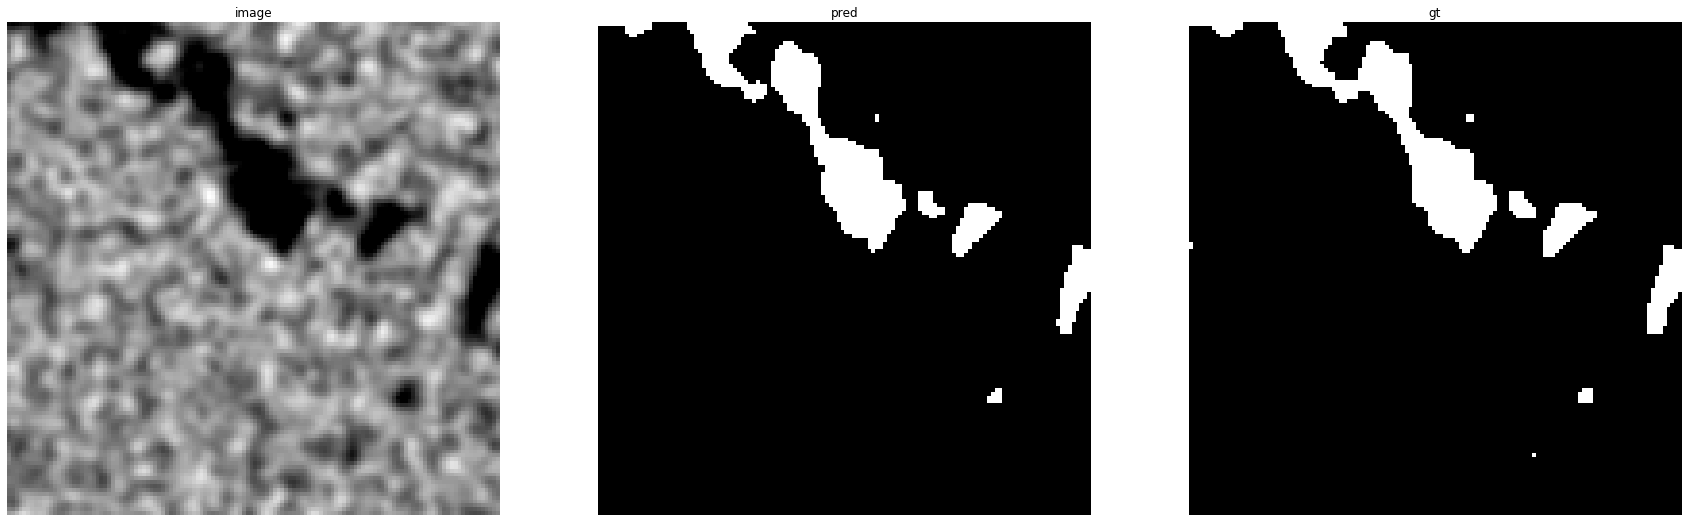

accuracy    : 0.994873046875
precision   : 0.997398091934085
recall      : 0.934199837530463
f1          : 0.9647651006711409
pr_auc      : 0.9989194835090837
iou         : 0.9319286871961102


Prediction for SoilAh-1:


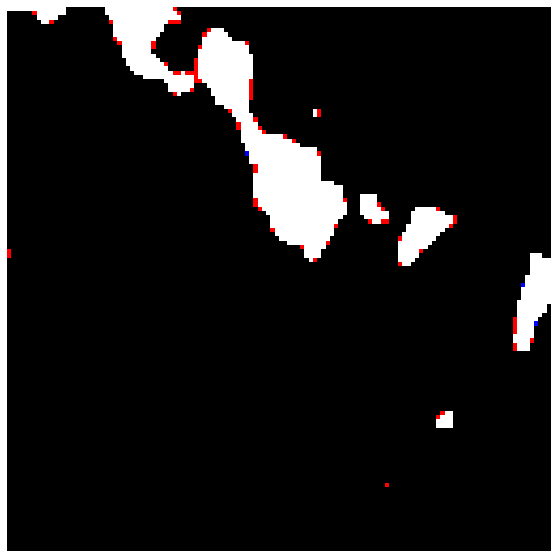

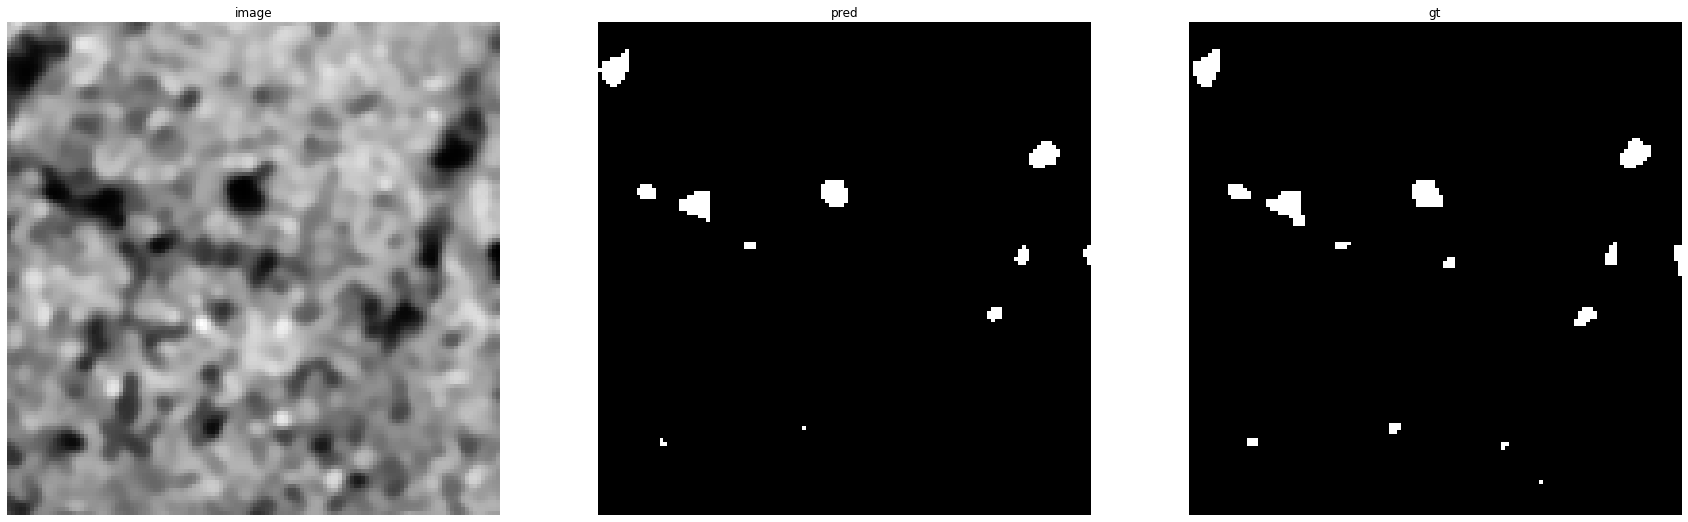

accuracy    : 0.9957275390625
precision   : 0.9742489270386266
recall      : 0.7800687285223368
f1          : 0.8664122137404581
pr_auc      : 0.9734227603174158
iou         : 0.7643097643097643


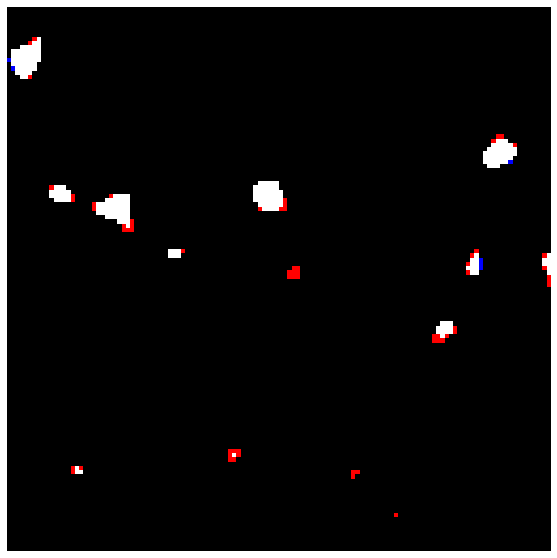

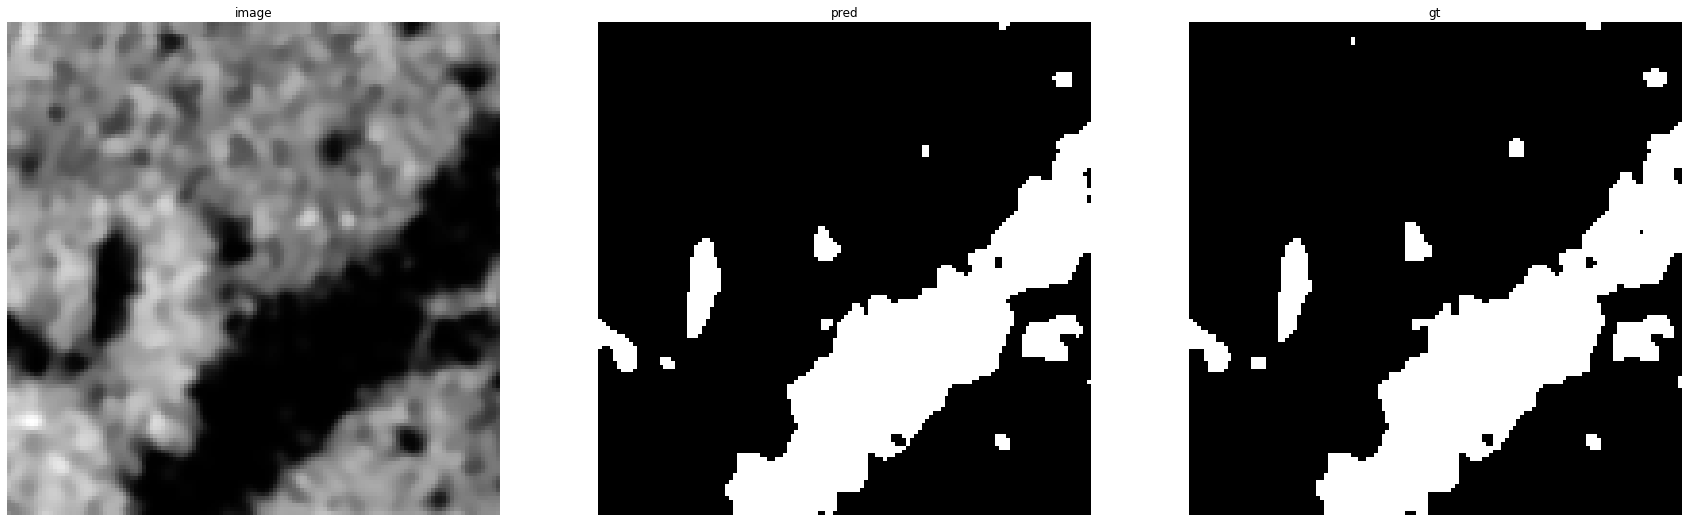

accuracy    : 0.99273681640625
precision   : 0.9907780979827089
recall      : 0.9753191489361702
f1          : 0.982987848463188
pr_auc      : 0.9992161946612829
iou         : 0.9665448411582794


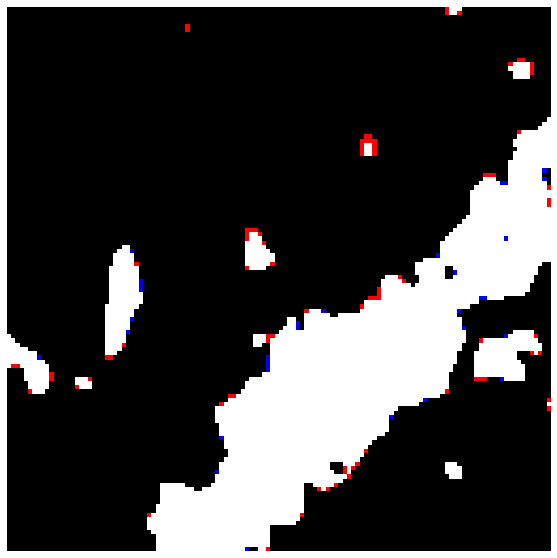

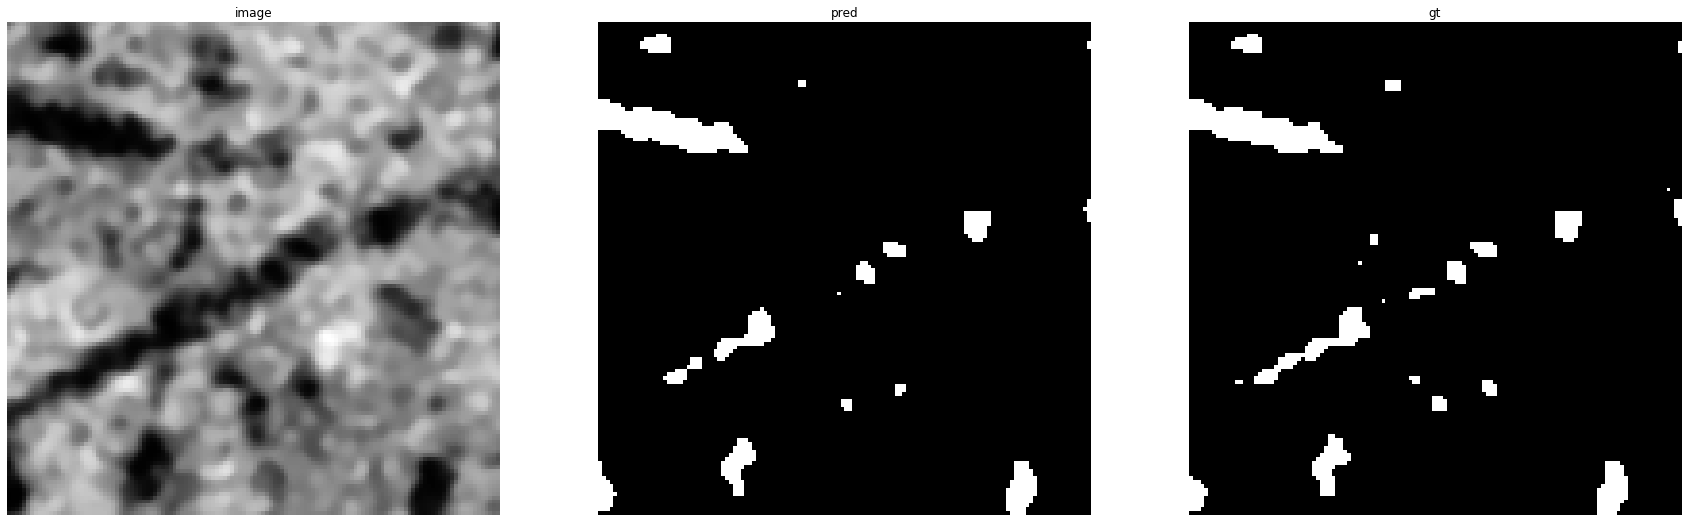

accuracy    : 0.99249267578125
precision   : 0.9800796812749004
recall      : 0.8723404255319149
f1          : 0.9230769230769231
pr_auc      : 0.9898386179329113
iou         : 0.8571428571428571


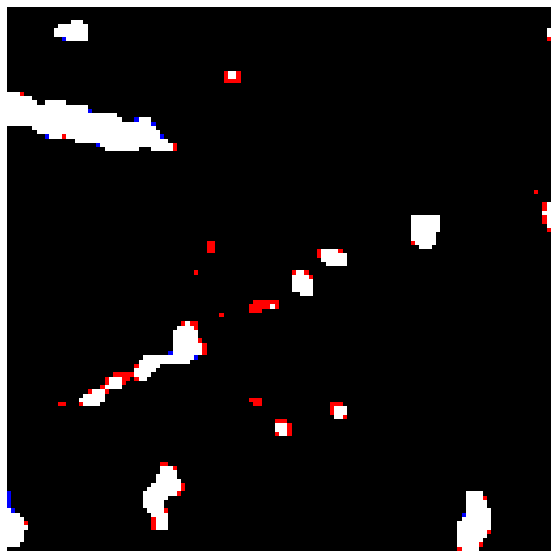

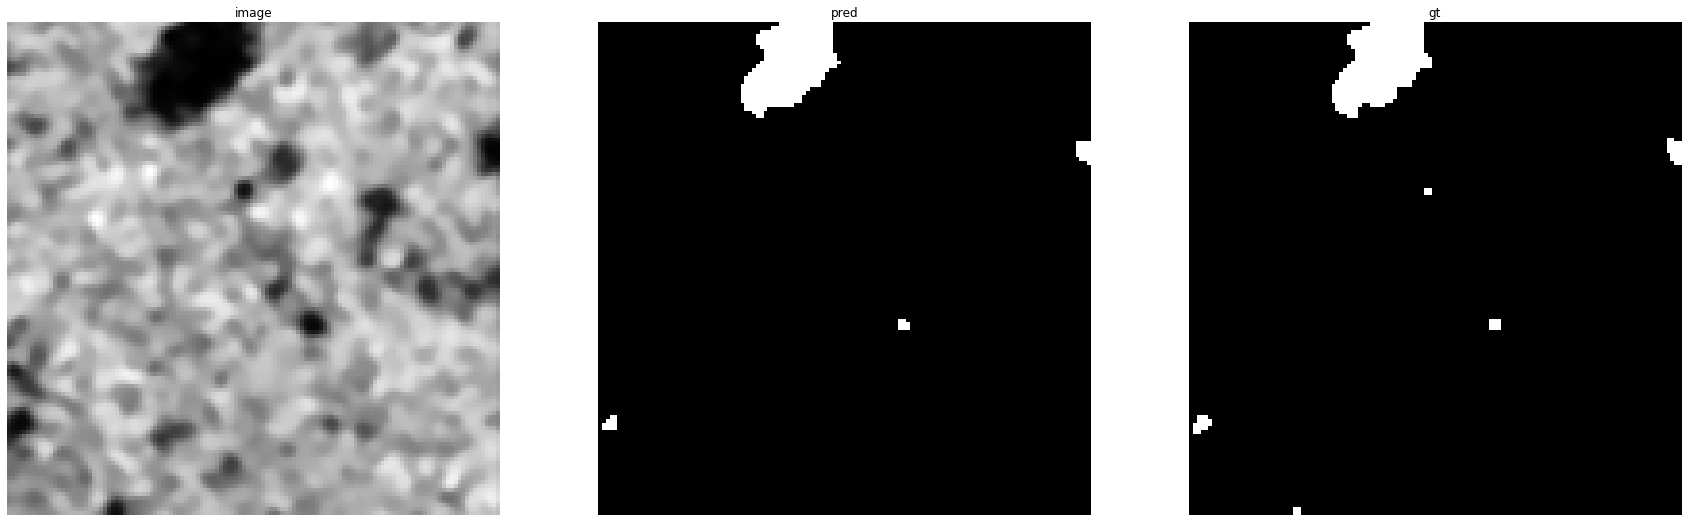

accuracy    : 0.998291015625
precision   : 0.9891304347826086
recall      : 0.9518828451882845
f1          : 0.9701492537313433
pr_auc      : 0.9974817631546734
iou         : 0.9420289855072463


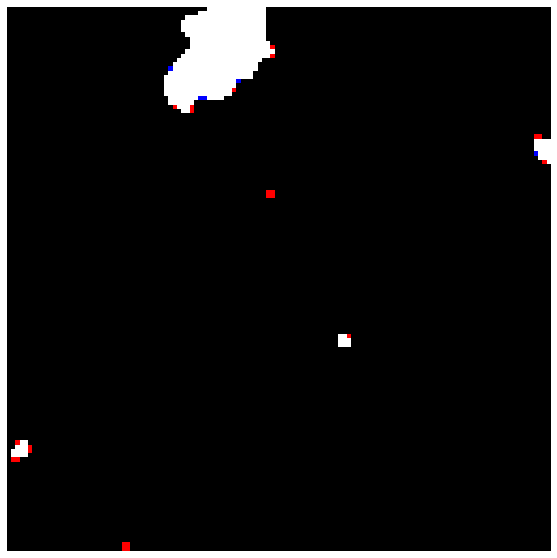

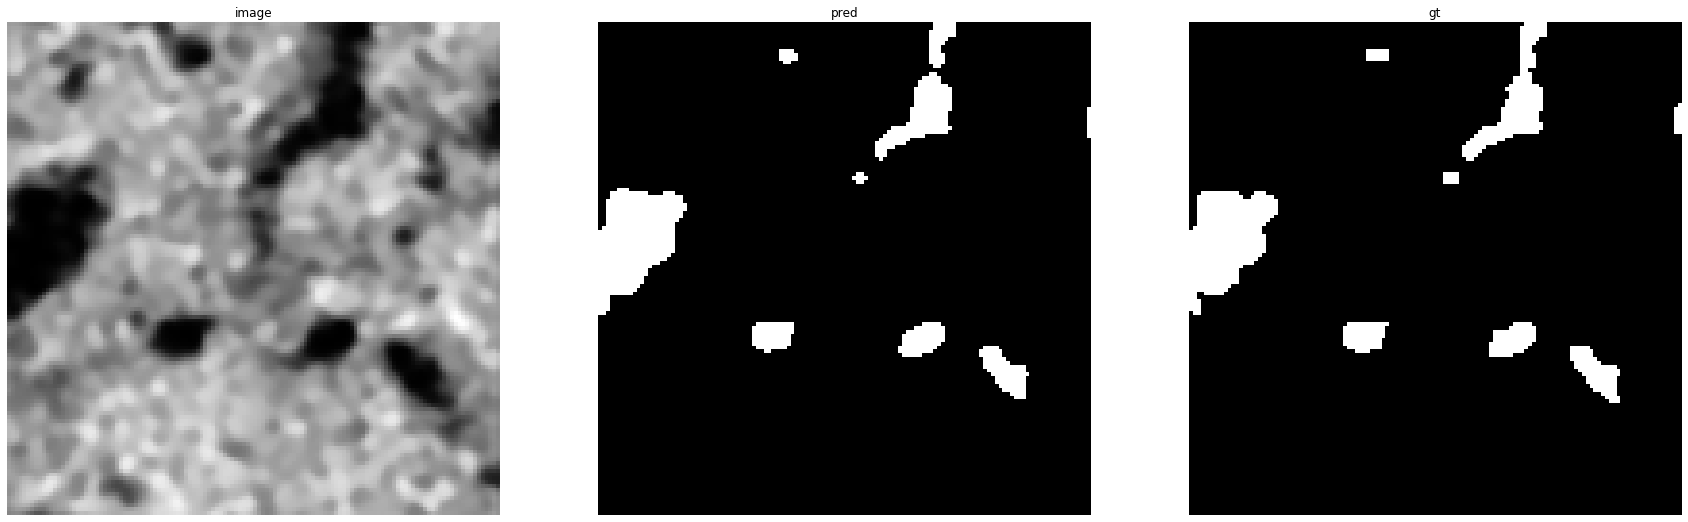

accuracy    : 0.9957275390625
precision   : 0.9810379241516967
recall      : 0.9506769825918762
f1          : 0.9656188605108055
pr_auc      : 0.9970234714206017
iou         : 0.9335232668566001


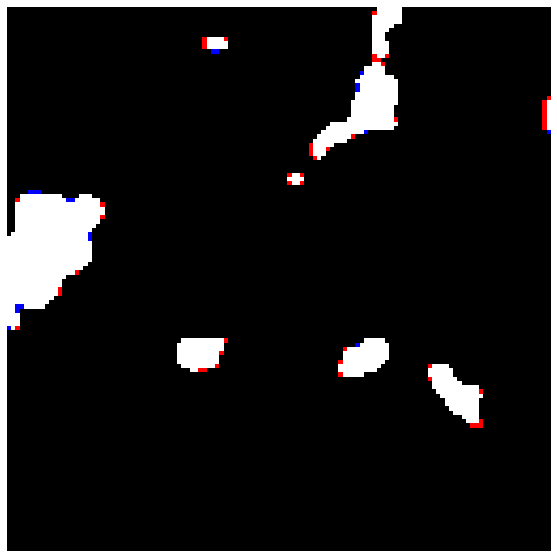

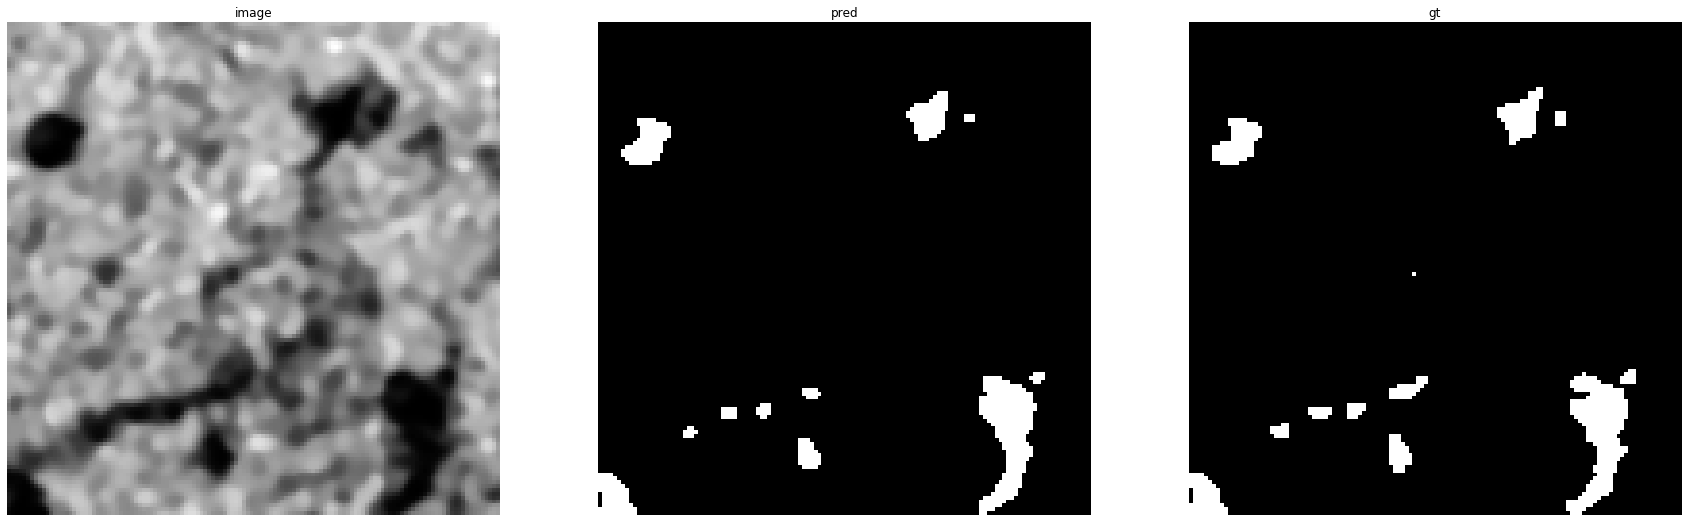

accuracy    : 0.99346923828125
precision   : 0.9730538922155688
recall      : 0.8795669824086604
f1          : 0.923951670220327
pr_auc      : 0.9895588787351774
iou         : 0.8586525759577279


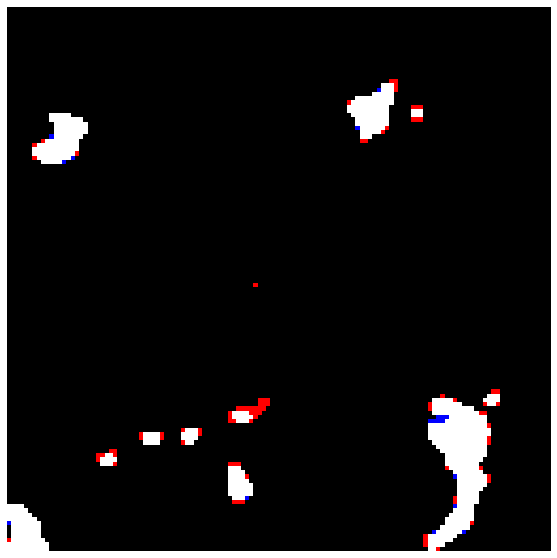

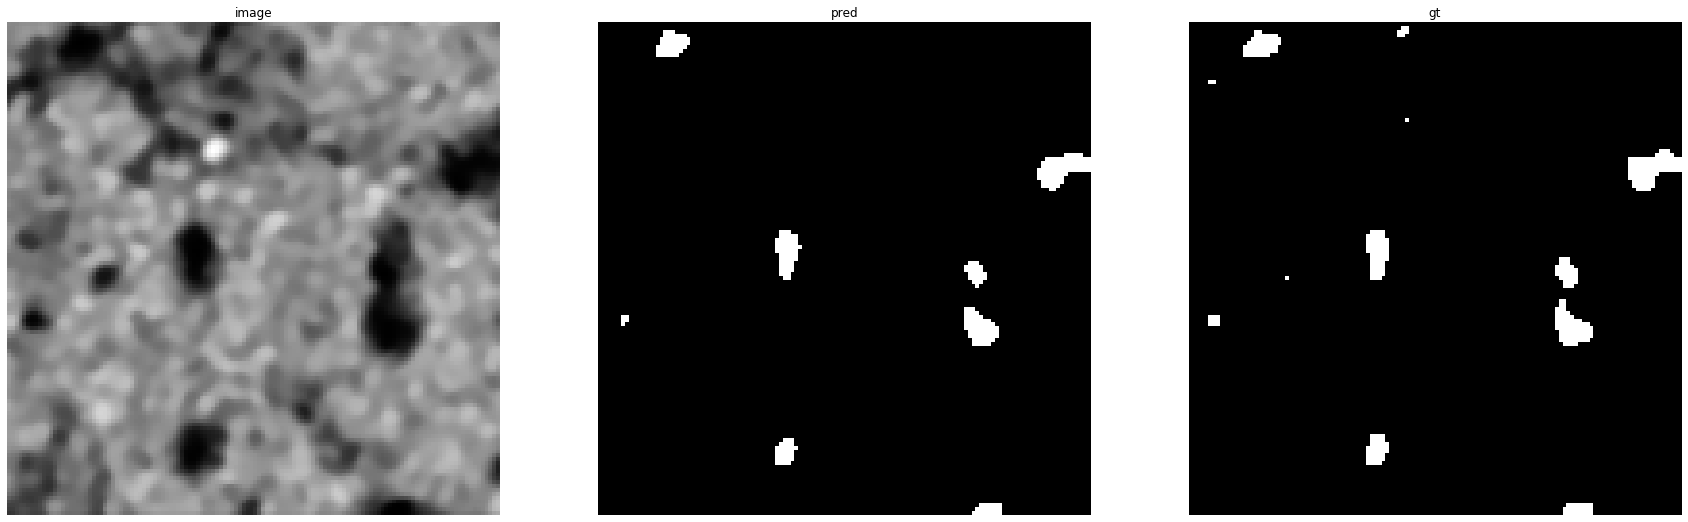

accuracy    : 0.99603271484375
precision   : 0.9882005899705014
recall      : 0.8459595959595959
f1          : 0.91156462585034
pr_auc      : 0.9879189608971595
iou         : 0.8375


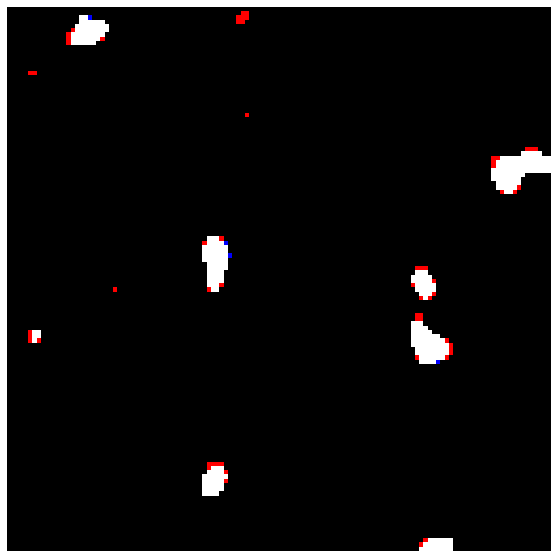

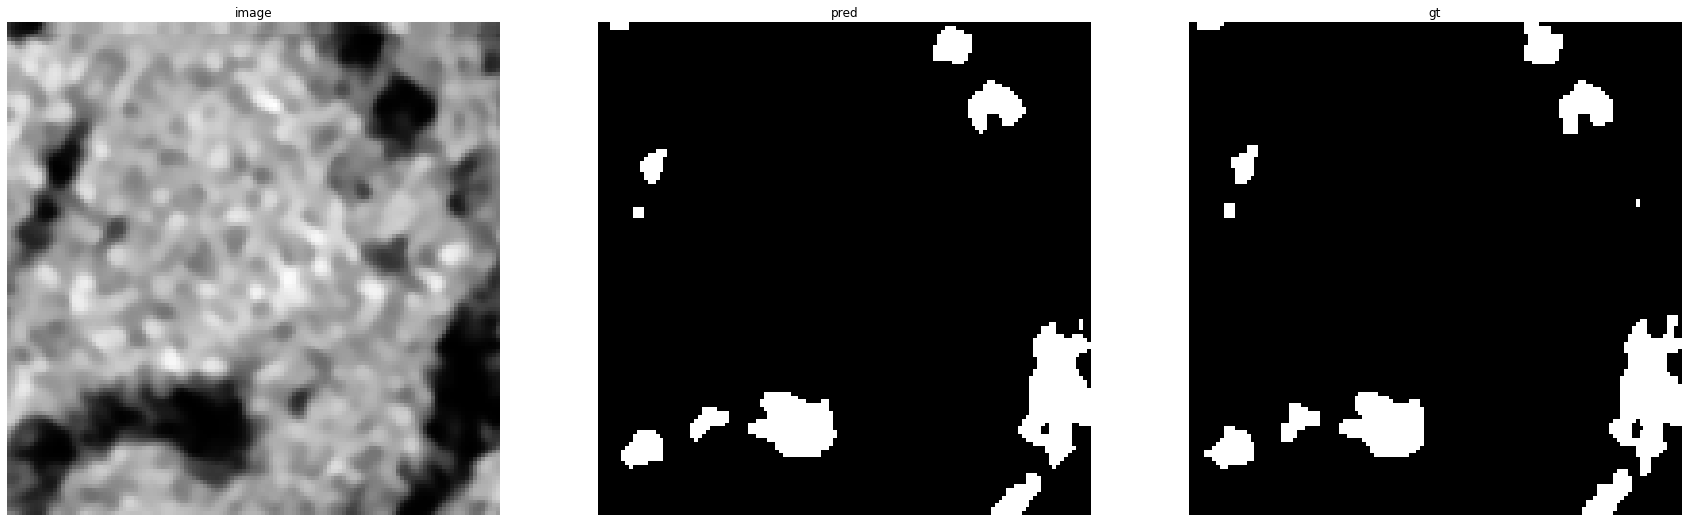

accuracy    : 0.99212646484375
precision   : 0.9729043183742591
recall      : 0.9221508828250401
f1          : 0.9468479604449938
pr_auc      : 0.9935557428006605
iou         : 0.8990610328638498


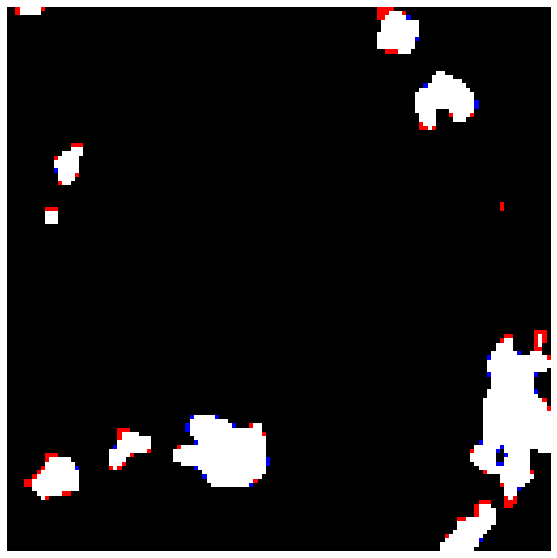

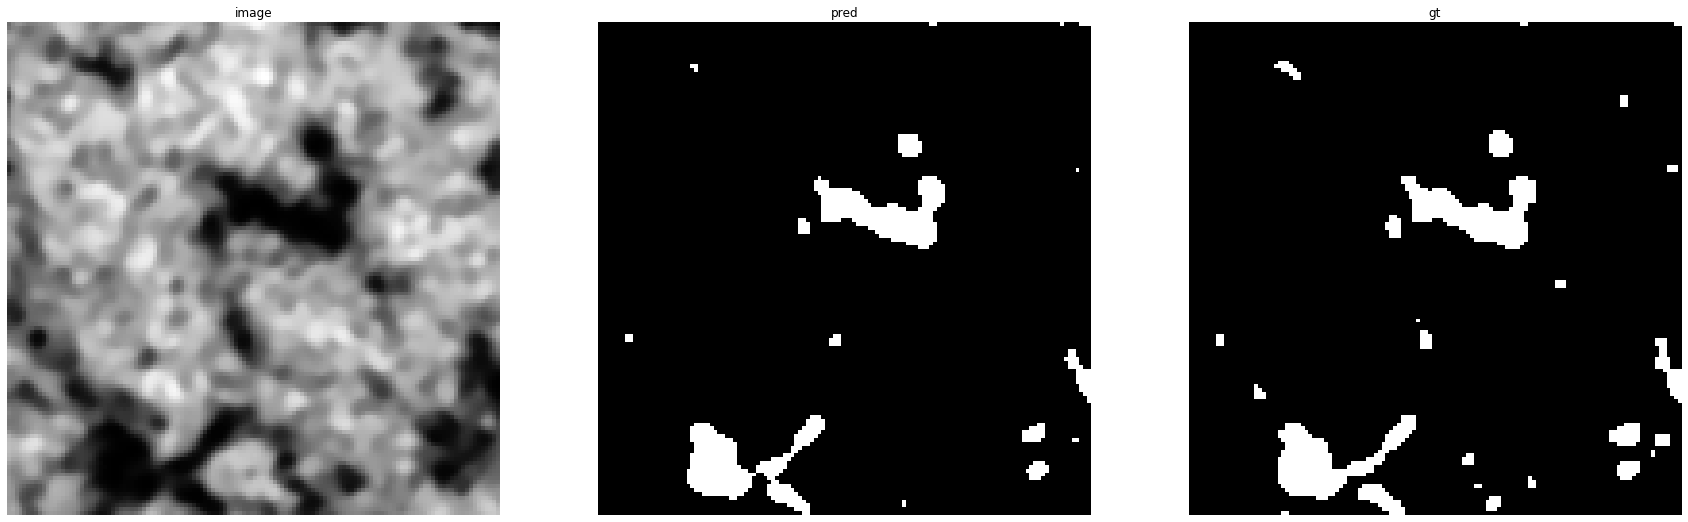

accuracy    : 0.98809814453125
precision   : 0.9760765550239234
recall      : 0.8234106962663976
f1          : 0.8932676518883416
pr_auc      : 0.9843810356009586
iou         : 0.8071216617210683


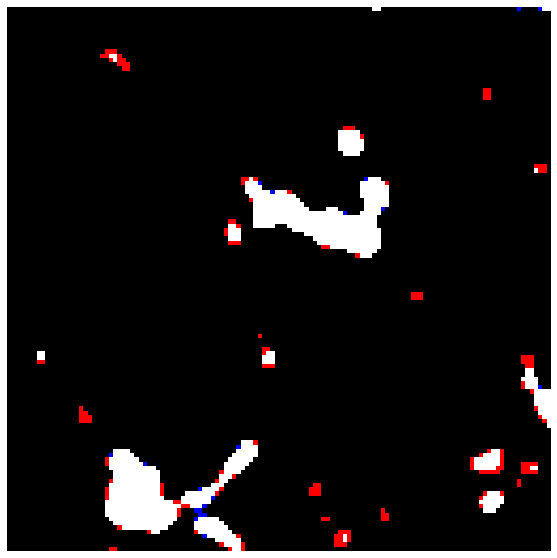

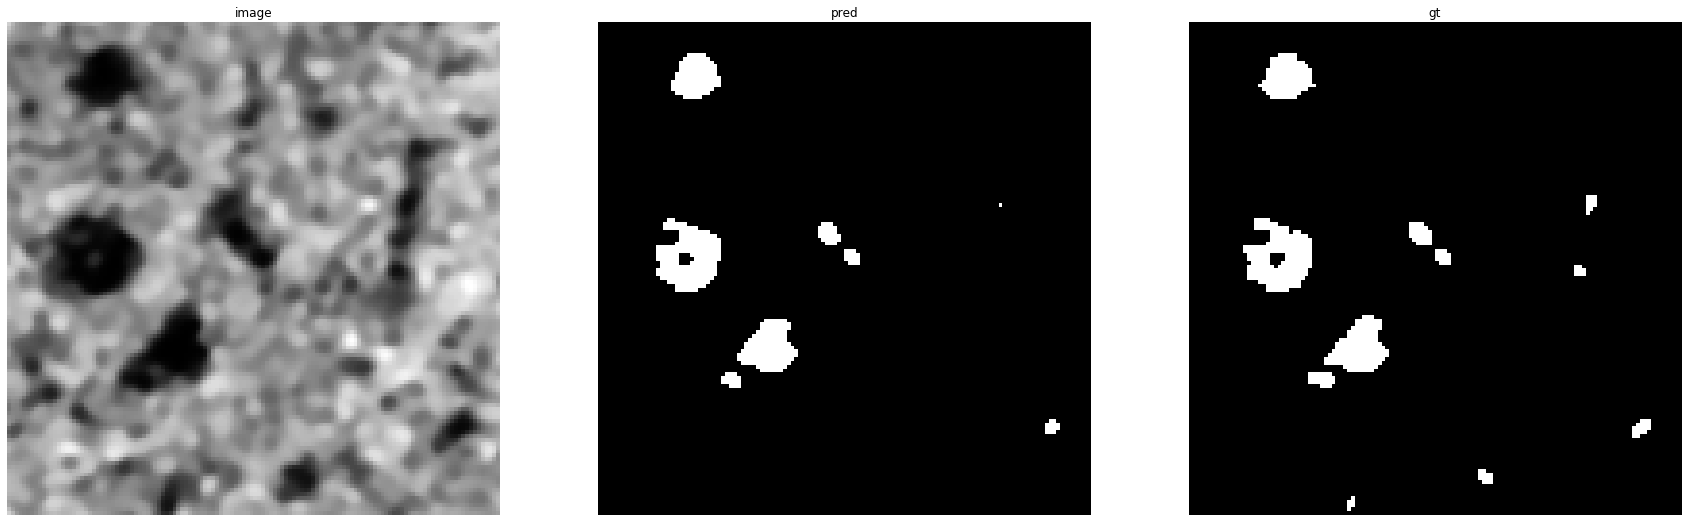

accuracy    : 0.9947509765625
precision   : 0.9890909090909091
recall      : 0.8717948717948718
f1          : 0.9267461669505962
pr_auc      : 0.9906436494550875
iou         : 0.8634920634920635


Prediction for SoilB-2:


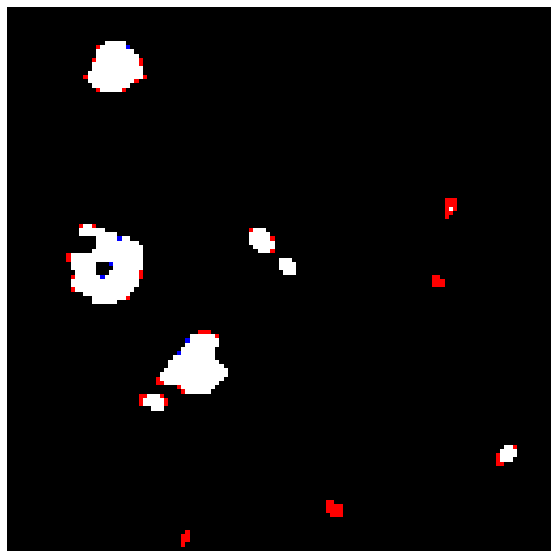

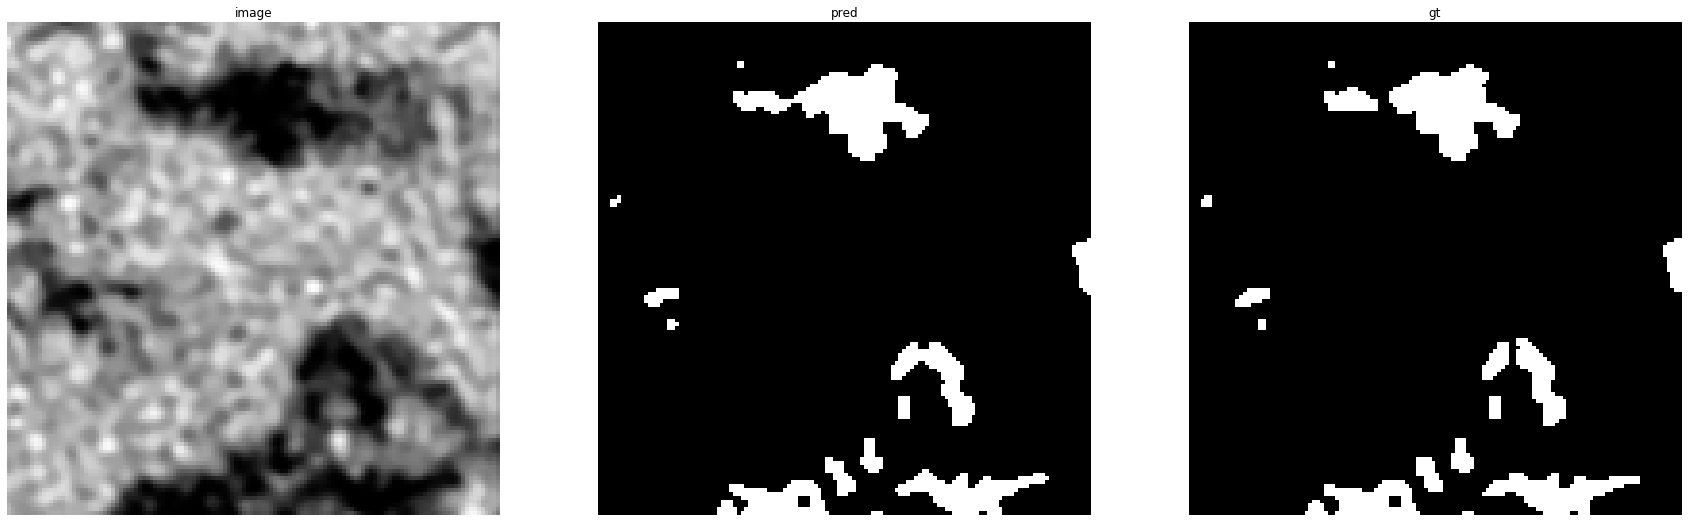

accuracy    : 0.9935302734375
precision   : 0.9595645412130638
recall      : 0.9580745341614907
f1          : 0.9588189588189587
pr_auc      : 0.9946592849305875
iou         : 0.9208955223880597


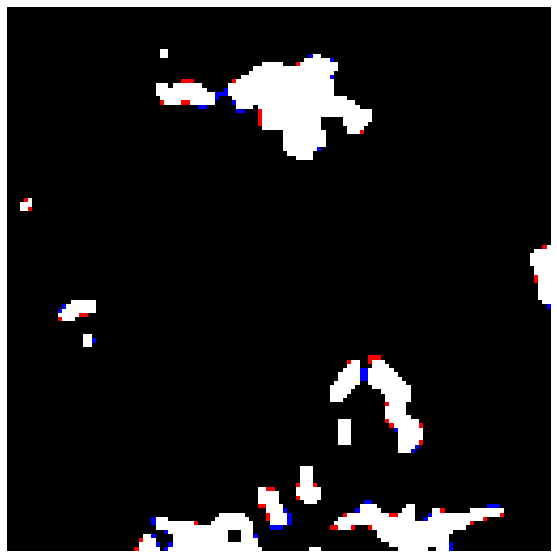

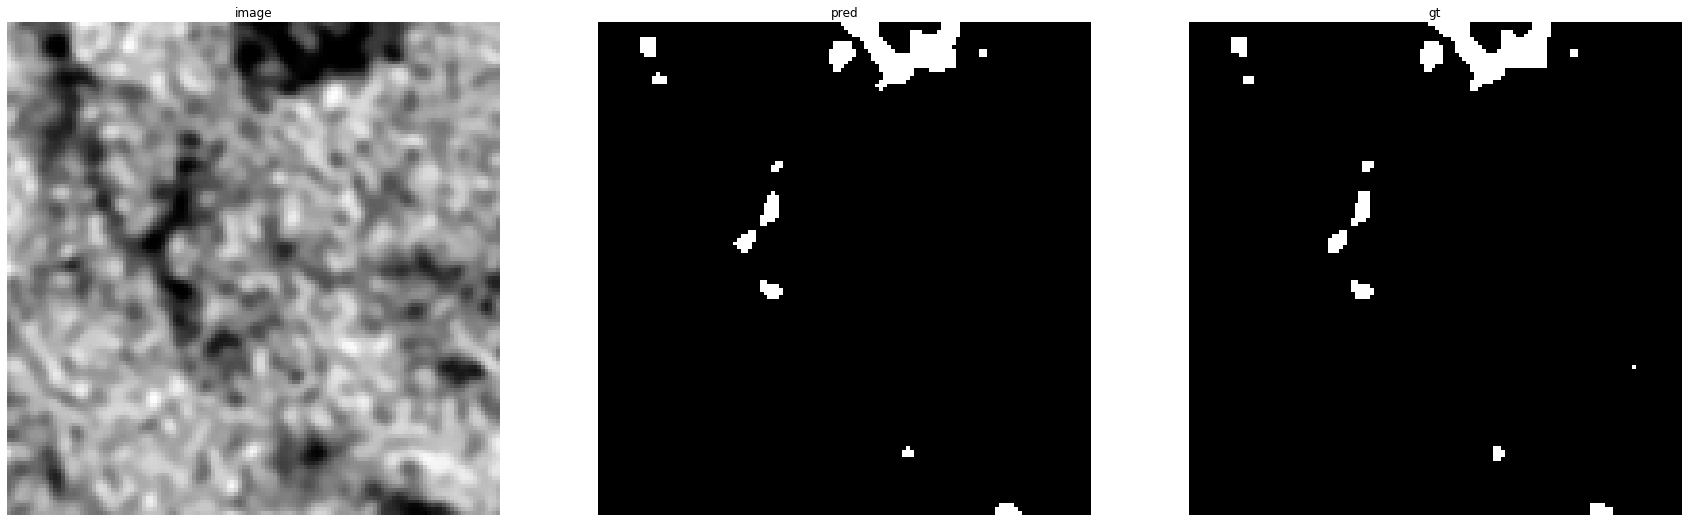

accuracy    : 0.9976806640625
precision   : 0.9567198177676538
recall      : 0.9567198177676538
f1          : 0.9567198177676538
pr_auc      : 0.9951665722900103
iou         : 0.9170305676855895


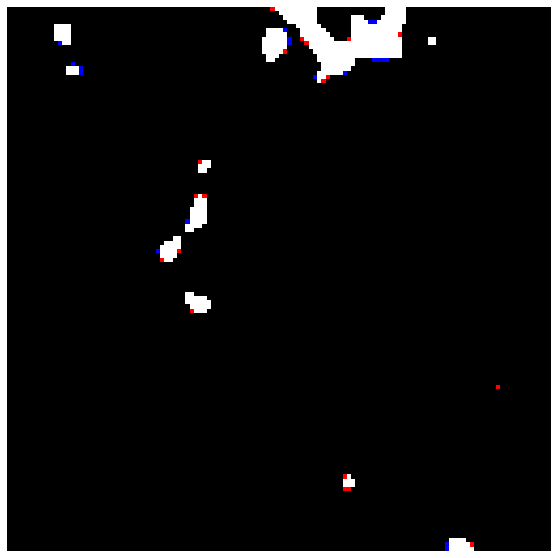

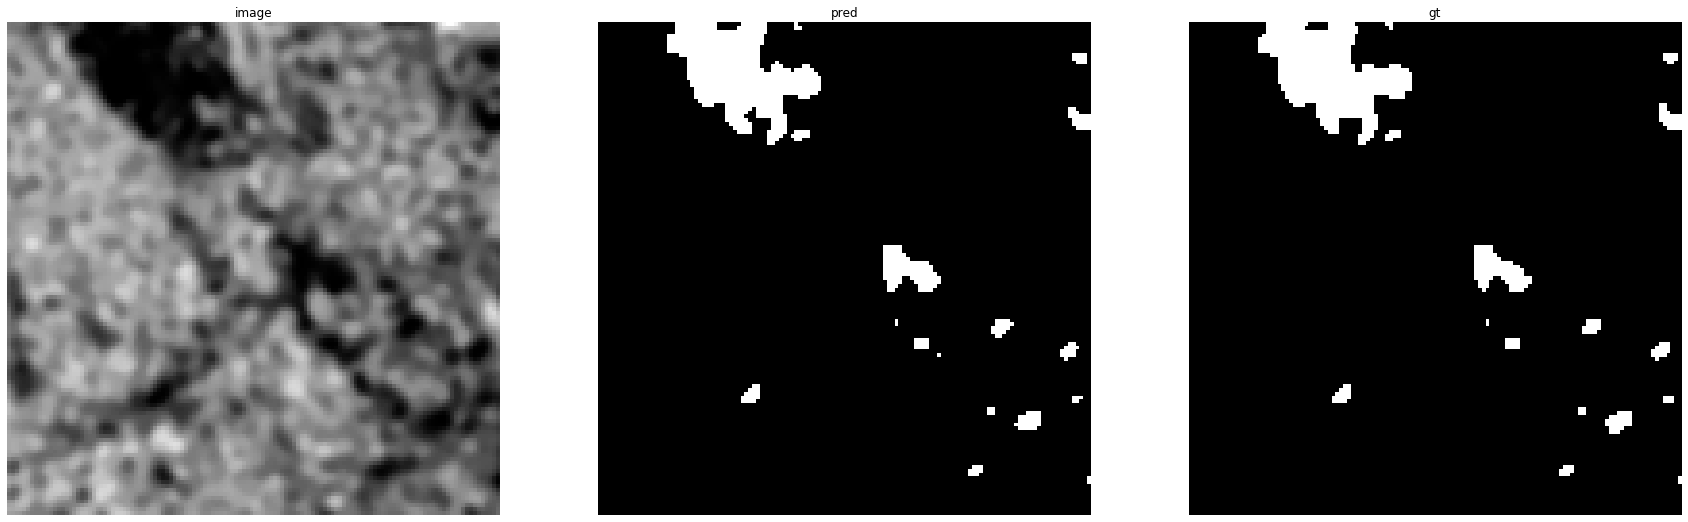

accuracy    : 0.996826171875
precision   : 0.9721329046087889
recall      : 0.9721329046087889
f1          : 0.9721329046087889
pr_auc      : 0.9960382448500421
iou         : 0.9457768508863399


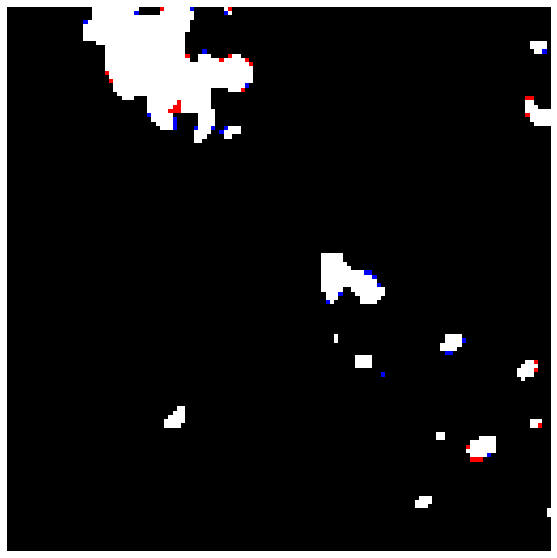

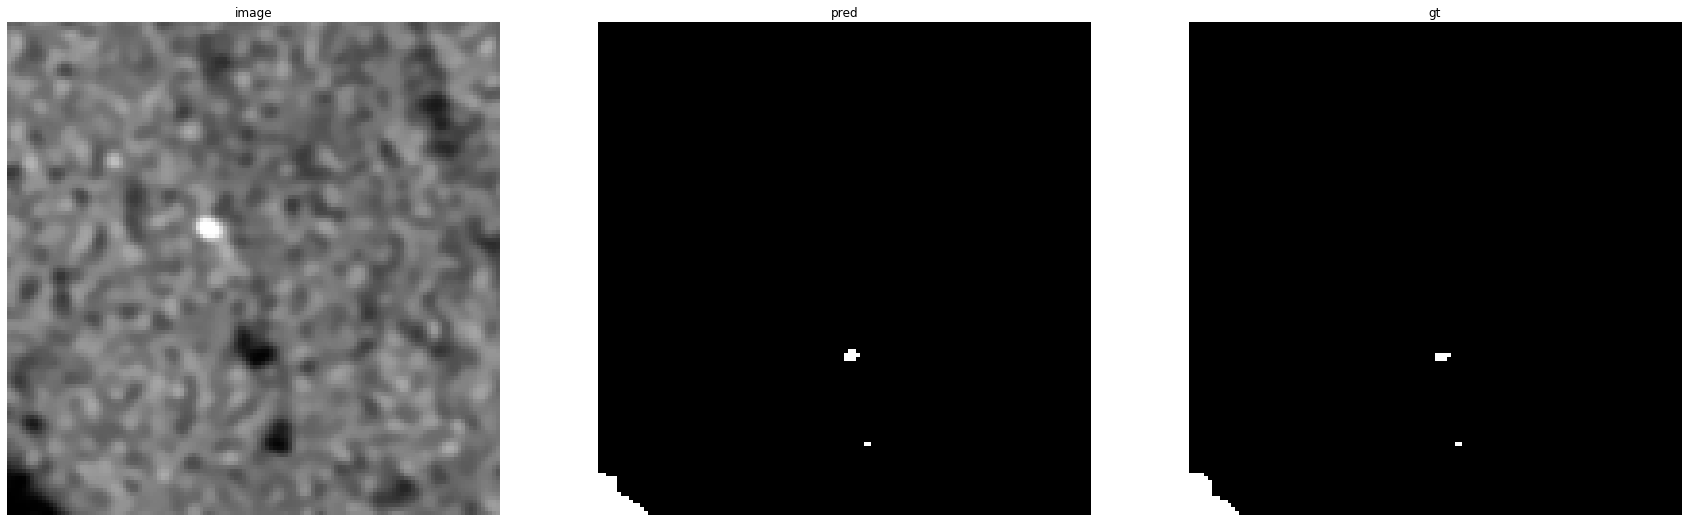

accuracy    : 0.99951171875
precision   : 0.9782608695652174
recall      : 0.9375
f1          : 0.9574468085106383
pr_auc      : 0.9937489555468642
iou         : 0.9183673469387755


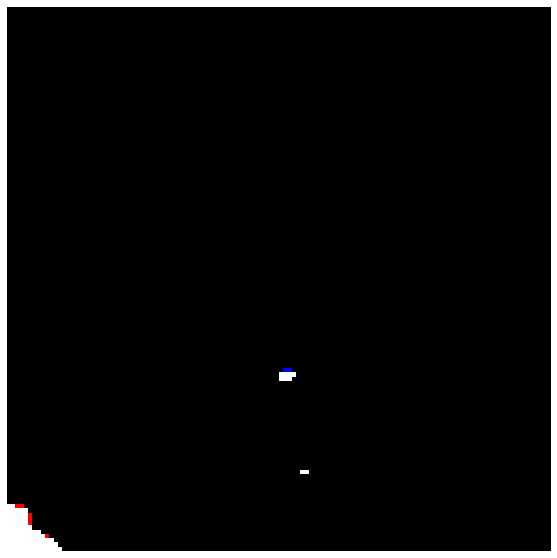

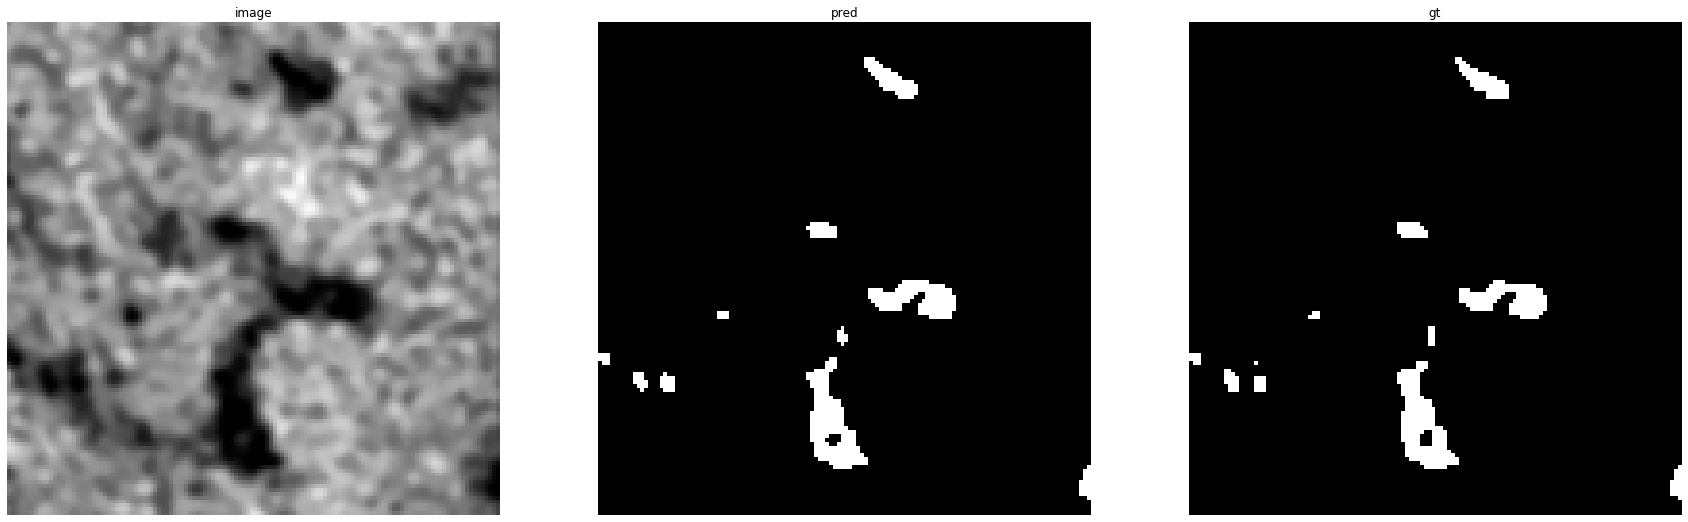

accuracy    : 0.99700927734375
precision   : 0.9476635514018692
recall      : 0.9602272727272727
f1          : 0.9539040451552211
pr_auc      : 0.9941095763086953
iou         : 0.9118705035971223


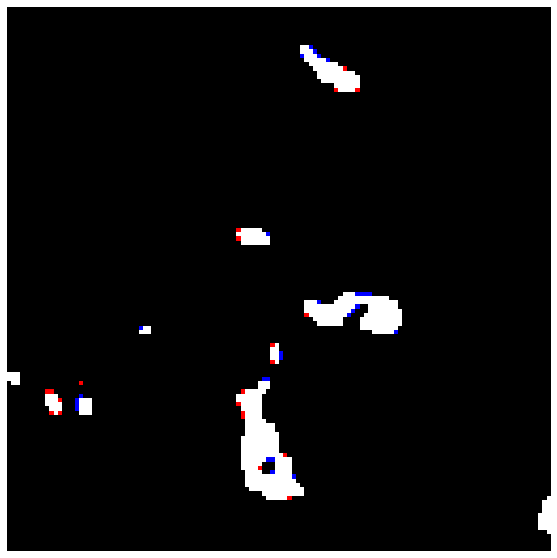

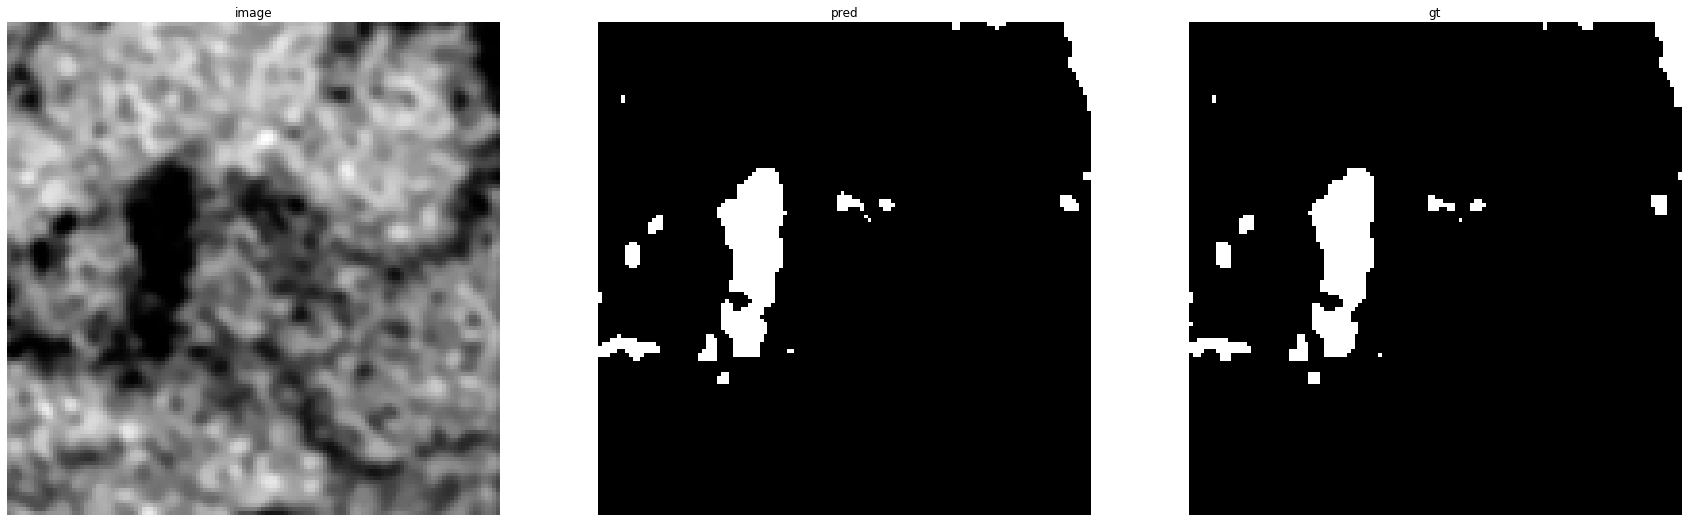

accuracy    : 0.995849609375
precision   : 0.9561707035755479
recall      : 0.9650756693830035
f1          : 0.9606025492468135
pr_auc      : 0.9960621199669936
iou         : 0.9241917502787068


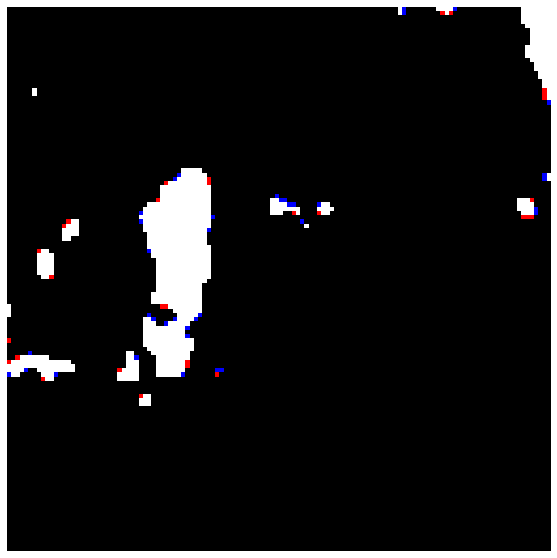

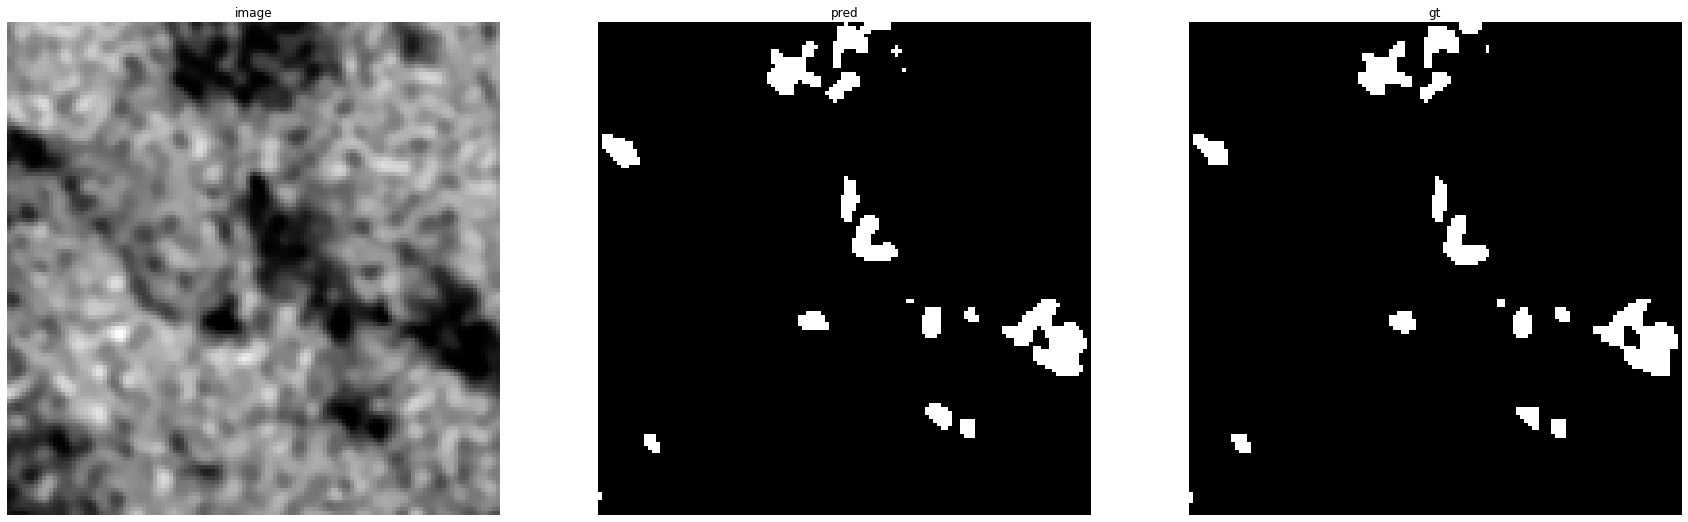

accuracy    : 0.99395751953125
precision   : 0.9188144329896907
recall      : 0.951935914552737
f1          : 0.9350819672131147
pr_auc      : 0.9885203859187293
iou         : 0.8780788177339901


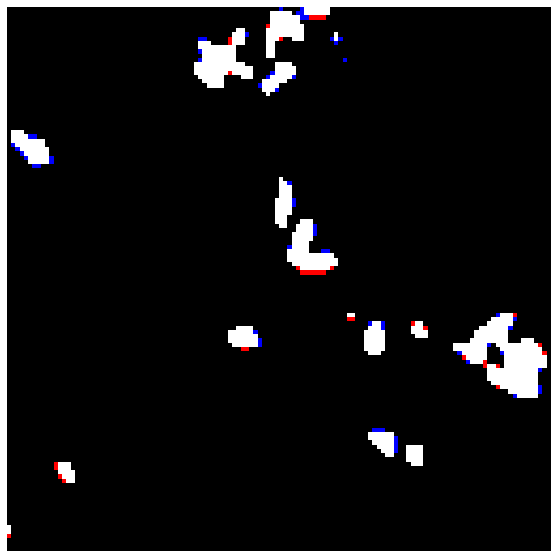

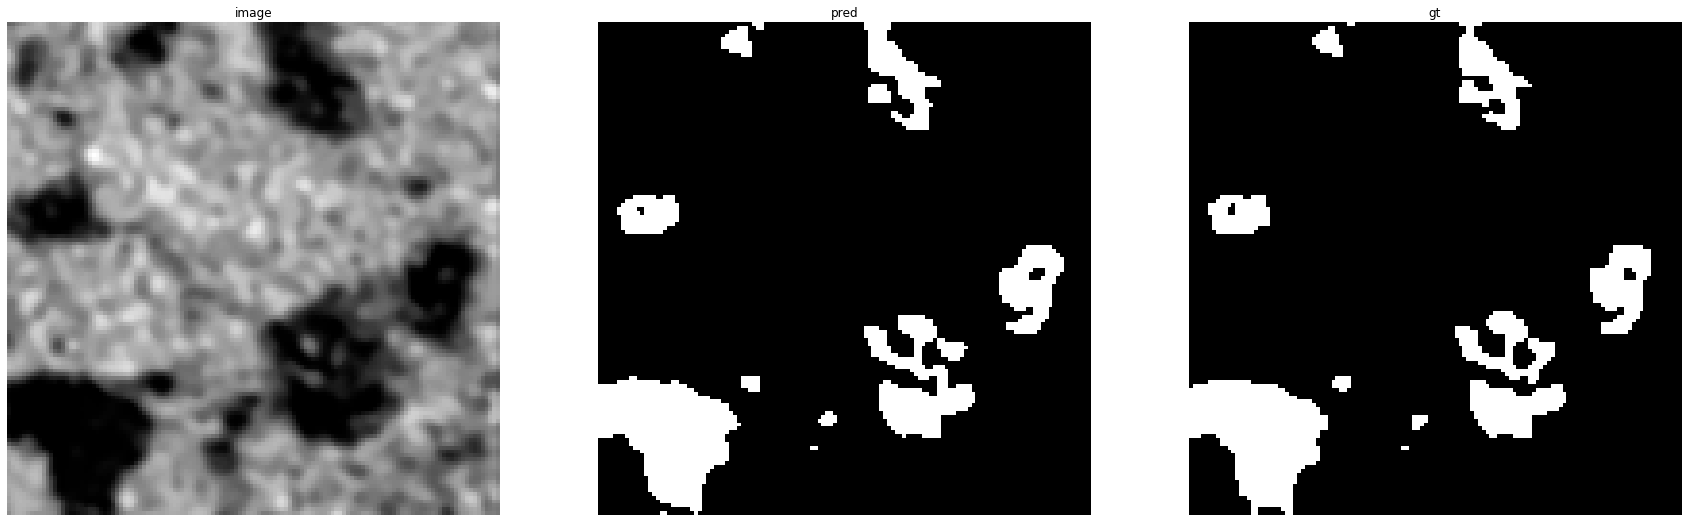

accuracy    : 0.99169921875
precision   : 0.96086508753862
recall      : 0.9688473520249221
f1          : 0.9648397104446742
pr_auc      : 0.9968177922364637
iou         : 0.932067932067932


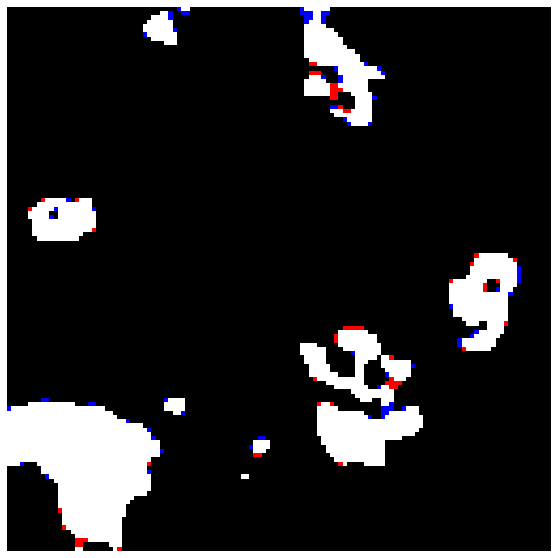

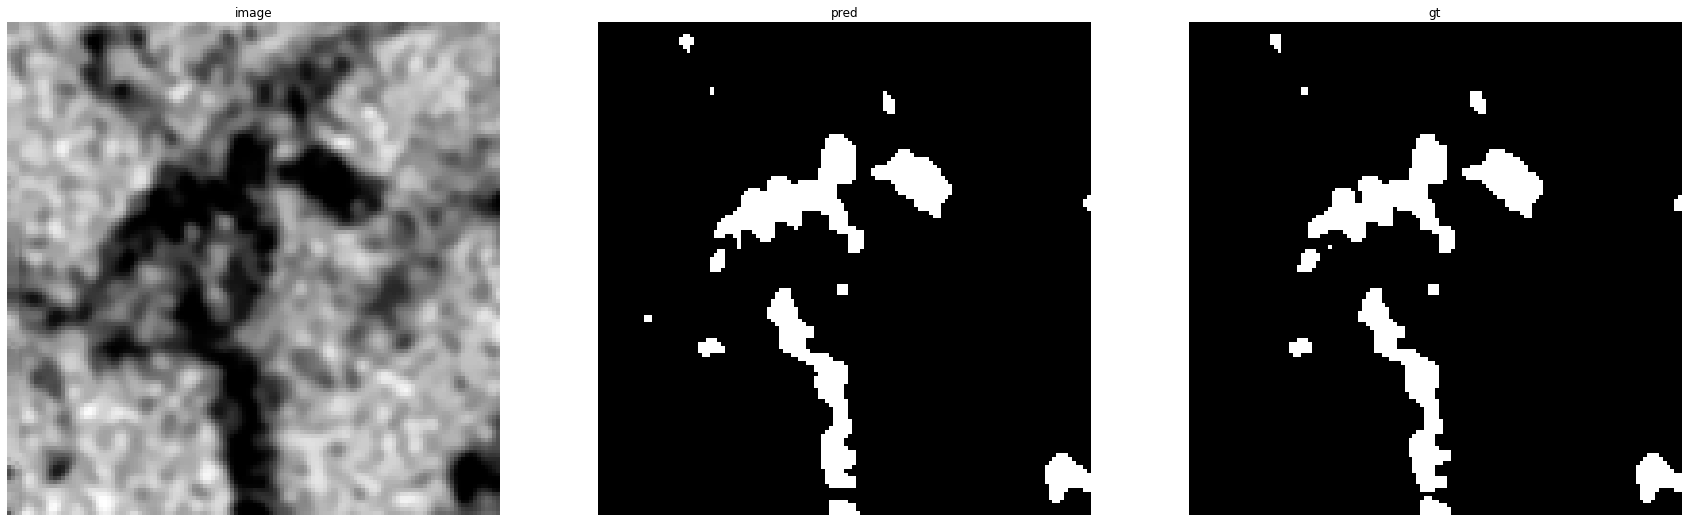

accuracy    : 0.99383544921875
precision   : 0.960222752585521
recall      : 0.9594594594594594
f1          : 0.9598409542743538
pr_auc      : 0.9947394781993978
iou         : 0.922782874617737


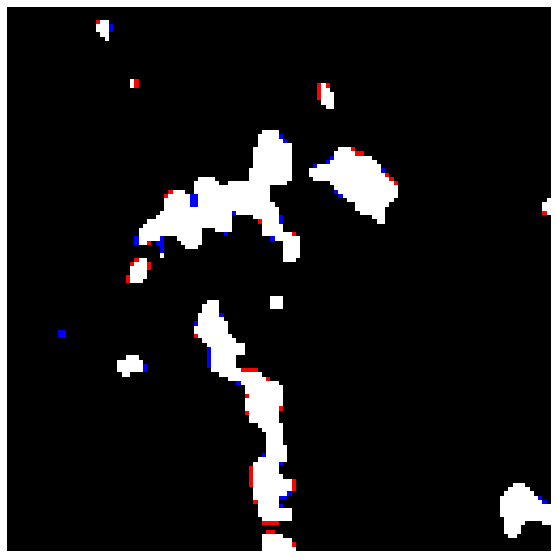

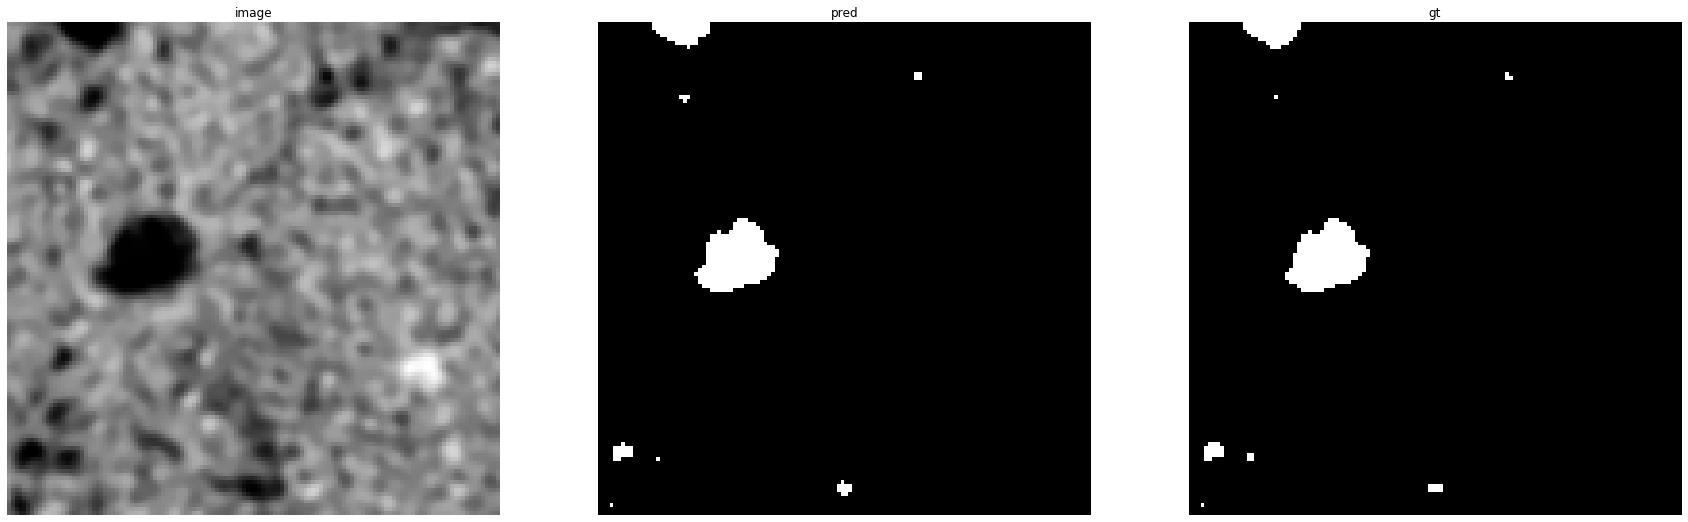

accuracy    : 0.99871826171875
precision   : 0.9764397905759162
recall      : 0.9688311688311688
f1          : 0.9726205997392438
pr_auc      : 0.9982107355635694
iou         : 0.9467005076142132


Prediction for TeTree_subset1:


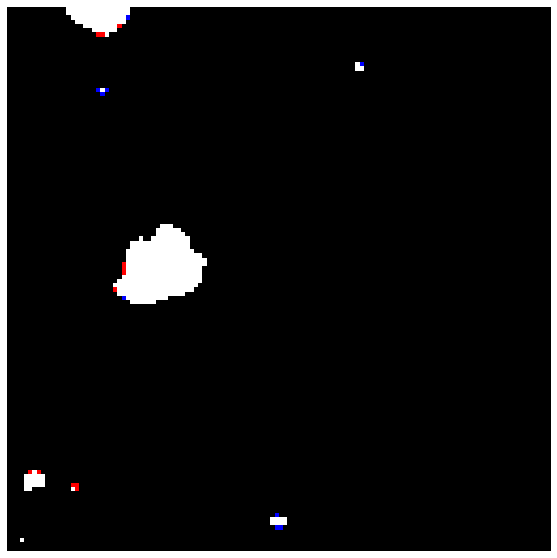

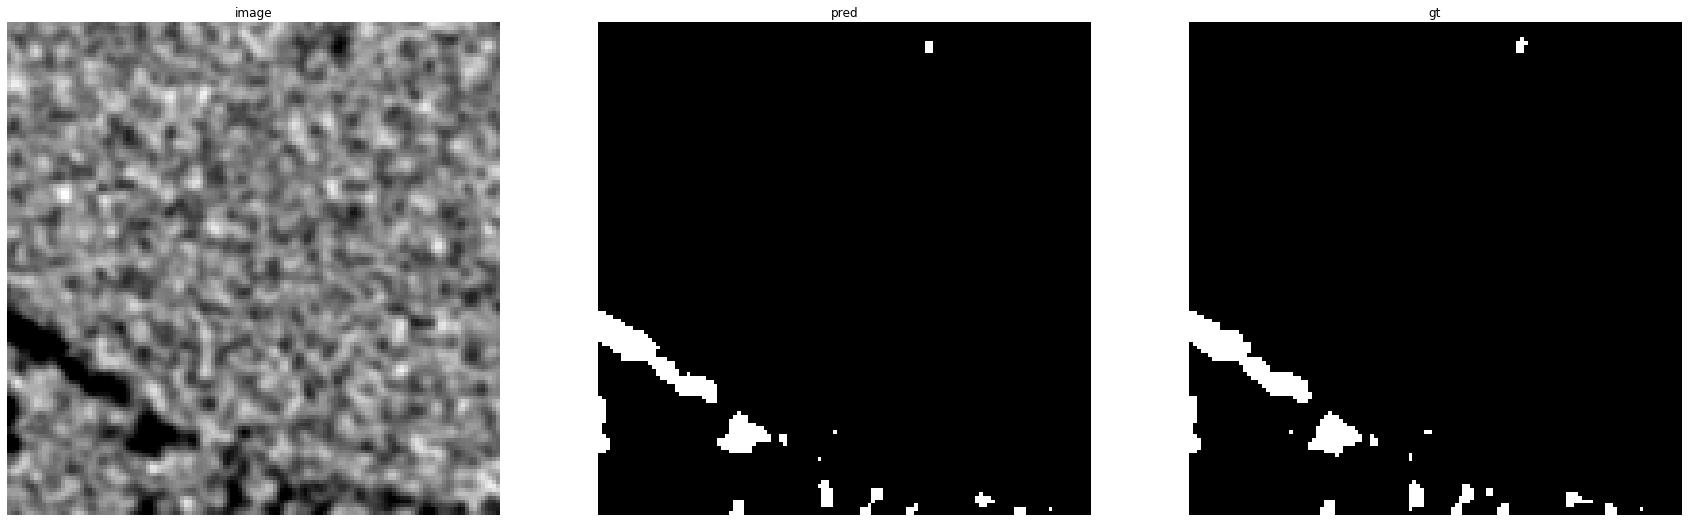

accuracy    : 0.99591064453125
precision   : 0.9856459330143541
recall      : 0.8710359408033826
f1          : 0.9248035914702581
pr_auc      : 0.9927397182719926
iou         : 0.860125260960334


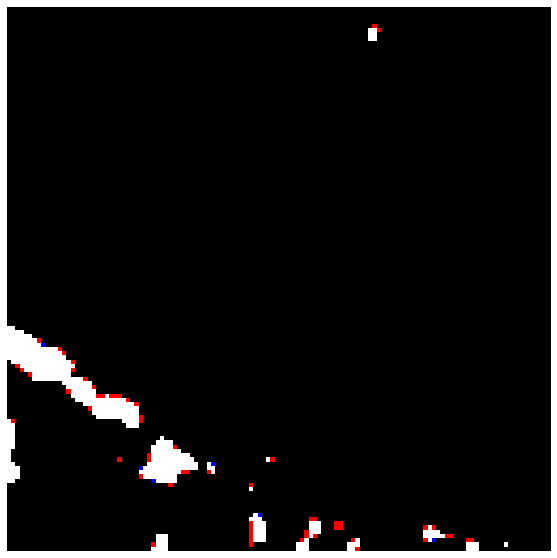

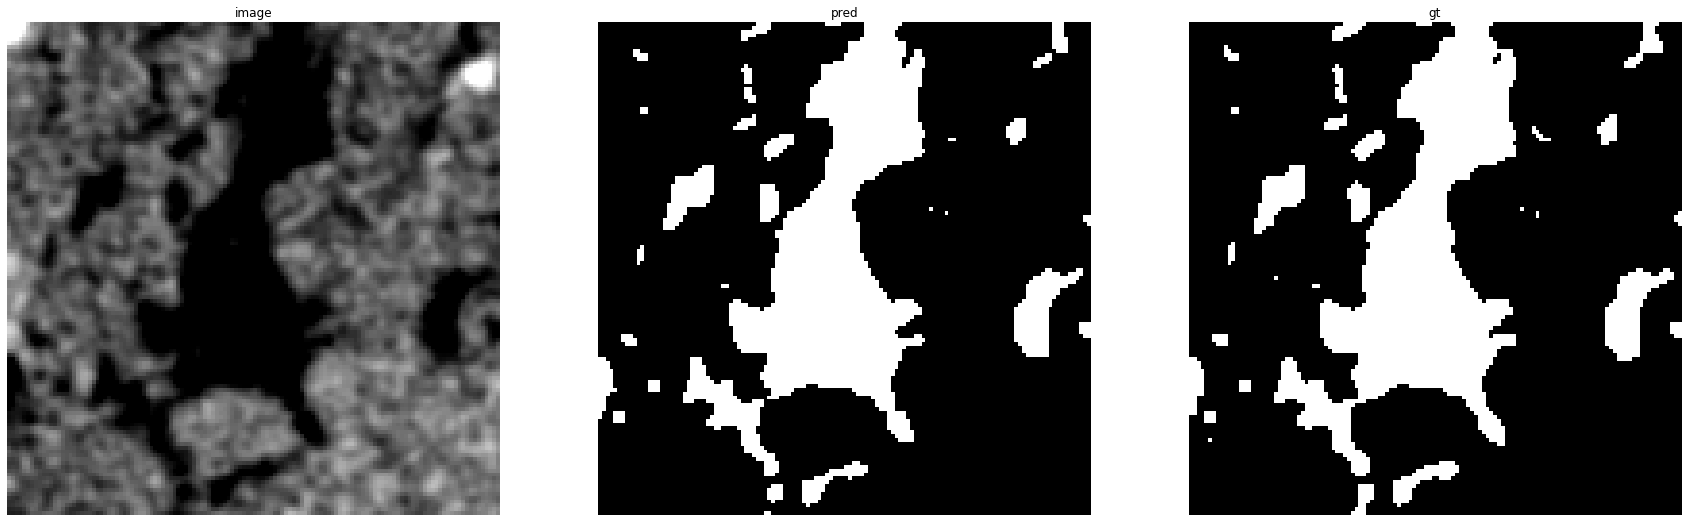

accuracy    : 0.98895263671875
precision   : 0.9974395448079658
recall      : 0.9532354540511148
f1          : 0.974836646739886
pr_auc      : 0.9991021135870692
iou         : 0.9509085977759696


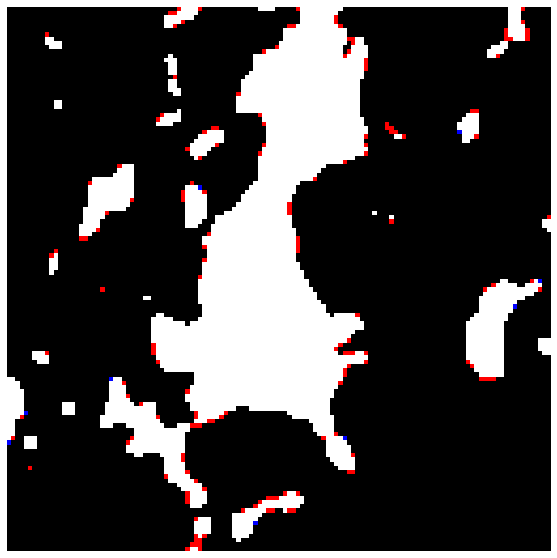

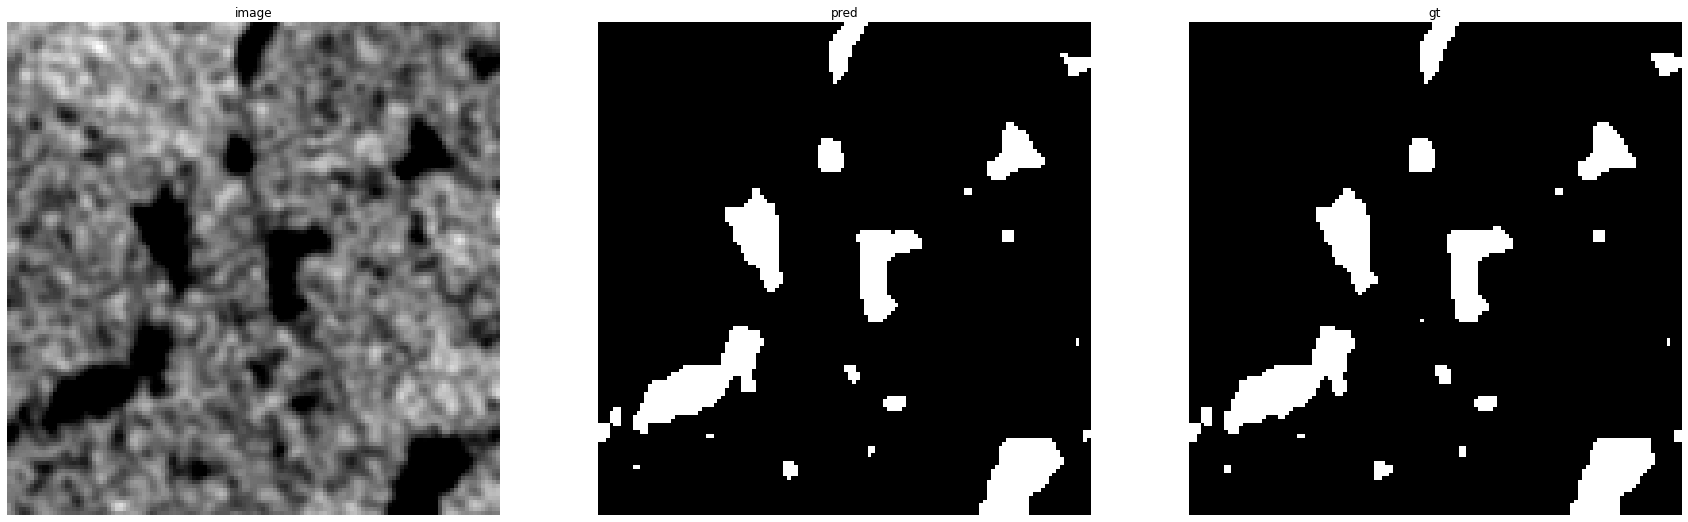

accuracy    : 0.99481201171875
precision   : 0.9980119284294234
recall      : 0.9483627204030227
f1          : 0.9725540845979981
pr_auc      : 0.9991334837760331
iou         : 0.9465744814582024


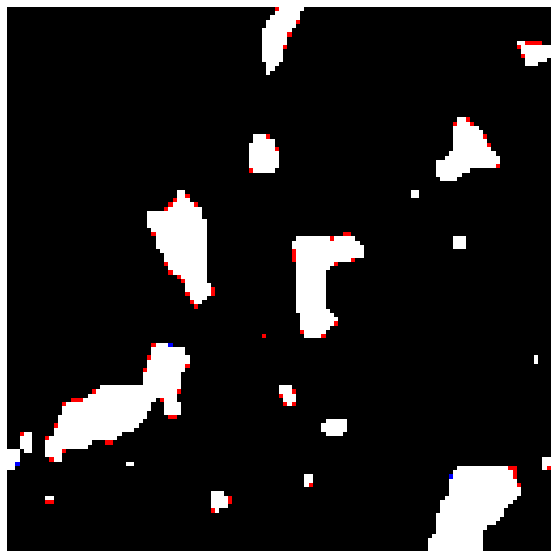

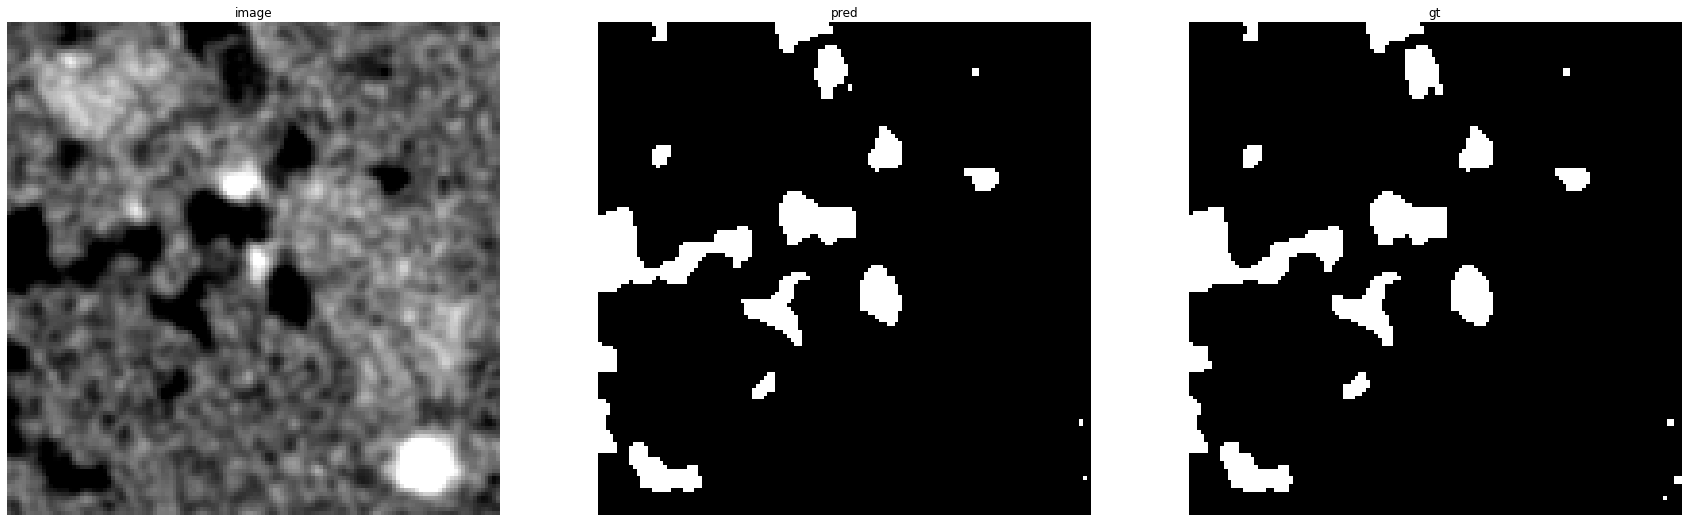

accuracy    : 0.99420166015625
precision   : 0.9950142450142451
recall      : 0.9407407407407408
f1          : 0.96711664935964
pr_auc      : 0.9984081327946341
iou         : 0.9363270777479893


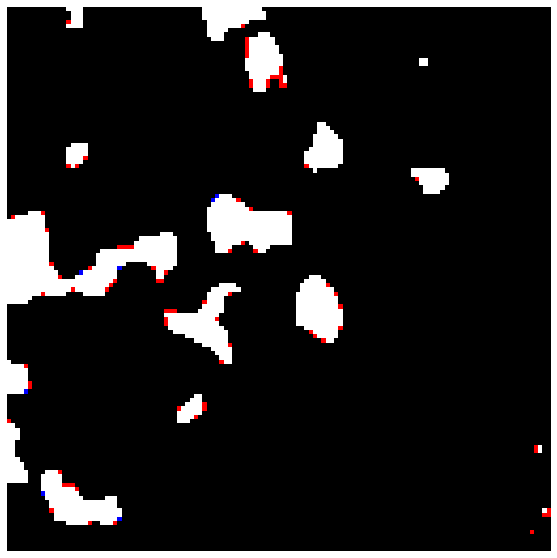

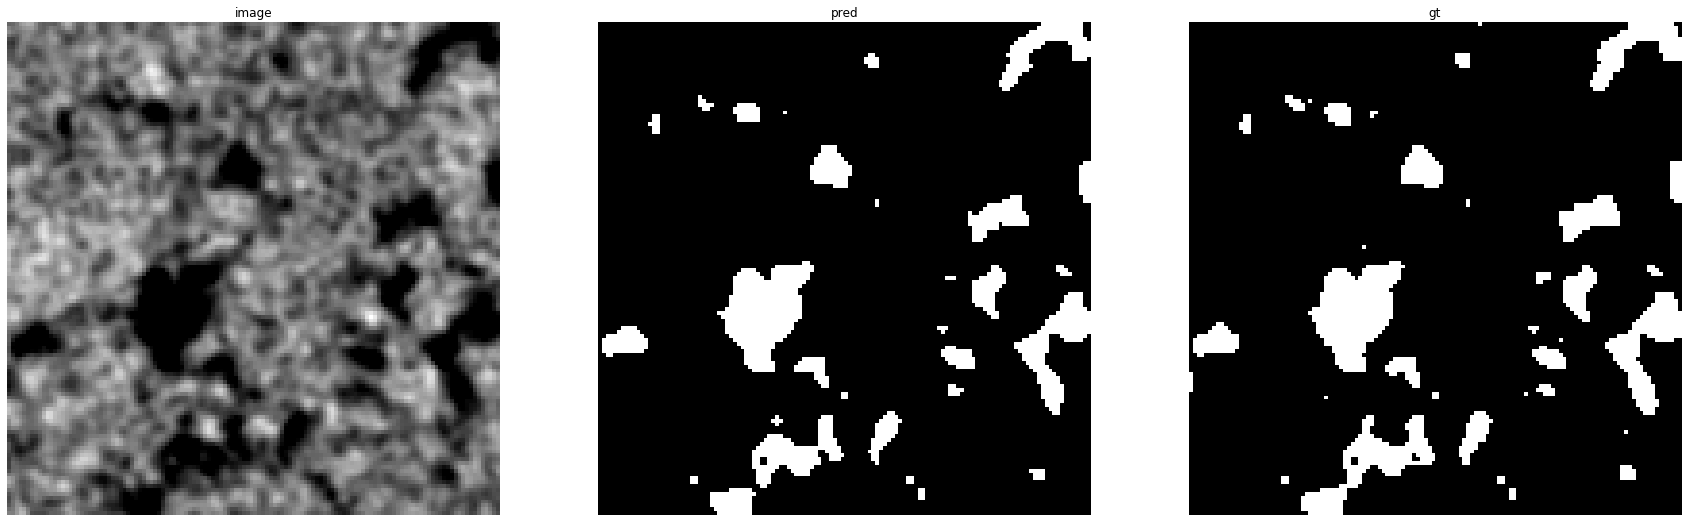

accuracy    : 0.9906005859375
precision   : 0.9964601769911504
recall      : 0.91943385955362
f1          : 0.9563986409966024
pr_auc      : 0.9971779637212805
iou         : 0.9164405860010851


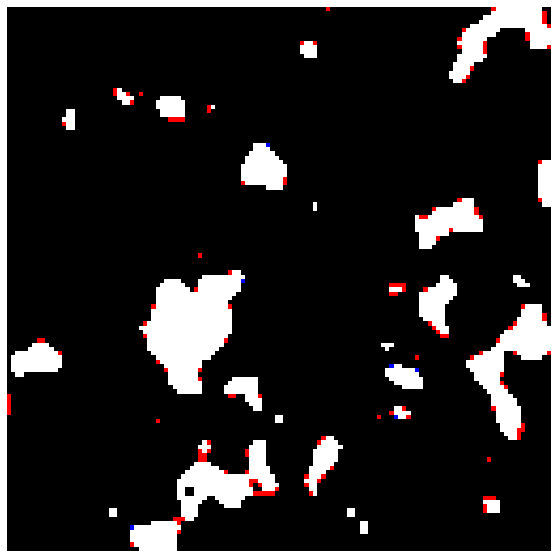

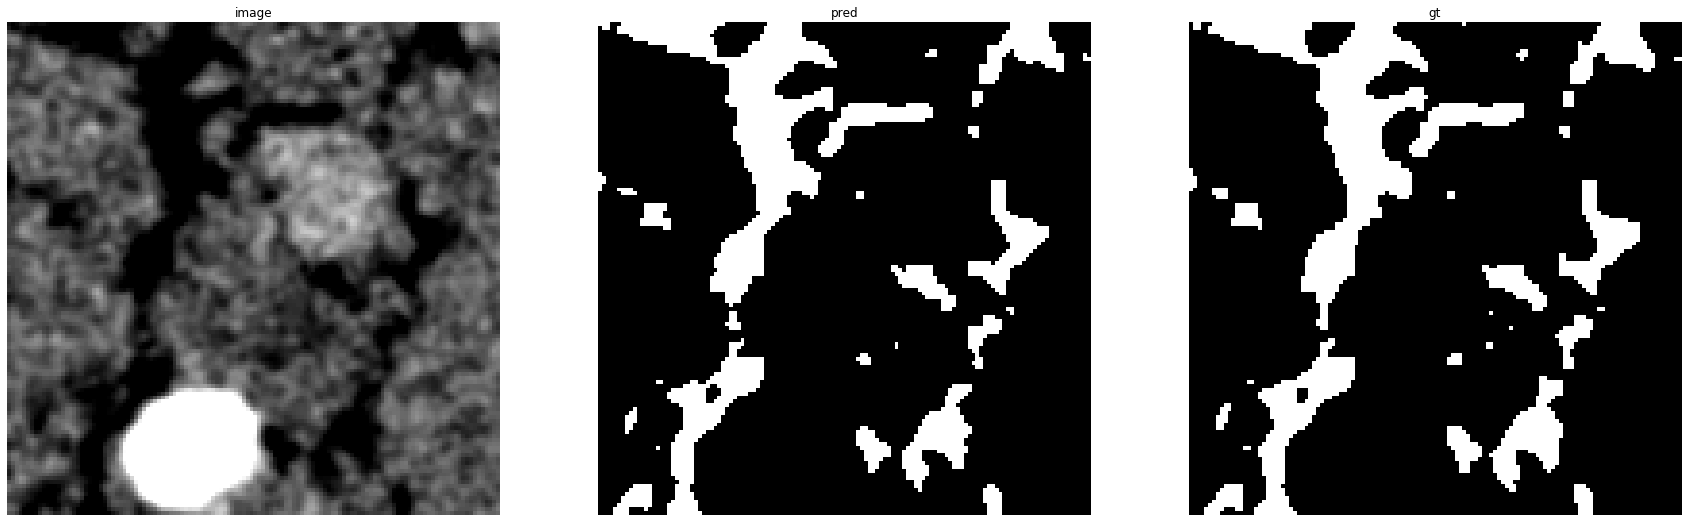

accuracy    : 0.9866943359375
precision   : 0.9949964260185847
recall      : 0.9317269076305221
f1          : 0.9623228482544072
pr_auc      : 0.9976021049010315
iou         : 0.927381745502998


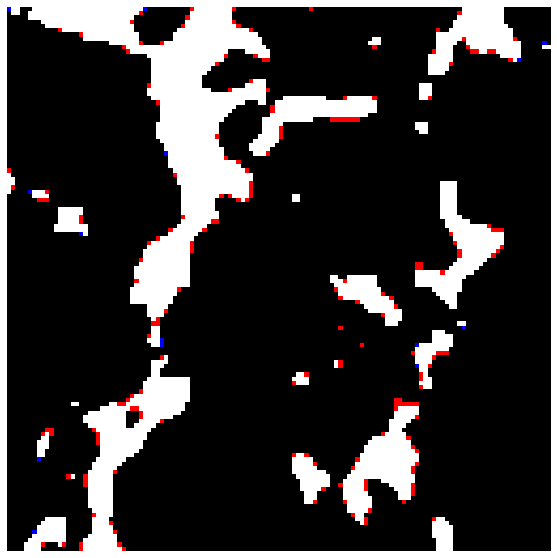

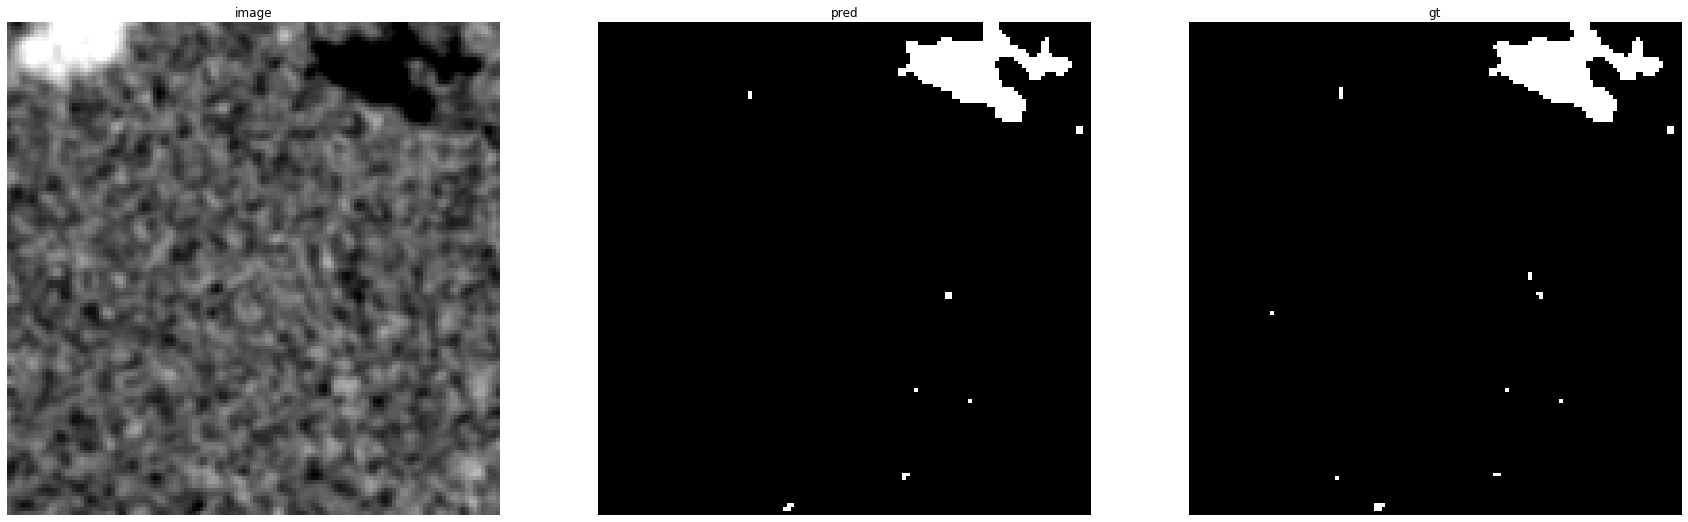

accuracy    : 0.998291015625
precision   : 0.9942196531791907
recall      : 0.9537892791127541
f1          : 0.9735849056603774
pr_auc      : 0.9991591527033569
iou         : 0.9485294117647058


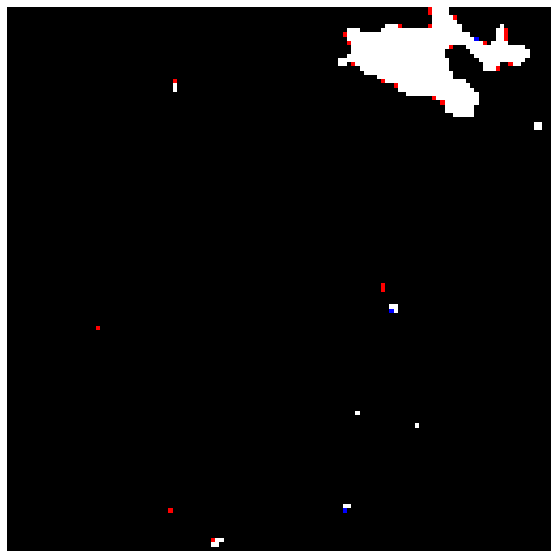

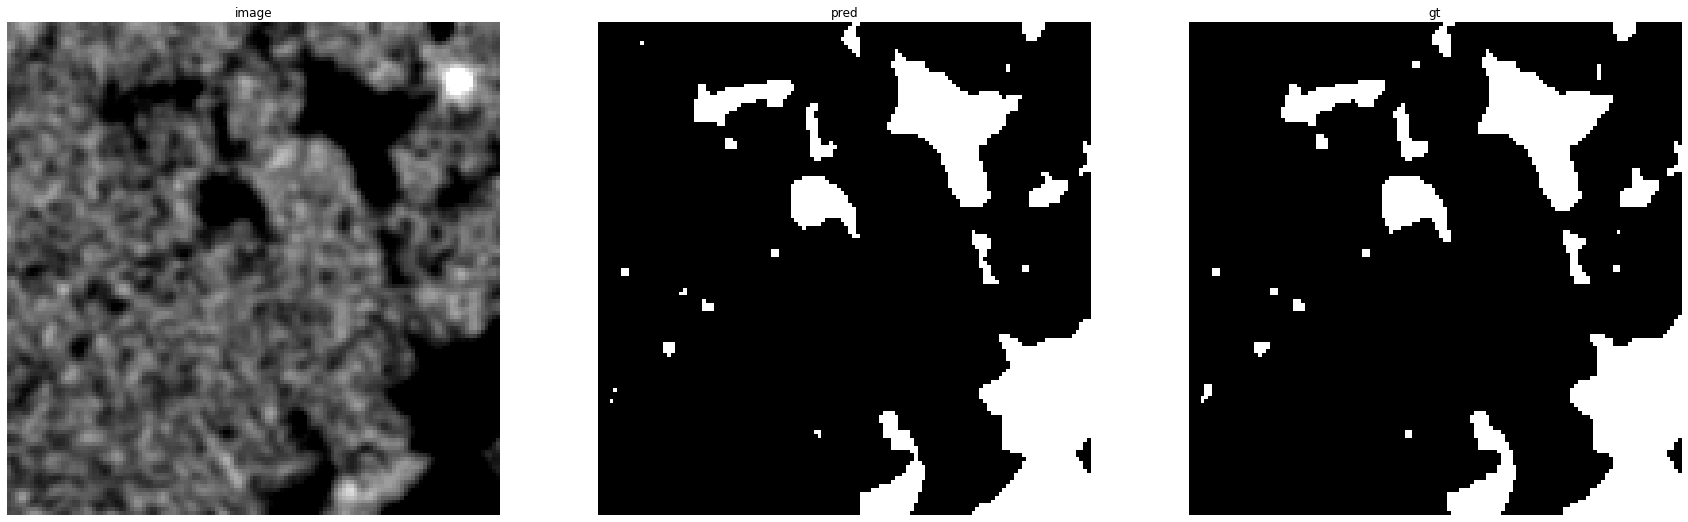

accuracy    : 0.99127197265625
precision   : 0.9976076555023924
recall      : 0.9480863963622584
f1          : 0.9722168253351468
pr_auc      : 0.9988897607624702
iou         : 0.9459357277882797


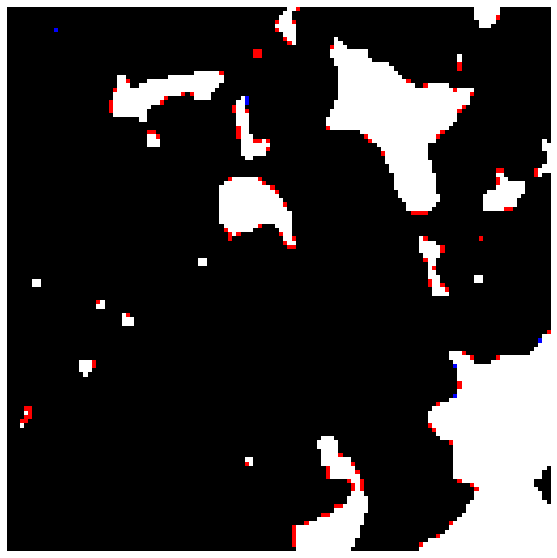

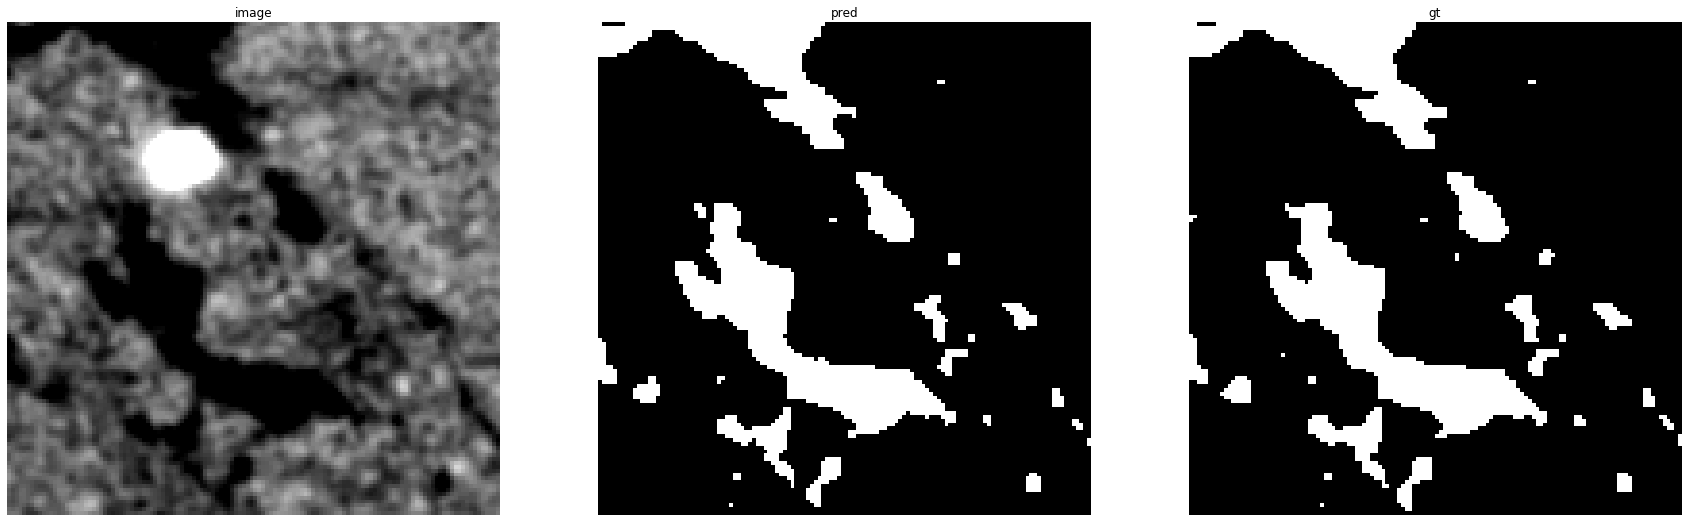

accuracy    : 0.9908447265625
precision   : 0.9984070091596974
recall      : 0.9449679607990954
f1          : 0.9709527498063517
pr_auc      : 0.9990916373873291
iou         : 0.9435453519006398


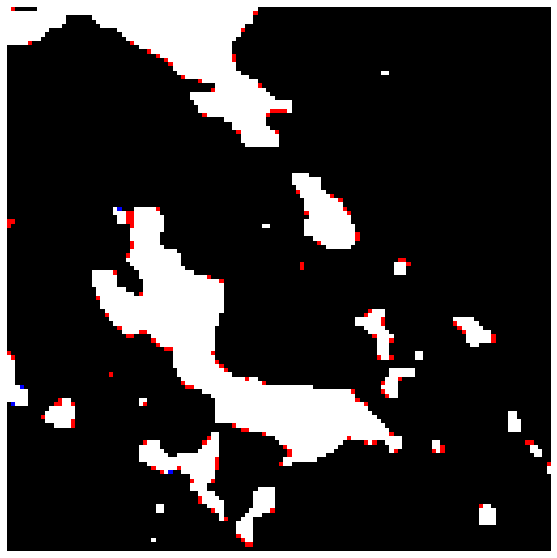

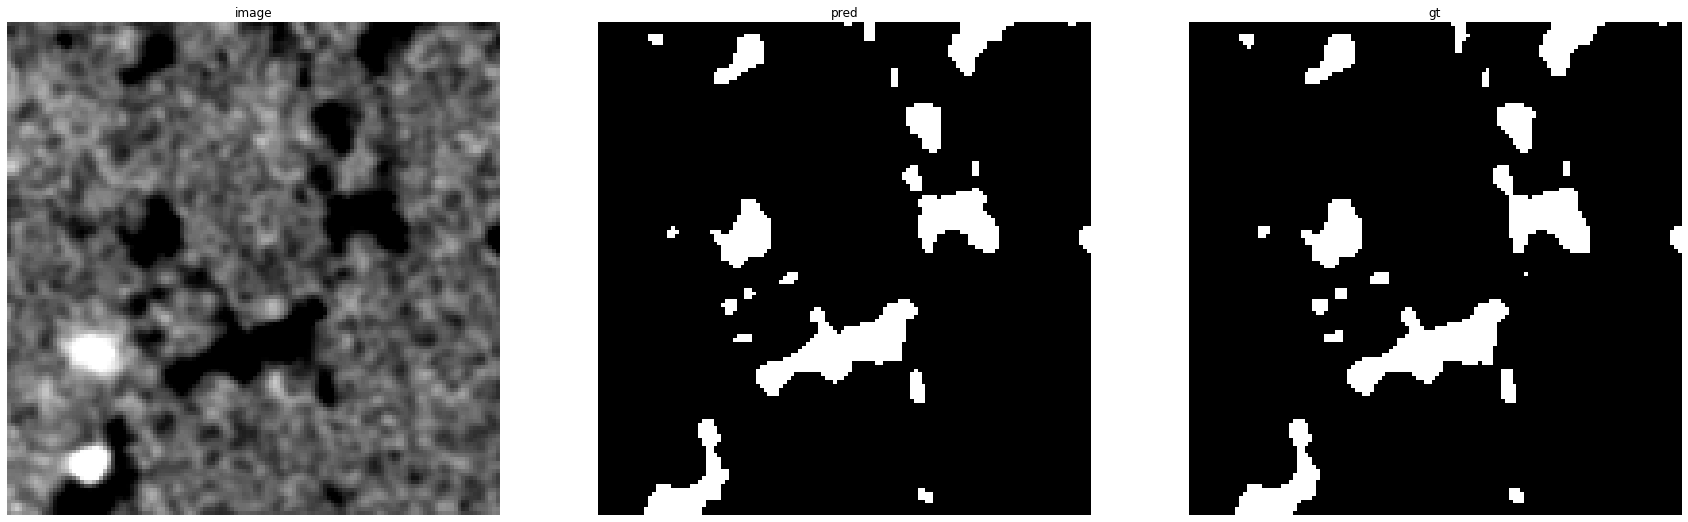

accuracy    : 0.99334716796875
precision   : 0.9960212201591512
recall      : 0.9358255451713395
f1          : 0.9649855444908448
pr_auc      : 0.9984334646597901
iou         : 0.9323401613904407


Prediction for TiTree_subset2:


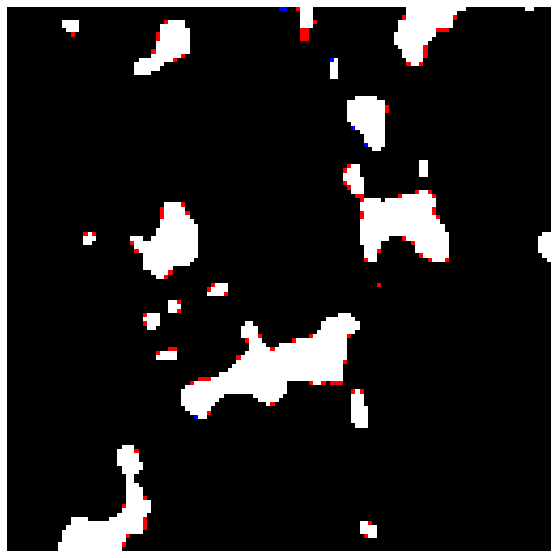

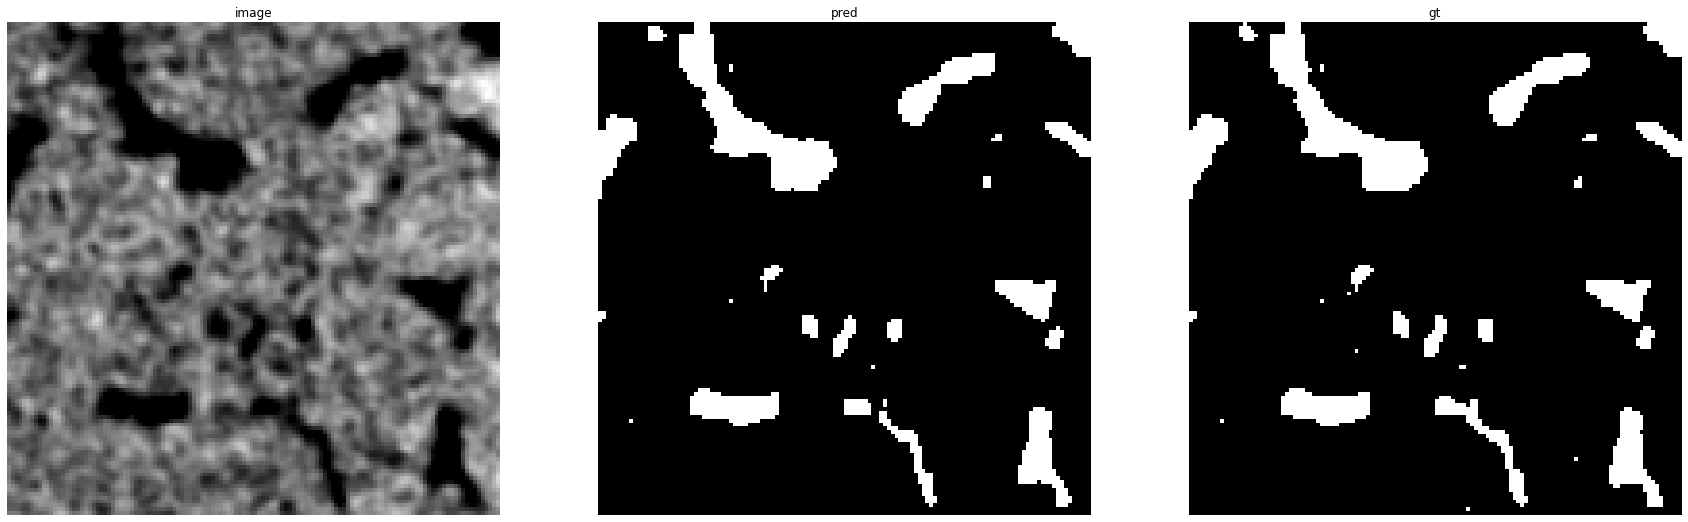

accuracy    : 0.99322509765625
precision   : 0.9908200734394125
recall      : 0.9440233236151604
f1          : 0.9668557778441326
pr_auc      : 0.9977625360968931
iou         : 0.9358381502890173


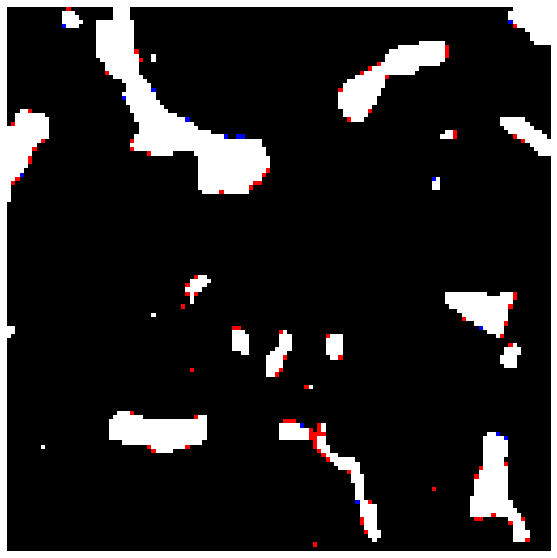

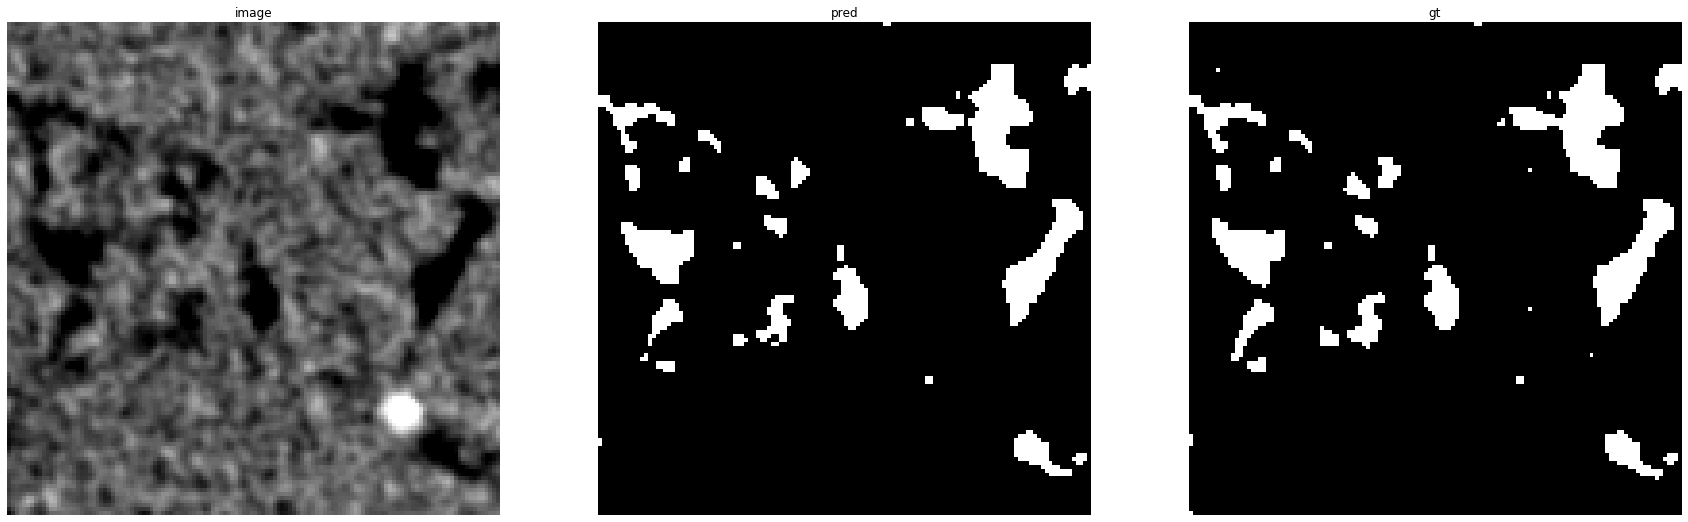

accuracy    : 0.9925537109375
precision   : 0.995850622406639
recall      : 0.9254498714652957
f1          : 0.9593604263824118
pr_auc      : 0.9974949486805342
iou         : 0.9218950064020487


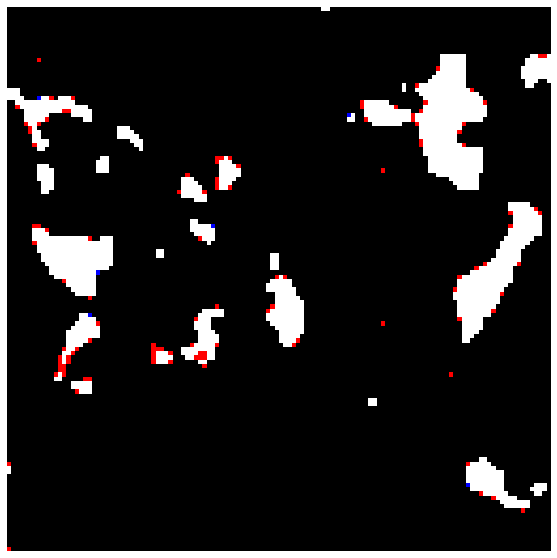

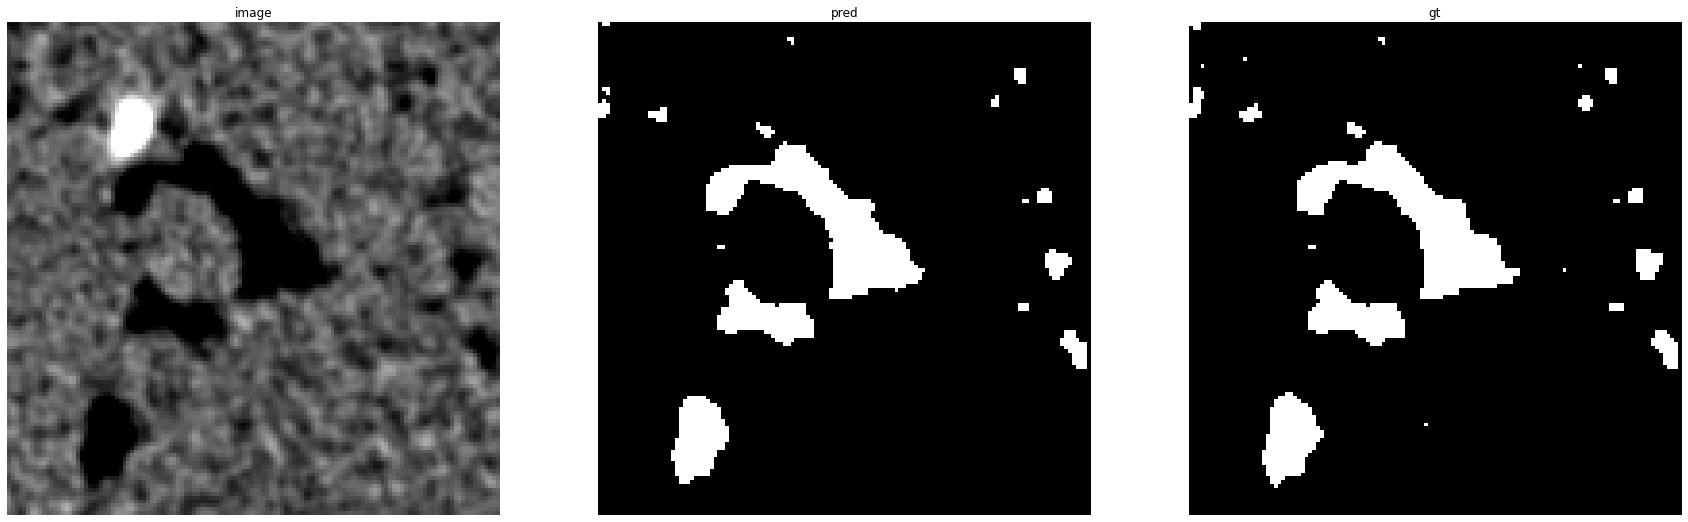

accuracy    : 0.99444580078125
precision   : 0.9949856733524355
recall      : 0.9429735234215886
f1          : 0.9682816312303939
pr_auc      : 0.9985991516280127
iou         : 0.9385135135135135


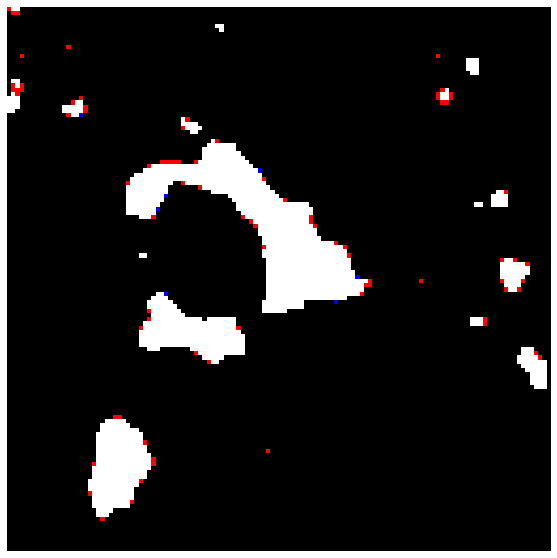

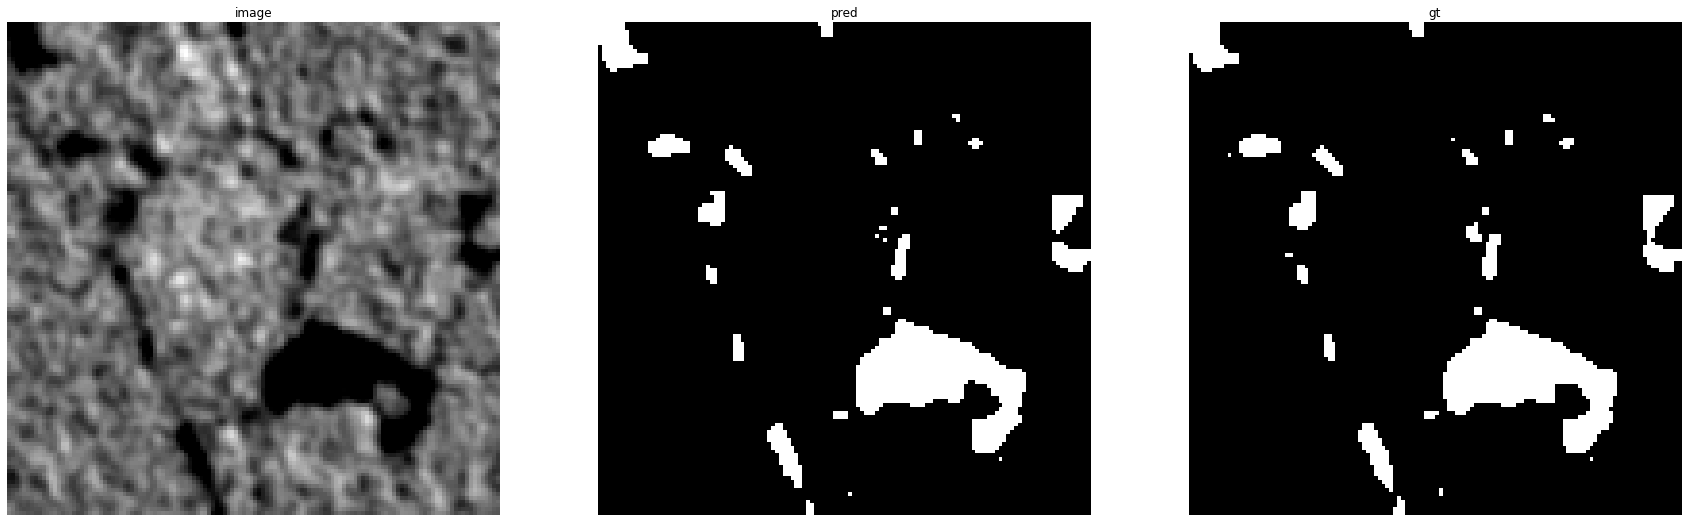

accuracy    : 0.99468994140625
precision   : 0.993916349809886
recall      : 0.943001443001443
f1          : 0.9677897075157349
pr_auc      : 0.9982681926541909
iou         : 0.9375896700143472


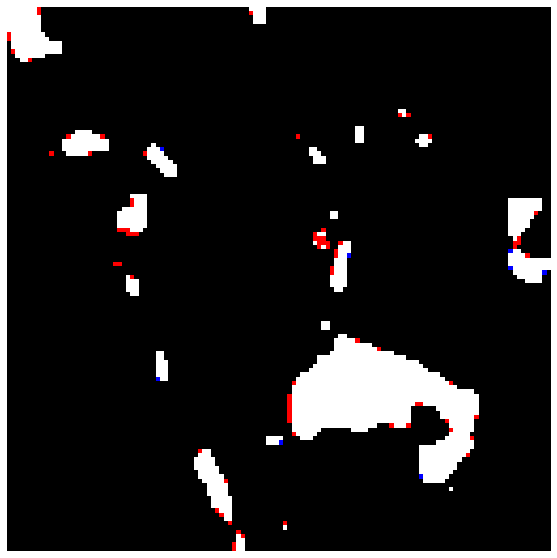

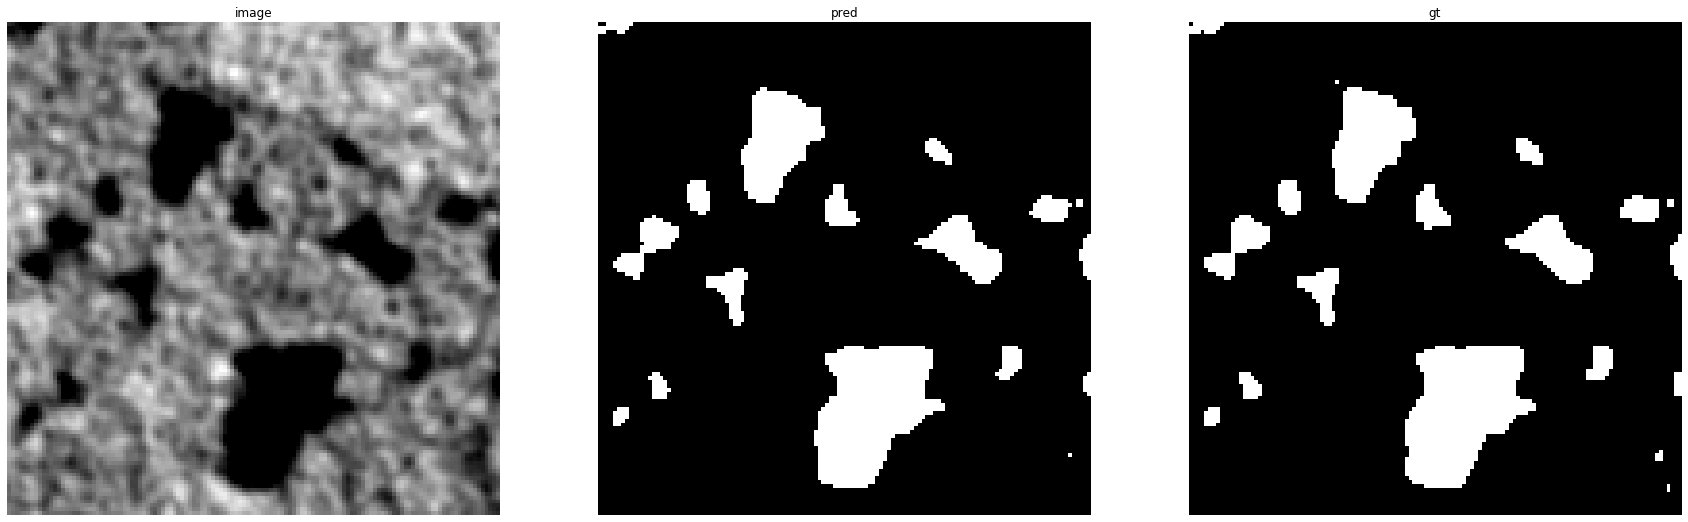

accuracy    : 0.99334716796875
precision   : 0.9984771573604061
recall      : 0.948866377231066
f1          : 0.9730398219144201
pr_auc      : 0.9994108101748823
iou         : 0.947495183044316


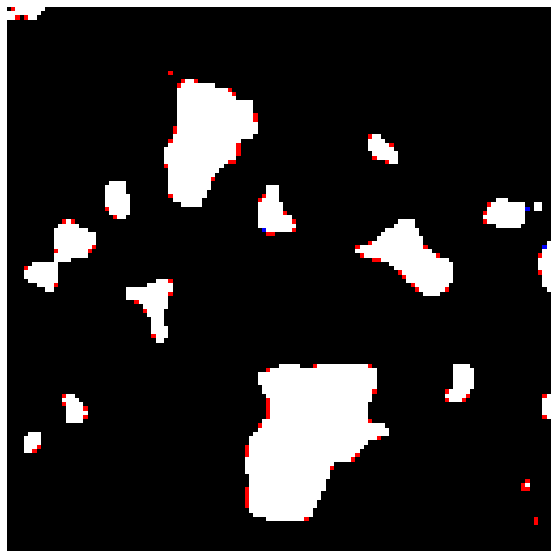

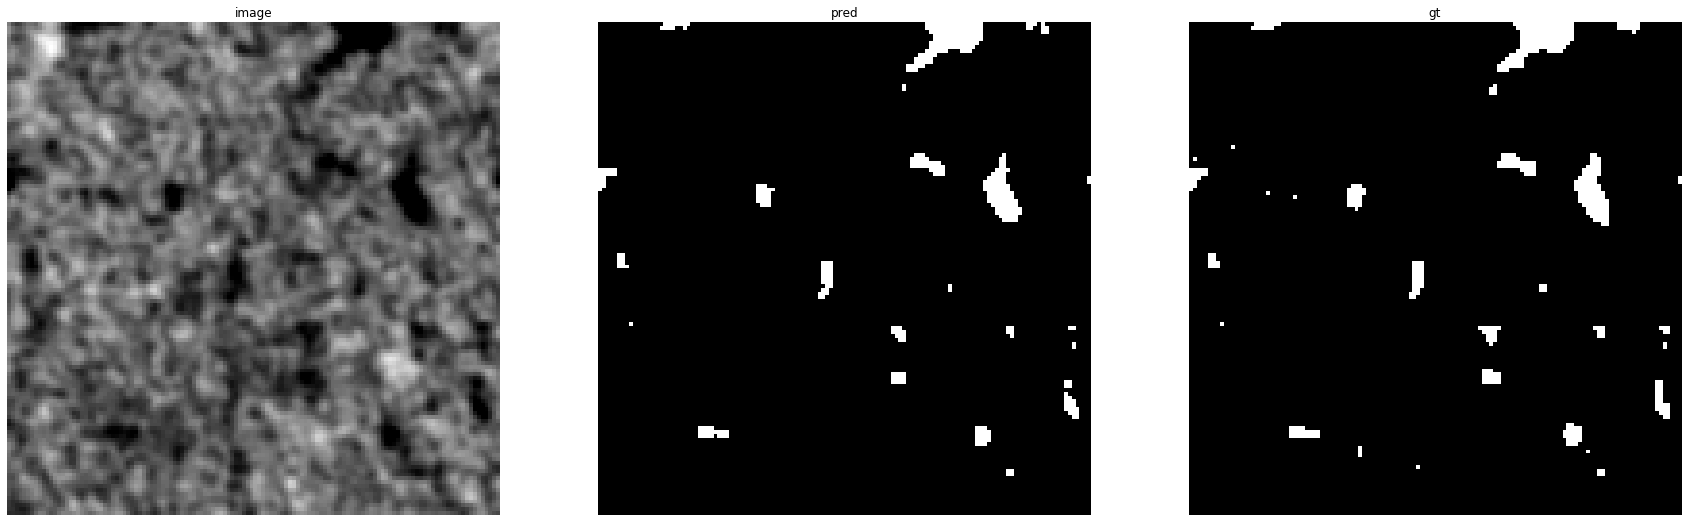

accuracy    : 0.99517822265625
precision   : 0.9867256637168141
recall      : 0.859344894026975
f1          : 0.9186405767250259
pr_auc      : 0.9900122185091577
iou         : 0.8495238095238096


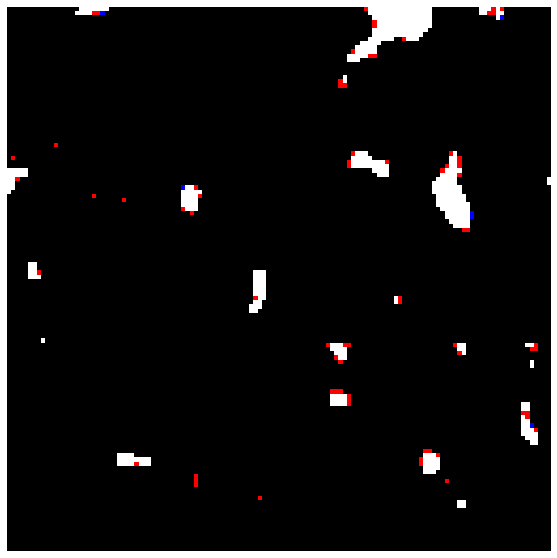

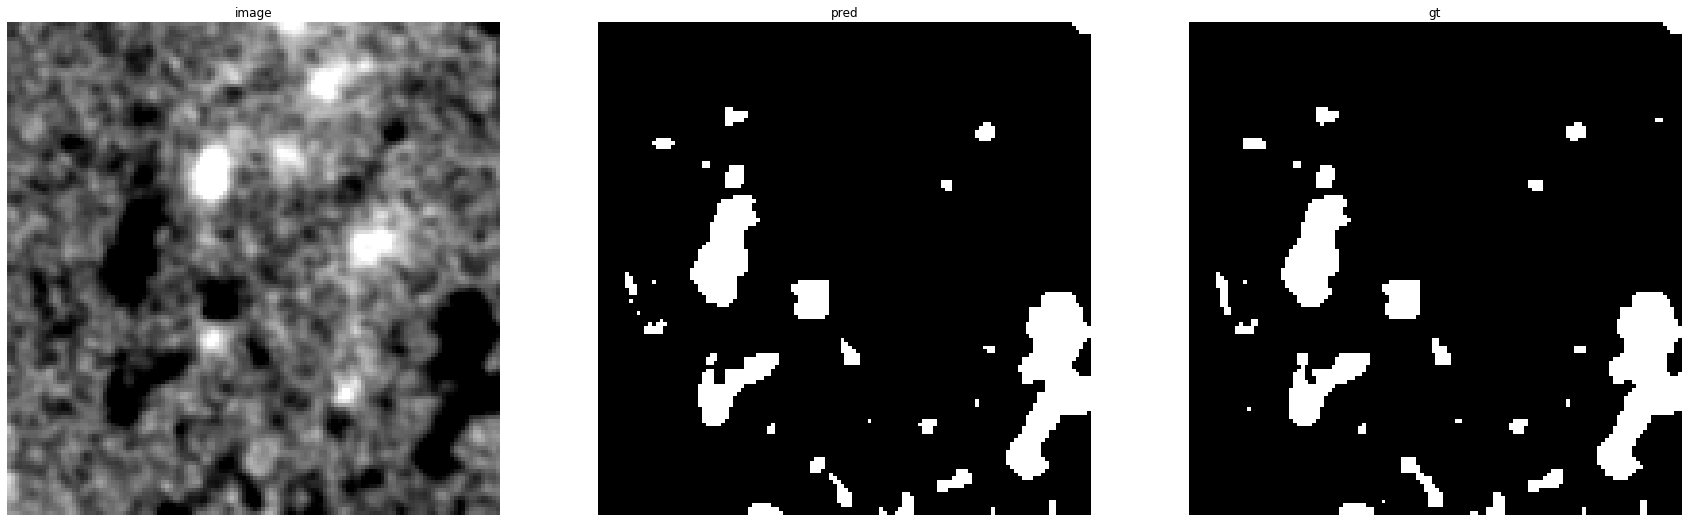

accuracy    : 0.99420166015625
precision   : 0.9924554183813443
recall      : 0.9451338994121489
f1          : 0.9682167949146872
pr_auc      : 0.9978391633879202
iou         : 0.9383916990920882


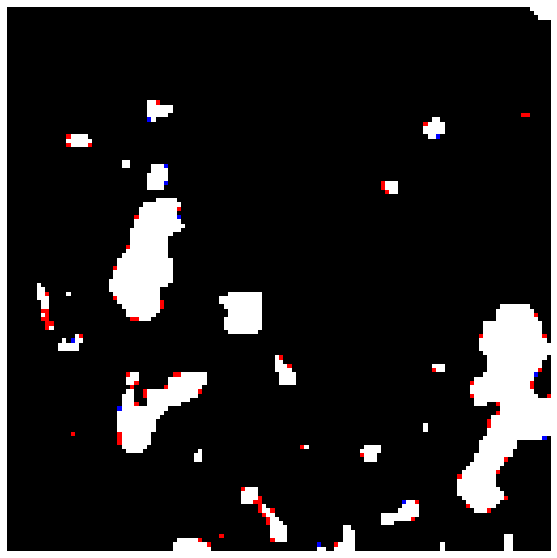

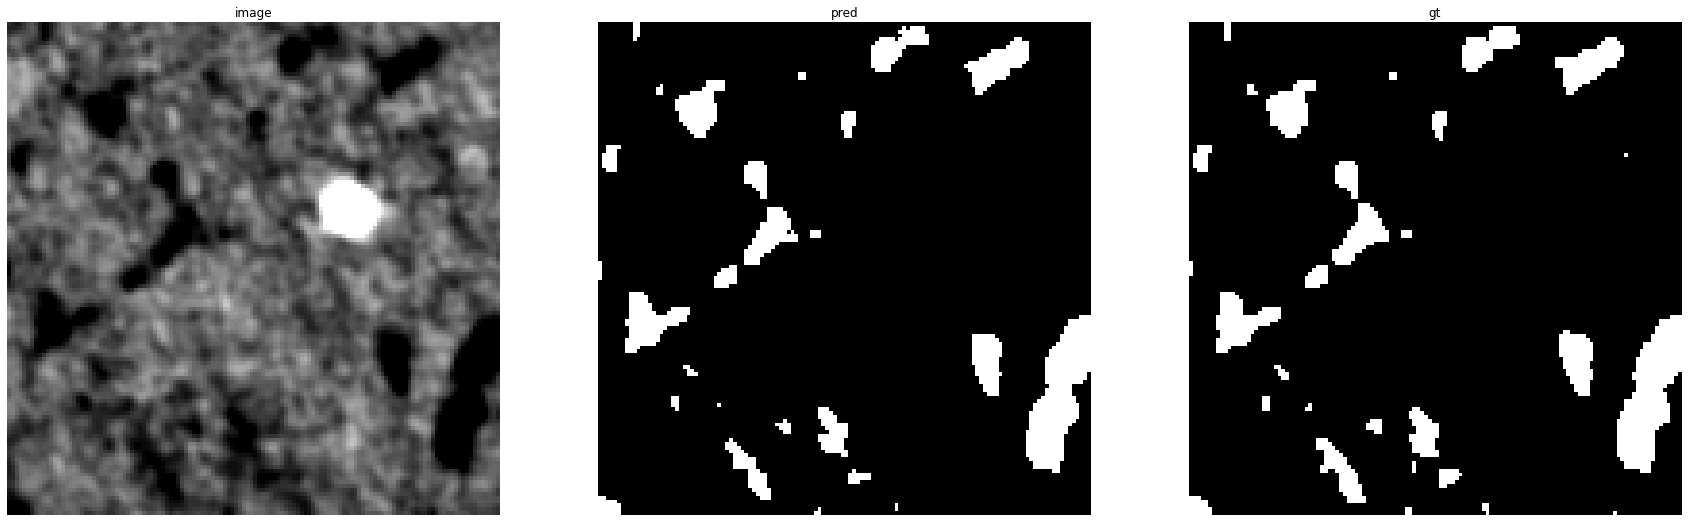

accuracy    : 0.99169921875
precision   : 0.9922096317280453
recall      : 0.918086500655308
f1          : 0.9537100068073519
pr_auc      : 0.9970726761015671
iou         : 0.911515940143136


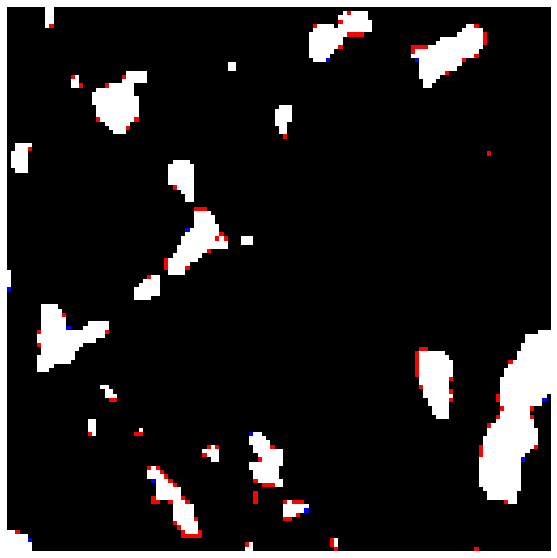

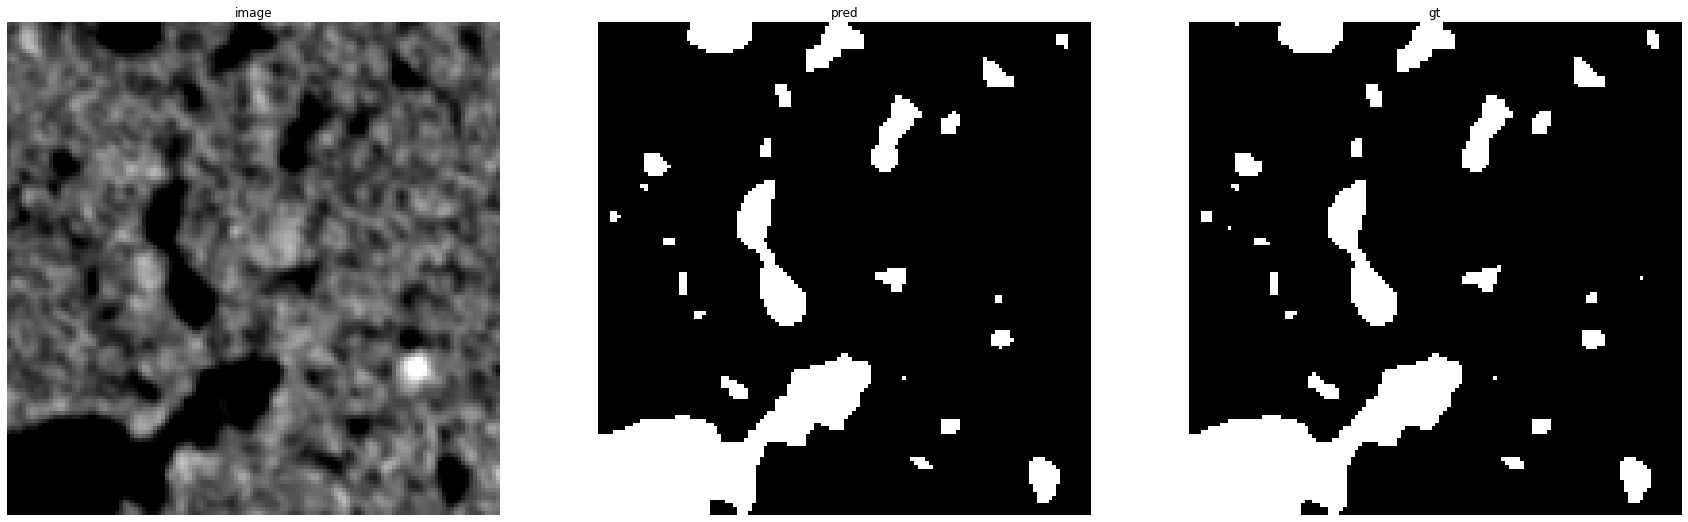

accuracy    : 0.994140625
precision   : 0.9965606190885641
recall      : 0.9634247714048213
f1          : 0.9797125950972105
pr_auc      : 0.9993190660205148
iou         : 0.9602319801159901


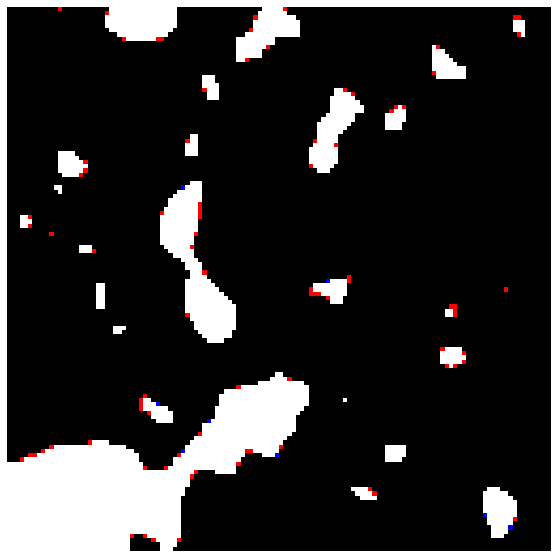

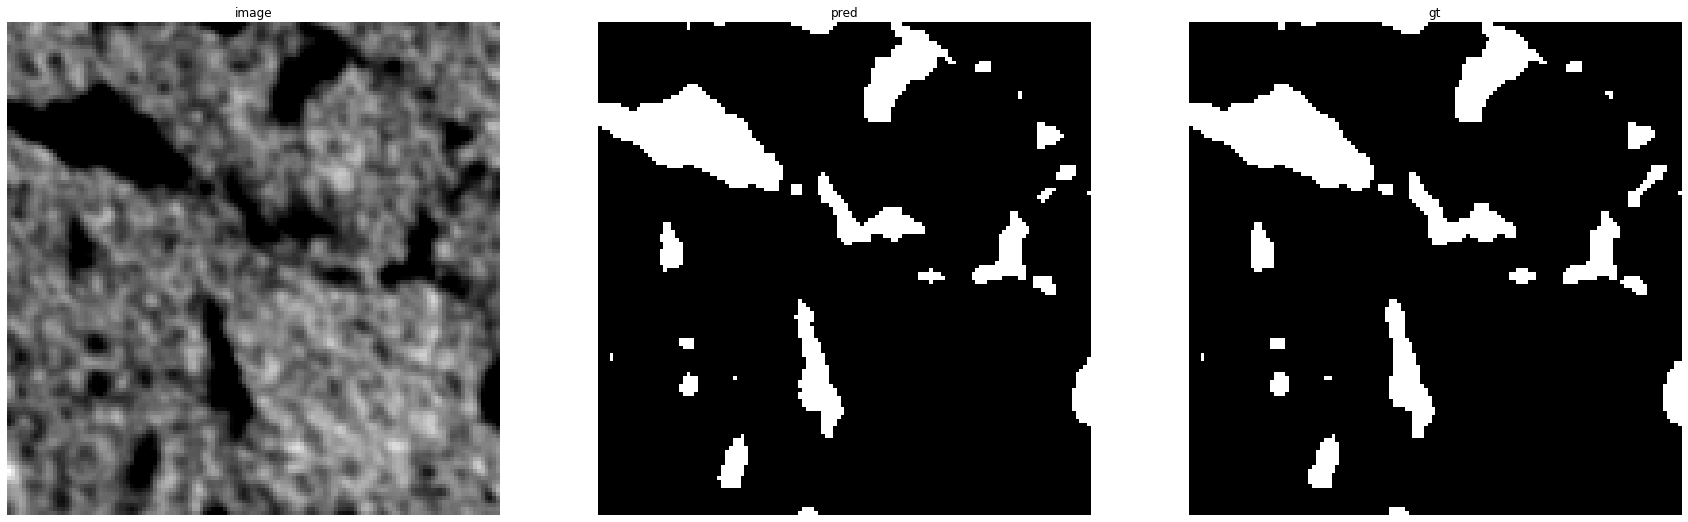

accuracy    : 0.9927978515625
precision   : 0.9930032292787944
recall      : 0.9461538461538461
f1          : 0.9690126050420168
pr_auc      : 0.9981697351098304
iou         : 0.9398879266428936


Prediction for Urna_22:


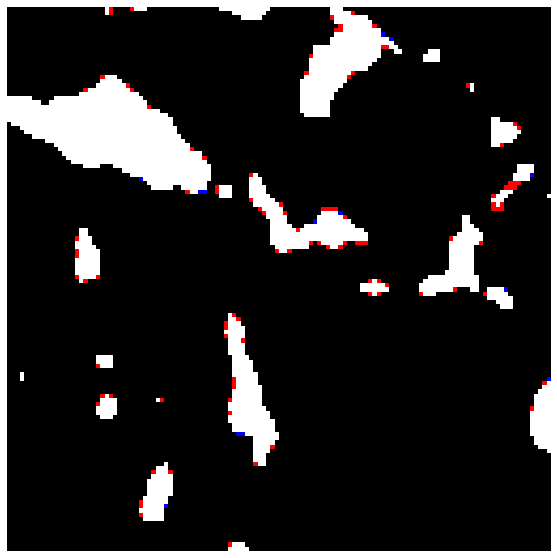

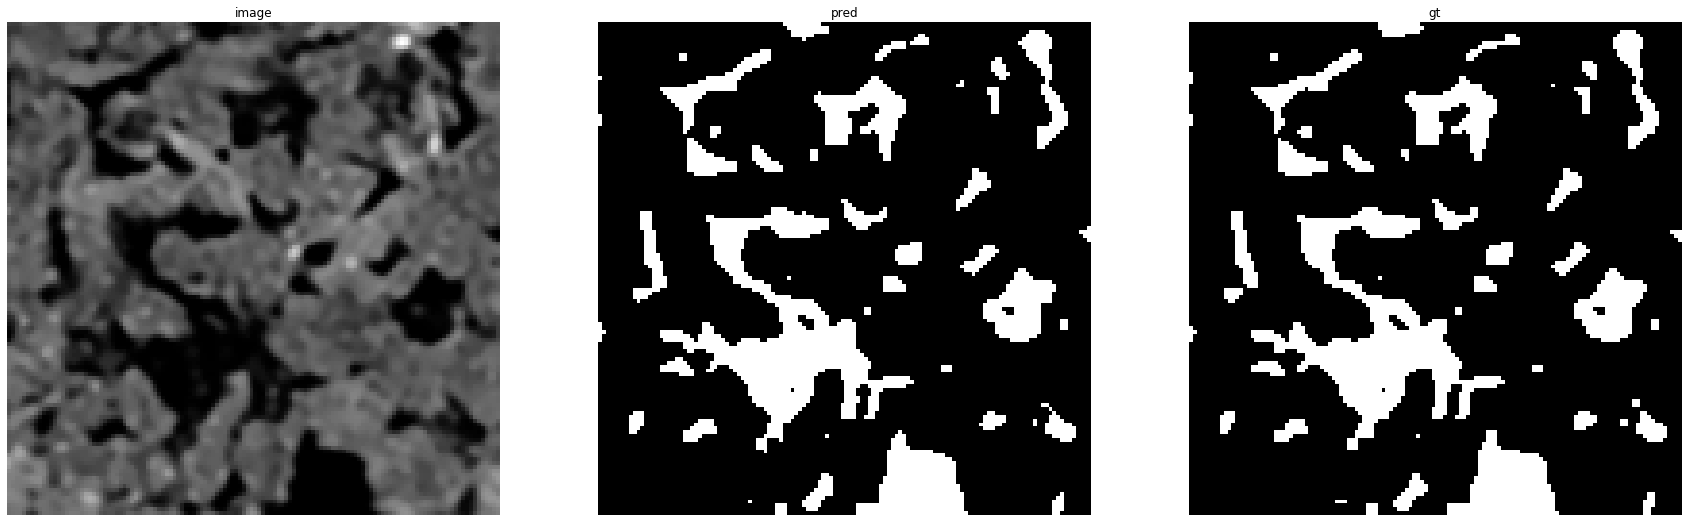

accuracy    : 0.9921875
precision   : 0.9786368260427264
recall      : 0.9779735682819384
f1          : 0.9783050847457627
pr_auc      : 0.9982698906989037
iou         : 0.9575315195753152


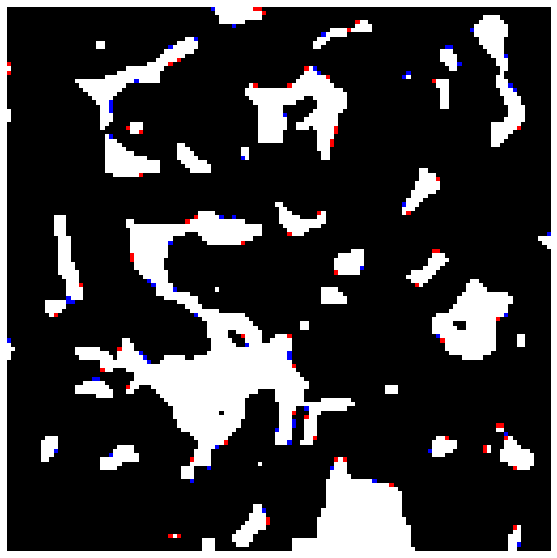

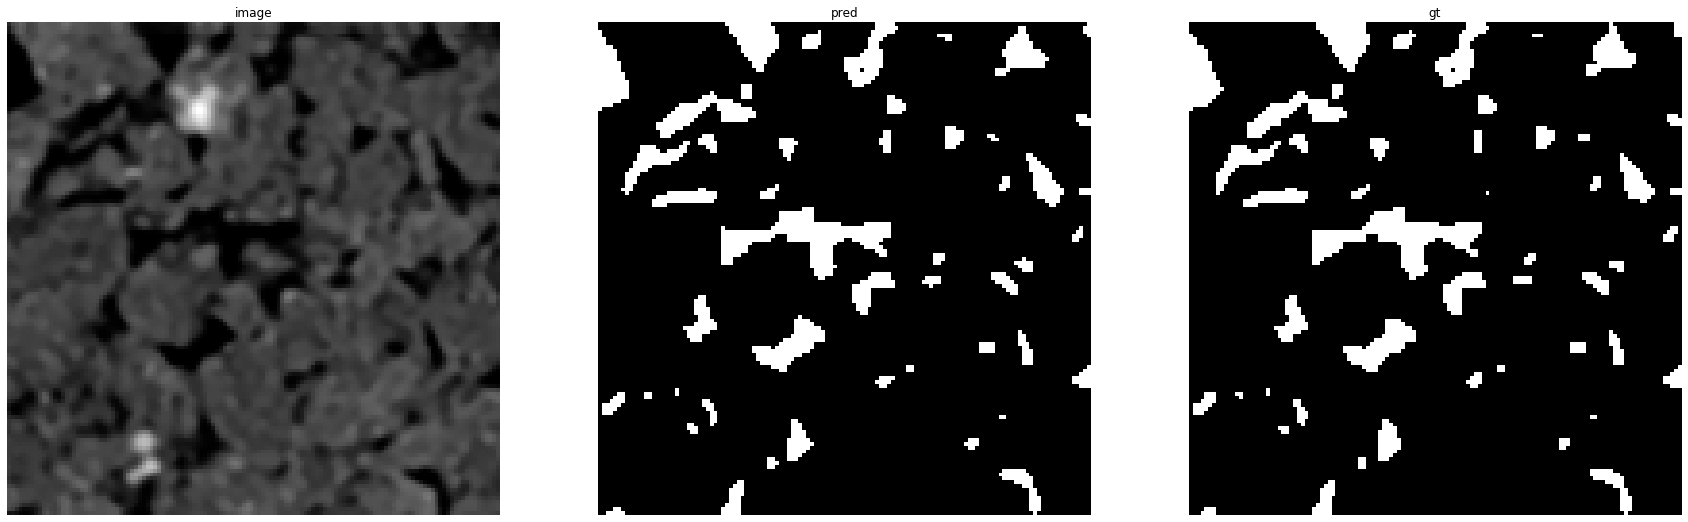

accuracy    : 0.99334716796875
precision   : 0.9700395703787451
recall      : 0.9683972911963883
f1          : 0.9692177351030784
pr_auc      : 0.9969132245834631
iou         : 0.9402739726027397


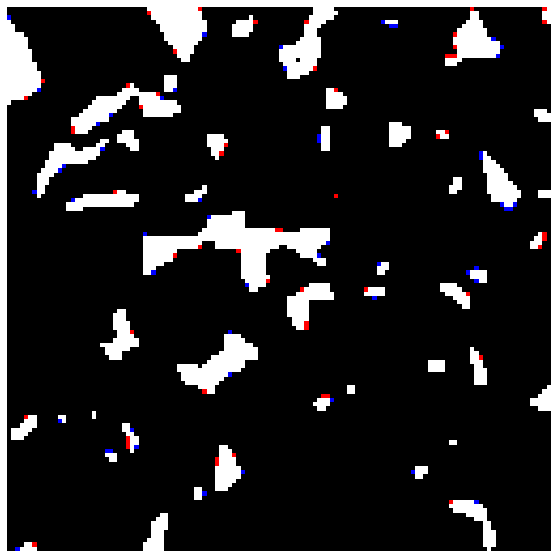

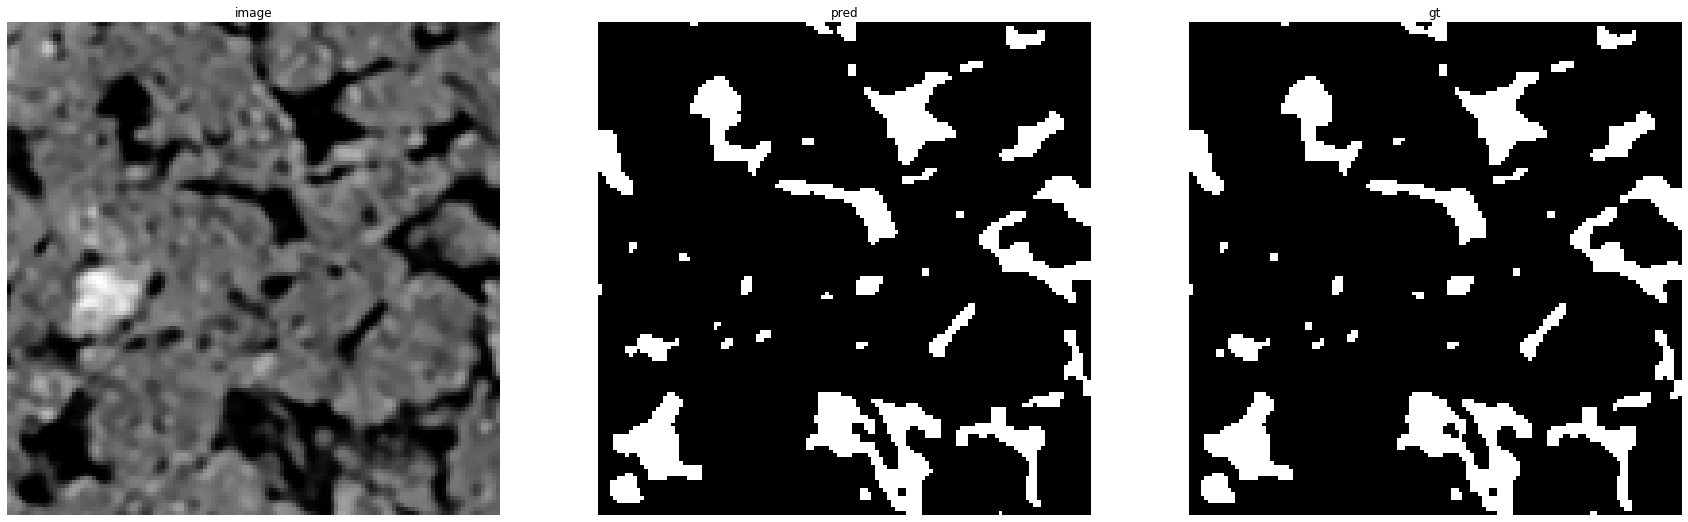

accuracy    : 0.9927978515625
precision   : 0.9803921568627451
recall      : 0.97165991902834
f1          : 0.9760065067100446
pr_auc      : 0.9981652893309592
iou         : 0.9531374106433678


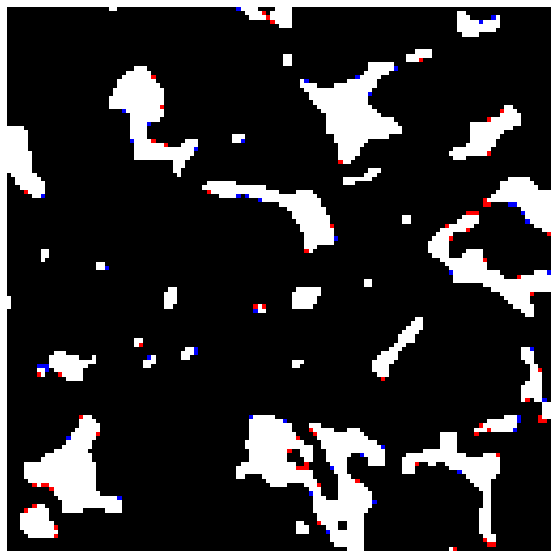

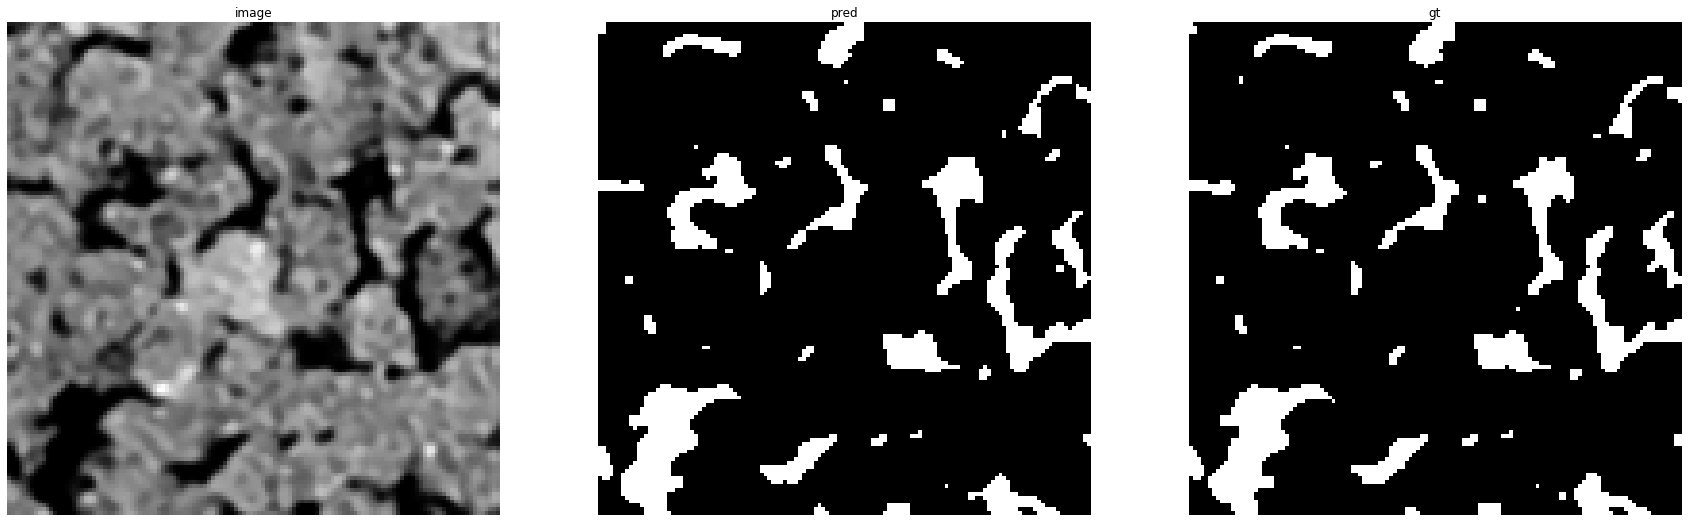

accuracy    : 0.9921875
precision   : 0.9708958617553434
recall      : 0.9708958617553434
f1          : 0.9708958617553434
pr_auc      : 0.9971708965238404
iou         : 0.9434379142730889


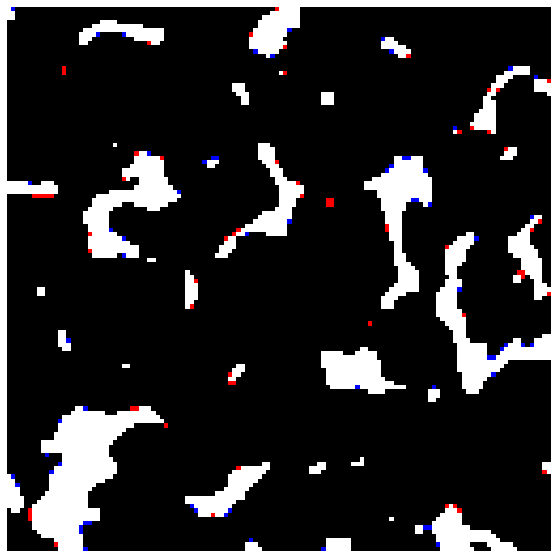

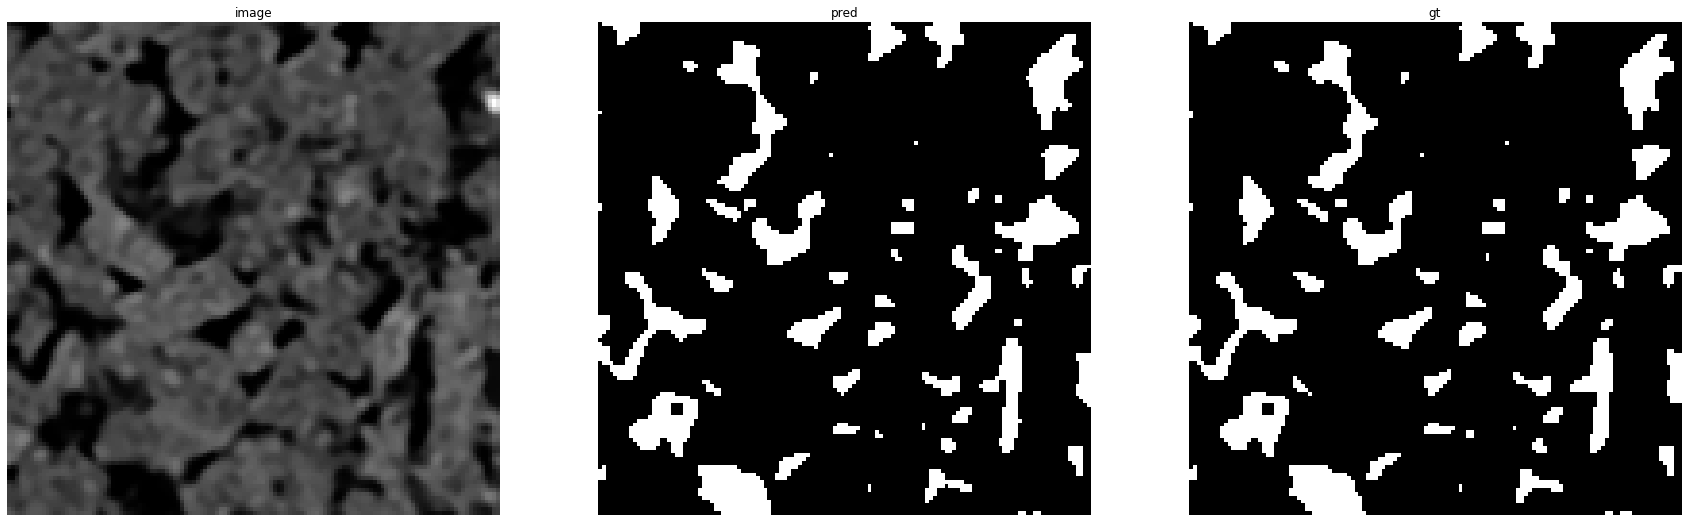

accuracy    : 0.99151611328125
precision   : 0.9739561802397685
recall      : 0.96875
f1          : 0.9713461142032571
pr_auc      : 0.9973266669170718
iou         : 0.9442885771543086


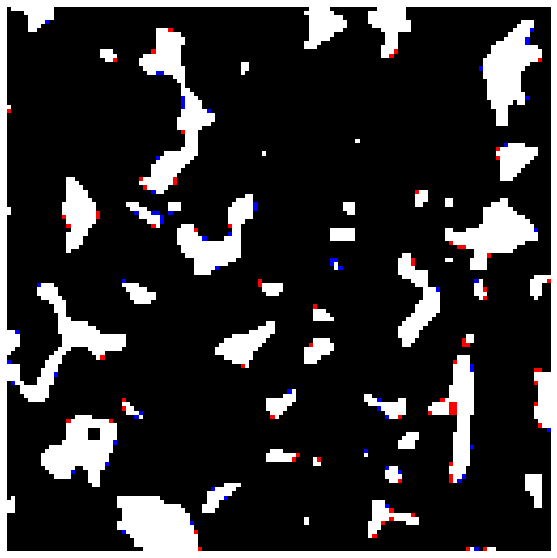

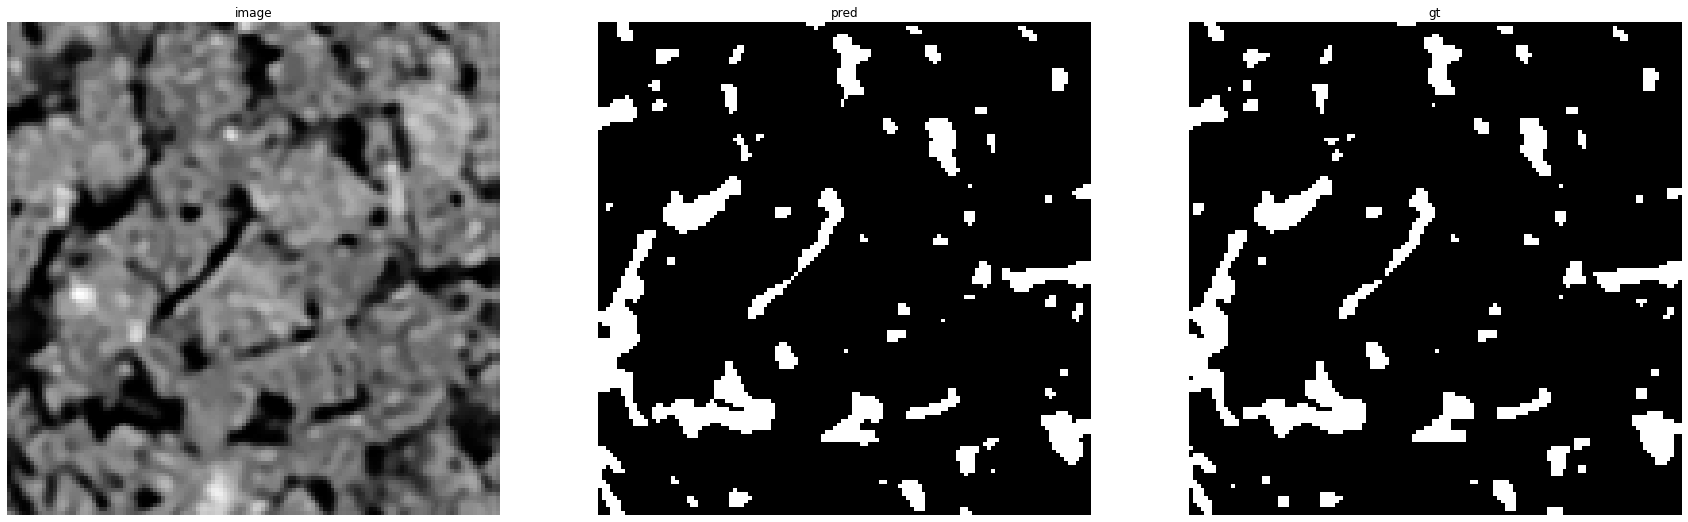

accuracy    : 0.989013671875
precision   : 0.945417095777549
recall      : 0.9612565445026178
f1          : 0.9532710280373832
pr_auc      : 0.9936861688019306
iou         : 0.9107142857142857


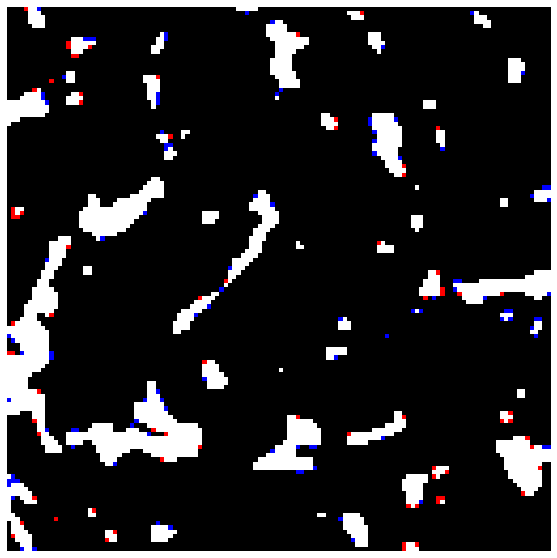

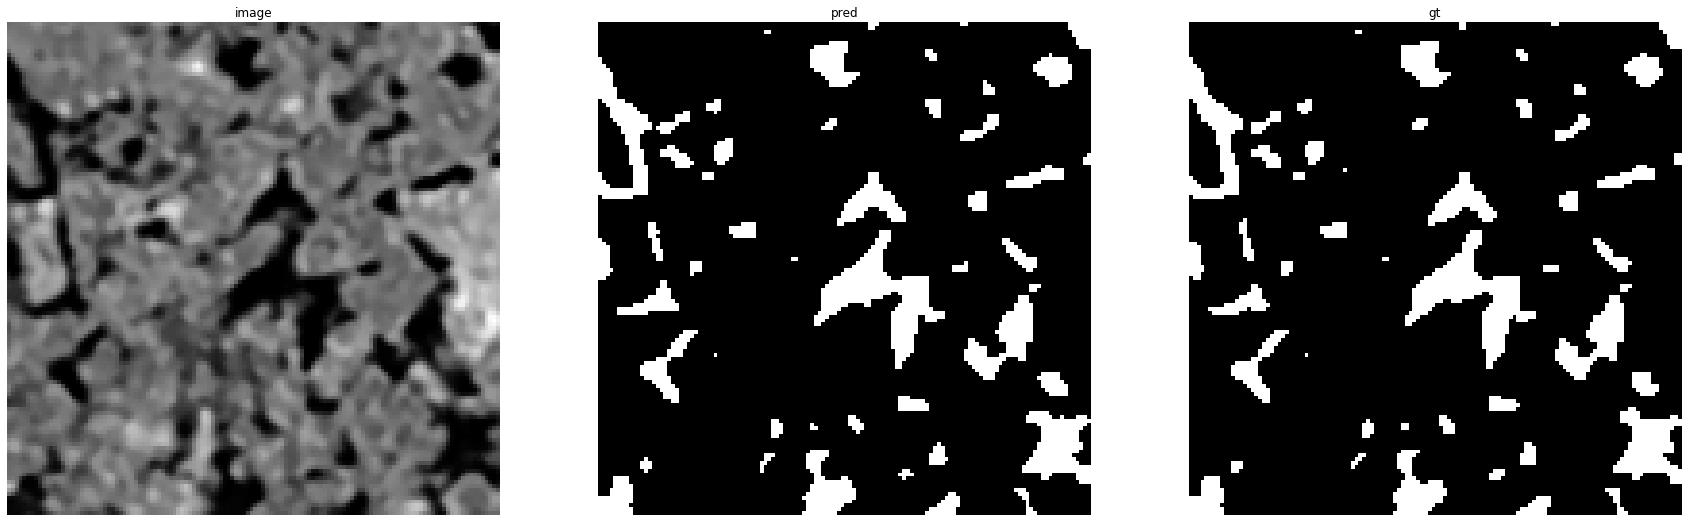

accuracy    : 0.9921875
precision   : 0.9680365296803652
recall      : 0.9733700642791552
f1          : 0.9706959706959707
pr_auc      : 0.9973941255662178
iou         : 0.9430604982206405


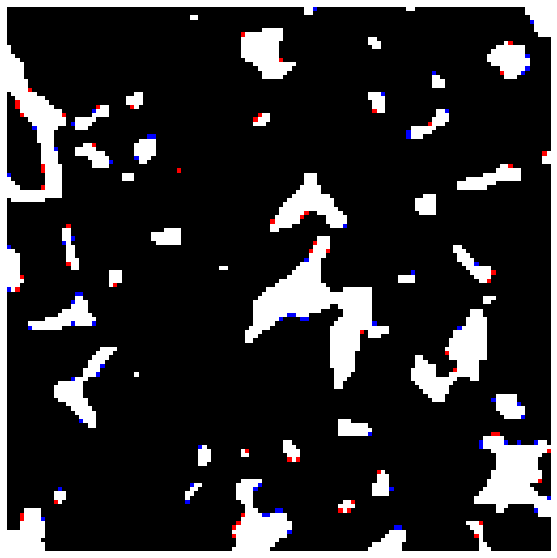

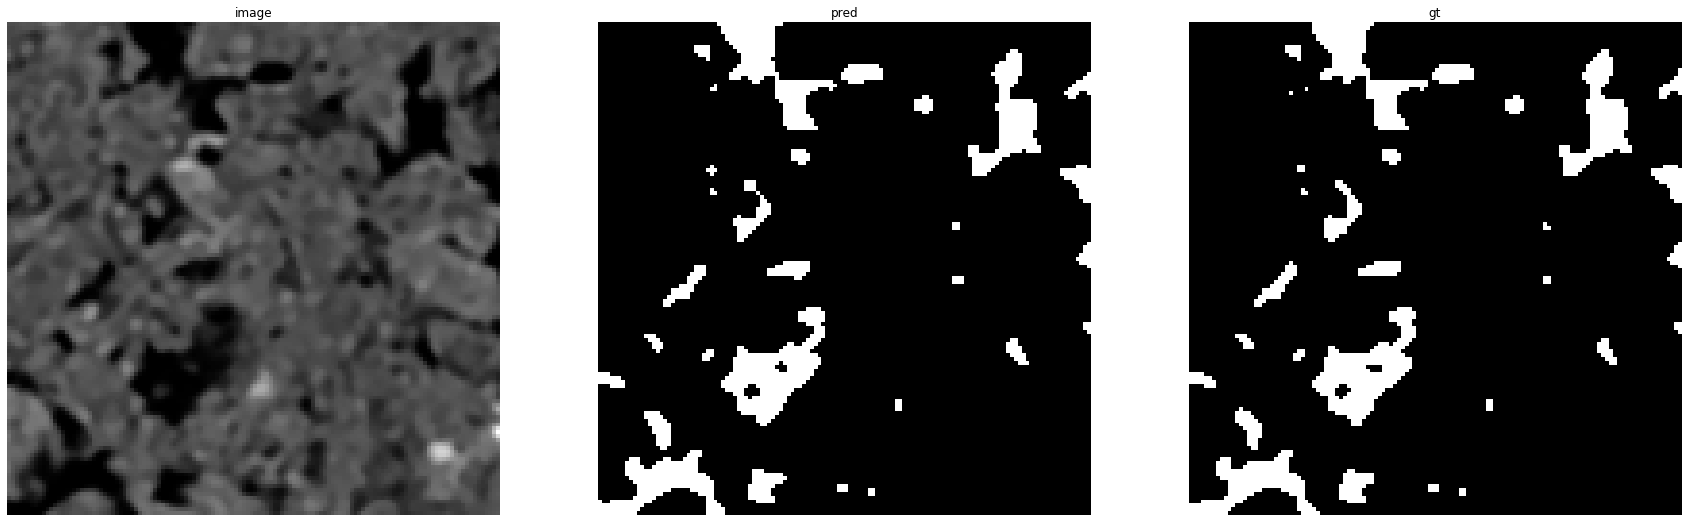

accuracy    : 0.99481201171875
precision   : 0.9729891956782714
recall      : 0.9759181216134859
f1          : 0.9744514577697625
pr_auc      : 0.9979016887299725
iou         : 0.9501758499413834


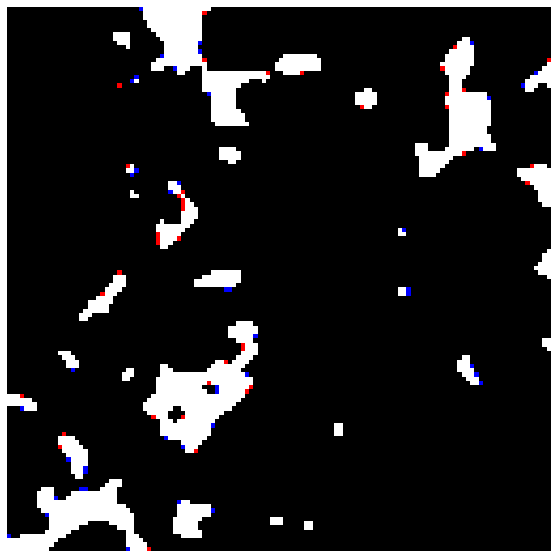

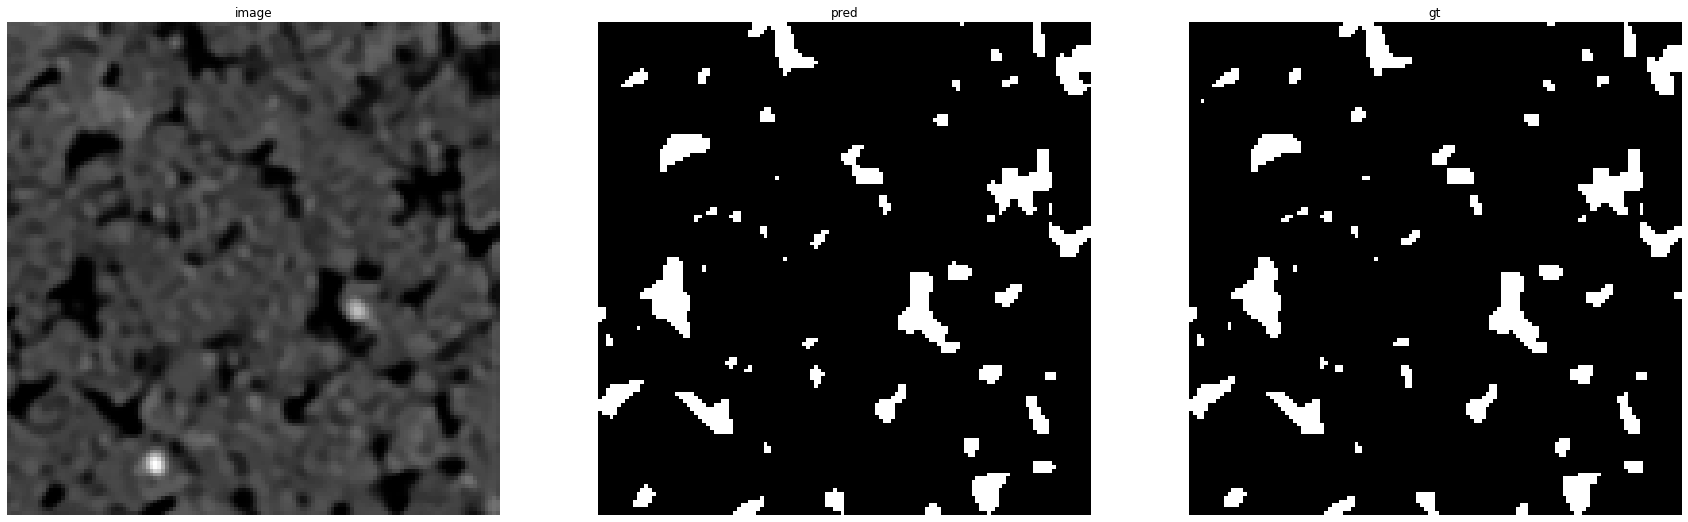

accuracy    : 0.9931640625
precision   : 0.9646079111727967
recall      : 0.957960027567195
f1          : 0.9612724757952974
pr_auc      : 0.9958468819331207
iou         : 0.9254327563249002


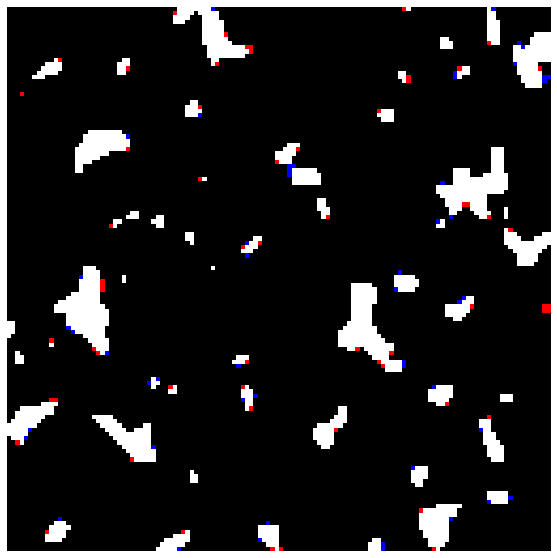

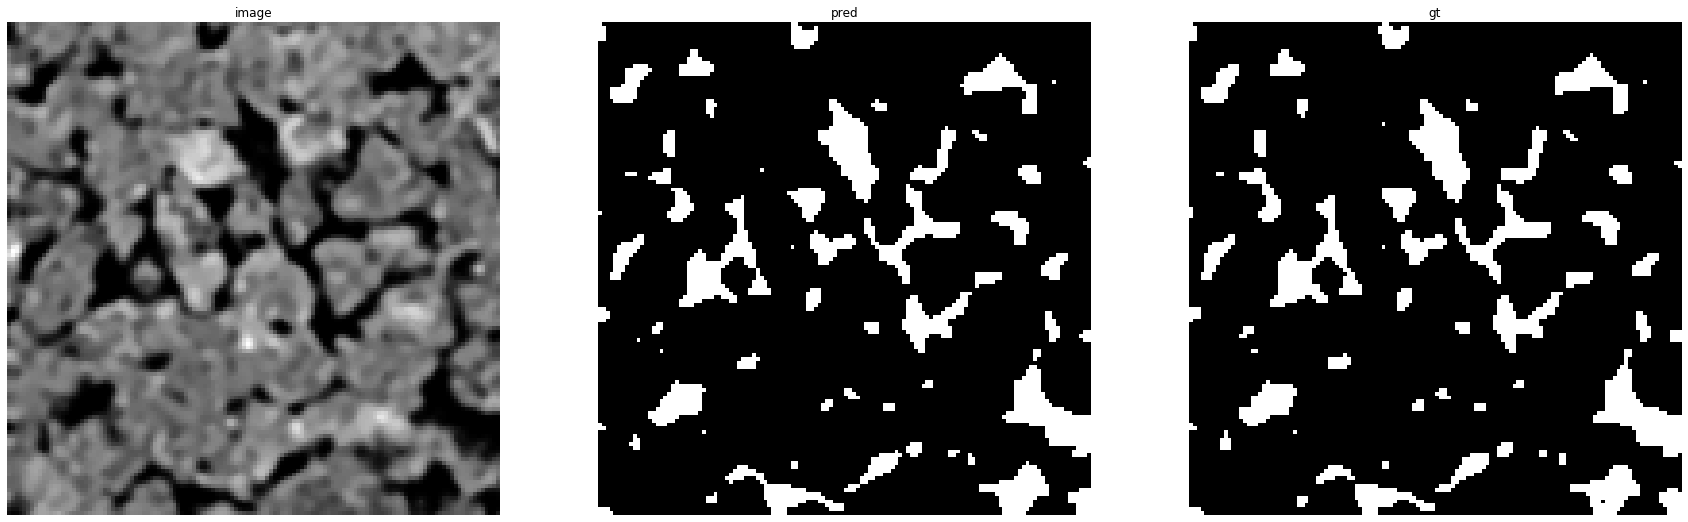

accuracy    : 0.99127197265625
precision   : 0.9766416923754958
recall      : 0.9609713790112749
f1          : 0.968743169398907
pr_auc      : 0.9973133214643739
iou         : 0.9393810936837643


Prediction for Urna_30:


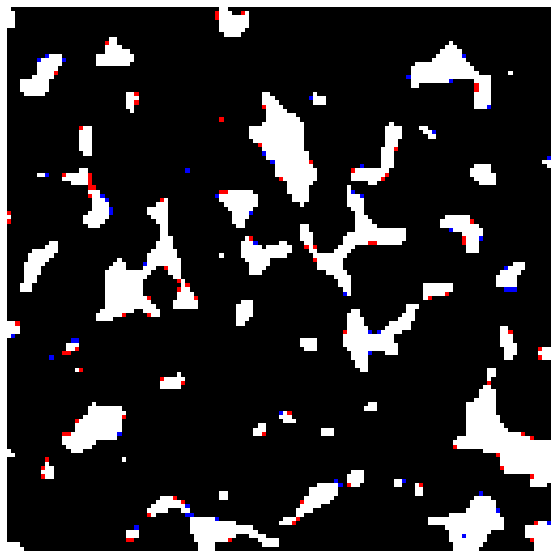

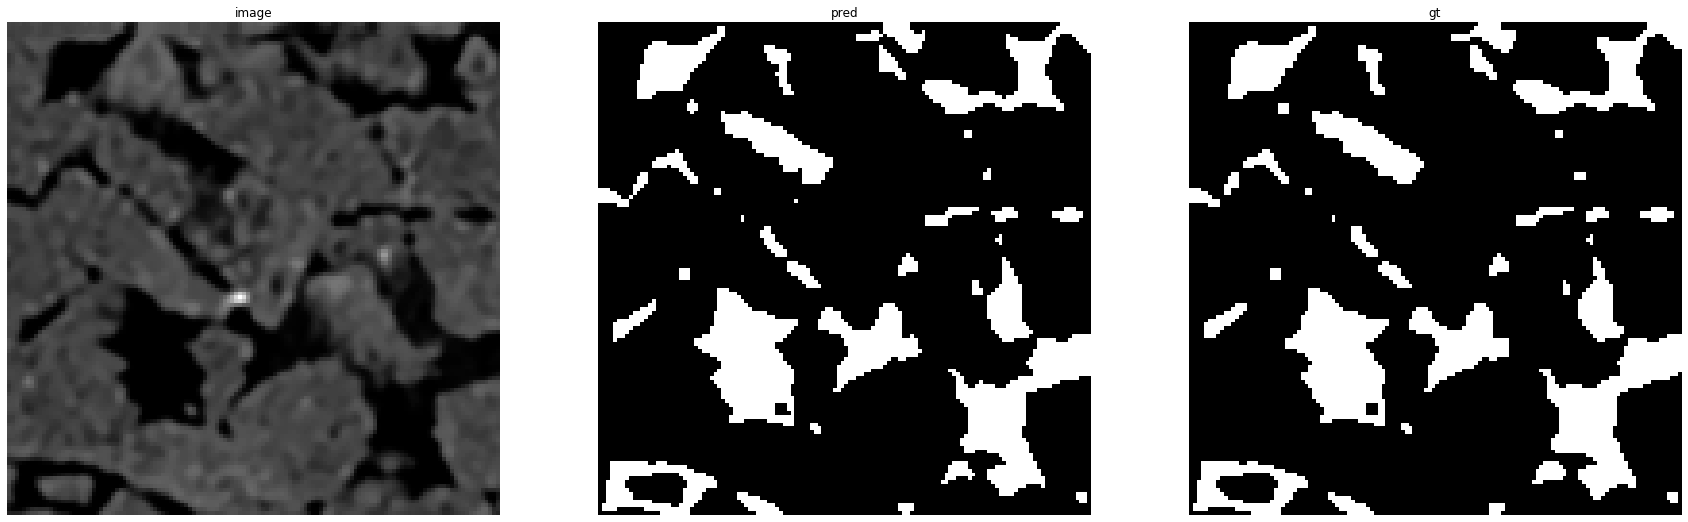

accuracy    : 0.9912109375
precision   : 0.98208
recall      : 0.9721254355400697
f1          : 0.977077363896848
pr_auc      : 0.9984831954946027
iou         : 0.9551820728291317


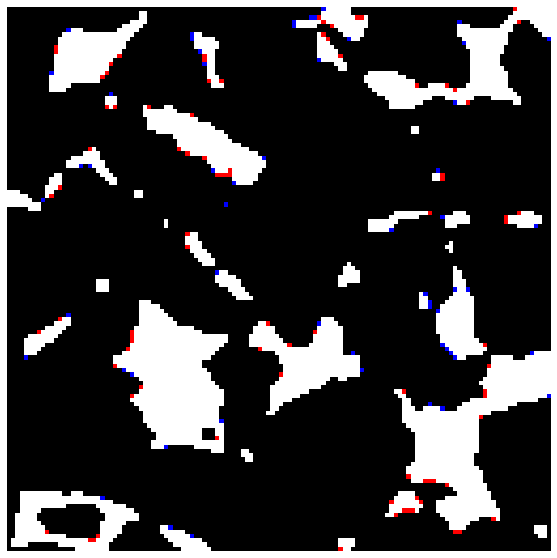

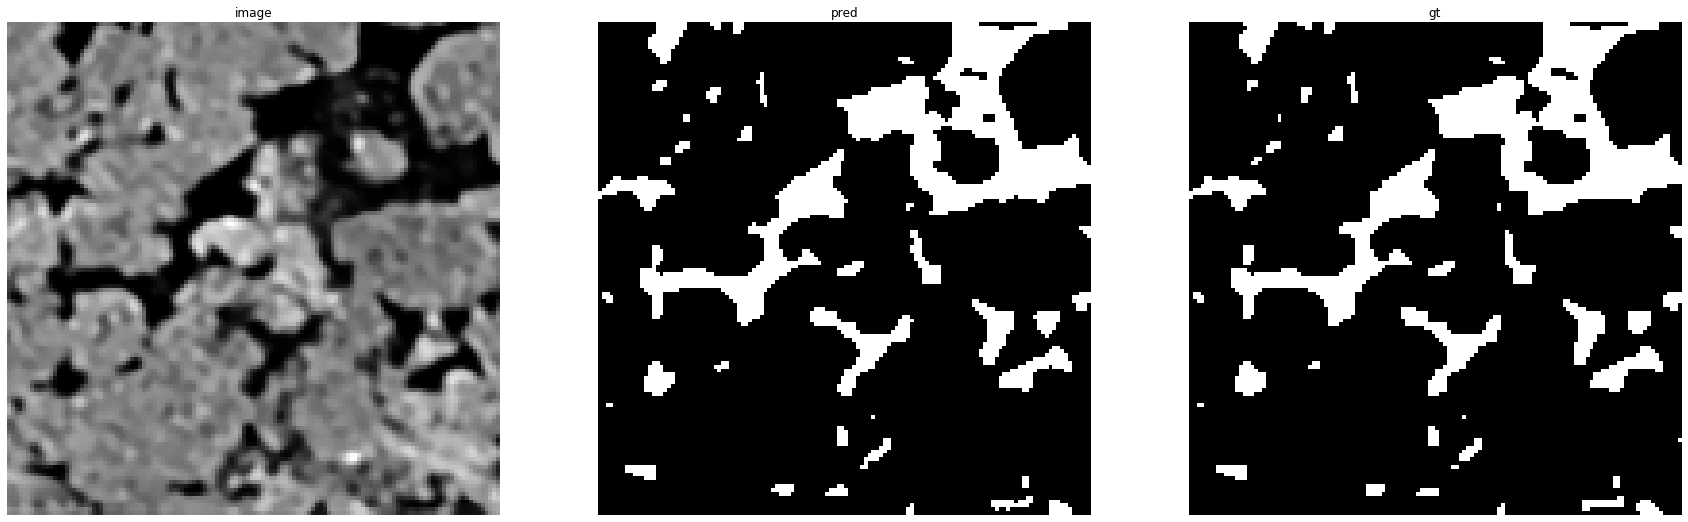

accuracy    : 0.98980712890625
precision   : 0.9727403156384505
recall      : 0.9675347841598287
f1          : 0.9701305669826508
pr_auc      : 0.9973382485375641
iou         : 0.9419937478291073


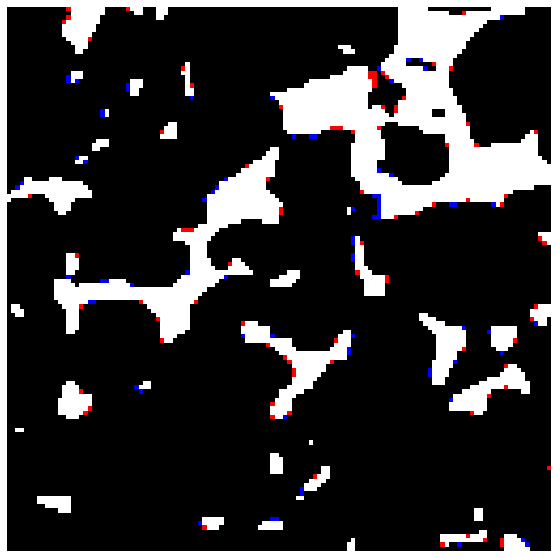

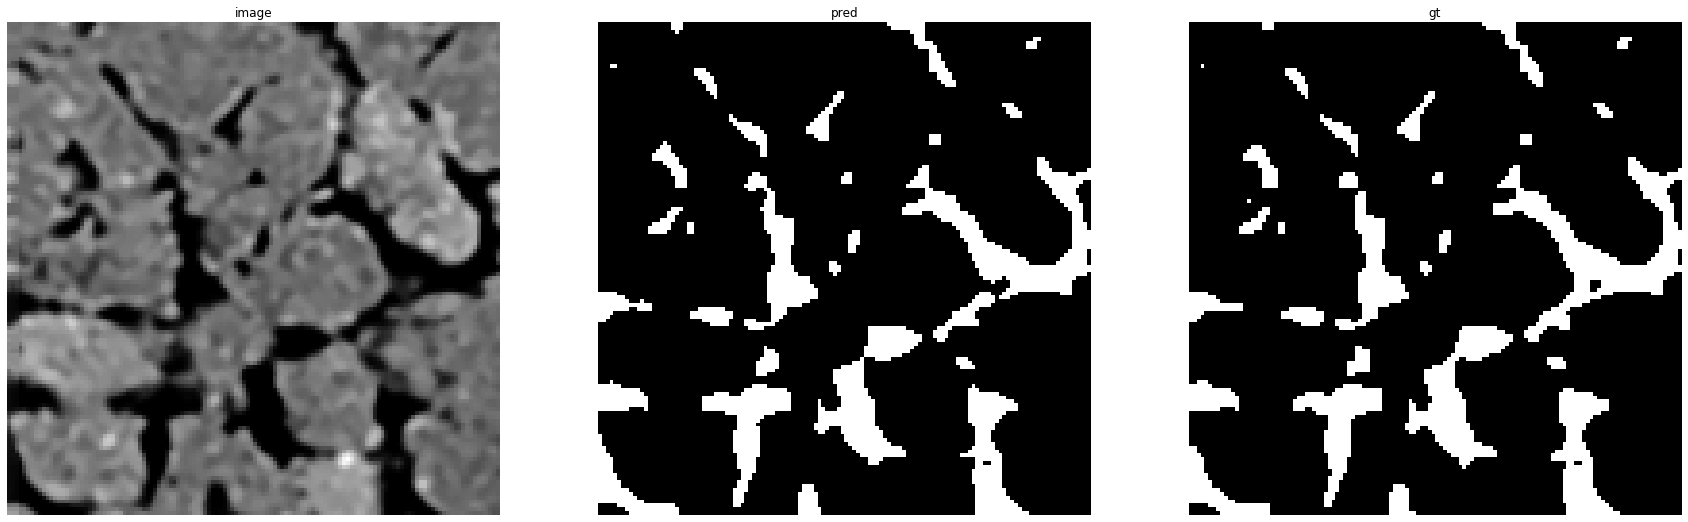

accuracy    : 0.99176025390625
precision   : 0.9818108326596605
recall      : 0.964271536323938
f1          : 0.9729621470058082
pr_auc      : 0.9979006172639002
iou         : 0.9473478939157566


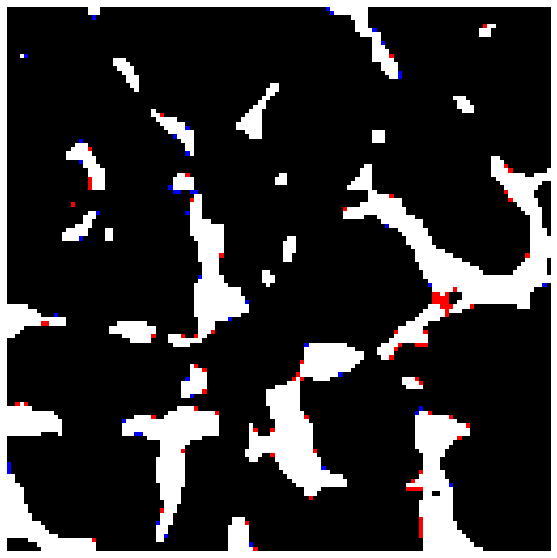

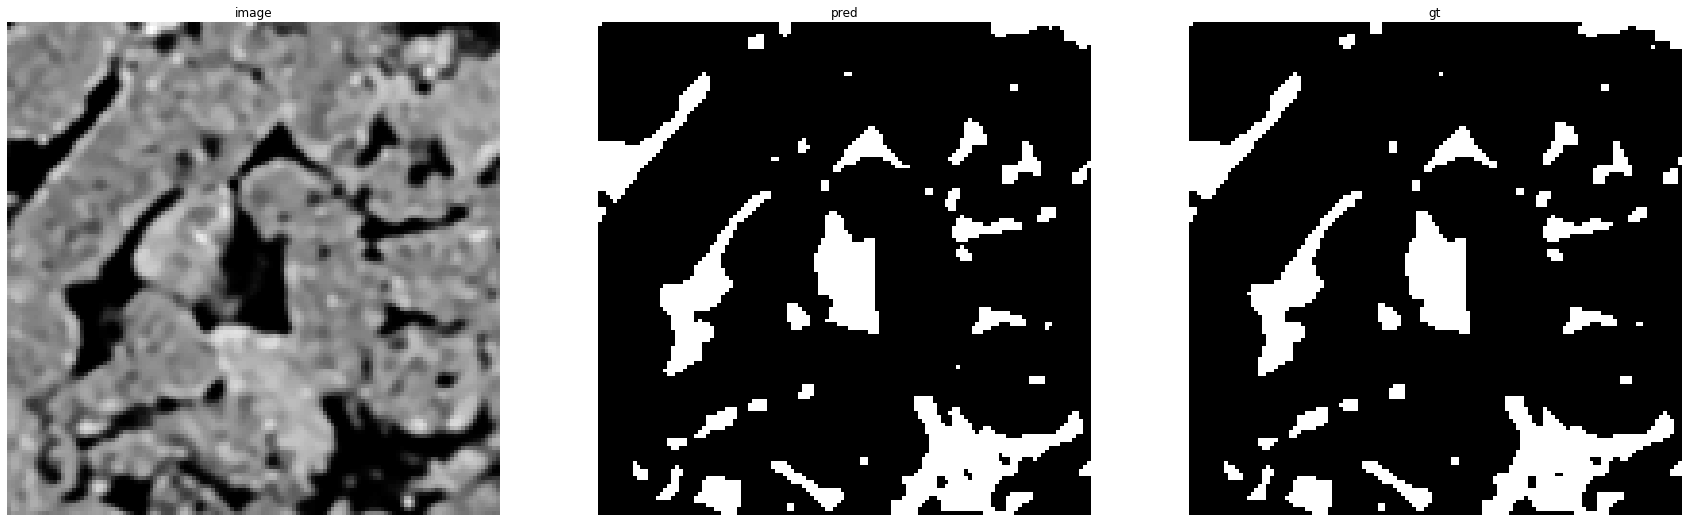

accuracy    : 0.99212646484375
precision   : 0.975229724330803
recall      : 0.9732854864433812
f1          : 0.9742566354021154
pr_auc      : 0.9981187805259492
iou         : 0.9498054474708171


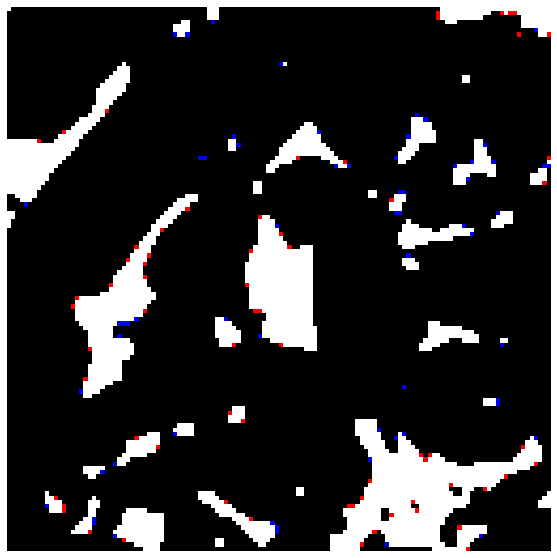

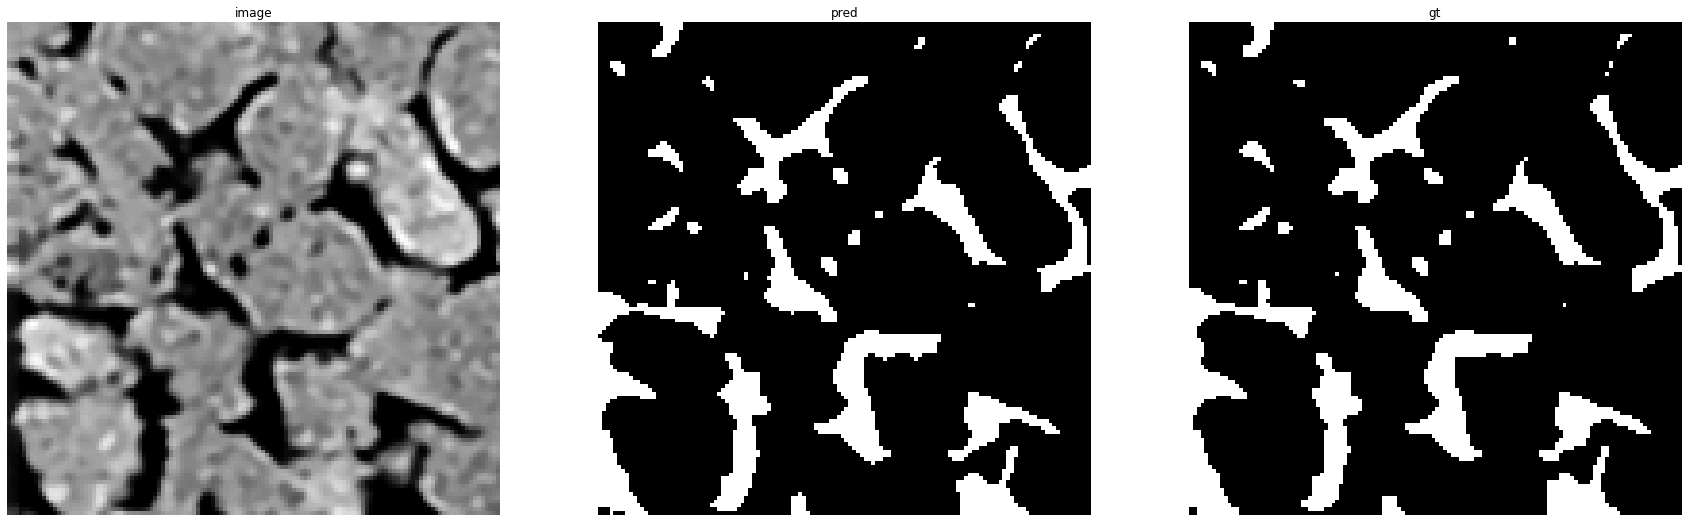

accuracy    : 0.99072265625
precision   : 0.9802936630602782
recall      : 0.9617134192570129
f1          : 0.9709146574818217
pr_auc      : 0.9978305998952723
iou         : 0.9434734101896616


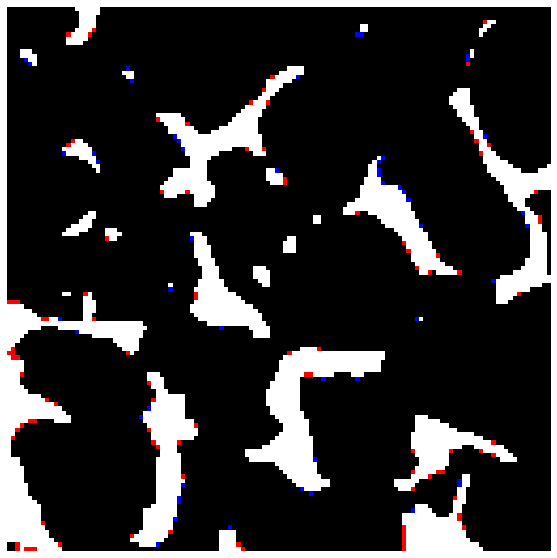

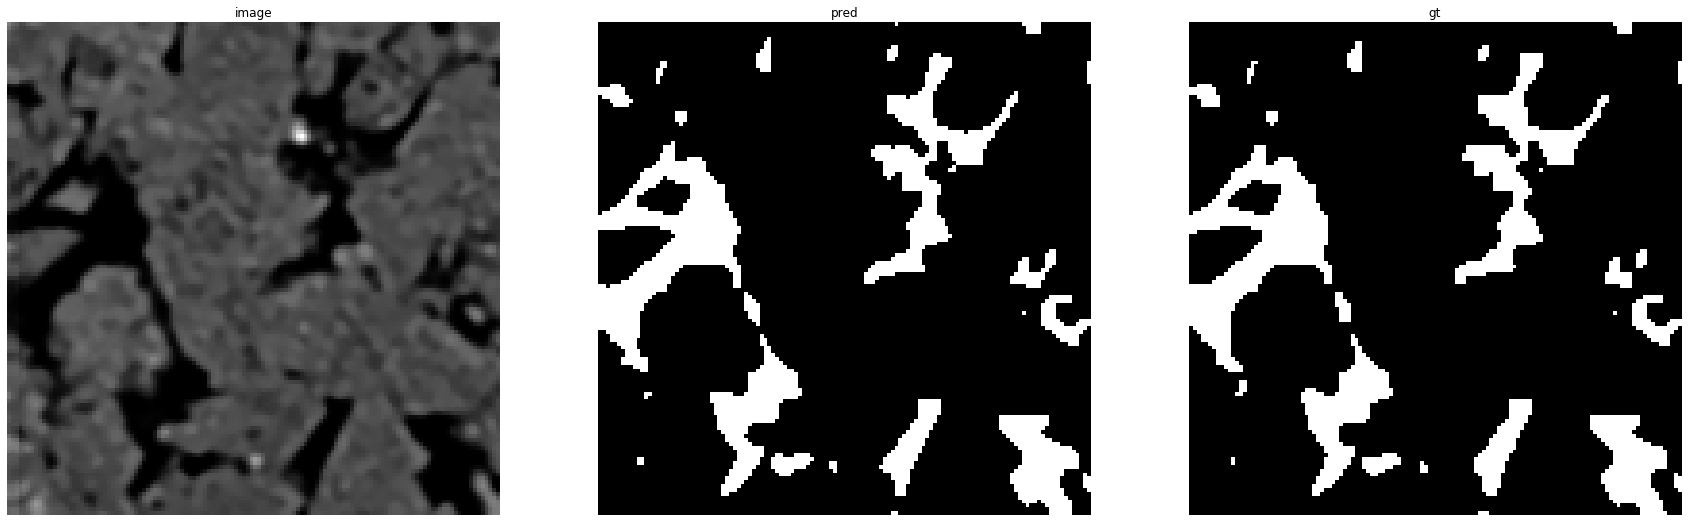

accuracy    : 0.991943359375
precision   : 0.9778879146016012
recall      : 0.9719590754073513
f1          : 0.9749144811858608
pr_auc      : 0.9980734732269444
iou         : 0.9510567296996663


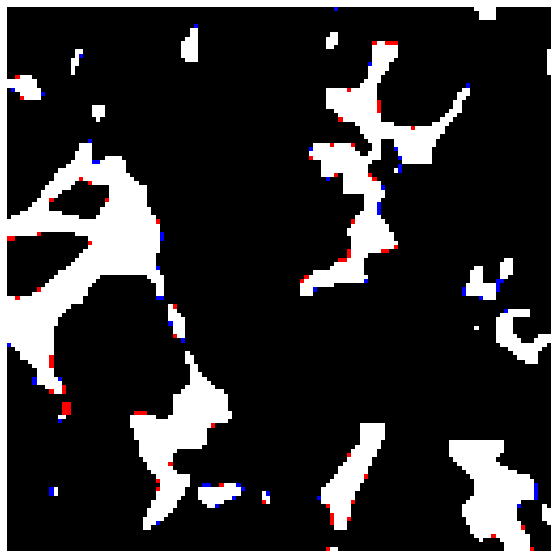

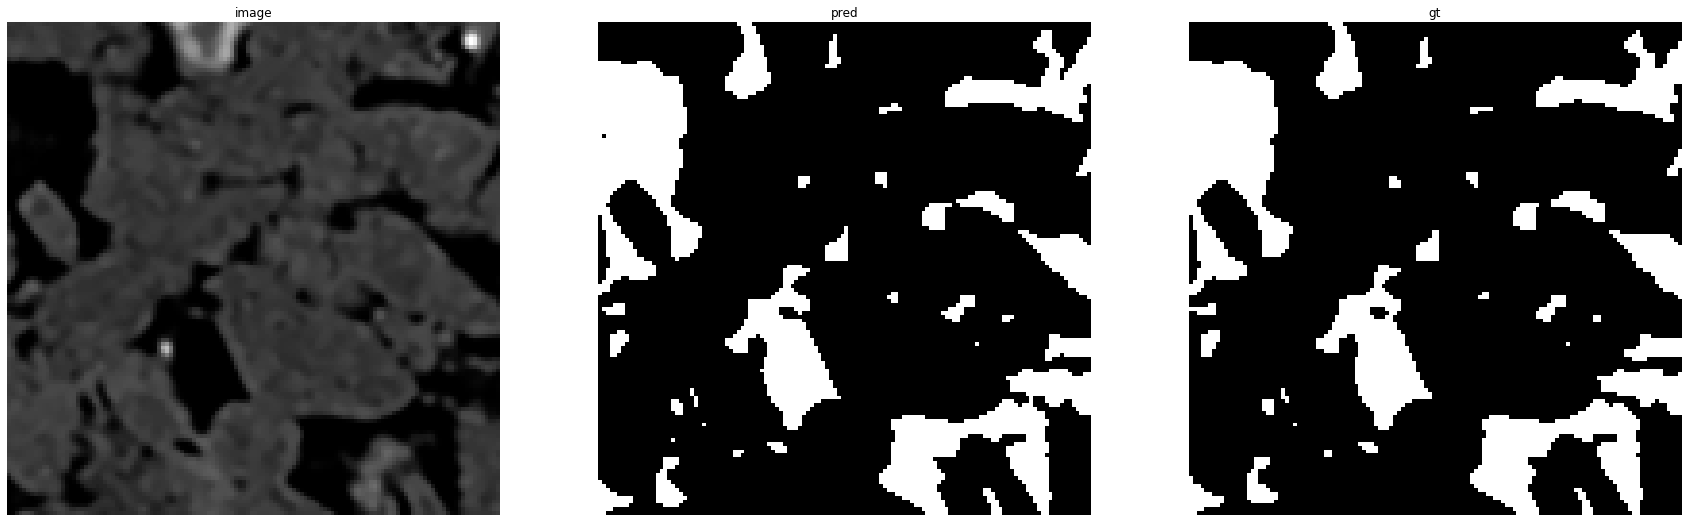

accuracy    : 0.9910888671875
precision   : 0.9829035062300783
recall      : 0.9749928140270192
f1          : 0.9789321789321789
pr_auc      : 0.9987997608353282
iou         : 0.9587337478801583


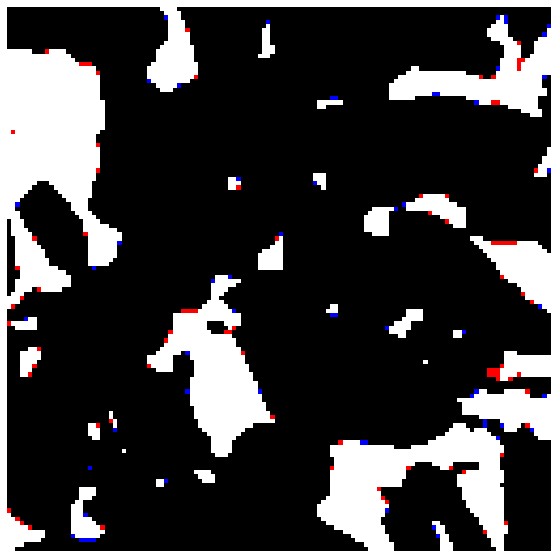

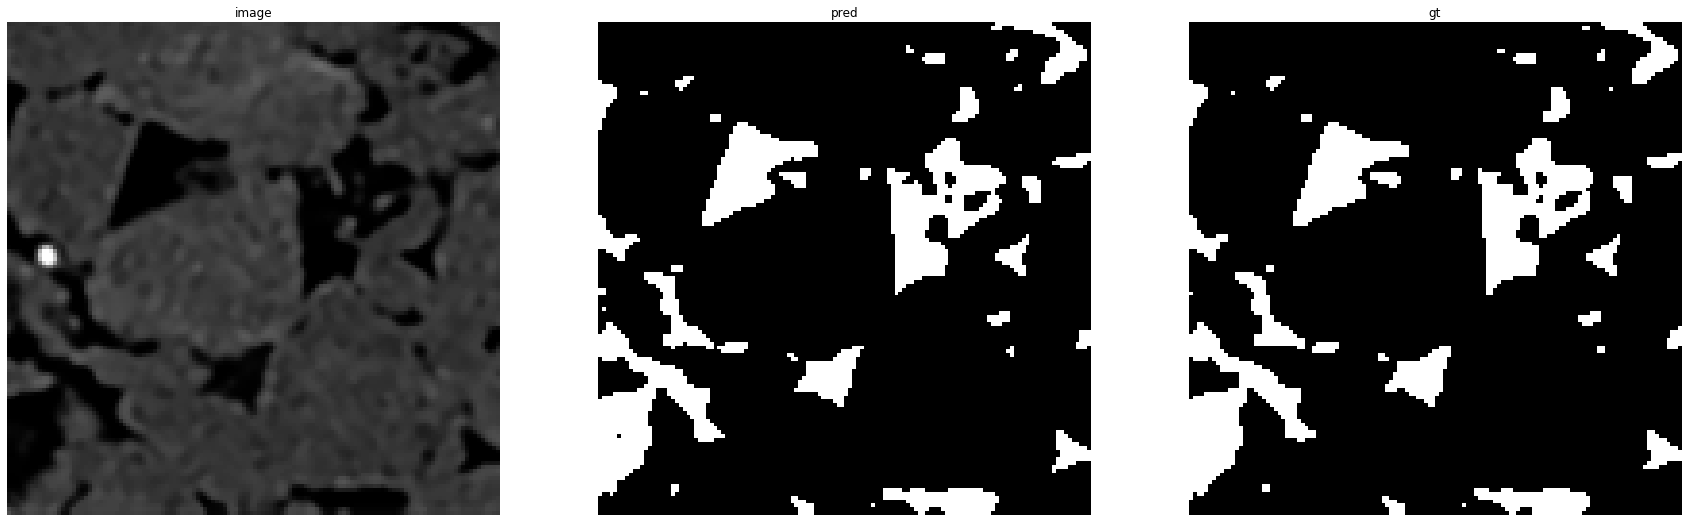

accuracy    : 0.99273681640625
precision   : 0.9755216693418941
recall      : 0.9766974688629972
f1          : 0.9761092150170648
pr_auc      : 0.9984416340149667
iou         : 0.9533333333333334


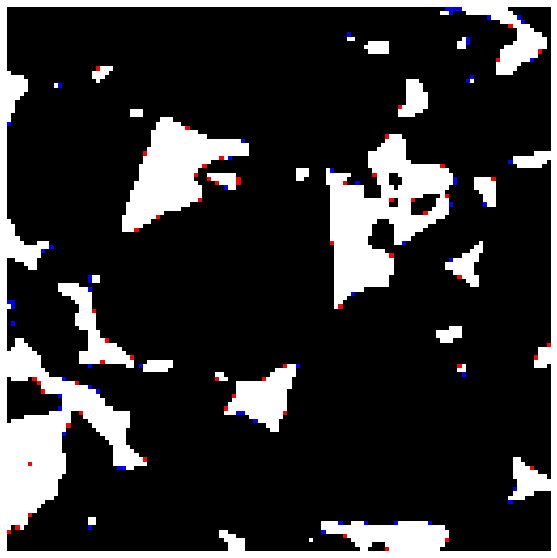

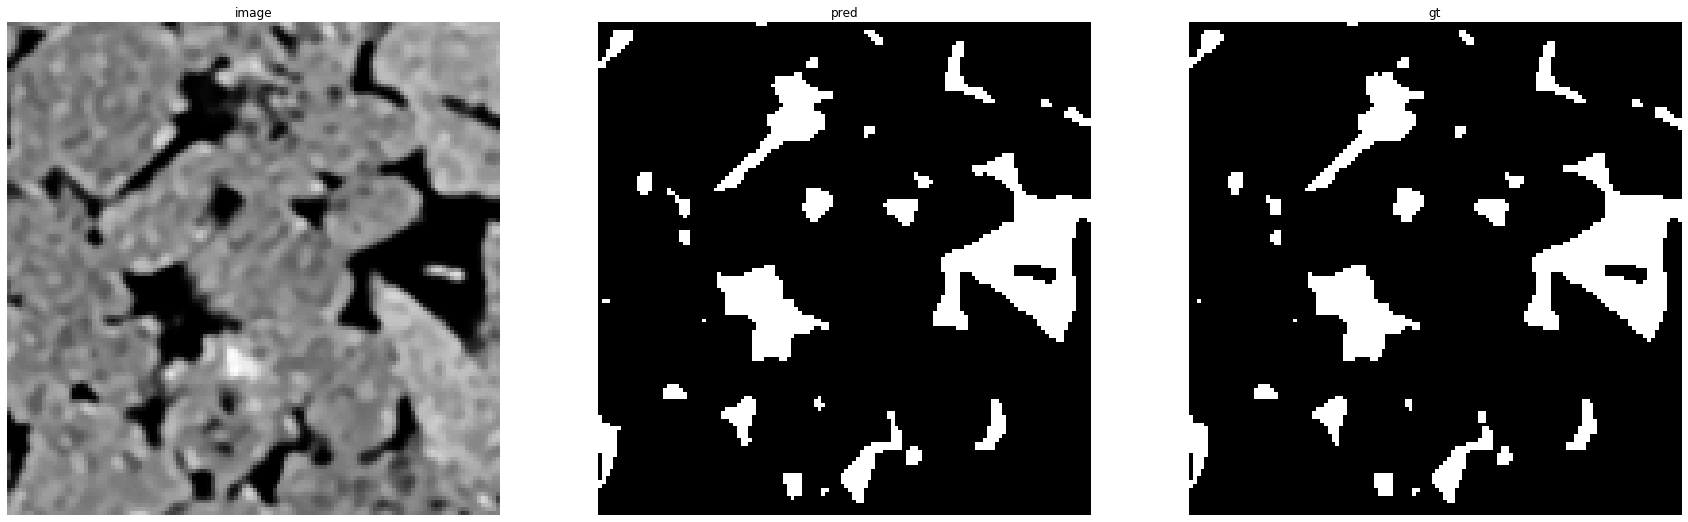

accuracy    : 0.9951171875
precision   : 0.9804378202142524
recall      : 0.9822678488100793
f1          : 0.9813519813519813
pr_auc      : 0.9988550674290151
iou         : 0.9633867276887872


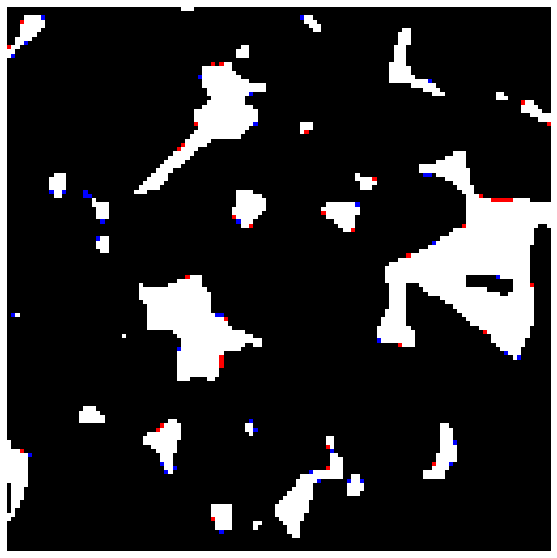

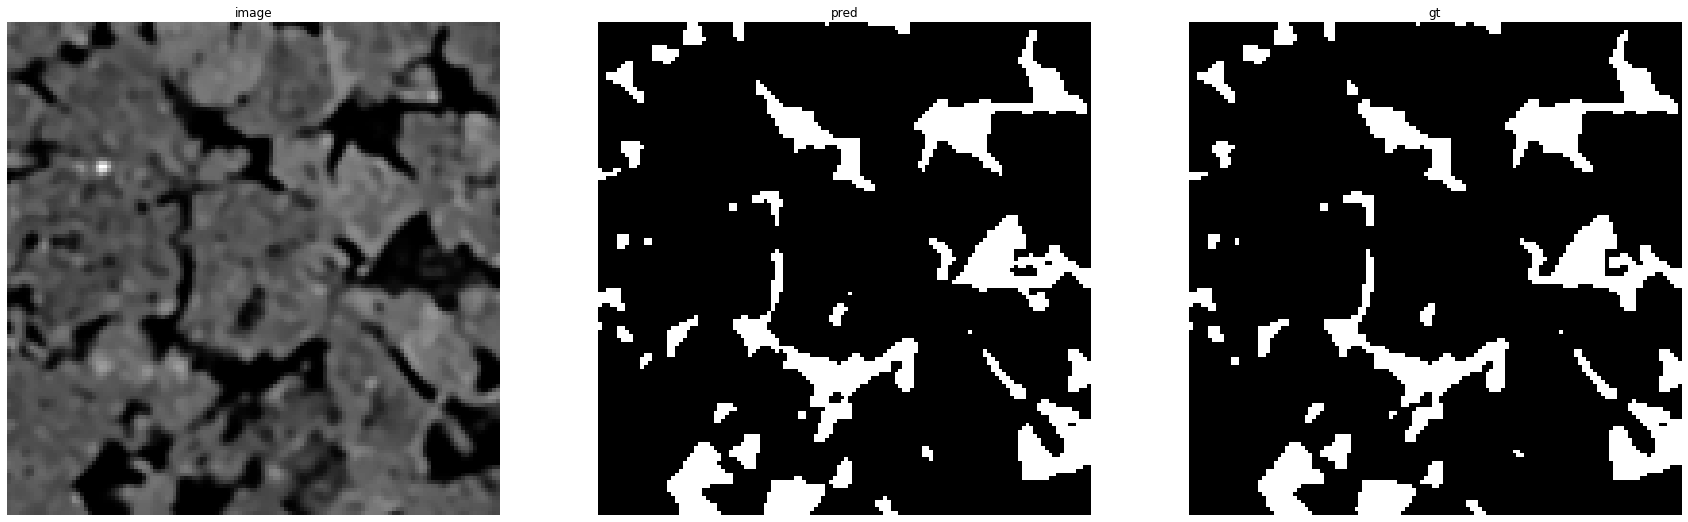

accuracy    : 0.9892578125
precision   : 0.958609918000781
recall      : 0.9722772277227723
f1          : 0.9653952025167126
pr_auc      : 0.9969162039054054
iou         : 0.9331052831622957


Prediction for Urna_34:


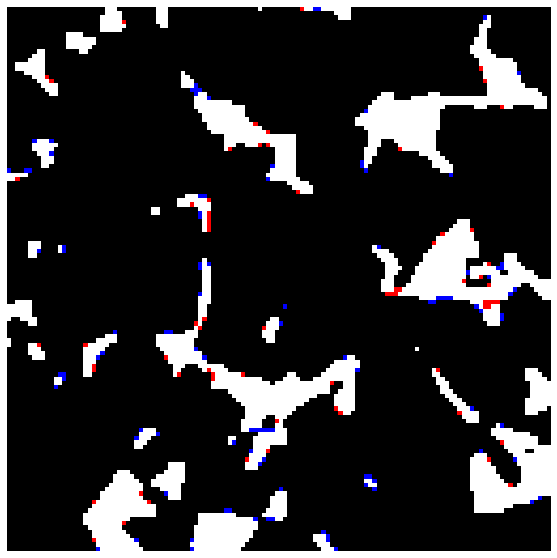

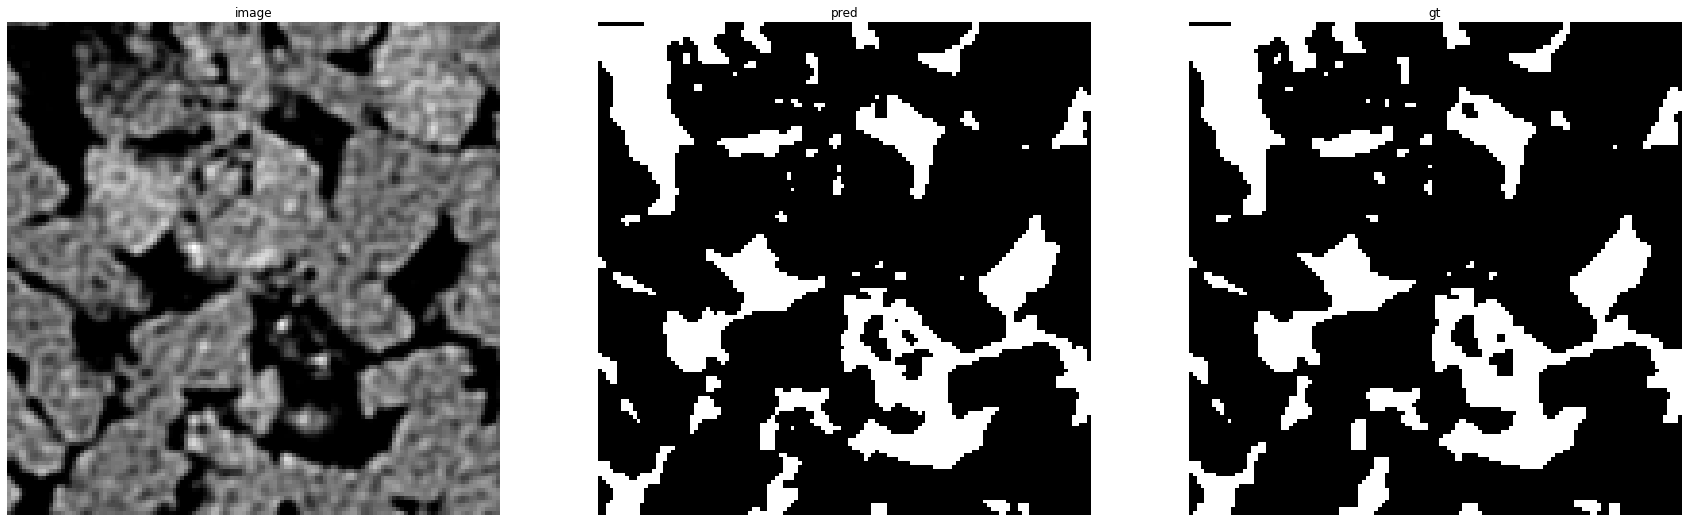

accuracy    : 0.9818115234375
precision   : 0.9719626168224299
recall      : 0.9517031011692934
f1          : 0.9617261751862317
pr_auc      : 0.9958705562037518
iou         : 0.9262741217219198


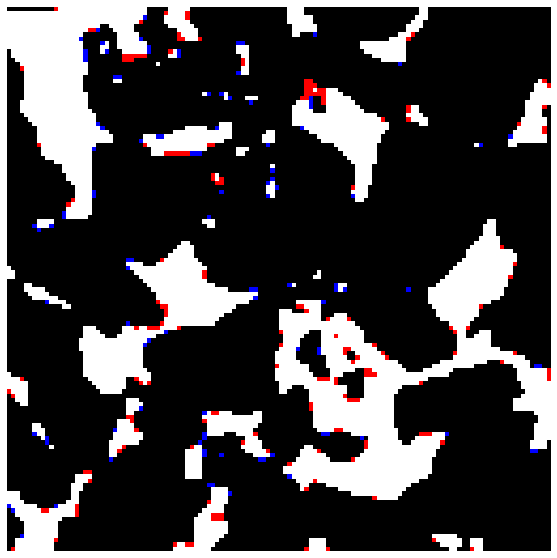

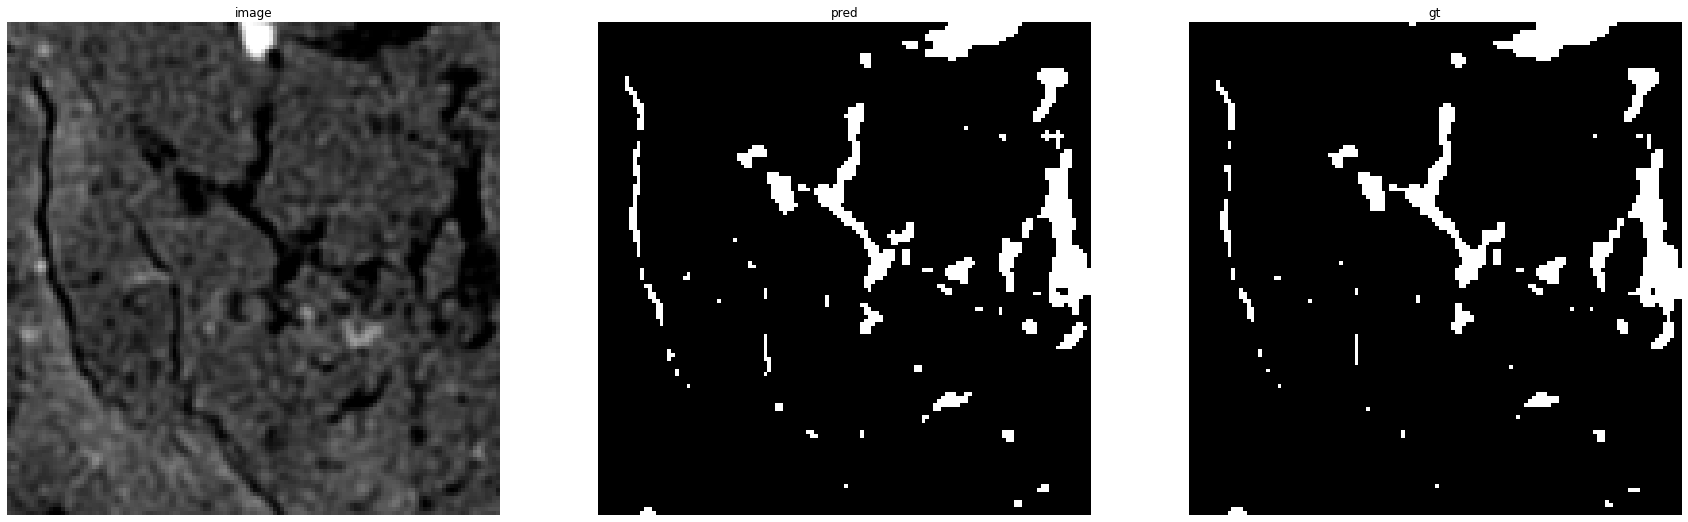

accuracy    : 0.98944091796875
precision   : 0.91996699669967
recall      : 0.9361880772460117
f1          : 0.9280066583437369
pr_auc      : 0.9859611079934477
iou         : 0.8656832298136646


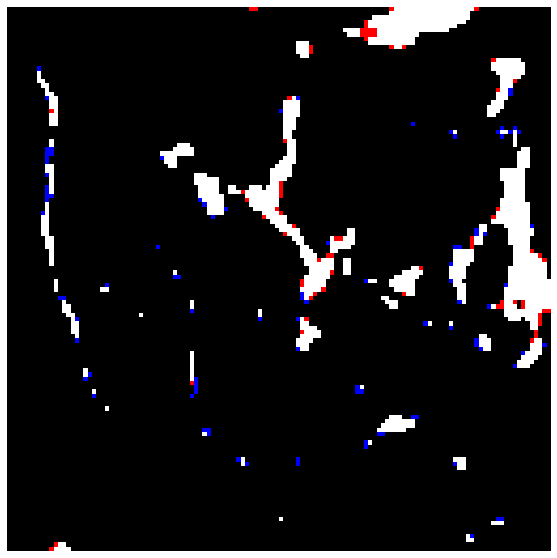

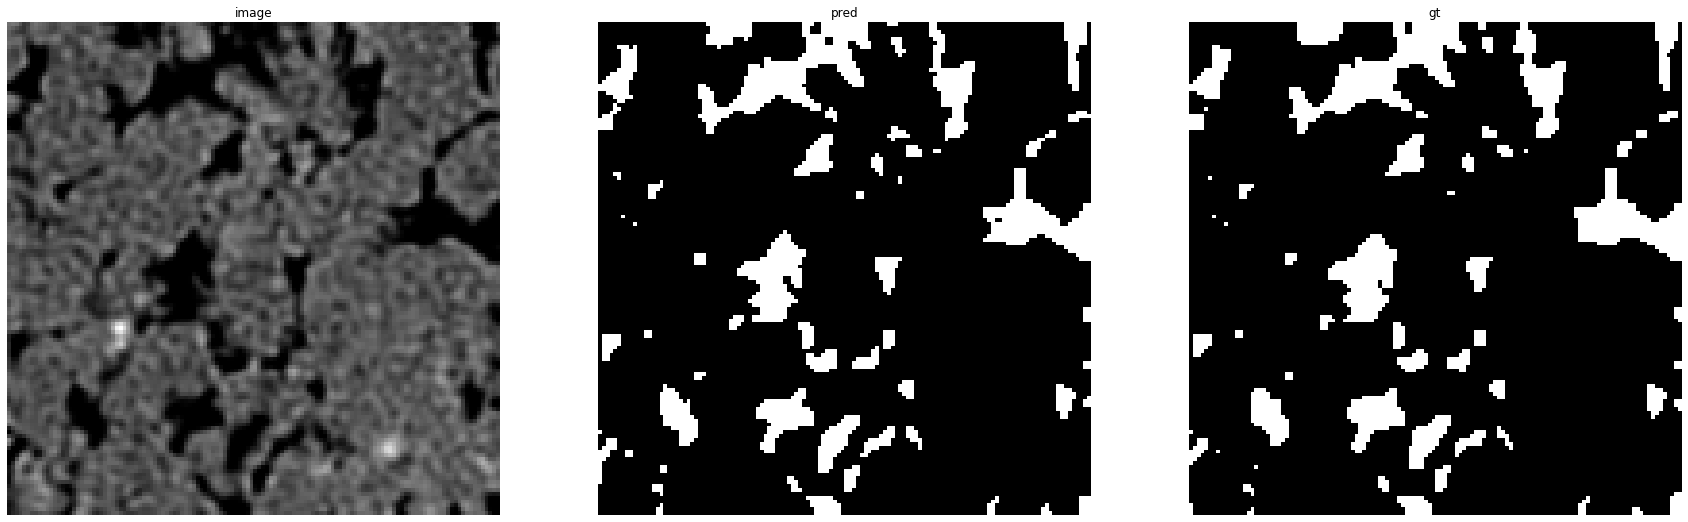

accuracy    : 0.98583984375
precision   : 0.9553492484526968
recall      : 0.9428446771378709
f1          : 0.9490557751427317
pr_auc      : 0.9932155820246082
iou         : 0.9030505641454242


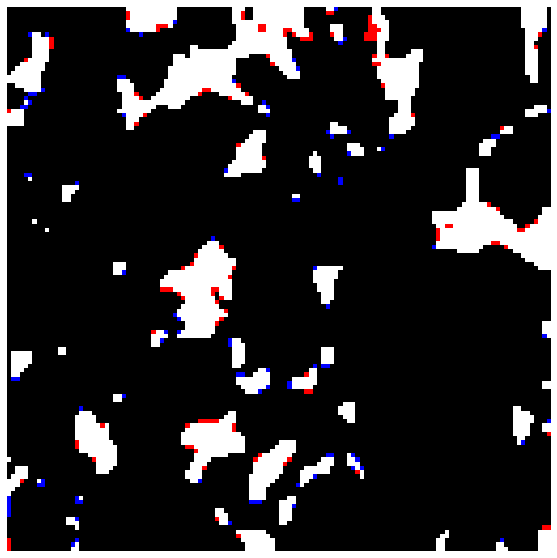

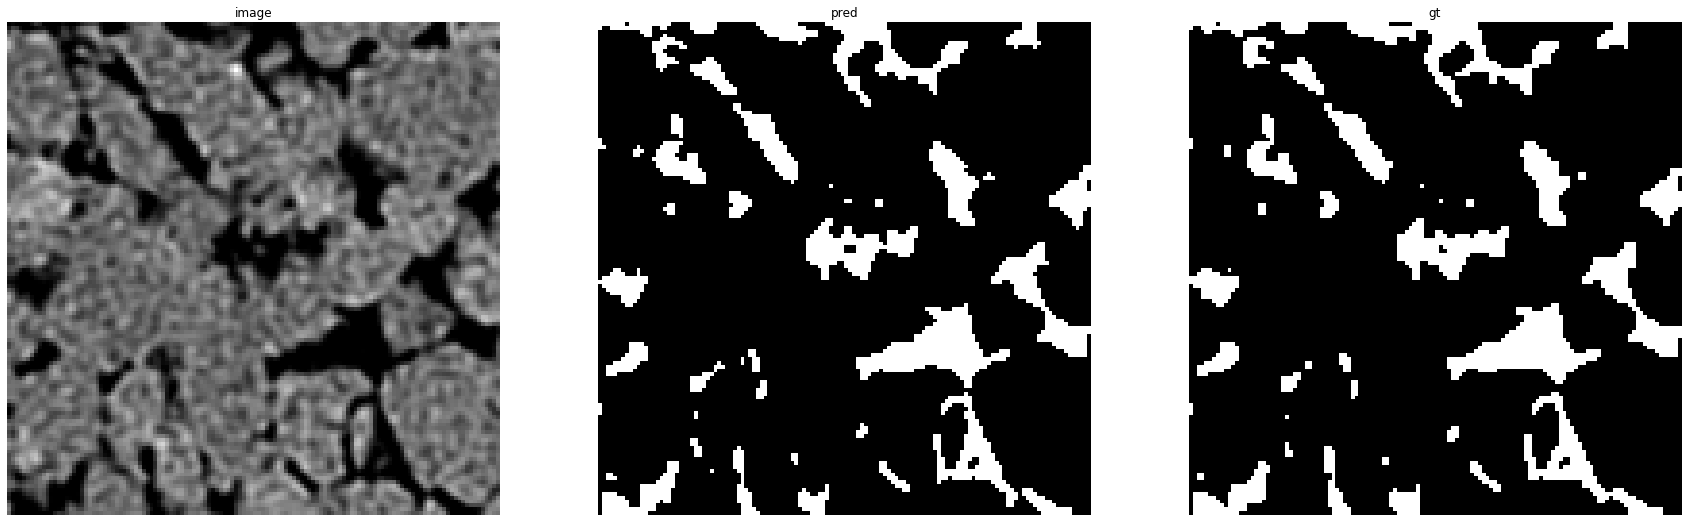

accuracy    : 0.983642578125
precision   : 0.9635270541082165
recall      : 0.9314219294846958
f1          : 0.9472025216706068
pr_auc      : 0.9926709896767607
iou         : 0.8997005988023952


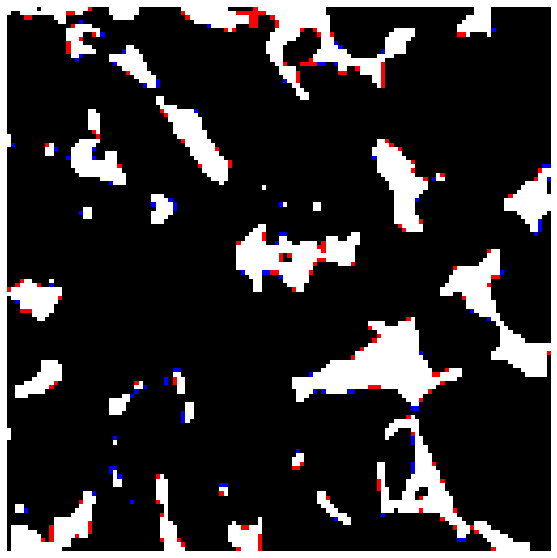

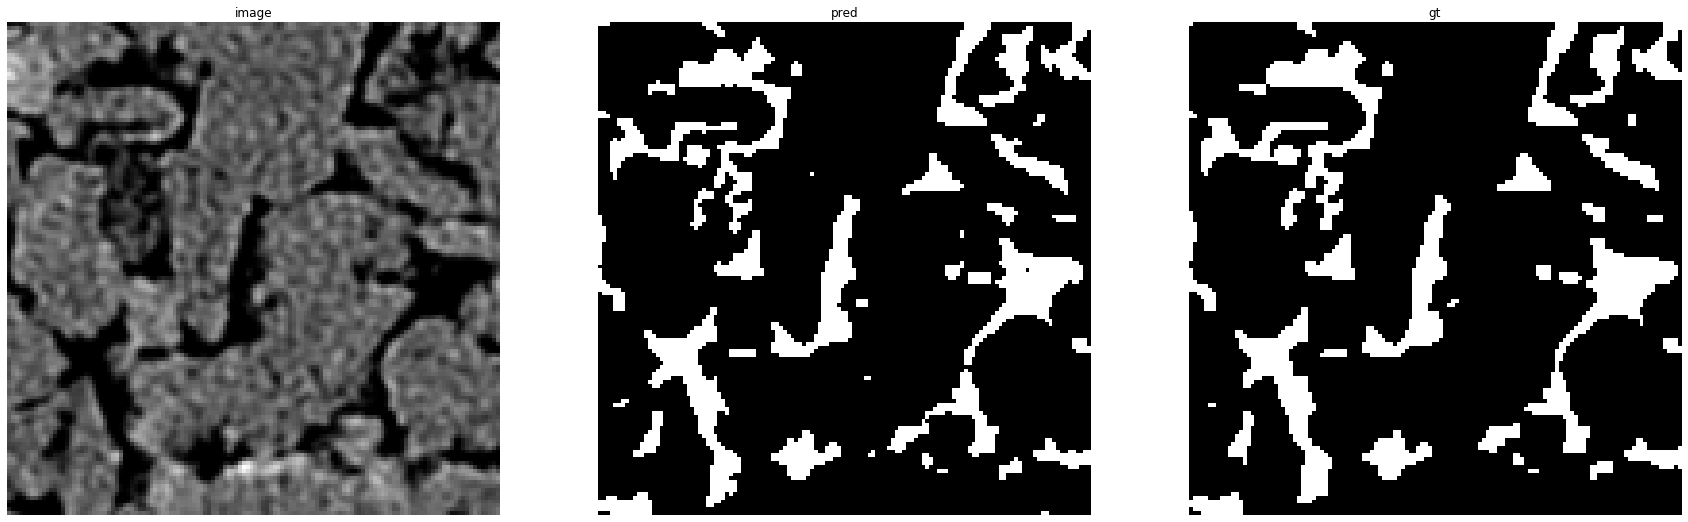

accuracy    : 0.9813232421875
precision   : 0.9584055459272097
recall      : 0.9369705184683158
f1          : 0.9475668265935572
pr_auc      : 0.9929950425179922
iou         : 0.900358189514816


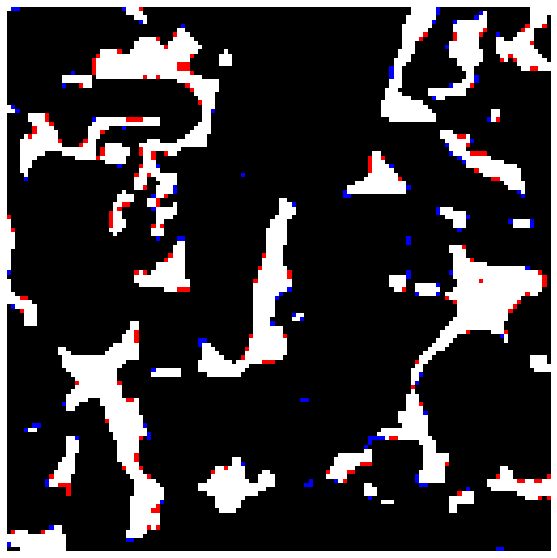

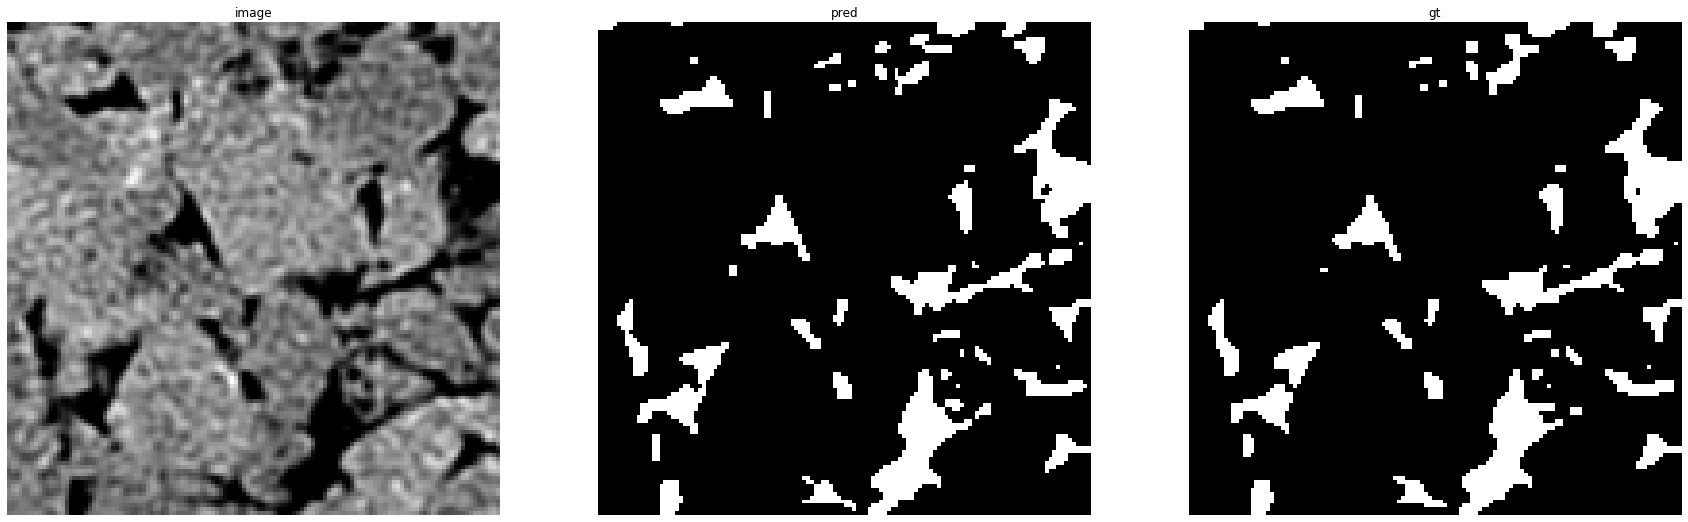

accuracy    : 0.98712158203125
precision   : 0.9587270014917951
recall      : 0.9377431906614786
f1          : 0.9481190066388001
pr_auc      : 0.9925471927579997
iou         : 0.9013557737260403


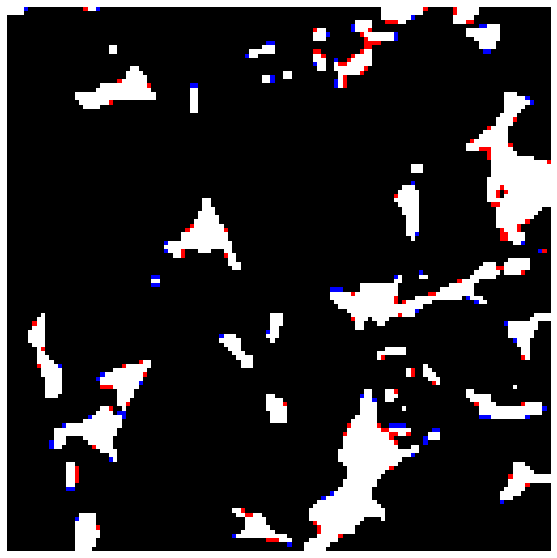

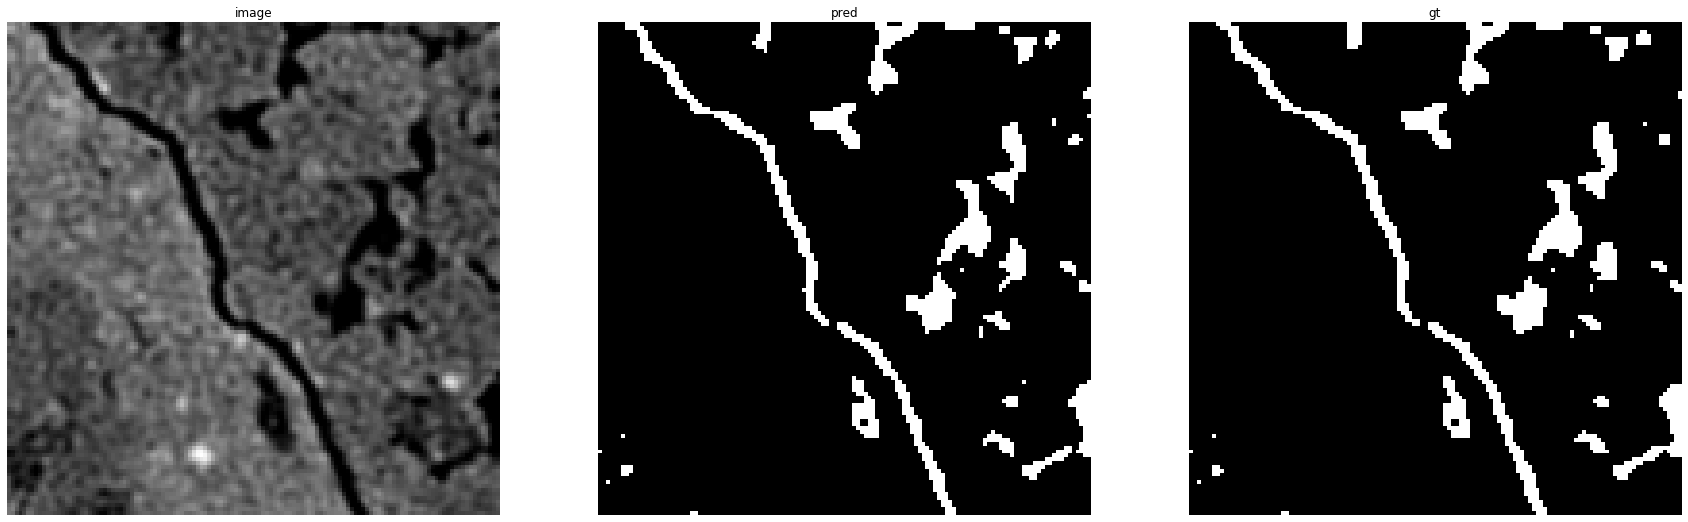

accuracy    : 0.9921875
precision   : 0.9653647752394989
recall      : 0.9417685118619699
f1          : 0.9534206695778749
pr_auc      : 0.9932223673549815
iou         : 0.9109874826147427


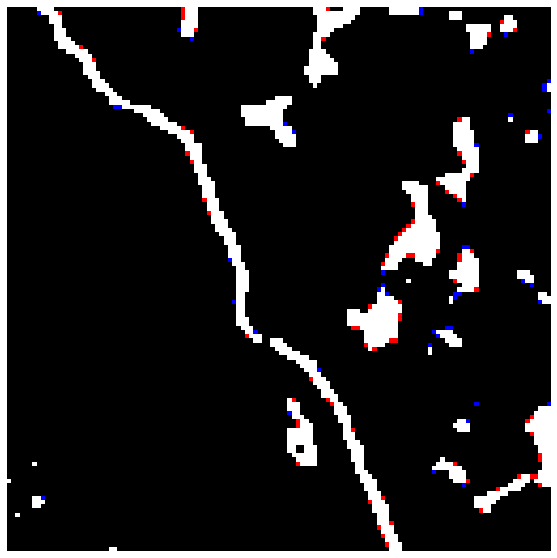

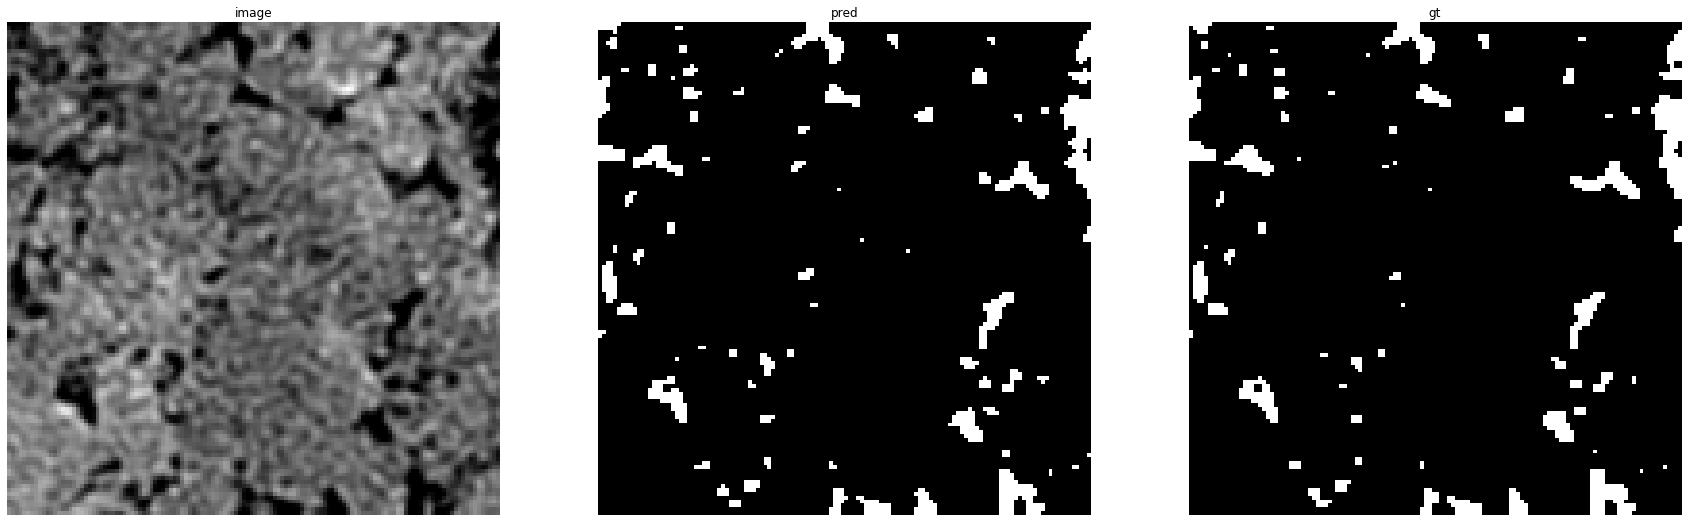

accuracy    : 0.9888916015625
precision   : 0.9044995408631772
recall      : 0.9266227657572906
f1          : 0.9154275092936802
pr_auc      : 0.9804564986635645
iou         : 0.844044558697515


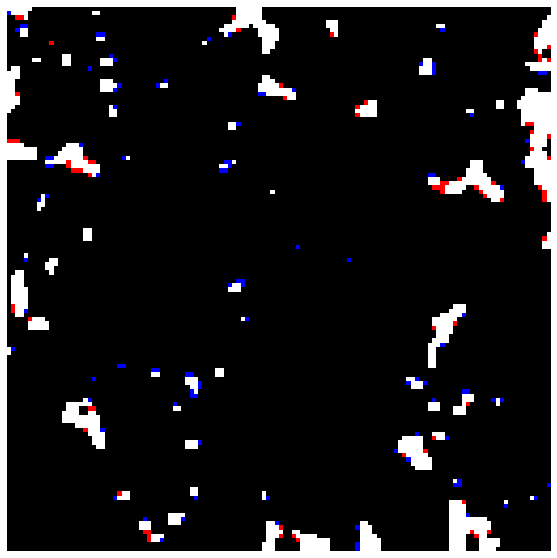

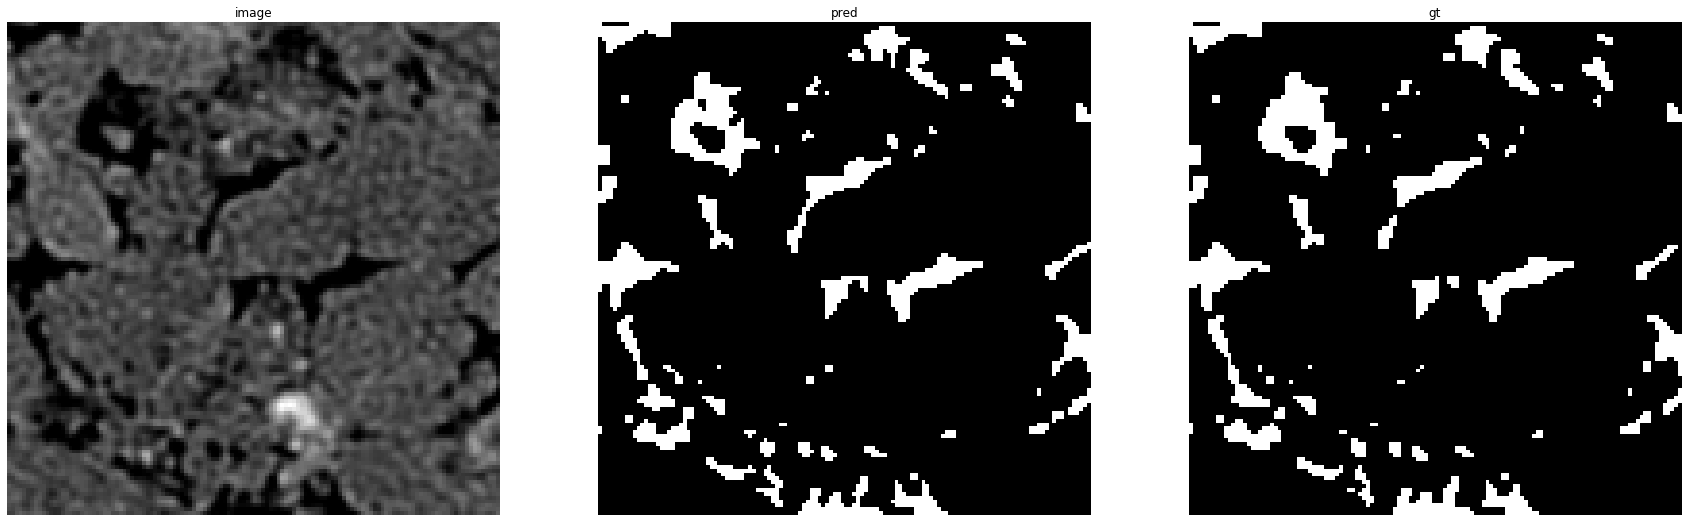

accuracy    : 0.98724365234375
precision   : 0.947107438016529
recall      : 0.9383187772925764
f1          : 0.9426926240745818
pr_auc      : 0.99029035246461
iou         : 0.891597510373444


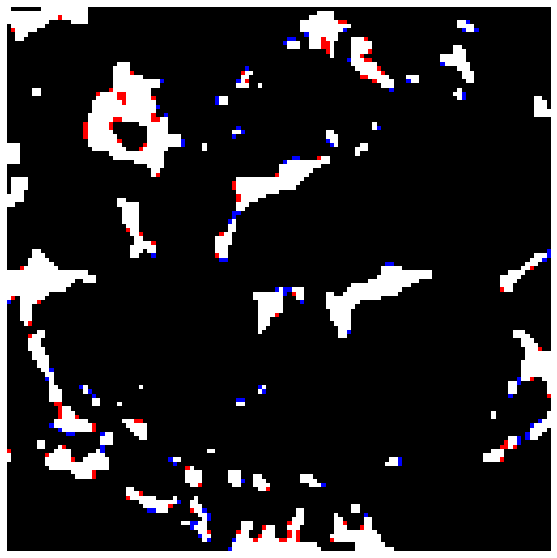

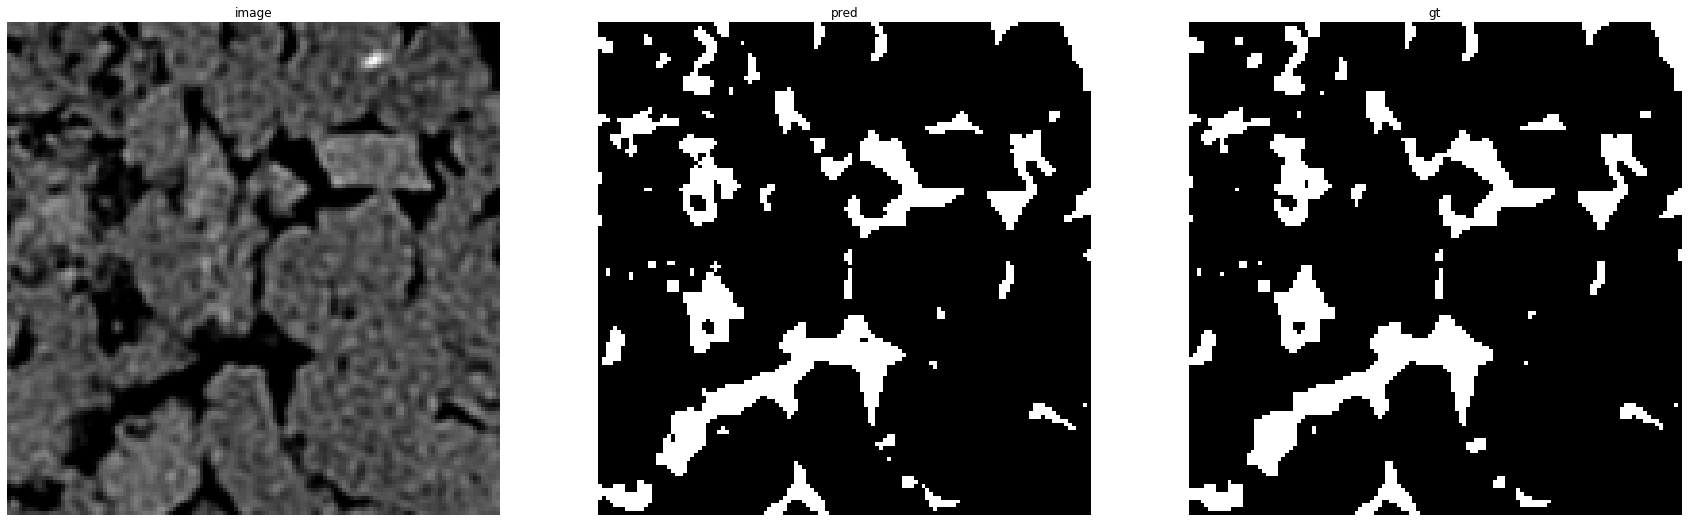

accuracy    : 0.9847412109375
precision   : 0.9592608147837043
recall      : 0.937217890849405
f1          : 0.9481112494811124
pr_auc      : 0.9930523908631386
iou         : 0.9013417521704814




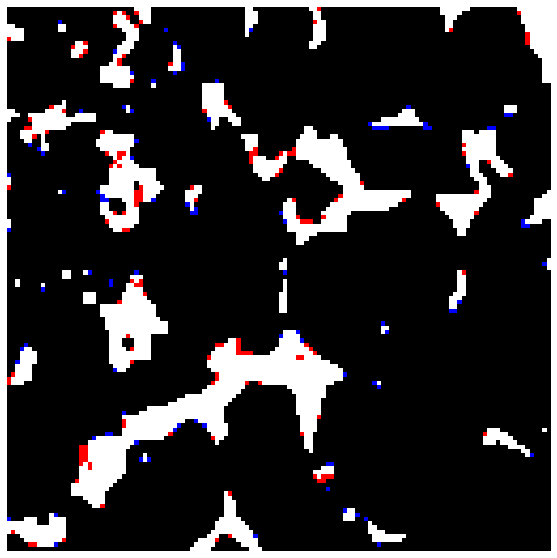

In [42]:
model.eval()

for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    print('Prediction for {}:'.format(stack_name))
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)

            img_path = os.path.join('.', 'samples', stack_name, 'diff_{}.png'.format(cnt))
            make_colored_diff(mask, pred, threshold=threshold, path=img_path)
            
            cnt -= 1
            
        if cnt ==0:
            break
    print('\n')

## Results

In [43]:
import pandas as pd

from visualization_utils import make_df

df = make_df(results, model_name=data_conf['conf_name'])
df

accuracy  precision    recall        f1    pr_auc       iou  \
0   0.996381   0.954979  0.984968  0.969742  0.997493  0.941261   
1   0.989502   0.933303  0.983903  0.957935  0.994037  0.919266   
2   0.984001   0.980014  0.854528  0.912979  0.987619  0.839891   
3   0.993610   0.997369  0.910928  0.952191  0.997775  0.908744   
4   0.991178   0.986058  0.903123  0.942770  0.993906  0.891736   
5   0.997320   0.973493  0.969044  0.971263  0.997244  0.944132   
6   0.990102   0.995309  0.932797  0.963040  0.998084  0.928714   
7   0.993164   0.995783  0.936900  0.965445  0.998335  0.933197   
8   0.992259   0.963596  0.968631  0.966107  0.996481  0.934436   
9   0.991590   0.974225  0.969976  0.972095  0.997748  0.945706   
10  0.985776   0.956441  0.941395  0.948858  0.992917  0.902693   

                 stack            model  
0            carb96558  SoilB-2_Urna_22  
1               carb71  SoilB-2_Urna_22  
2              carbRNF  SoilB-2_Urna_22  
3   SPE_carb10_58_box3  SoilB-2_Urna_22  
4             SoilAh-1  SoilB-2_Urna_22  
5              SoilB-2  SoilB-2_Urna_22  
6       TeTree_subset1  SoilB-2_Urna_22  
7       TiTree_subset2  SoilB-2_Urna_22  
8              Urna_22  SoilB-2_Urna_22  
9              Urna_30  SoilB-2_Urna_22  
10             Urna_34  SoilB-2_Urna_22

In [46]:
data_conf['conf_name'] = 'soilB-2_Urna_22'

In [47]:
df.to_html('{}.html'.format(data_conf['conf_name'].replace('-', '_')))
s = (
    'wkhtmltoimage -f png --width 0' 
    ' {exp_name}_exp/{exp_name}.html' 
    ' {exp_name}_exp/{exp_name}.png'.format(exp_name=data_conf['conf_name'].replace('-', '_'))
)
print(s)

wkhtmltoimage -f png --width 0 soilB_2_Urna_22_exp/soilB_2_Urna_22.html soilB_2_Urna_22_exp/soilB_2_Urna_22.png


## Make prediction for particular stack

In [29]:
stack_name = 'carbRNF'

In [30]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:01, 690.41it/s]
100%|██████████| 700/700 [00:07<00:00, 98.57it/s] 


In [31]:
predicted_stack = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 244617.34it/s]
25200it [02:03, 203.81it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3187.39it/s]


In [33]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack.preds, 
                                    mode='stack')))

accuracy    : 0.974182
precision   : 0.832910
recall      : 0.967346
f1          : 0.895108
pr_auc      : 0.981873
iou         : 0.810132
